In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:

df = pd.read_csv(r'C:\Users\34690\Documents\THE BRIDGE\Repositorio\Repositorio_cambios_COPIA\3-Machine-Learning\Entregas\Segundas_PV.csv')
df.head()

C:\Users\34690\AppData\Local\Temp\ipykernel_12852\4099613858.py:1: DtypeWarning: Columns (3,4,5,8,9,13,14,15,16,17,18,19,20,21,22,23,30,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\34690\Documents\THE BRIDGE\Repositorio\Repositorio_cambios_COPIA\3-Machine-Learning\Entregas\Segundas_PV.csv')


Día   Fecha de operación              Hora de cierre Semana  \
0  lunes  2024-04-01 00:00:00  2024-04-01 08:14:29.627000     14   
1  lunes  2024-04-01 00:00:00  2024-04-01 08:14:29.627000     14   
2  lunes  2024-04-01 00:00:00  2024-04-01 08:14:29.627000     14   
3  lunes  2024-04-01 00:00:00  2024-04-01 08:14:29.627000     14   
4  lunes  2024-04-01 00:00:00  2024-04-01 08:29:07.327000     14   

  Movimiento PDV Orden Tipo de orden Subtipo de orden No. Mesa No. Personas  \
0         121341     1    Restaurant                -     21.0            1   
1         121341     1    Restaurant                -     21.0            1   
2         121341     1    Restaurant                -     21.0            1   
3         121341     1    Restaurant                -     21.0            1   
4         121342     2   Para llevar                -      NaN            1   

   ... IEPS.1 Total.1 Cortesías Subtotal IVA.2 IEPS.2 Total.2  \
0  ...    0.0    49.0                NaN   NaN    NaN     NaN   
1  ...    0.0    24.0                NaN   NaN    NaN     NaN   
2  ...    0.0    89.0                NaN   NaN    NaN     NaN   
3  ...    0.0     0.0                NaN   NaN    NaN     NaN   
4  ...    NaN     NaN                NaN   NaN    NaN     NaN   

  Anulaciones Subtotal   IVA.3 IEPS.3 Total.3  
0                  NaN     NaN    NaN     NaN  
1                  NaN     NaN    NaN     NaN  
2                  NaN     NaN    NaN     NaN  
3                  NaN     NaN    NaN     NaN  
4              41.3793  6.6207    0.0    48.0  

[5 rows x 46 columns]

In [6]:
df.columns #Para poder ver todas las columnas

Index(['Día', 'Fecha de operación', 'Hora de cierre', 'Semana',
       'Movimiento PDV', 'Orden', 'Tipo de orden', 'Subtipo de orden',
       'No. Mesa', 'No. Personas', 'Mesero', 'Terminal', 'Acción',
       'Ventas Subtotal', 'IVA', 'IEPS', 'Total', 'Descuento', 'Cantidad',
       'Precio unitario', 'Precio unitario con modificador', 'Costo real',
       'Costo con modificadores', 'Costo ideal', 'Tipo de grupo', 'Grupo',
       'Descripción', 'Platillo / Artículo', 'Modificador', 'Clave platillo',
       'Código de barras', '¿Es modificador?', 'Hora de captura',
       'Terminal de captura', 'Detalles ventas Subtotal', 'IVA.1', 'IEPS.1',
       'Total.1', 'Cortesías Subtotal', 'IVA.2', 'IEPS.2', 'Total.2',
       'Anulaciones Subtotal', 'IVA.3', 'IEPS.3', 'Total.3'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498977 entries, 0 to 498976
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Día                              498920 non-null  object
 1   Fecha de operación               498844 non-null  object
 2   Hora de cierre                   498844 non-null  object
 3   Semana                           498844 non-null  object
 4   Movimiento PDV                   498844 non-null  object
 5   Orden                            498863 non-null  object
 6   Tipo de orden                    498844 non-null  object
 7   Subtipo de orden                 498844 non-null  object
 8   No. Mesa                         352419 non-null  object
 9   No. Personas                     498844 non-null  object
 10  Mesero                           498844 non-null  object
 11  Terminal                         498844 non-null  object
 12  Acción          

In [10]:
df['Grupo'].unique()

array(['JUGOS Y BEBIDAS FRIAS', 'PAN DULCE', 'CAFE Y  BEBIDAS CALIENTES',
       'MOD BEBIDAS', 'DESAYUNOS', 'UBER COMIDAS',
       'UBER JUGOS Y BEBIDAS FRIAS', 'COMIDAS', 'MOD ALIMENTOS',
       'ESPECIALES-', 'EXTRAS', 'UBER CAFE Y BEBIDAS CALIENTES',
       'UBER PAN DULCE', 'PIZZA', 'REPOSTERIA', 'UBER DESAYUNOS',
       'RAPPI PAN DULCE', 'PAN SALADO', 'UBER REPOSTERIA',
       'PANEM  MARKETPLACE', 'MOD MARKETPLACE', 'UBER PIZZA',
       'RAPPI PAN SALADO', 'RAPPI COMIDAS', 'RAPPI REPOSTERIA',
       'ESTANTERIA', 'RAPPI DESAYUNOS', nan, 'Grupo',
       'RAPPI CAFE Y BEBIDAS CALIENTES', 'RAPPI JUGOS Y BEBIDAS FRIAS',
       'RAPPI PIZZA', 'SUBSIDIO', 'TARJETAS DE REGALO',
       'PRODUCTOS DE TEMPORADA', 'NATIVA TEMPORALCOMIDA',
       'UBER PAN SALADO', 'DIDI CAFE Y BEBIDAS CALIENTES',
       'DIDI PAN DULCE', 'DIDI DESAYUNOS', 'DIDI PANEM  MARKETPLACE',
       'RAPPI PANEM  MARKETPLACE', 'DIDI PAN SALADO'], dtype=object)

# ÚLTIMO PLATILLO - ¿FUERA DE STOCK?

### LIMPIEZA DE DATOS

In [5]:
ult_platillo = df[['Grupo','Platillo / Artículo', 'Hora de cierre']]
ult_platillo 

Grupo Platillo / Artículo  \
0           JUGOS Y BEBIDAS FRIAS        JUGO NARANJA   
1                       PAN DULCE     CONCHA VAINILLA   
2       CAFE Y  BEBIDAS CALIENTES          MOCHA 16OZ   
3                     MOD BEBIDAS          MOCHA 16OZ   
4                       PAN DULCE     CONCHA VAINILLA   
...                           ...                 ...   
498972                  DESAYUNOS       AVOCADO TOAST   
498973      JUGOS Y BEBIDAS FRIAS            LIMONADA   
498974                  PAN DULCE       OREJA NATURAL   
498975                  PAN DULCE       PAN DE MUERTO   
498976                  PAN DULCE       PAN DE MUERTO   

                    Hora de cierre  
0       2024-04-01 08:14:29.627000  
1       2024-04-01 08:14:29.627000  
2       2024-04-01 08:14:29.627000  
3       2024-04-01 08:14:29.627000  
4       2024-04-01 08:29:07.327000  
...                            ...  
498972  2023-09-30 20:35:17.553000  
498973  2023-09-30 20:39:48.093000  
498974  2023-09-30 20:41:50.743000  
498975  2023-09-30 20:41:50.743000  
498976  2023-09-30 20:47:18.310000  

[498977 rows x 3 columns]

In [6]:
ult_platillo['Grupo'].unique()

array(['JUGOS Y BEBIDAS FRIAS', 'PAN DULCE', 'CAFE Y  BEBIDAS CALIENTES',
       'MOD BEBIDAS', 'DESAYUNOS', 'UBER COMIDAS',
       'UBER JUGOS Y BEBIDAS FRIAS', 'COMIDAS', 'MOD ALIMENTOS',
       'ESPECIALES-', 'EXTRAS', 'UBER CAFE Y BEBIDAS CALIENTES',
       'UBER PAN DULCE', 'PIZZA', 'REPOSTERIA', 'UBER DESAYUNOS',
       'RAPPI PAN DULCE', 'PAN SALADO', 'UBER REPOSTERIA',
       'PANEM  MARKETPLACE', 'MOD MARKETPLACE', 'UBER PIZZA',
       'RAPPI PAN SALADO', 'RAPPI COMIDAS', 'RAPPI REPOSTERIA',
       'ESTANTERIA', 'RAPPI DESAYUNOS', nan, 'Grupo',
       'RAPPI CAFE Y BEBIDAS CALIENTES', 'RAPPI JUGOS Y BEBIDAS FRIAS',
       'RAPPI PIZZA', 'SUBSIDIO', 'TARJETAS DE REGALO',
       'PRODUCTOS DE TEMPORADA', 'NATIVA TEMPORALCOMIDA',
       'UBER PAN SALADO', 'DIDI CAFE Y BEBIDAS CALIENTES',
       'DIDI PAN DULCE', 'DIDI DESAYUNOS', 'DIDI PANEM  MARKETPLACE',
       'RAPPI PANEM  MARKETPLACE', 'DIDI PAN SALADO'], dtype=object)

### Función para la limpieza (Opción correcta = Prueba 2)

#### Prueba 1

In [7]:
import pandas as pd

def eliminar_filas_por_grupo(dataframe, grupo_a_eliminar):
    """
    Elimina las filas de un DataFrame donde el valor de la columna 'Grupo' es igual a 'grupo_a_eliminar'.
    
    :param dataframe: DataFrame de pandas del que se eliminarán las filas.
    :param grupo_a_eliminar: Valor de la columna 'Grupo' de las filas que se desean eliminar.
    :return: DataFrame con las filas eliminadas.
    """
    # Crear una lista para almacenar los índices de las filas a eliminar
    indices_a_eliminar = []

    # Iterar sobre las filas del DataFrame
    for index, row in dataframe.iterrows():
        if row['Grupo'] == grupo_a_eliminar:
            indices_a_eliminar.append(index)

    # Eliminar las filas correspondientes a los índices almacenados
    dataframe_filtrado = dataframe.drop(indices_a_eliminar)

    return dataframe_filtrado

# Ejemplo de uso:
# ult_platillo = pd.DataFrame(...)  # Tu DataFrame original
# grupo_a_eliminar = 'CAFE Y  BEBIDAS CALIENTES'
# df_filtrado = eliminar_filas_por_grupo(ult_platillo, grupo_a_eliminar)
# print(df_filtrado)


In [8]:
grupo_a_eliminar=['CAFE Y  BEBIDAS CALIENTES', 'MOD BEBIDAS','UBER COMIDAS' 'UBER COMIDAS', 'UBER JUGOS Y BEBIDAS FRIAS','UBER CAFE Y BEBIDAS CALIENTES','UBER DESAYUNOS', 'RAPPI PAN DULCE', 'UBER REPOSTERIA', 'UBER PIZZA','RAPPI PAN SALADO', 'RAPPI COMIDAS', 'RAPPI REPOSTERIA','RAPPI DESAYUNOS','RAPPI CAFE Y BEBIDAS CALIENTES', 'RAPPI JUGOS Y BEBIDAS FRIAS','RAPPI PIZZA']

In [9]:
df_filtrado = eliminar_filas_por_grupo(ult_platillo, grupo_a_eliminar)

In [10]:
df_filtrado['Grupo'].unique()

array(['JUGOS Y BEBIDAS FRIAS', 'PAN DULCE', 'CAFE Y  BEBIDAS CALIENTES',
       'MOD BEBIDAS', 'DESAYUNOS', 'UBER COMIDAS',
       'UBER JUGOS Y BEBIDAS FRIAS', 'COMIDAS', 'MOD ALIMENTOS',
       'ESPECIALES-', 'EXTRAS', 'UBER CAFE Y BEBIDAS CALIENTES',
       'UBER PAN DULCE', 'PIZZA', 'REPOSTERIA', 'UBER DESAYUNOS',
       'RAPPI PAN DULCE', 'PAN SALADO', 'UBER REPOSTERIA',
       'PANEM  MARKETPLACE', 'MOD MARKETPLACE', 'UBER PIZZA',
       'RAPPI PAN SALADO', 'RAPPI COMIDAS', 'RAPPI REPOSTERIA',
       'ESTANTERIA', 'RAPPI DESAYUNOS', nan, 'Grupo',
       'RAPPI CAFE Y BEBIDAS CALIENTES', 'RAPPI JUGOS Y BEBIDAS FRIAS',
       'RAPPI PIZZA', 'SUBSIDIO', 'TARJETAS DE REGALO',
       'PRODUCTOS DE TEMPORADA', 'NATIVA TEMPORALCOMIDA',
       'UBER PAN SALADO', 'DIDI CAFE Y BEBIDAS CALIENTES',
       'DIDI PAN DULCE', 'DIDI DESAYUNOS', 'DIDI PANEM  MARKETPLACE',
       'RAPPI PANEM  MARKETPLACE', 'DIDI PAN SALADO'], dtype=object)

----------

In [11]:
# Crear una lista para almacenar los índices de las filas a eliminar Bebidas calientes y Mod bebidas
indices_a_eliminar = []

# Iterar sobre las filas del DataFrame
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'CAFE Y  BEBIDAS CALIENTES':
        indices_a_eliminar.append(index)

# Eliminar las filas correspondientes a los índices almacenados
df_filtrado = ult_platillo.drop(indices_a_eliminar)

print(df_filtrado)

                        Grupo  Platillo / Artículo              Hora de cierre
0       JUGOS Y BEBIDAS FRIAS         JUGO NARANJA  2024-04-01 08:14:29.627000
1                   PAN DULCE      CONCHA VAINILLA  2024-04-01 08:14:29.627000
3                 MOD BEBIDAS           MOCHA 16OZ  2024-04-01 08:14:29.627000
4                   PAN DULCE      CONCHA VAINILLA  2024-04-01 08:29:07.327000
5                   PAN DULCE  CROISSANT ALMENDRAS  2024-04-01 08:29:07.327000
...                       ...                  ...                         ...
498972              DESAYUNOS        AVOCADO TOAST  2023-09-30 20:35:17.553000
498973  JUGOS Y BEBIDAS FRIAS             LIMONADA  2023-09-30 20:39:48.093000
498974              PAN DULCE        OREJA NATURAL  2023-09-30 20:41:50.743000
498975              PAN DULCE        PAN DE MUERTO  2023-09-30 20:41:50.743000
498976              PAN DULCE        PAN DE MUERTO  2023-09-30 20:47:18.310000

[419629 rows x 3 columns]


In [12]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'MOD BEBIDAS':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

print(df_filtrado)

                        Grupo        Platillo / Artículo  \
0       JUGOS Y BEBIDAS FRIAS               JUGO NARANJA   
1                   PAN DULCE            CONCHA VAINILLA   
4                   PAN DULCE            CONCHA VAINILLA   
5                   PAN DULCE        CROISSANT ALMENDRAS   
6                   DESAYUNOS  HAM  CHEESE SANDWICH ROLL   
...                       ...                        ...   
498972              DESAYUNOS              AVOCADO TOAST   
498973  JUGOS Y BEBIDAS FRIAS                   LIMONADA   
498974              PAN DULCE              OREJA NATURAL   
498975              PAN DULCE              PAN DE MUERTO   
498976              PAN DULCE              PAN DE MUERTO   

                    Hora de cierre  
0       2024-04-01 08:14:29.627000  
1       2024-04-01 08:14:29.627000  
4       2024-04-01 08:29:07.327000  
5       2024-04-01 08:29:07.327000  
6       2024-04-01 08:29:07.327000  
...                            ...  
498972  2023-09-30 2

In [13]:
df_filtrado['Grupo'].unique() #Ya no aparecen las que hemos quitado. Sin embargo vemos que las que tienen 'UBER' también se pueden eliminar para el análisis gráfico.

array(['JUGOS Y BEBIDAS FRIAS', 'PAN DULCE', 'DESAYUNOS', 'UBER COMIDAS',
       'UBER JUGOS Y BEBIDAS FRIAS', 'COMIDAS', 'MOD ALIMENTOS',
       'ESPECIALES-', 'EXTRAS', 'UBER CAFE Y BEBIDAS CALIENTES',
       'UBER PAN DULCE', 'PIZZA', 'REPOSTERIA', 'UBER DESAYUNOS',
       'RAPPI PAN DULCE', 'PAN SALADO', 'UBER REPOSTERIA',
       'PANEM  MARKETPLACE', 'MOD MARKETPLACE', 'UBER PIZZA',
       'RAPPI PAN SALADO', 'RAPPI COMIDAS', 'RAPPI REPOSTERIA',
       'ESTANTERIA', 'RAPPI DESAYUNOS', nan, 'Grupo',
       'RAPPI CAFE Y BEBIDAS CALIENTES', 'RAPPI JUGOS Y BEBIDAS FRIAS',
       'RAPPI PIZZA', 'SUBSIDIO', 'TARJETAS DE REGALO',
       'PRODUCTOS DE TEMPORADA', 'NATIVA TEMPORALCOMIDA',
       'UBER PAN SALADO', 'DIDI CAFE Y BEBIDAS CALIENTES',
       'DIDI PAN DULCE', 'DIDI DESAYUNOS', 'DIDI PANEM  MARKETPLACE',
       'RAPPI PANEM  MARKETPLACE', 'DIDI PAN SALADO'], dtype=object)

In [14]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'UBER COMIDAS':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

print(df_filtrado)

                        Grupo        Platillo / Artículo  \
0       JUGOS Y BEBIDAS FRIAS               JUGO NARANJA   
1                   PAN DULCE            CONCHA VAINILLA   
4                   PAN DULCE            CONCHA VAINILLA   
5                   PAN DULCE        CROISSANT ALMENDRAS   
6                   DESAYUNOS  HAM  CHEESE SANDWICH ROLL   
...                       ...                        ...   
498972              DESAYUNOS              AVOCADO TOAST   
498973  JUGOS Y BEBIDAS FRIAS                   LIMONADA   
498974              PAN DULCE              OREJA NATURAL   
498975              PAN DULCE              PAN DE MUERTO   
498976              PAN DULCE              PAN DE MUERTO   

                    Hora de cierre  
0       2024-04-01 08:14:29.627000  
1       2024-04-01 08:14:29.627000  
4       2024-04-01 08:29:07.327000  
5       2024-04-01 08:29:07.327000  
6       2024-04-01 08:29:07.327000  
...                            ...  
498972  2023-09-30 2

In [15]:

for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'UBER PAN DULCE':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [16]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'UBER PIZZA':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)


In [17]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'UBER REPOSTERIA':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [18]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'UBER DESAYUNOS':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [19]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'UBER JUGOS Y BEBIDAS FRIAS':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [20]:
print(df_filtrado)

                        Grupo        Platillo / Artículo  \
0       JUGOS Y BEBIDAS FRIAS               JUGO NARANJA   
1                   PAN DULCE            CONCHA VAINILLA   
4                   PAN DULCE            CONCHA VAINILLA   
5                   PAN DULCE        CROISSANT ALMENDRAS   
6                   DESAYUNOS  HAM  CHEESE SANDWICH ROLL   
...                       ...                        ...   
498972              DESAYUNOS              AVOCADO TOAST   
498973  JUGOS Y BEBIDAS FRIAS                   LIMONADA   
498974              PAN DULCE              OREJA NATURAL   
498975              PAN DULCE              PAN DE MUERTO   
498976              PAN DULCE              PAN DE MUERTO   

                    Hora de cierre  
0       2024-04-01 08:14:29.627000  
1       2024-04-01 08:14:29.627000  
4       2024-04-01 08:29:07.327000  
5       2024-04-01 08:29:07.327000  
6       2024-04-01 08:29:07.327000  
...                            ...  
498972  2023-09-30 2

In [21]:
df_filtrado['Grupo'].unique() #RAPPI quitar

array(['JUGOS Y BEBIDAS FRIAS', 'PAN DULCE', 'DESAYUNOS', 'COMIDAS',
       'MOD ALIMENTOS', 'ESPECIALES-', 'EXTRAS',
       'UBER CAFE Y BEBIDAS CALIENTES', 'PIZZA', 'REPOSTERIA',
       'RAPPI PAN DULCE', 'PAN SALADO', 'PANEM  MARKETPLACE',
       'MOD MARKETPLACE', 'RAPPI PAN SALADO', 'RAPPI COMIDAS',
       'RAPPI REPOSTERIA', 'ESTANTERIA', 'RAPPI DESAYUNOS', nan, 'Grupo',
       'RAPPI CAFE Y BEBIDAS CALIENTES', 'RAPPI JUGOS Y BEBIDAS FRIAS',
       'RAPPI PIZZA', 'SUBSIDIO', 'TARJETAS DE REGALO',
       'PRODUCTOS DE TEMPORADA', 'NATIVA TEMPORALCOMIDA',
       'UBER PAN SALADO', 'DIDI CAFE Y BEBIDAS CALIENTES',
       'DIDI PAN DULCE', 'DIDI DESAYUNOS', 'DIDI PANEM  MARKETPLACE',
       'RAPPI PANEM  MARKETPLACE', 'DIDI PAN SALADO'], dtype=object)

In [22]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'RAPPI DESAYUNOS':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [23]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'RAPPI COMIDAS':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [24]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'RAPPI JUGOS Y BEBIDAS FRIAS':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [25]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'RAPPI PAN DULCE':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [26]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'RAPPI CAFE Y BEBIDAS CALIENTES':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [27]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'RAPPI PIZZA':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [28]:
for index, row in ult_platillo.iterrows():
    if row['Grupo'] == 'RAPPI PAN SALADO':
        indices_a_eliminar.append(index)

df_filtrado = ult_platillo.drop(indices_a_eliminar)

In [29]:
df_filtrado['Hora de cierre'].info()

<class 'pandas.core.series.Series'>
Index: 288893 entries, 0 to 498976
Series name: Hora de cierre
Non-Null Count   Dtype 
--------------   ----- 
288760 non-null  object
dtypes: object(1)
memory usage: 4.4+ MB


In [30]:
df_filtrado.iloc[302]

Grupo                                   DESAYUNOS
Platillo / Artículo                  FRENCH TOAST
Hora de cierre         2024-04-02 09:59:31.080000
Name: 534, dtype: object

In [31]:
# Convertir la columna 'Hora de cierre' a datetime
df_filtrado['Hora de cierre'] = pd.to_datetime(df_filtrado['Hora de cierre'], errors='coerce', format='%Y-%m-%d %H:%M:%S.%f')


In [32]:
df_filtrado.info()
#Quitamos las rows con error en el datetime (solo son 1000)

<class 'pandas.core.frame.DataFrame'>
Index: 288893 entries, 0 to 498976
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Grupo                286321 non-null  object        
 1   Platillo / Artículo  288760 non-null  object        
 2   Hora de cierre       287821 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 8.8+ MB


In [33]:
df_filtrado['Platillo / Artículo'].unique()

array(['JUGO NARANJA', 'CONCHA VAINILLA', 'CROISSANT ALMENDRAS',
       'HAM  CHEESE SANDWICH ROLL', 'AVOCADO TOAST', 'GALLETA DE AVENA',
       'ENCHILADAS SUIZAS', 'SANDWITCH ENSALADA POLLO',
       'CONCHA CHOCOLATE', 'LATTE EN LAS ROCAS', 'MUFFIN PLATANO VEGANO',
       'OMELETTE DE JAMÓN', 'BISQUET CON MANTEQUILLA',
       'CHILAQUILES PANEM', 'QUICHE FLORENTINE', 'DANES',
       'BOWL DE FRUTOS ROJOS Y GRANOLA PANEM', 'OMELETTE ESPINACA',
       'ROL DE CANELA', 'OMELETTE DE CHAMPIÑONES', 'MUFFIN BLUEBERRY',
       'COMBO ADMIN PV CONCHA CAFÉ', 'MATCHA EN LAS ROCAS',
       'SOURDOUGH EGGS', 'CROISSANT NATURAL', 'PAIN AU CHOCOLAT',
       'AGUA NATURA ST', 'BAGUETTE JAMÓN SERRANO',
       'CROISSANT DE JAMÓN Y QUESO', 'SCONE', 'QUICHE LORRAINE',
       'Smoothie Bananaberry', 'BAGUETTE CAPRESE',
       'Dirty Chai en las rocas', 'OREJA NATURAL', 'VEGETALES',
       'CAPPUCCINO 8OZ UBER', 'FRENCH TOAST', 'MOCHA EN LAS ROCAS',
       'TISANA FRIA POP', 'ENSALADA CESAR', 'PIZZA PEPP

### Prueba 2

In [34]:
grupo_a_eliminar=['CAFE Y  BEBIDAS CALIENTES', 'MOD BEBIDAS','UBER COMIDAS' 'UBER COMIDAS', 'UBER JUGOS Y BEBIDAS FRIAS','UBER CAFE Y BEBIDAS CALIENTES','UBER DESAYUNOS', 'RAPPI PAN DULCE', 'UBER REPOSTERIA', 'UBER PIZZA','RAPPI PAN SALADO', 'RAPPI COMIDAS', 'RAPPI REPOSTERIA','RAPPI DESAYUNOS','RAPPI CAFE Y BEBIDAS CALIENTES', 'RAPPI JUGOS Y BEBIDAS FRIAS','RAPPI PIZZA']

In [35]:

def eliminar_filas_por_grupos(dataframe, grupos_a_eliminar):
    """
    Elimina las filas de un DataFrame donde el valor de la columna 'Grupo' es igual a alguno de los valores en 'grupos_a_eliminar'.
    
    :param dataframe: DataFrame de pandas del que se eliminarán las filas.
    :param grupos_a_eliminar: Lista de valores de la columna 'Grupo' de las filas que se desean eliminar.
    :return: DataFrame con las filas eliminadas.
    """
    # Eliminar las filas donde la columna 'Grupo' contiene algún valor en 'grupos_a_eliminar'
    dataframe_filtrado = dataframe[~dataframe['Grupo'].isin(grupo_a_eliminar)]
    
    return dataframe_filtrado

# Ejemplo de uso:
# ult_platillo = pd.DataFrame(...)  # Tu DataFrame original
# grupos_a_eliminar = ['CAFE Y  BEBIDAS CALIENTES', 'MOD BEBIDAS']
# df_filtrado = eliminar_filas_por_grupos(ult_platillo, grupos_a_eliminar)
# print(df_filtrado)

In [36]:
df_filtrado = eliminar_filas_por_grupos(ult_platillo, grupo_a_eliminar)
print(df_filtrado)

                        Grupo        Platillo / Artículo  \
0       JUGOS Y BEBIDAS FRIAS               JUGO NARANJA   
1                   PAN DULCE            CONCHA VAINILLA   
4                   PAN DULCE            CONCHA VAINILLA   
5                   PAN DULCE        CROISSANT ALMENDRAS   
6                   DESAYUNOS  HAM  CHEESE SANDWICH ROLL   
...                       ...                        ...   
498972              DESAYUNOS              AVOCADO TOAST   
498973  JUGOS Y BEBIDAS FRIAS                   LIMONADA   
498974              PAN DULCE              OREJA NATURAL   
498975              PAN DULCE              PAN DE MUERTO   
498976              PAN DULCE              PAN DE MUERTO   

                    Hora de cierre  
0       2024-04-01 08:14:29.627000  
1       2024-04-01 08:14:29.627000  
4       2024-04-01 08:29:07.327000  
5       2024-04-01 08:29:07.327000  
6       2024-04-01 08:29:07.327000  
...                            ...  
498972  2023-09-30 2

In [37]:
df_filtrado['Grupo'].unique()

array(['JUGOS Y BEBIDAS FRIAS', 'PAN DULCE', 'DESAYUNOS', 'UBER COMIDAS',
       'COMIDAS', 'MOD ALIMENTOS', 'ESPECIALES-', 'EXTRAS',
       'UBER PAN DULCE', 'PIZZA', 'REPOSTERIA', 'PAN SALADO',
       'PANEM  MARKETPLACE', 'MOD MARKETPLACE', 'ESTANTERIA', nan,
       'Grupo', 'SUBSIDIO', 'TARJETAS DE REGALO',
       'PRODUCTOS DE TEMPORADA', 'NATIVA TEMPORALCOMIDA',
       'UBER PAN SALADO', 'DIDI CAFE Y BEBIDAS CALIENTES',
       'DIDI PAN DULCE', 'DIDI DESAYUNOS', 'DIDI PANEM  MARKETPLACE',
       'RAPPI PANEM  MARKETPLACE', 'DIDI PAN SALADO'], dtype=object)

In [38]:
df_filtrado.head()

Grupo        Platillo / Artículo  \
0  JUGOS Y BEBIDAS FRIAS               JUGO NARANJA   
1              PAN DULCE            CONCHA VAINILLA   
4              PAN DULCE            CONCHA VAINILLA   
5              PAN DULCE        CROISSANT ALMENDRAS   
6              DESAYUNOS  HAM  CHEESE SANDWICH ROLL   

               Hora de cierre  
0  2024-04-01 08:14:29.627000  
1  2024-04-01 08:14:29.627000  
4  2024-04-01 08:29:07.327000  
5  2024-04-01 08:29:07.327000  
6  2024-04-01 08:29:07.327000

#### Datetime para divir la columna en Fecha y Hora:

In [91]:
# Convertir la columna 'Hora de cierre' a datetime
df_filtrado['Hora de cierre'] = pd.to_datetime(df_filtrado['Hora de cierre'], errors='coerce')

C:\Users\34690\AppData\Local\Temp\ipykernel_18400\669135583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Hora de cierre'] = pd.to_datetime(df_filtrado['Hora de cierre'], errors='coerce')


In [92]:
# Crear una nueva columna 'Fecha' con solo la fecha
df_filtrado['Fecha'] = df_filtrado['Hora de cierre'].dt.date

# Crear una nueva columna 'Hora' con solo la hora
df_filtrado['Hora'] = df_filtrado['Hora de cierre'].dt.time

C:\Users\34690\AppData\Local\Temp\ipykernel_18400\522227888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Fecha'] = df_filtrado['Hora de cierre'].dt.date
C:\Users\34690\AppData\Local\Temp\ipykernel_18400\522227888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Hora'] = df_filtrado['Hora de cierre'].dt.time


In [93]:
# Convertir la columna 'Fecha' a tipo datetime
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Fecha'])

# Convertir la columna 'Hora' a tipo datetime
df_filtrado['Hora'] = pd.to_datetime(df_filtrado['Hora'], format='%H:%M:%S.%f')


C:\Users\34690\AppData\Local\Temp\ipykernel_18400\700963709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Fecha'])
C:\Users\34690\AppData\Local\Temp\ipykernel_18400\700963709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Hora'] = pd.to_datetime(df_filtrado['Hora'], format='%H:%M:%S.%f')


In [94]:
df_filtrado.info() #Se pierden algunos datos por no poner 'coer'

<class 'pandas.core.frame.DataFrame'>
Index: 292103 entries, 0 to 498976
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Grupo                289531 non-null  object        
 1   Platillo / Artículo  291970 non-null  object        
 2   Hora de cierre       291022 non-null  datetime64[ns]
 3   Fecha                291022 non-null  datetime64[ns]
 4   Hora                 291022 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 21.4+ MB


In [95]:
df_filtrado.head()

Grupo        Platillo / Artículo          Hora de cierre  \
0  JUGOS Y BEBIDAS FRIAS               JUGO NARANJA 2024-04-01 08:14:29.627   
1              PAN DULCE            CONCHA VAINILLA 2024-04-01 08:14:29.627   
4              PAN DULCE            CONCHA VAINILLA 2024-04-01 08:29:07.327   
5              PAN DULCE        CROISSANT ALMENDRAS 2024-04-01 08:29:07.327   
6              DESAYUNOS  HAM  CHEESE SANDWICH ROLL 2024-04-01 08:29:07.327   

       Fecha                    Hora  
0 2024-04-01 1900-01-01 08:14:29.627  
1 2024-04-01 1900-01-01 08:14:29.627  
4 2024-04-01 1900-01-01 08:29:07.327  
5 2024-04-01 1900-01-01 08:29:07.327  
6 2024-04-01 1900-01-01 08:29:07.327

C:\Users\34690\AppData\Local\Temp\ipykernel_18400\1447866693.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Grupo', data=frecuencia_grupos, palette='viridis')


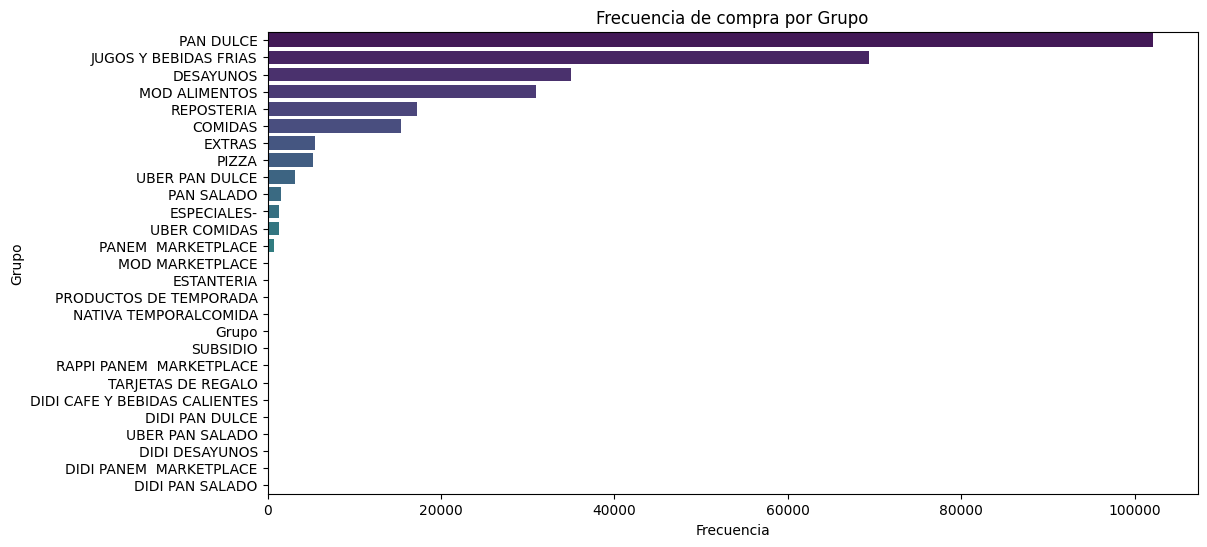

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la frecuencia de cada grupo
frecuencia_grupos = df_filtrado['Grupo'].value_counts().reset_index()
frecuencia_grupos.columns = ['Grupo', 'Frecuencia']

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
sns.barplot(x='Frecuencia', y='Grupo', data=frecuencia_grupos, palette='viridis')

# Añadir título y etiquetas
plt.title('Frecuencia de compra por Grupo')
plt.xlabel('Frecuencia')
plt.ylabel('Grupo')

# Mostrar el gráfico
plt.show()


Se selecciona los más frecuentes. Se descartan MOD ALIMENTOS y EXTRAS.

In [96]:
# Lista de grupos que deseas mantener
grupos_deseados = ['PAN DULCE', 'JUGOS Y BEBIDAS FRIAS', 'DESAYUNOS', 'REPOSTERIA', 'COMIDAS', 'PIZZA', 'PAN SALADO']

# Filtrar el DataFrame para quedarse solo con los registros de los grupos deseados
df_grupo_max_frecu = df_filtrado[df_filtrado['Grupo'].isin(grupos_deseados)]

# Ahora 'df_grupo_max_frecu' contiene solo los registros de los grupos especificados


In [97]:
df_grupo_max_frecu.info()
#Hora vuelve a ser object. Habrá que convertirlo a datetime de nuevo

<class 'pandas.core.frame.DataFrame'>
Index: 245987 entries, 0 to 498976
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Grupo                245987 non-null  object        
 1   Platillo / Artículo  245987 non-null  object        
 2   Hora de cierre       245191 non-null  datetime64[ns]
 3   Fecha                245191 non-null  datetime64[ns]
 4   Hora                 245191 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 11.3+ MB


In [98]:
df_grupo_max_frecu.head()

Grupo        Platillo / Artículo          Hora de cierre  \
0  JUGOS Y BEBIDAS FRIAS               JUGO NARANJA 2024-04-01 08:14:29.627   
1              PAN DULCE            CONCHA VAINILLA 2024-04-01 08:14:29.627   
4              PAN DULCE            CONCHA VAINILLA 2024-04-01 08:29:07.327   
5              PAN DULCE        CROISSANT ALMENDRAS 2024-04-01 08:29:07.327   
6              DESAYUNOS  HAM  CHEESE SANDWICH ROLL 2024-04-01 08:29:07.327   

       Fecha                    Hora  
0 2024-04-01 1900-01-01 08:14:29.627  
1 2024-04-01 1900-01-01 08:14:29.627  
4 2024-04-01 1900-01-01 08:29:07.327  
5 2024-04-01 1900-01-01 08:29:07.327  
6 2024-04-01 1900-01-01 08:29:07.327

Hacer una columna de trimestre

In [99]:
df_grupo_max_frecu.columns

Index(['Grupo', 'Platillo / Artículo', 'Hora de cierre', 'Fecha', 'Hora'], dtype='object')

In [100]:
# Convertir la columna de fechas a tipo datetime si no lo está
df_grupo_max_frecu['Fecha'] = pd.to_datetime(df_grupo_max_frecu['Fecha'])

# Crear una nueva columna para clasificar por trimestre
def clasificar_trimestre(fecha):
    if fecha.month in [1, 2, 3]:
        return f'Trimestre 1 {fecha.year}'
    elif fecha.month in [4, 5, 6]:
        return f'Trimestre 2 {fecha.year}'
    elif fecha.month in [7, 8, 9]:
        return f'Trimestre 3 {fecha.year}'
    else:
        return f'Trimestre 4 {fecha.year}'

# Aplica la función a la columna correcta
df_grupo_max_frecu['trimestre'] = df_grupo_max_frecu['Fecha'].apply(clasificar_trimestre)

print(df_grupo_max_frecu)

C:\Users\34690\AppData\Local\Temp\ipykernel_18400\3577881280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo_max_frecu['Fecha'] = pd.to_datetime(df_grupo_max_frecu['Fecha'])


                        Grupo        Platillo / Artículo  \
0       JUGOS Y BEBIDAS FRIAS               JUGO NARANJA   
1                   PAN DULCE            CONCHA VAINILLA   
4                   PAN DULCE            CONCHA VAINILLA   
5                   PAN DULCE        CROISSANT ALMENDRAS   
6                   DESAYUNOS  HAM  CHEESE SANDWICH ROLL   
...                       ...                        ...   
498972              DESAYUNOS              AVOCADO TOAST   
498973  JUGOS Y BEBIDAS FRIAS                   LIMONADA   
498974              PAN DULCE              OREJA NATURAL   
498975              PAN DULCE              PAN DE MUERTO   
498976              PAN DULCE              PAN DE MUERTO   

                Hora de cierre      Fecha                    Hora  \
0      2024-04-01 08:14:29.627 2024-04-01 1900-01-01 08:14:29.627   
1      2024-04-01 08:14:29.627 2024-04-01 1900-01-01 08:14:29.627   
4      2024-04-01 08:29:07.327 2024-04-01 1900-01-01 08:29:07.327   
5  

C:\Users\34690\AppData\Local\Temp\ipykernel_18400\3577881280.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo_max_frecu['trimestre'] = df_grupo_max_frecu['Fecha'].apply(clasificar_trimestre)


In [101]:
df_grupo_max_frecu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245987 entries, 0 to 498976
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Grupo                245987 non-null  object        
 1   Platillo / Artículo  245987 non-null  object        
 2   Hora de cierre       245191 non-null  datetime64[ns]
 3   Fecha                245191 non-null  datetime64[ns]
 4   Hora                 245191 non-null  datetime64[ns]
 5   trimestre            245987 non-null  object        
dtypes: datetime64[ns](3), object(3)
memory usage: 13.1+ MB


In [102]:
df_grupo_max_frecu.head()

Grupo        Platillo / Artículo          Hora de cierre  \
0  JUGOS Y BEBIDAS FRIAS               JUGO NARANJA 2024-04-01 08:14:29.627   
1              PAN DULCE            CONCHA VAINILLA 2024-04-01 08:14:29.627   
4              PAN DULCE            CONCHA VAINILLA 2024-04-01 08:29:07.327   
5              PAN DULCE        CROISSANT ALMENDRAS 2024-04-01 08:29:07.327   
6              DESAYUNOS  HAM  CHEESE SANDWICH ROLL 2024-04-01 08:29:07.327   

       Fecha                    Hora         trimestre  
0 2024-04-01 1900-01-01 08:14:29.627  Trimestre 2 2024  
1 2024-04-01 1900-01-01 08:14:29.627  Trimestre 2 2024  
4 2024-04-01 1900-01-01 08:29:07.327  Trimestre 2 2024  
5 2024-04-01 1900-01-01 08:29:07.327  Trimestre 2 2024  
6 2024-04-01 1900-01-01 08:29:07.327  Trimestre 2 2024

Ahora las gráficas aparecerán por trimetre para ver mejor los datos

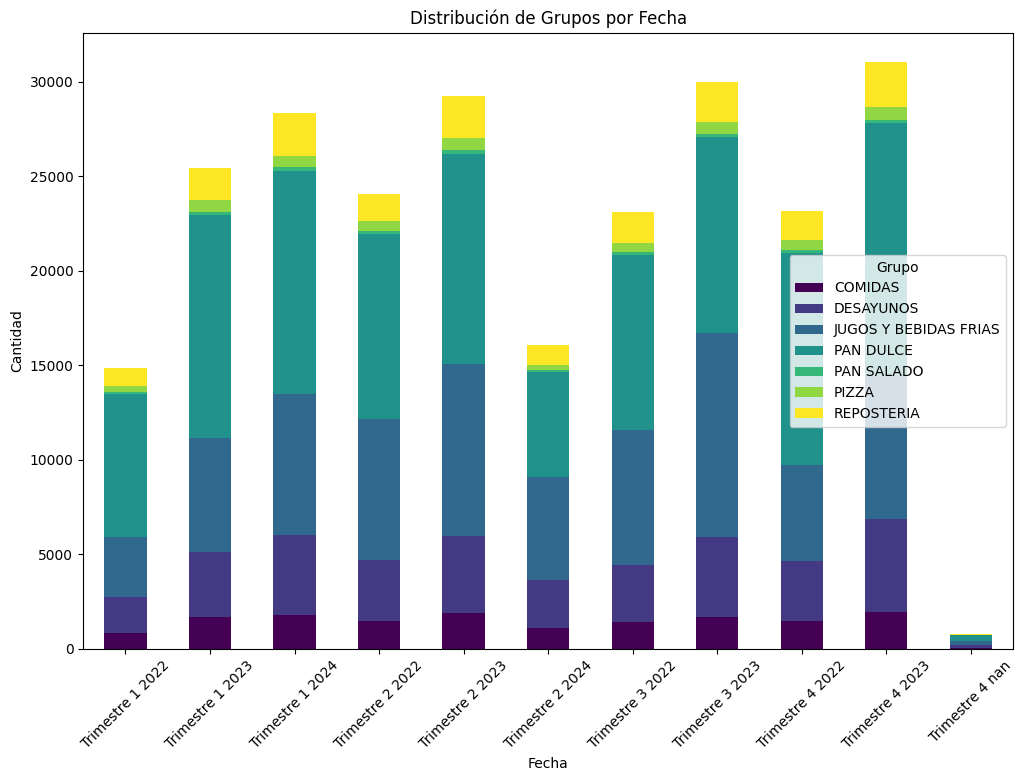

In [103]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Supongamos que quieres hacer un gráfico de barras de los grupos por fecha
# Primero, agrupar los datos por 'Fecha' y 'Grupo', y contar las ocurrencias
grupo_por_fecha = df_grupo_max_frecu.groupby(['trimestre', 'Grupo']).size().unstack(fill_value=0)

# Graficar los datos
grupo_por_fecha.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Personalizar el gráfico
ax.set_title('Distribución de Grupos por Fecha')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad')
ax.legend(title='Grupo')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


<Figure size 2400x1400 with 0 Axes>

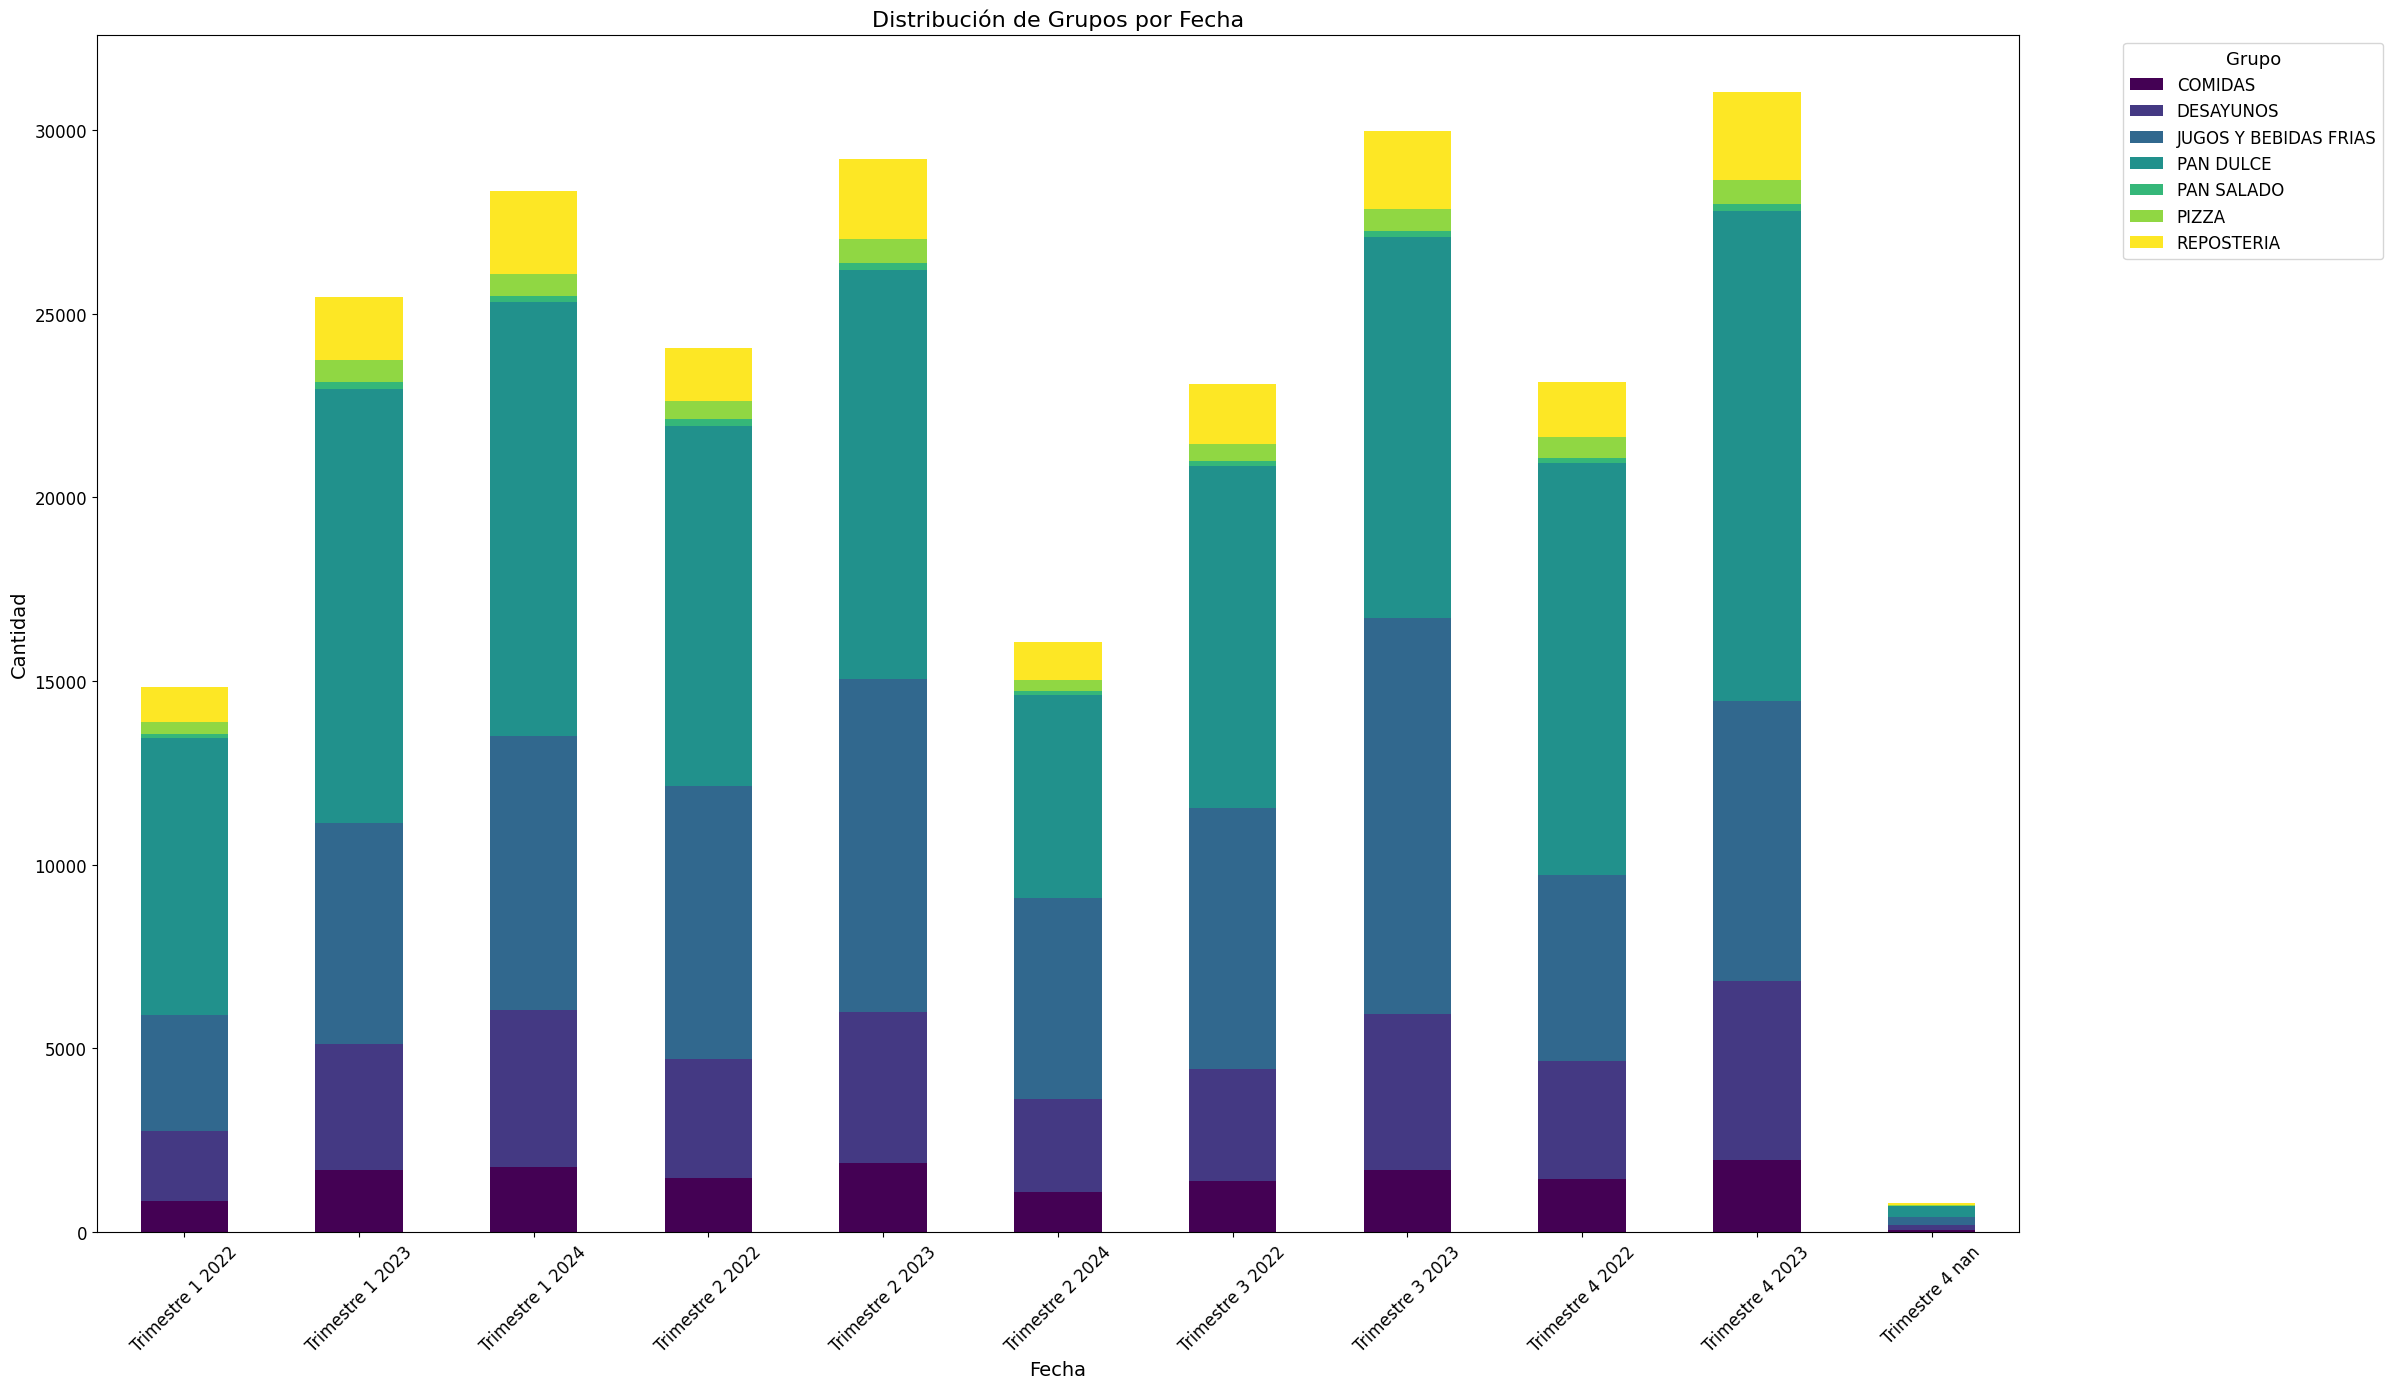

In [106]:
# Agrupar por 'Fecha' y 'Grupo' y contar las ocurrencias
grupo_por_fecha = df_grupo_max_frecu.groupby(['trimestre', 'Grupo']).size().unstack(fill_value=0)

# Configurar el tamaño del gráfico antes de graficar
plt.figure(figsize=(24, 14))

# Graficar el DataFrame
ax = grupo_por_fecha.plot(kind='bar', stacked=True, colormap='viridis', figsize=(24, 14))

# Ajustar título y etiquetas
ax.set_title('Distribución de Grupos por Fecha', fontsize=16)
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Mover la leyenda fuera del gráfico y ajustar su tamaño
ax.legend(title='Grupo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13')

# Ajustar layout para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [108]:
df_grupo_max_frecu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245987 entries, 0 to 498976
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Grupo                245987 non-null  object        
 1   Platillo / Artículo  245987 non-null  object        
 2   Hora de cierre       245191 non-null  datetime64[ns]
 3   Fecha                245191 non-null  datetime64[ns]
 4   Hora                 245191 non-null  datetime64[ns]
 5   trimestre            245987 non-null  object        
dtypes: datetime64[ns](3), object(3)
memory usage: 13.1+ MB


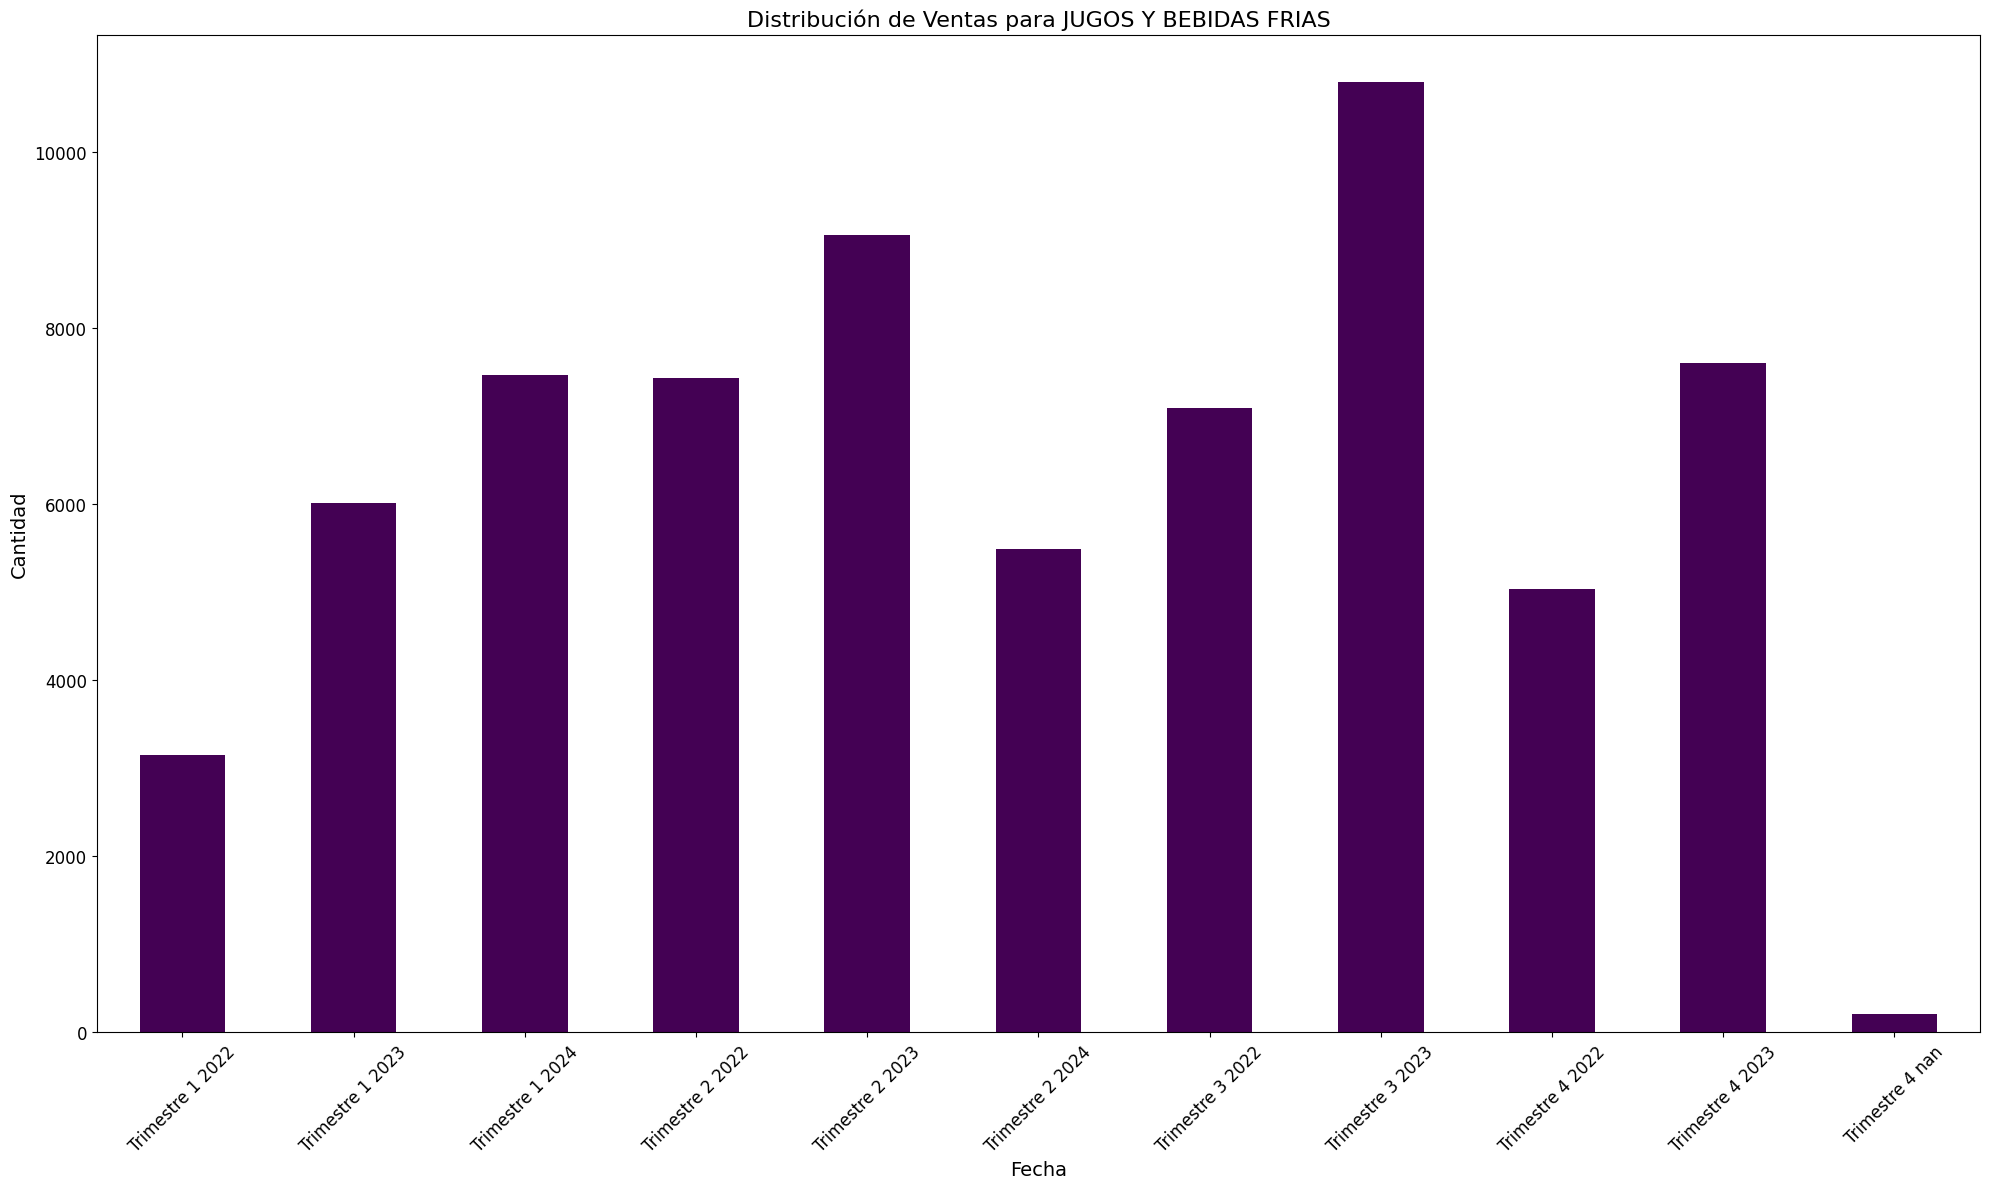

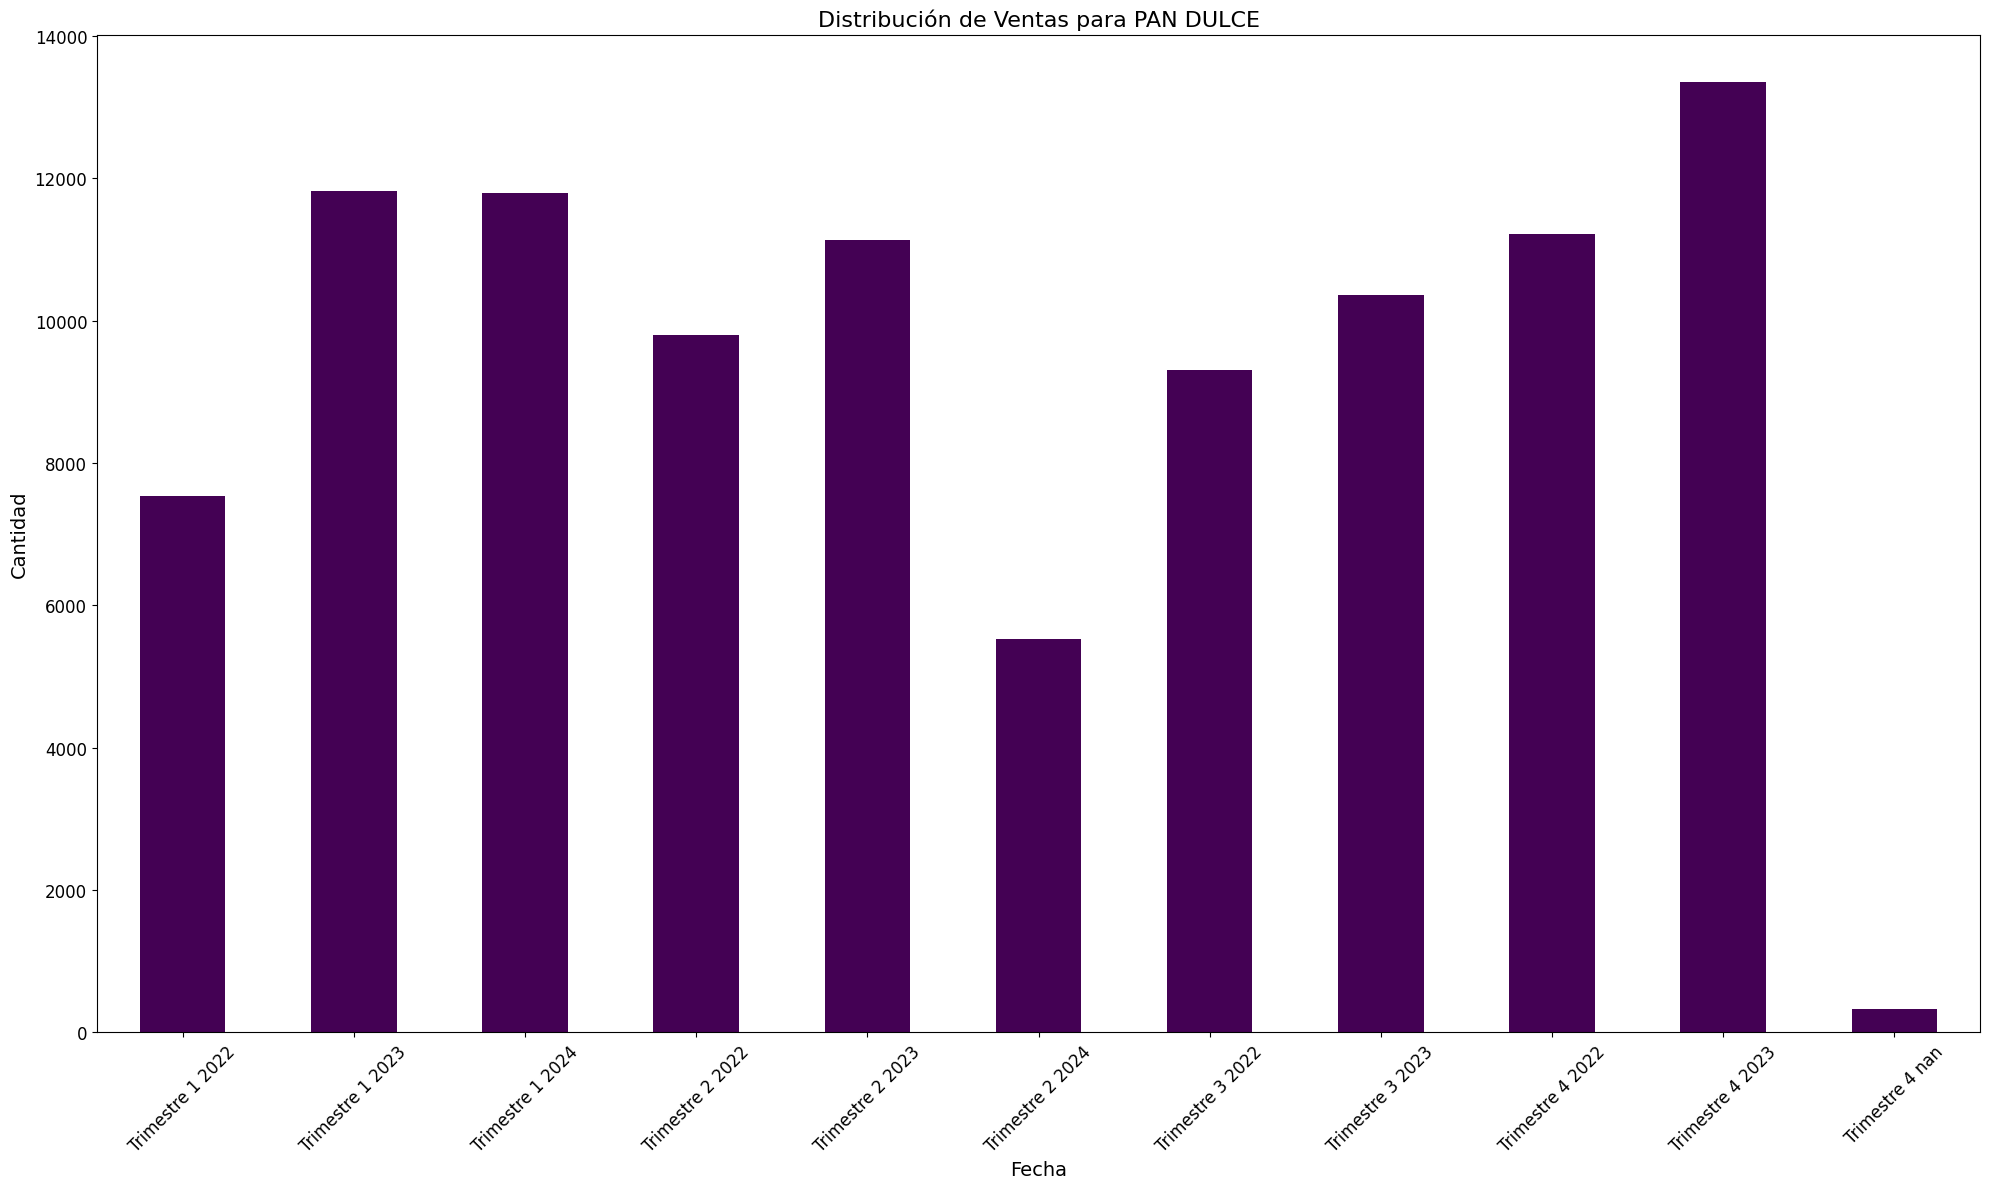

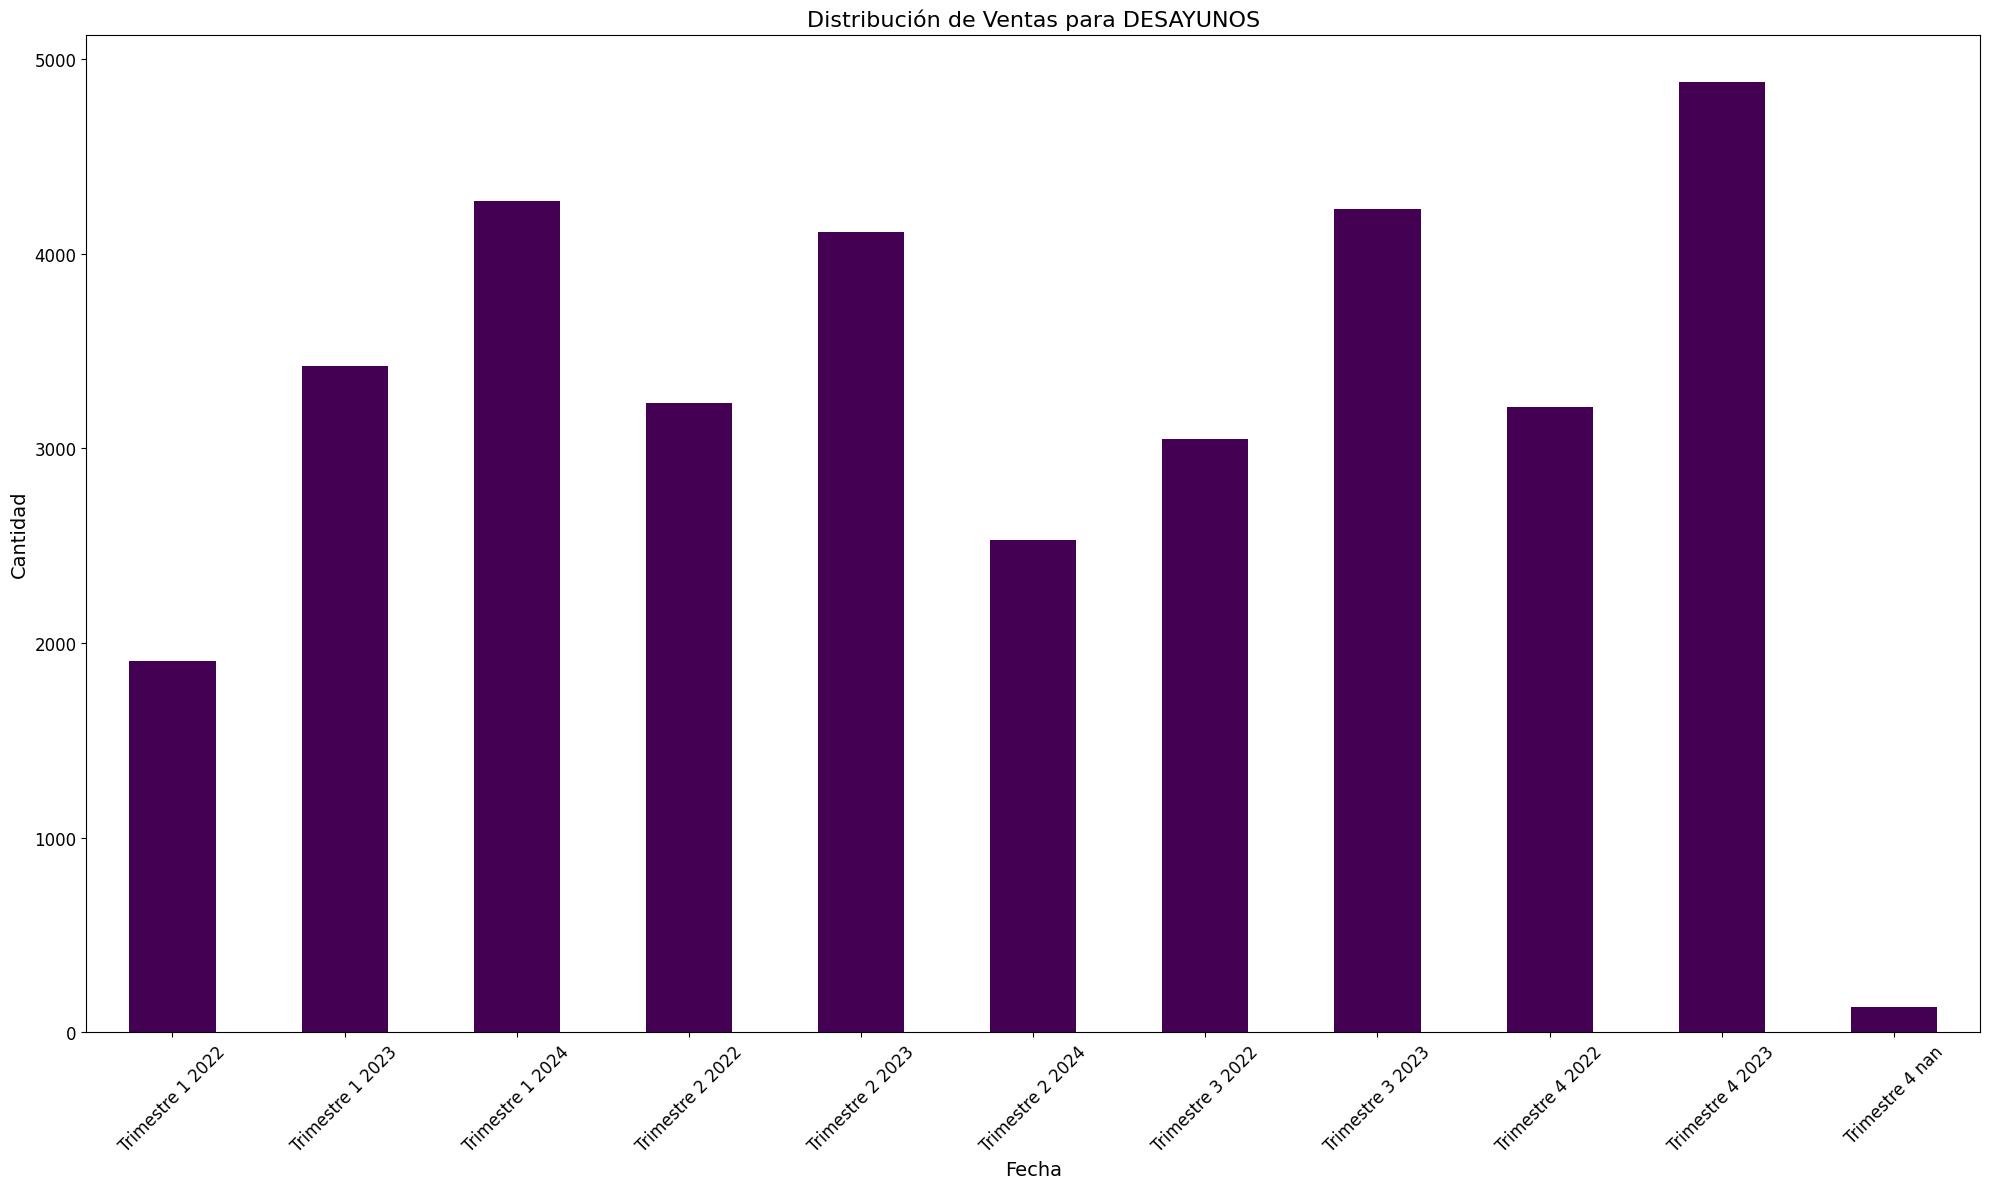

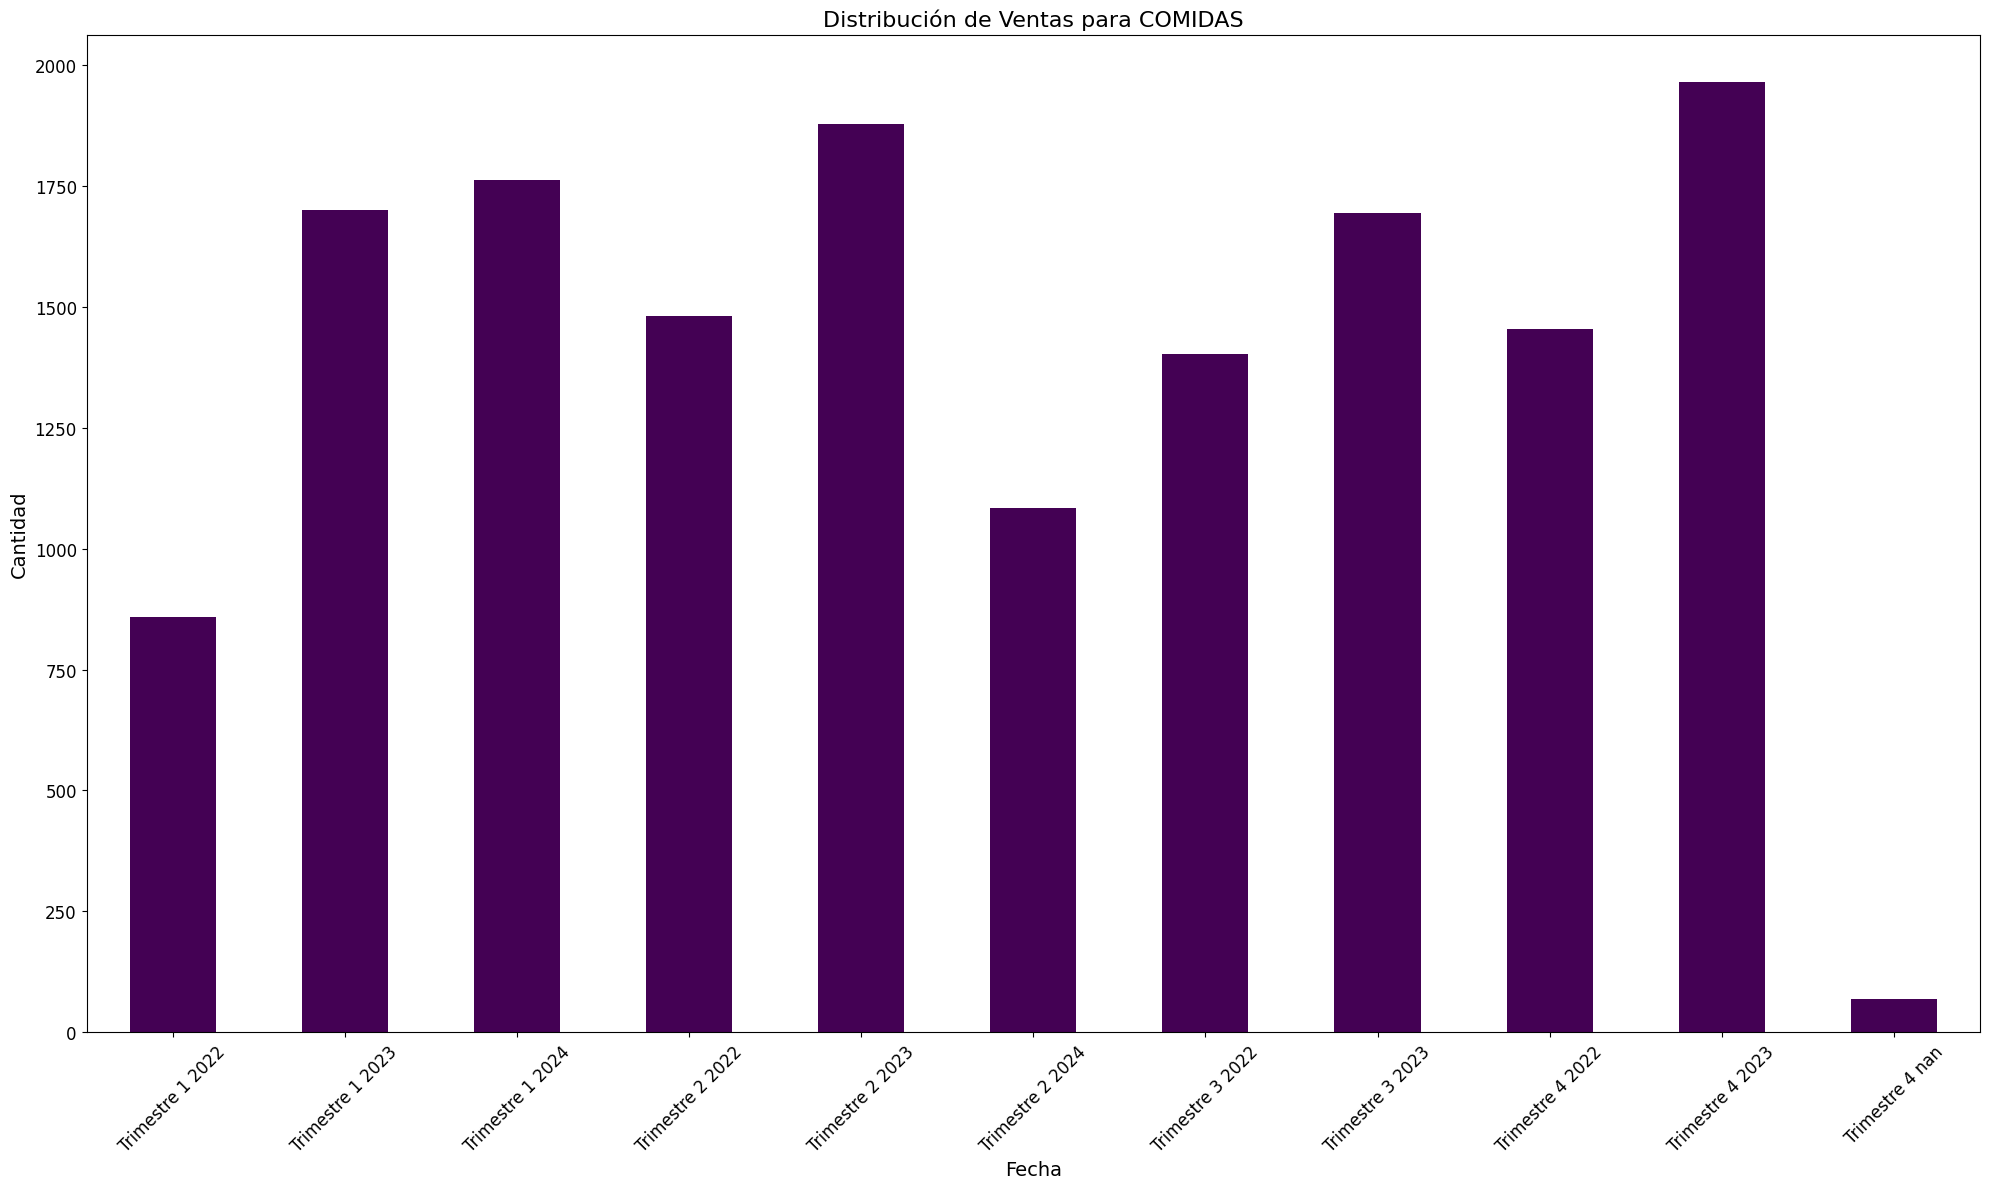

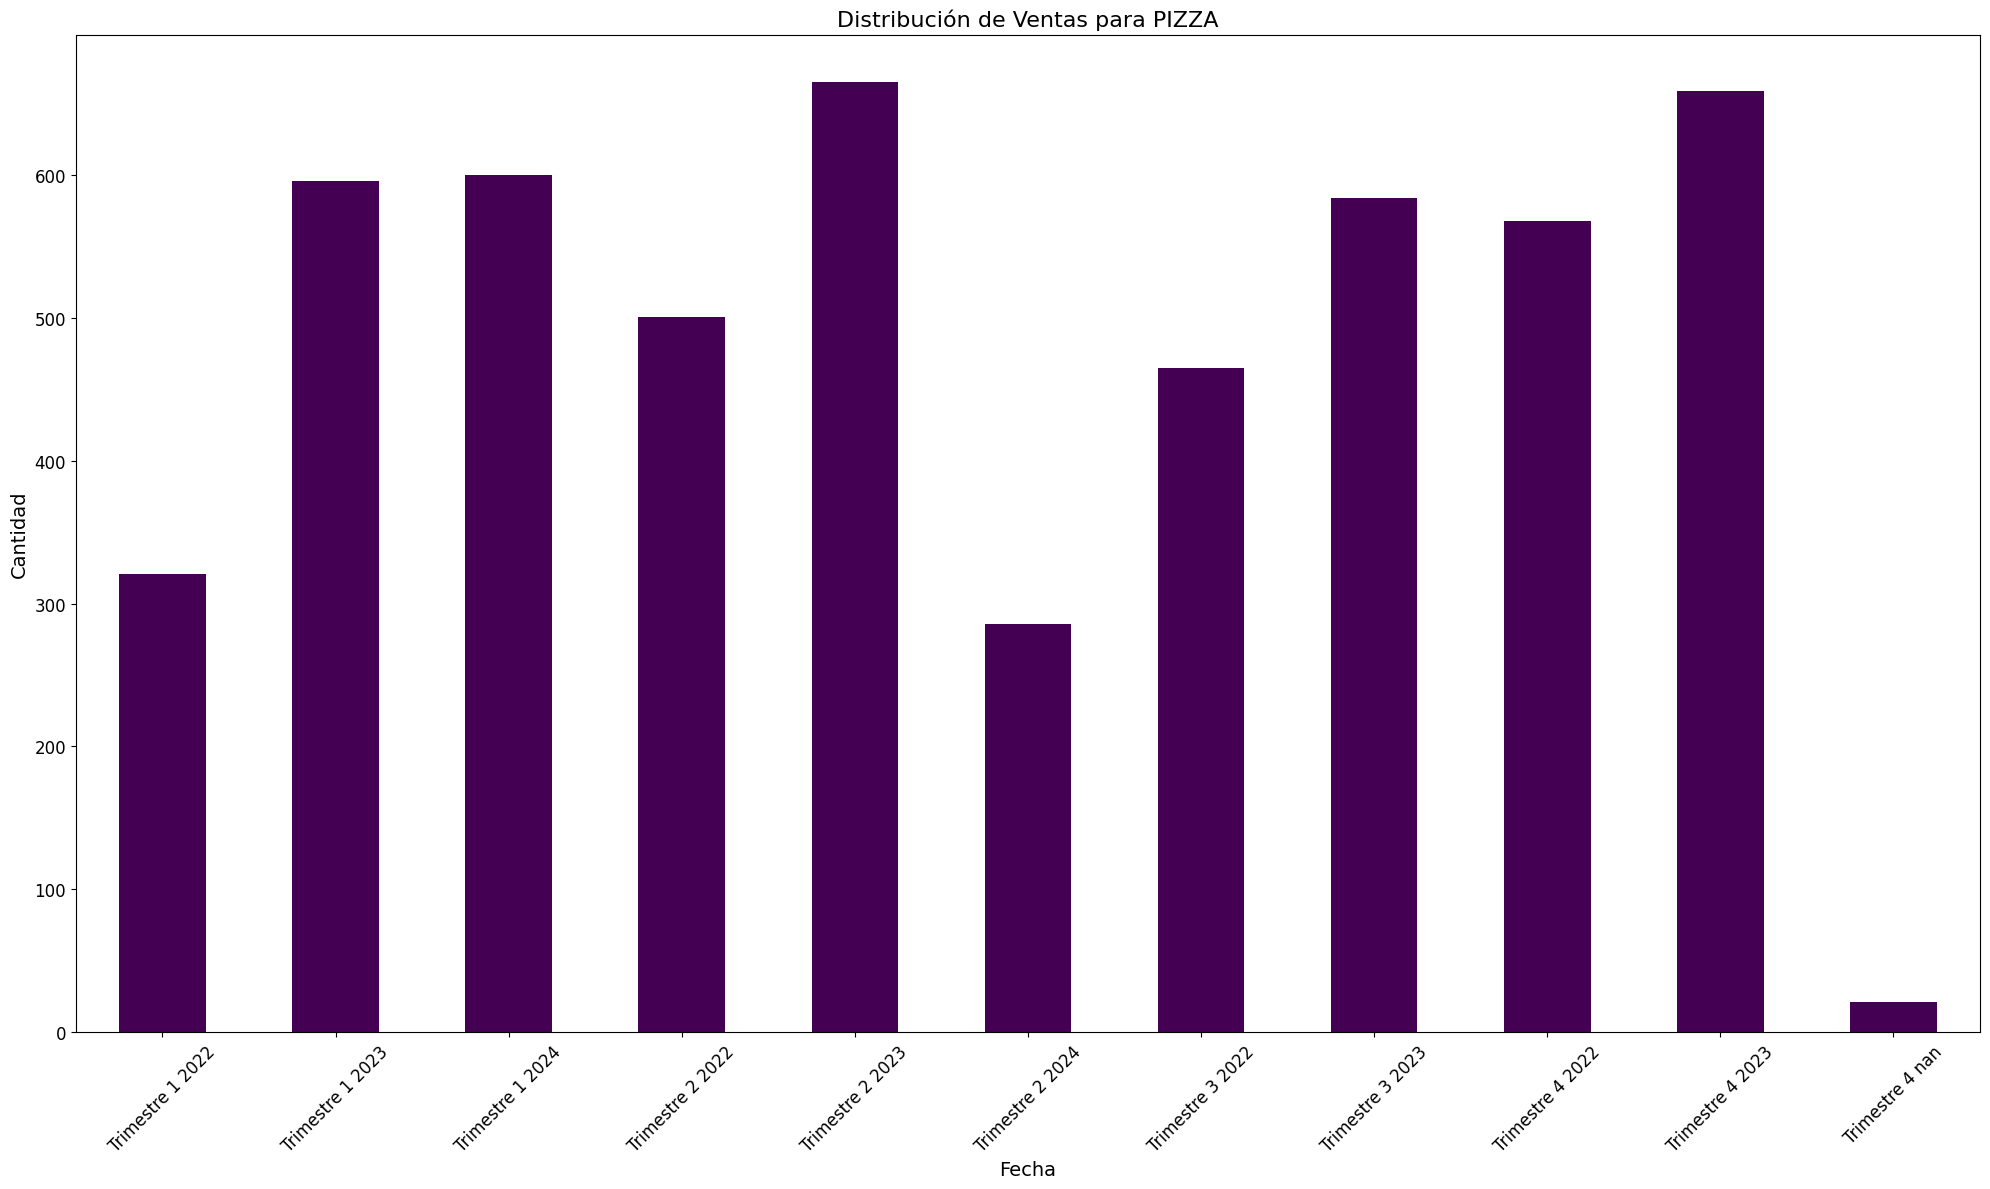

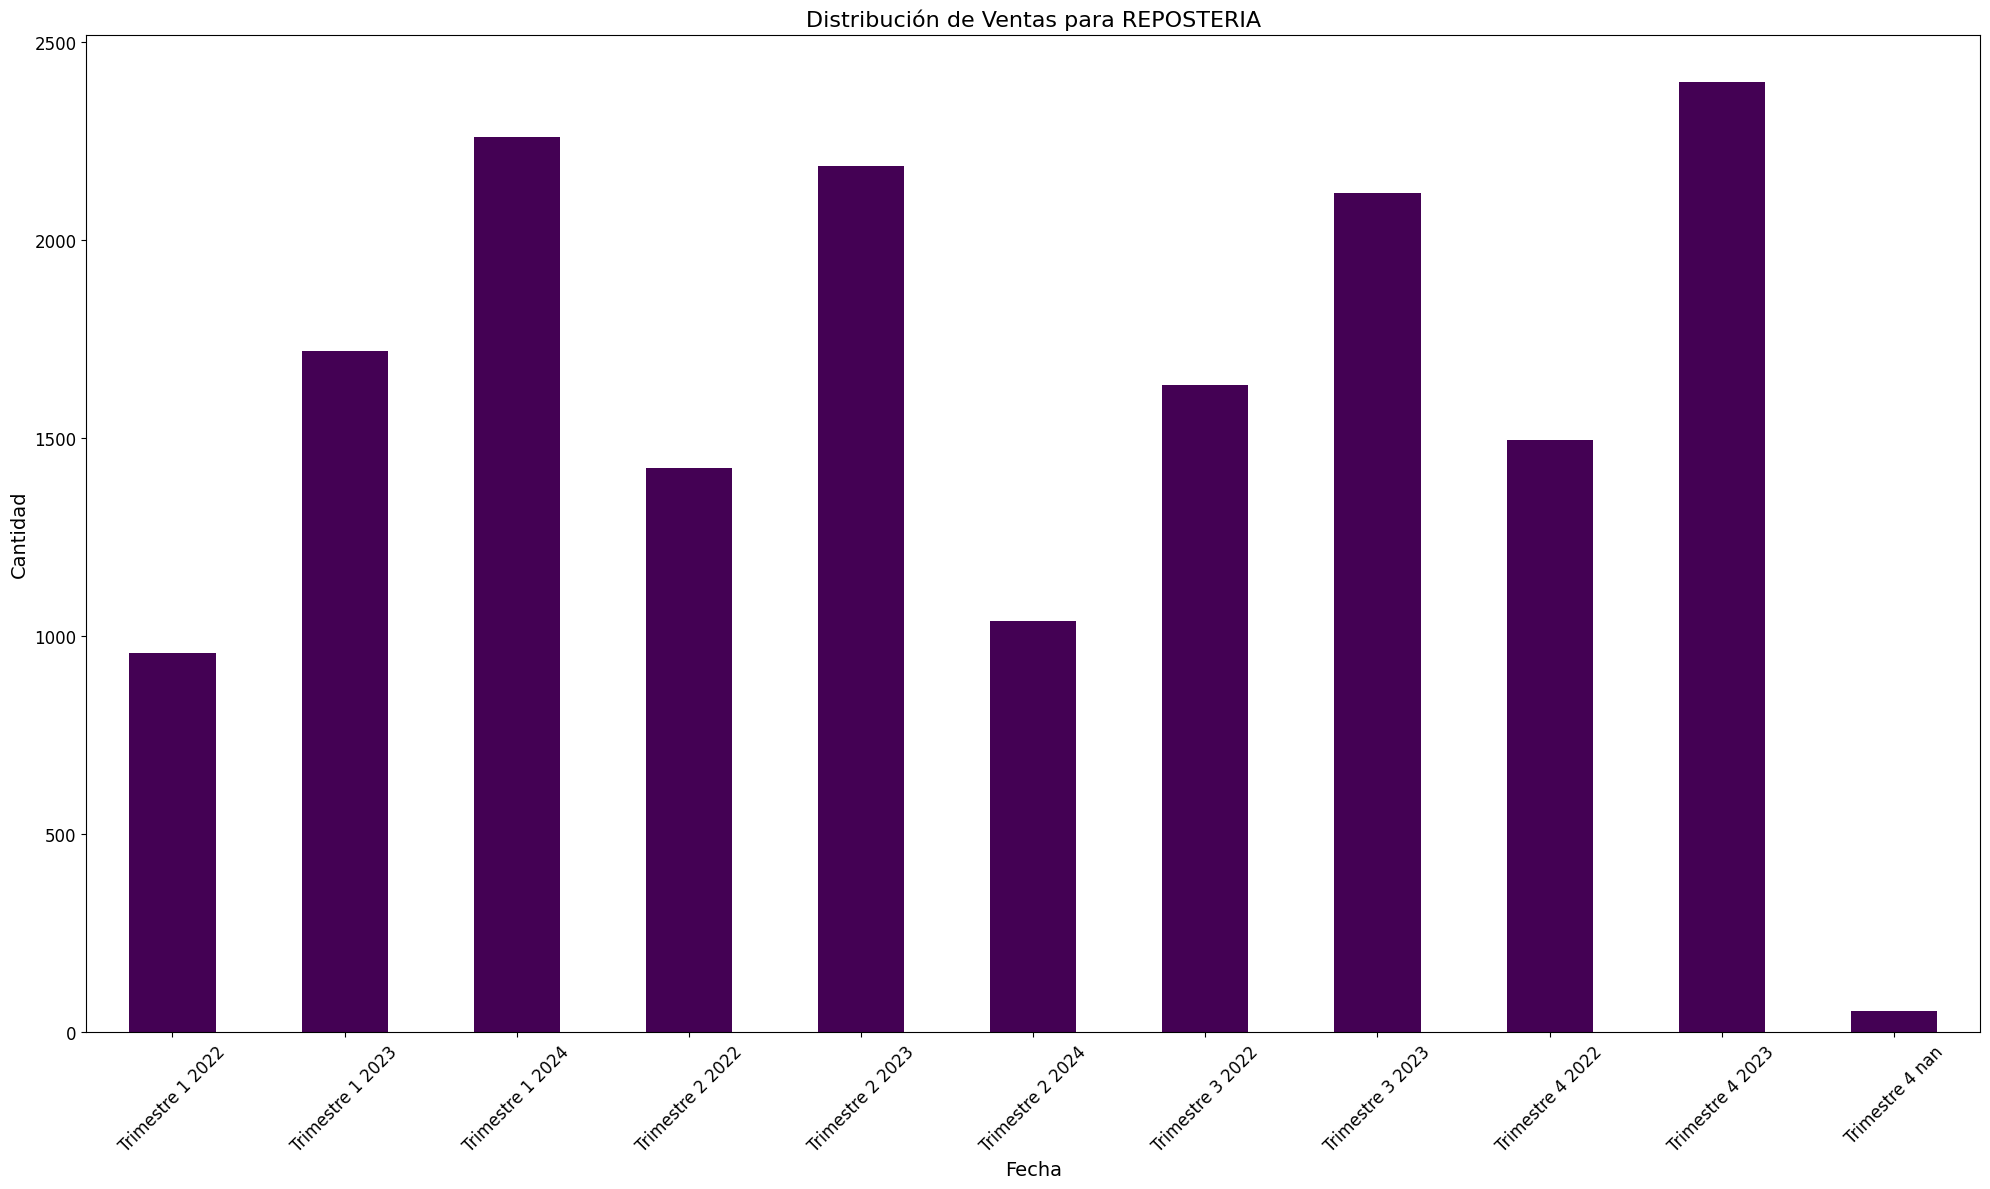

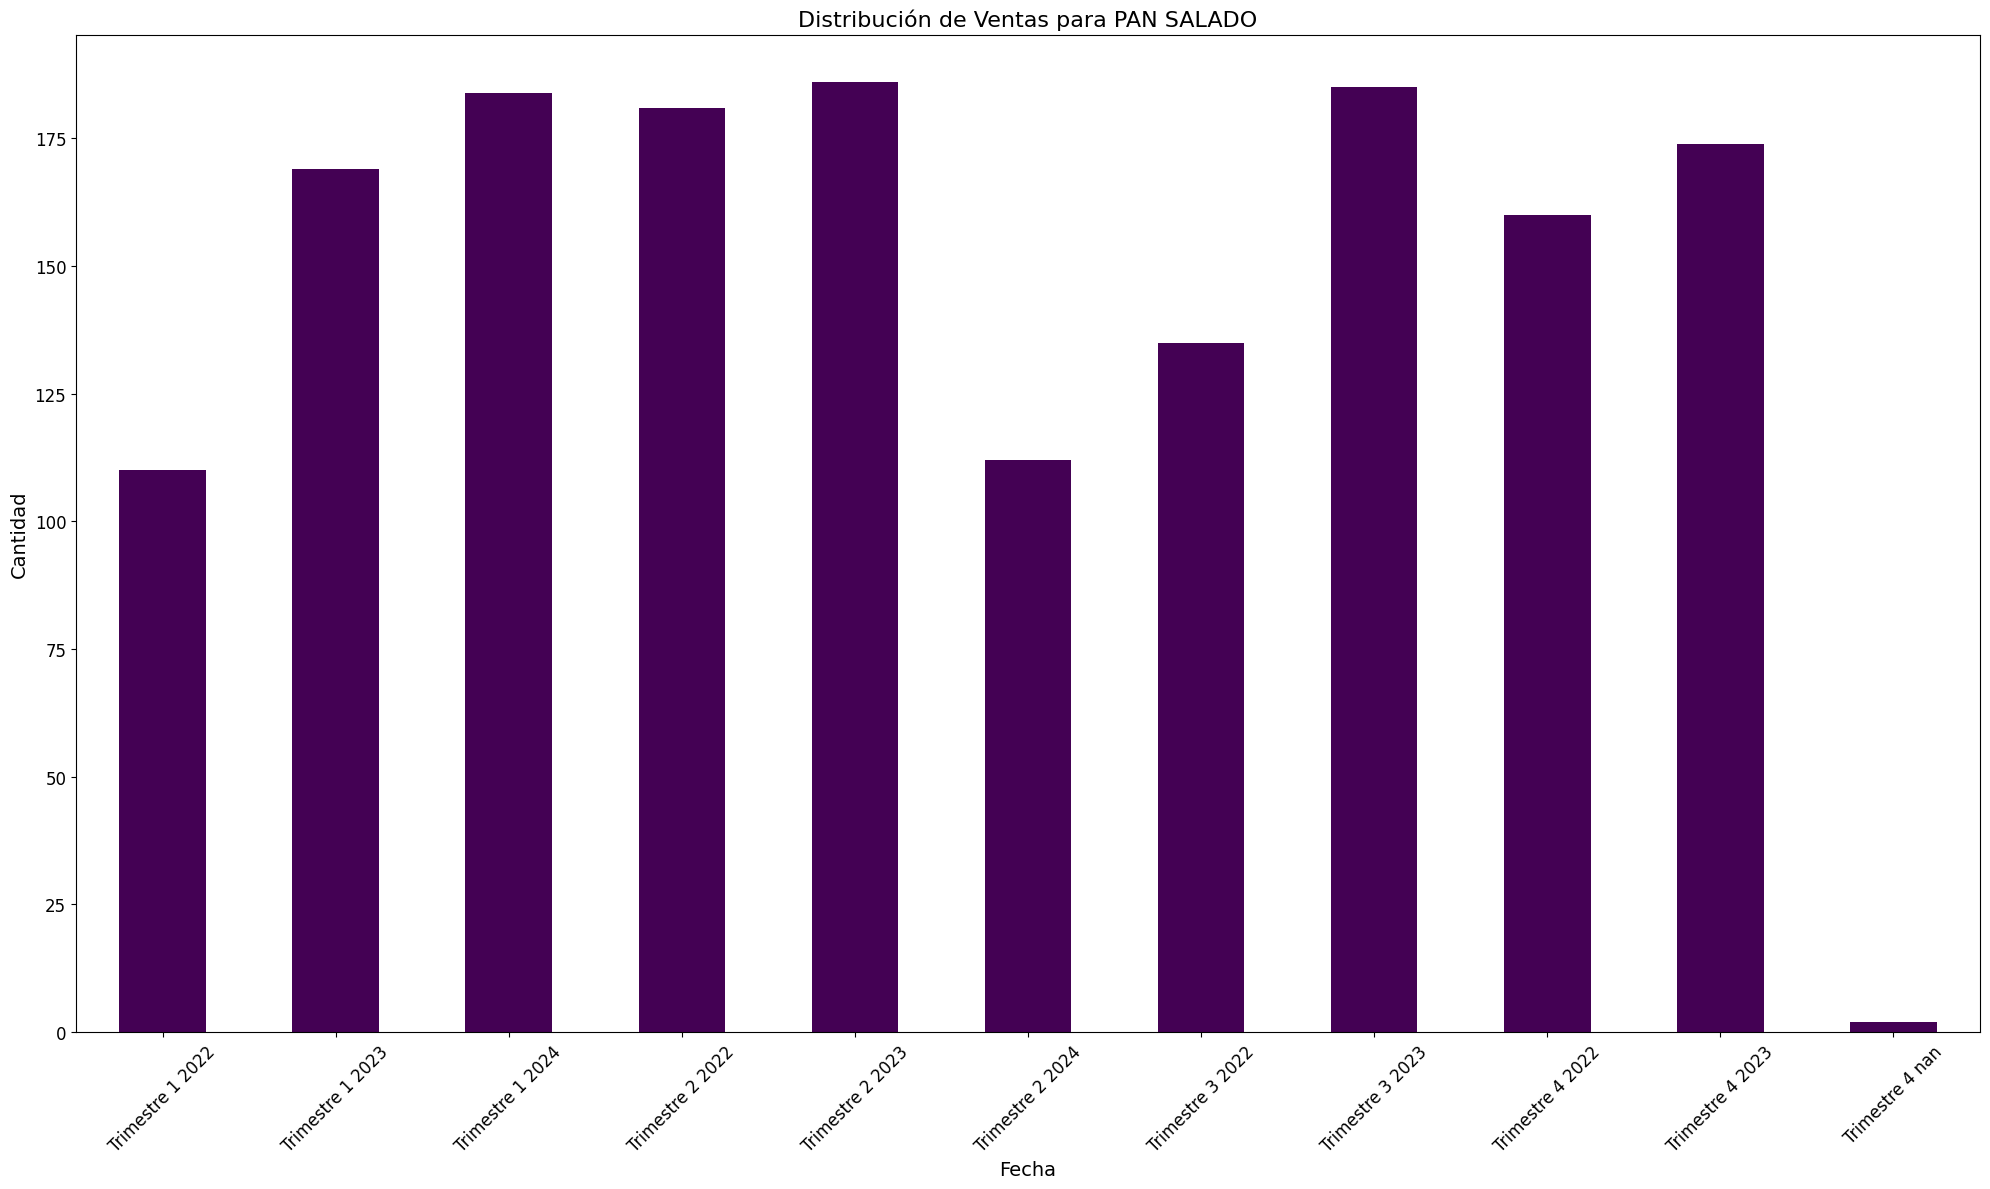

In [109]:
# Obtener la lista de grupos únicos
grupos_unicos = df_grupo_max_frecu['Grupo'].dropna().unique()

# Configurar el tamaño del gráfico
figsize = (20, 12)

# Iterar sobre cada grupo único y crear un gráfico separado
for grupo in grupos_unicos:
    # Filtrar los datos para el grupo actual
    df_grupo = df_grupo_max_frecu[df_grupo_max_frecu['Grupo'] == grupo]
    
    # Agrupar por 'Fecha' y contar las ocurrencias
    grupo_por_fecha = df_grupo.groupby(['trimestre']).size()
    
    # Crear una nueva figura para cada gráfico
    plt.figure(figsize=figsize)
    
    # Graficar el DataFrame
    grupo_por_fecha.plot(kind='bar', colormap='viridis')
    
    # Ajustar título y etiquetas
    plt.title(f'Distribución de Ventas para {grupo}', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Cantidad', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Ajustar layout para evitar superposición
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()


C:\Users\34690\AppData\Local\Temp\ipykernel_18400\3337655953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo_max_frecu['hora_del_dia'] = df_grupo_max_frecu['Hora'].dt.hour


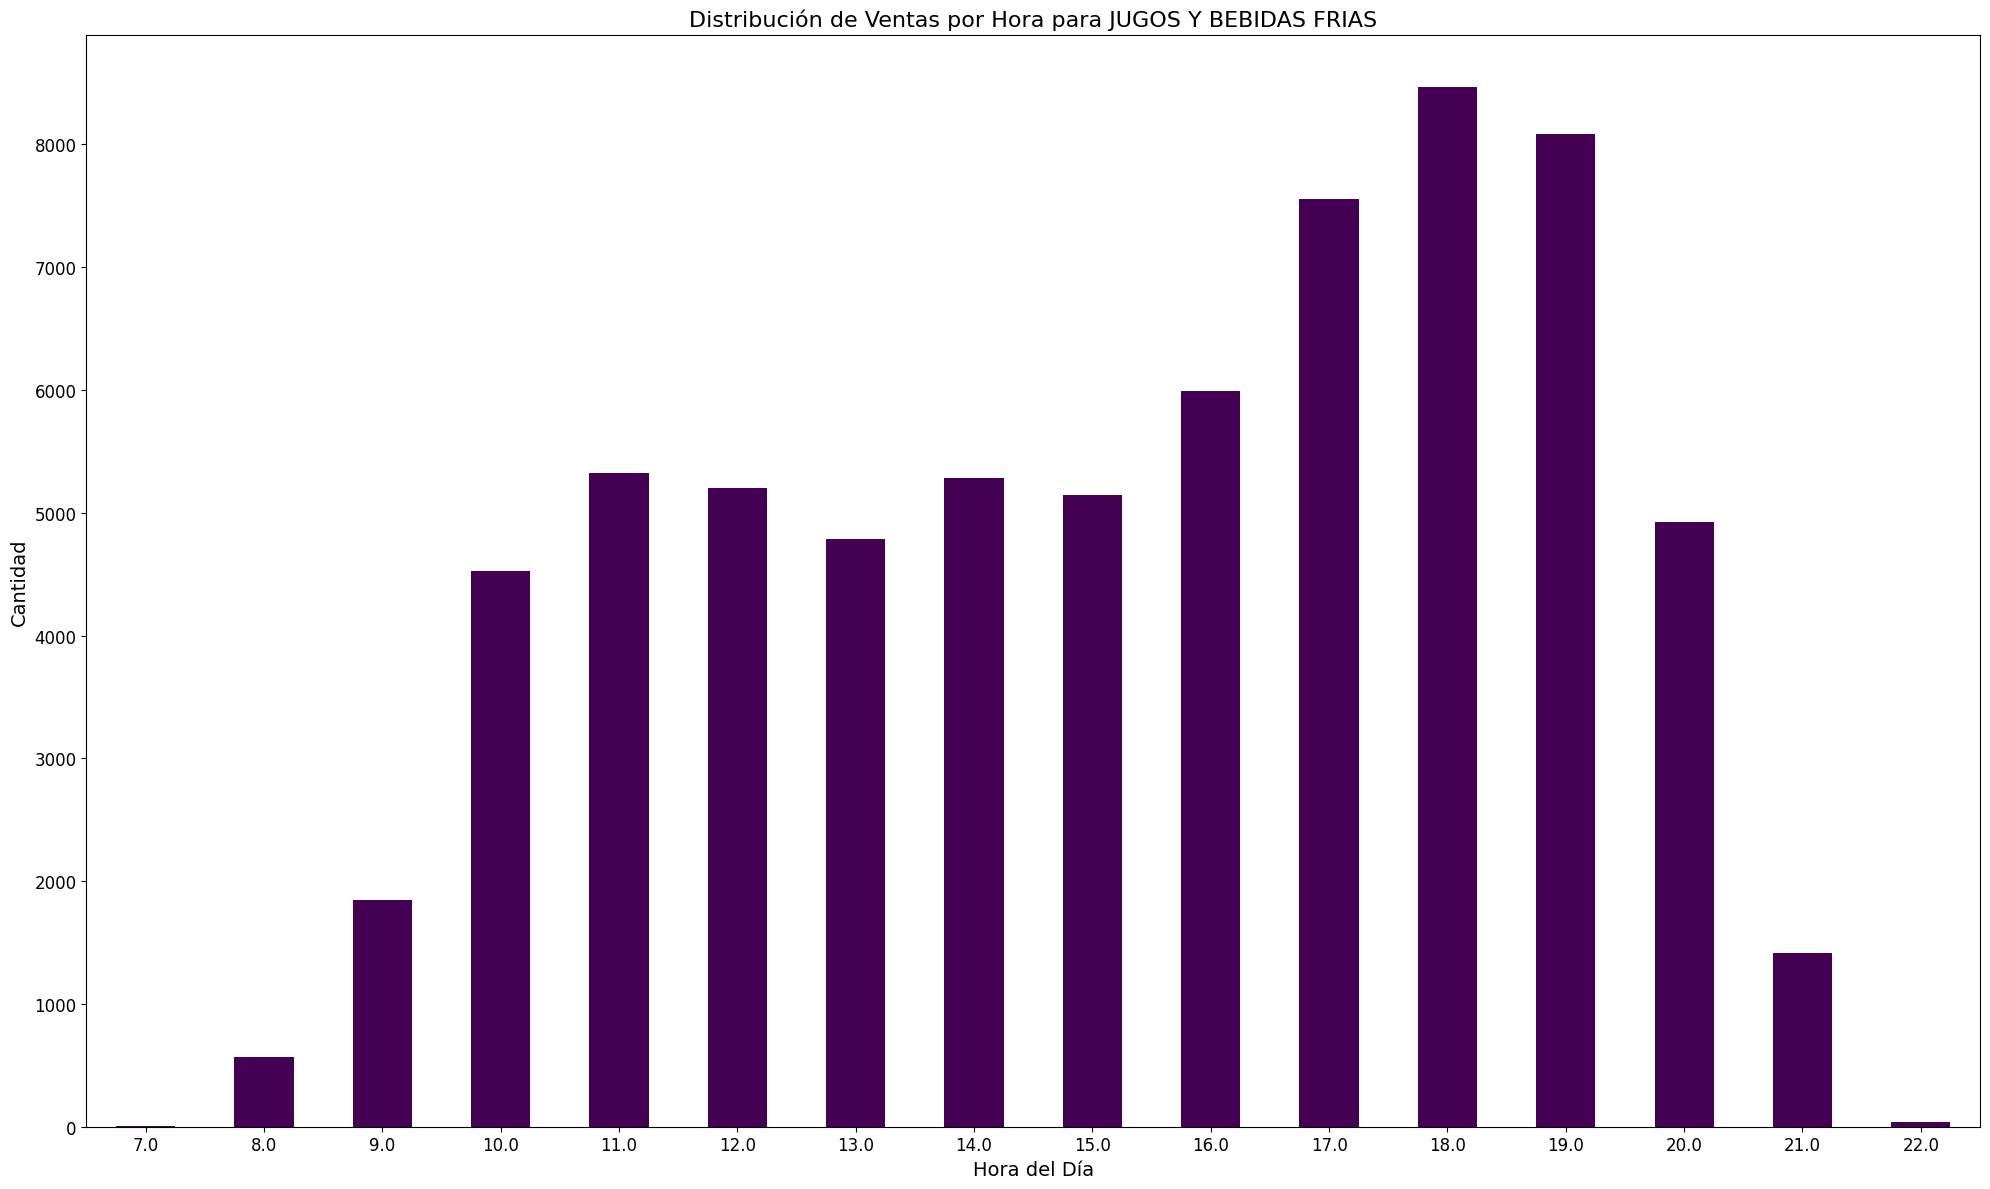

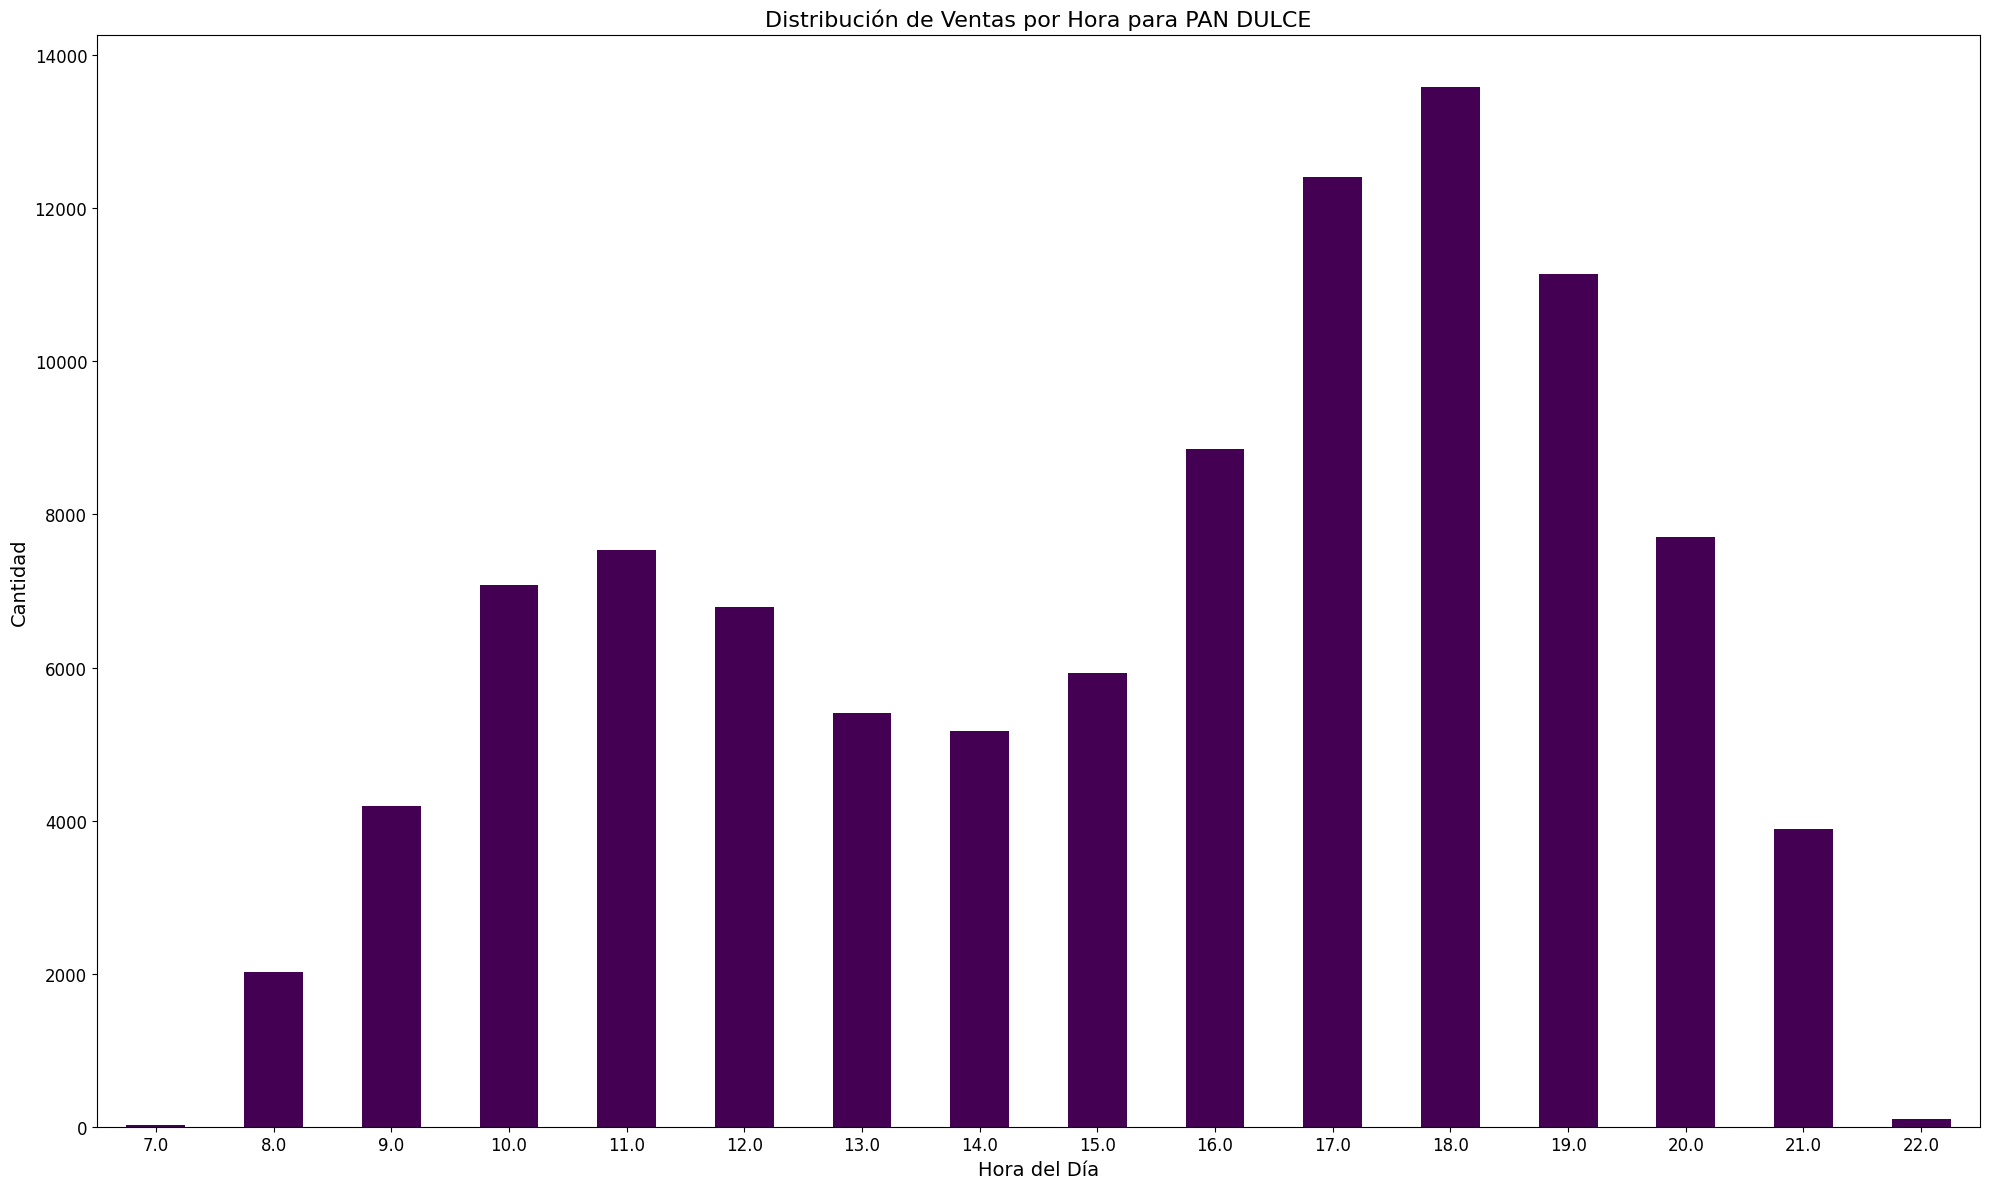

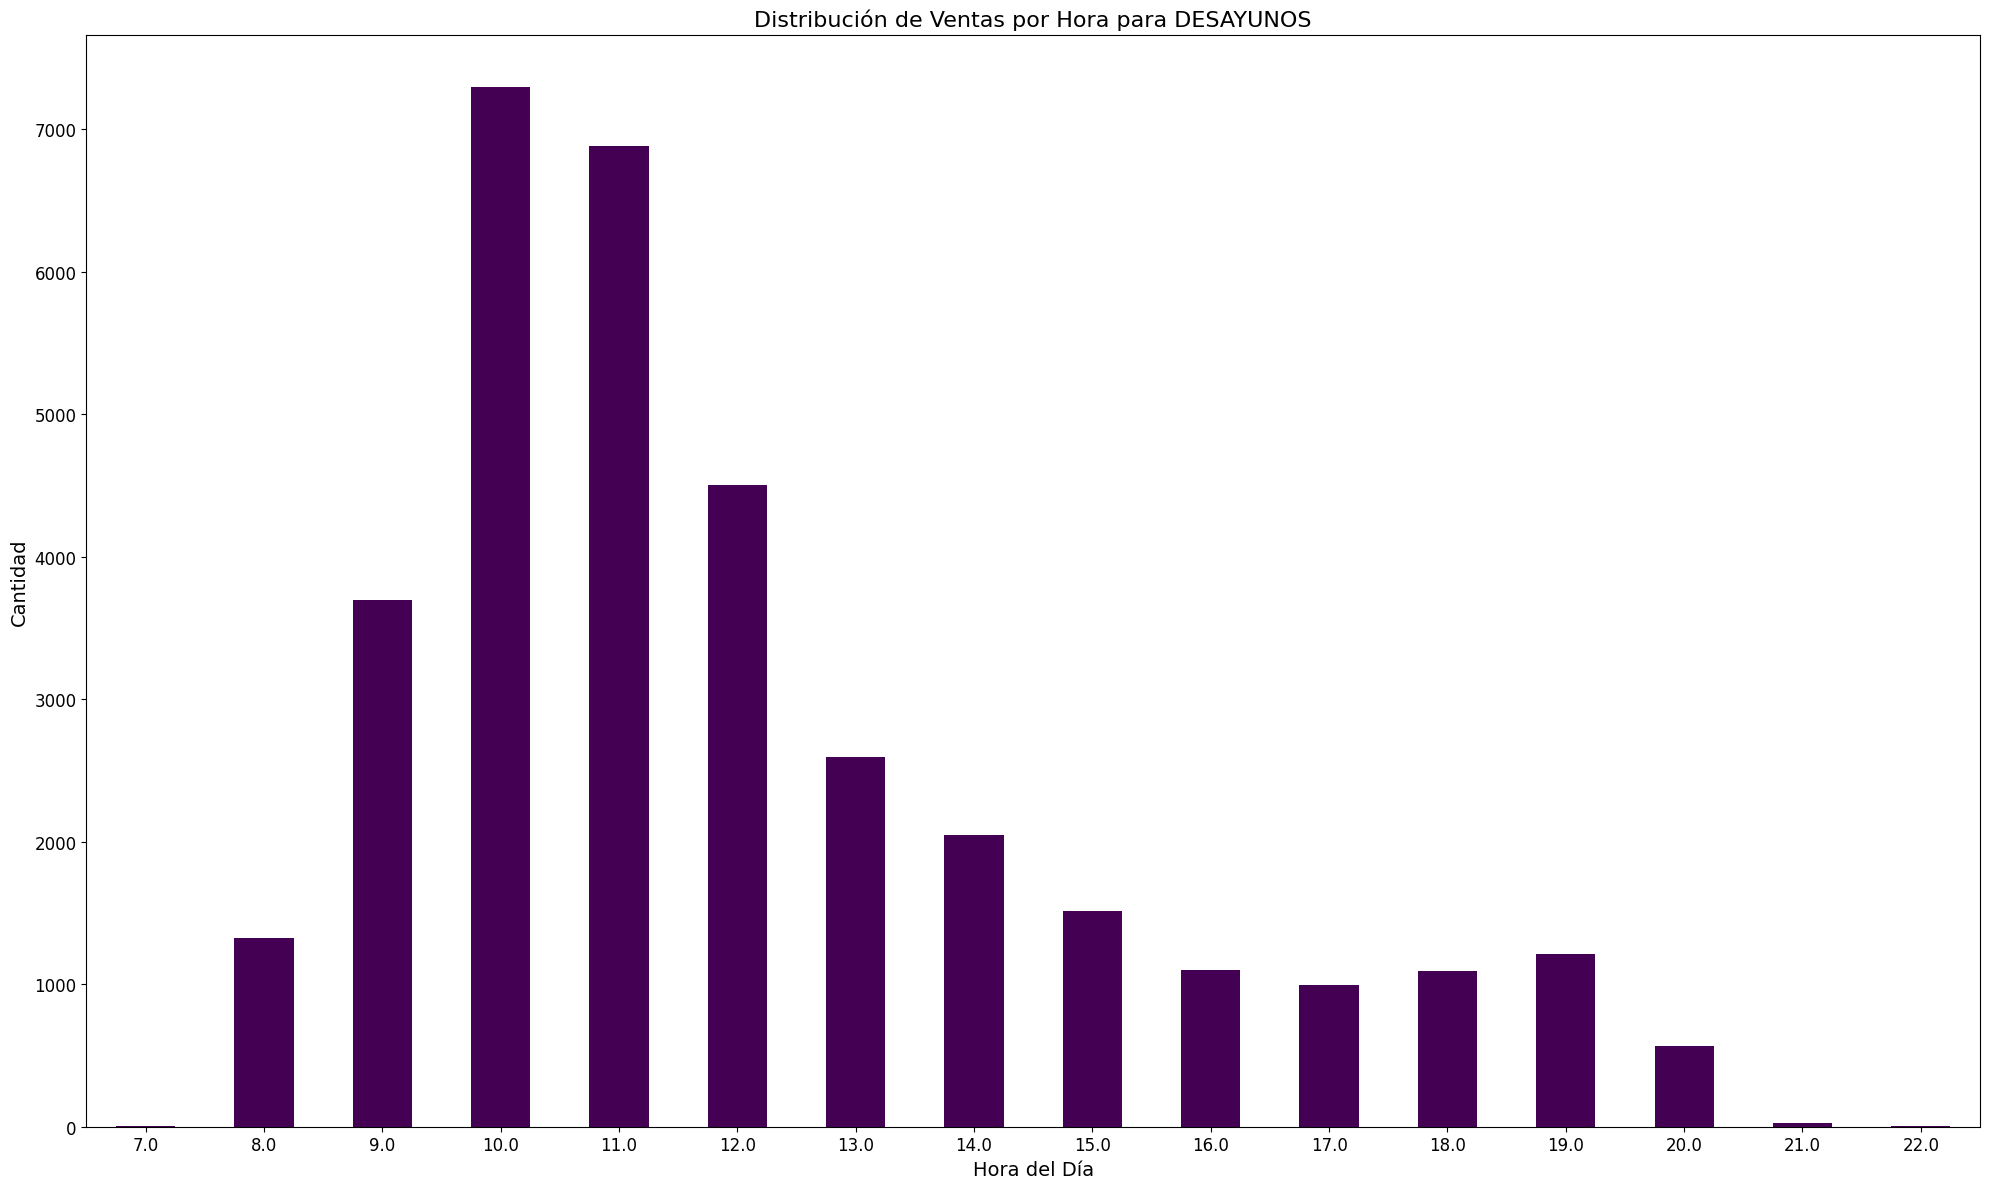

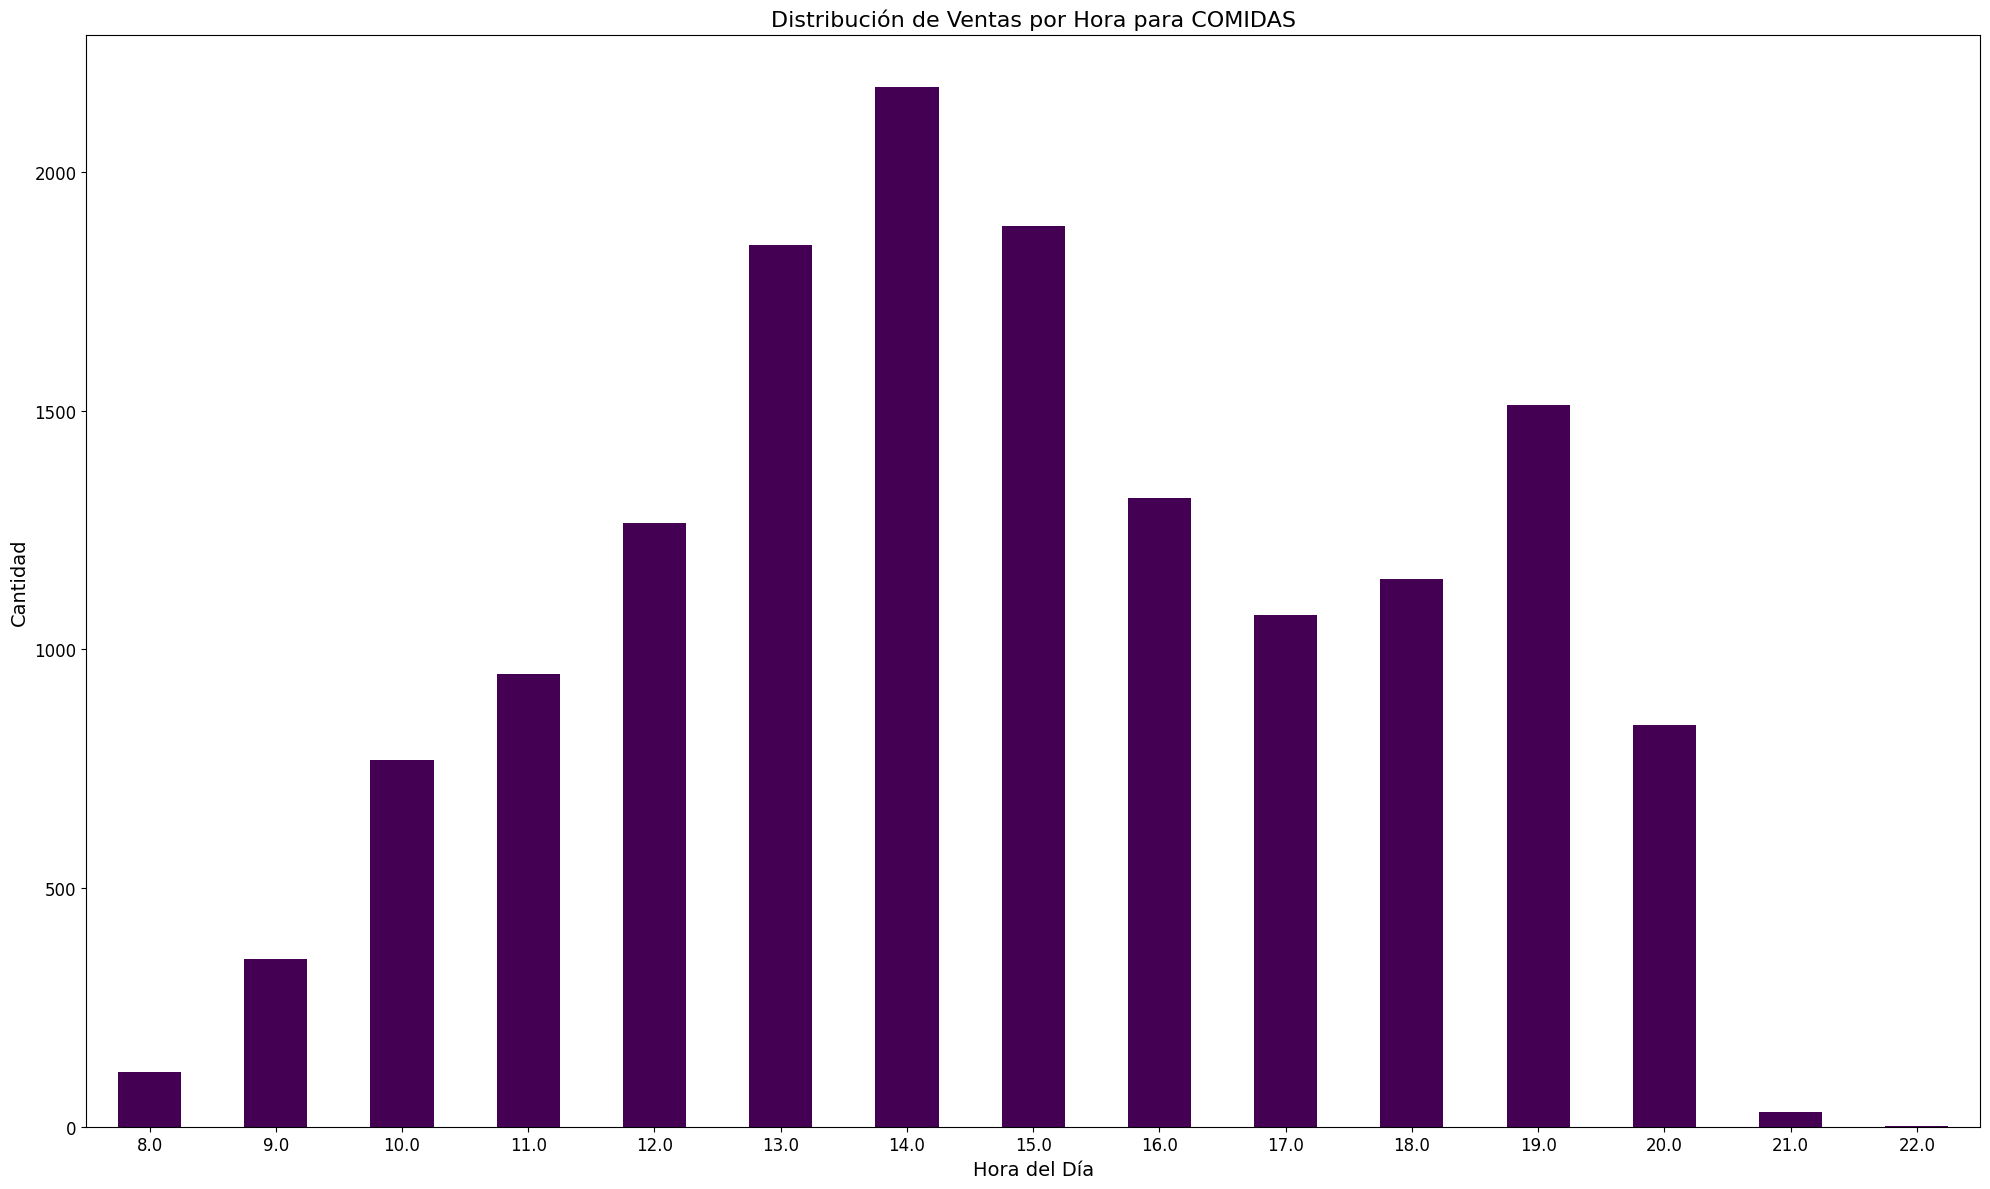

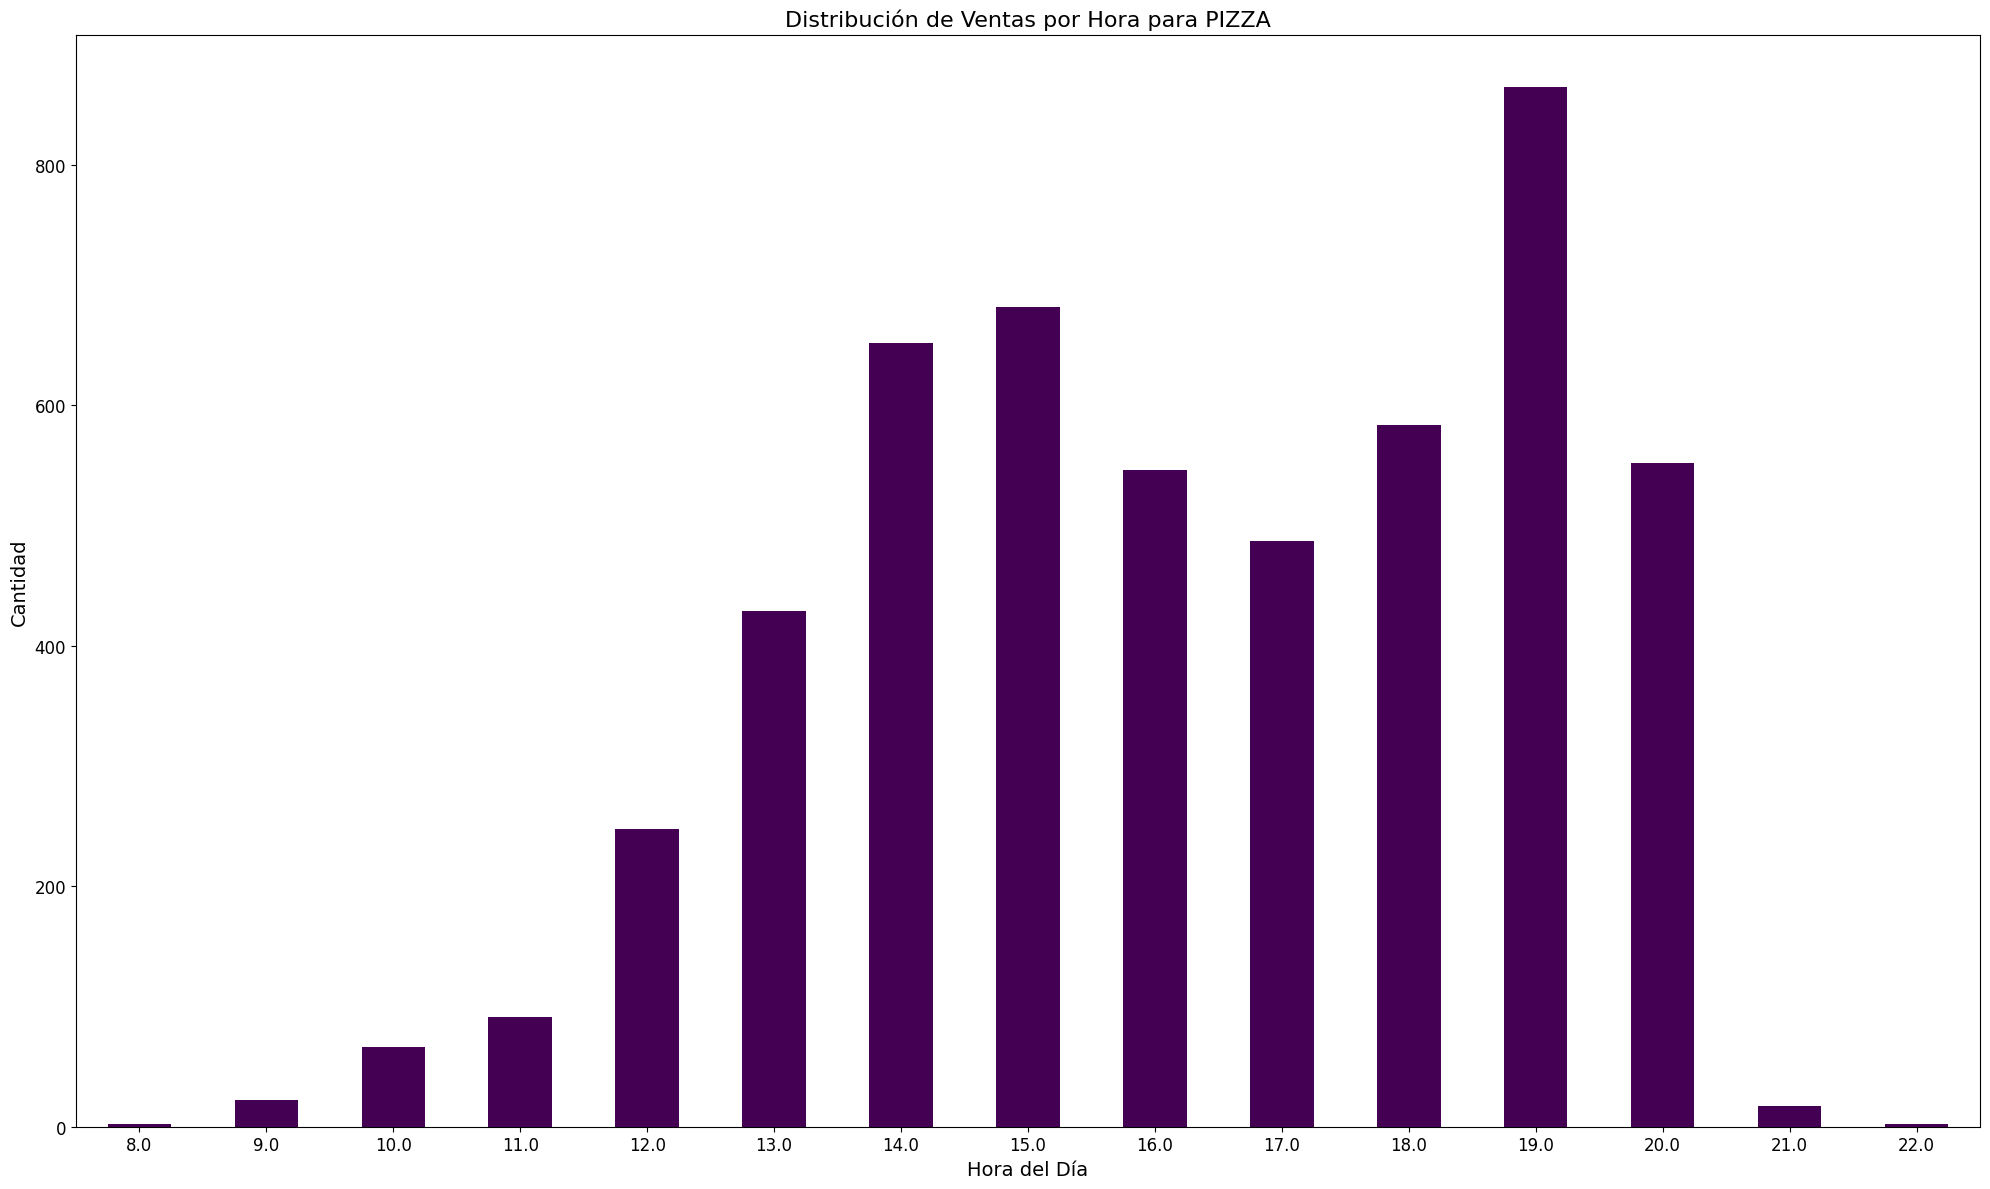

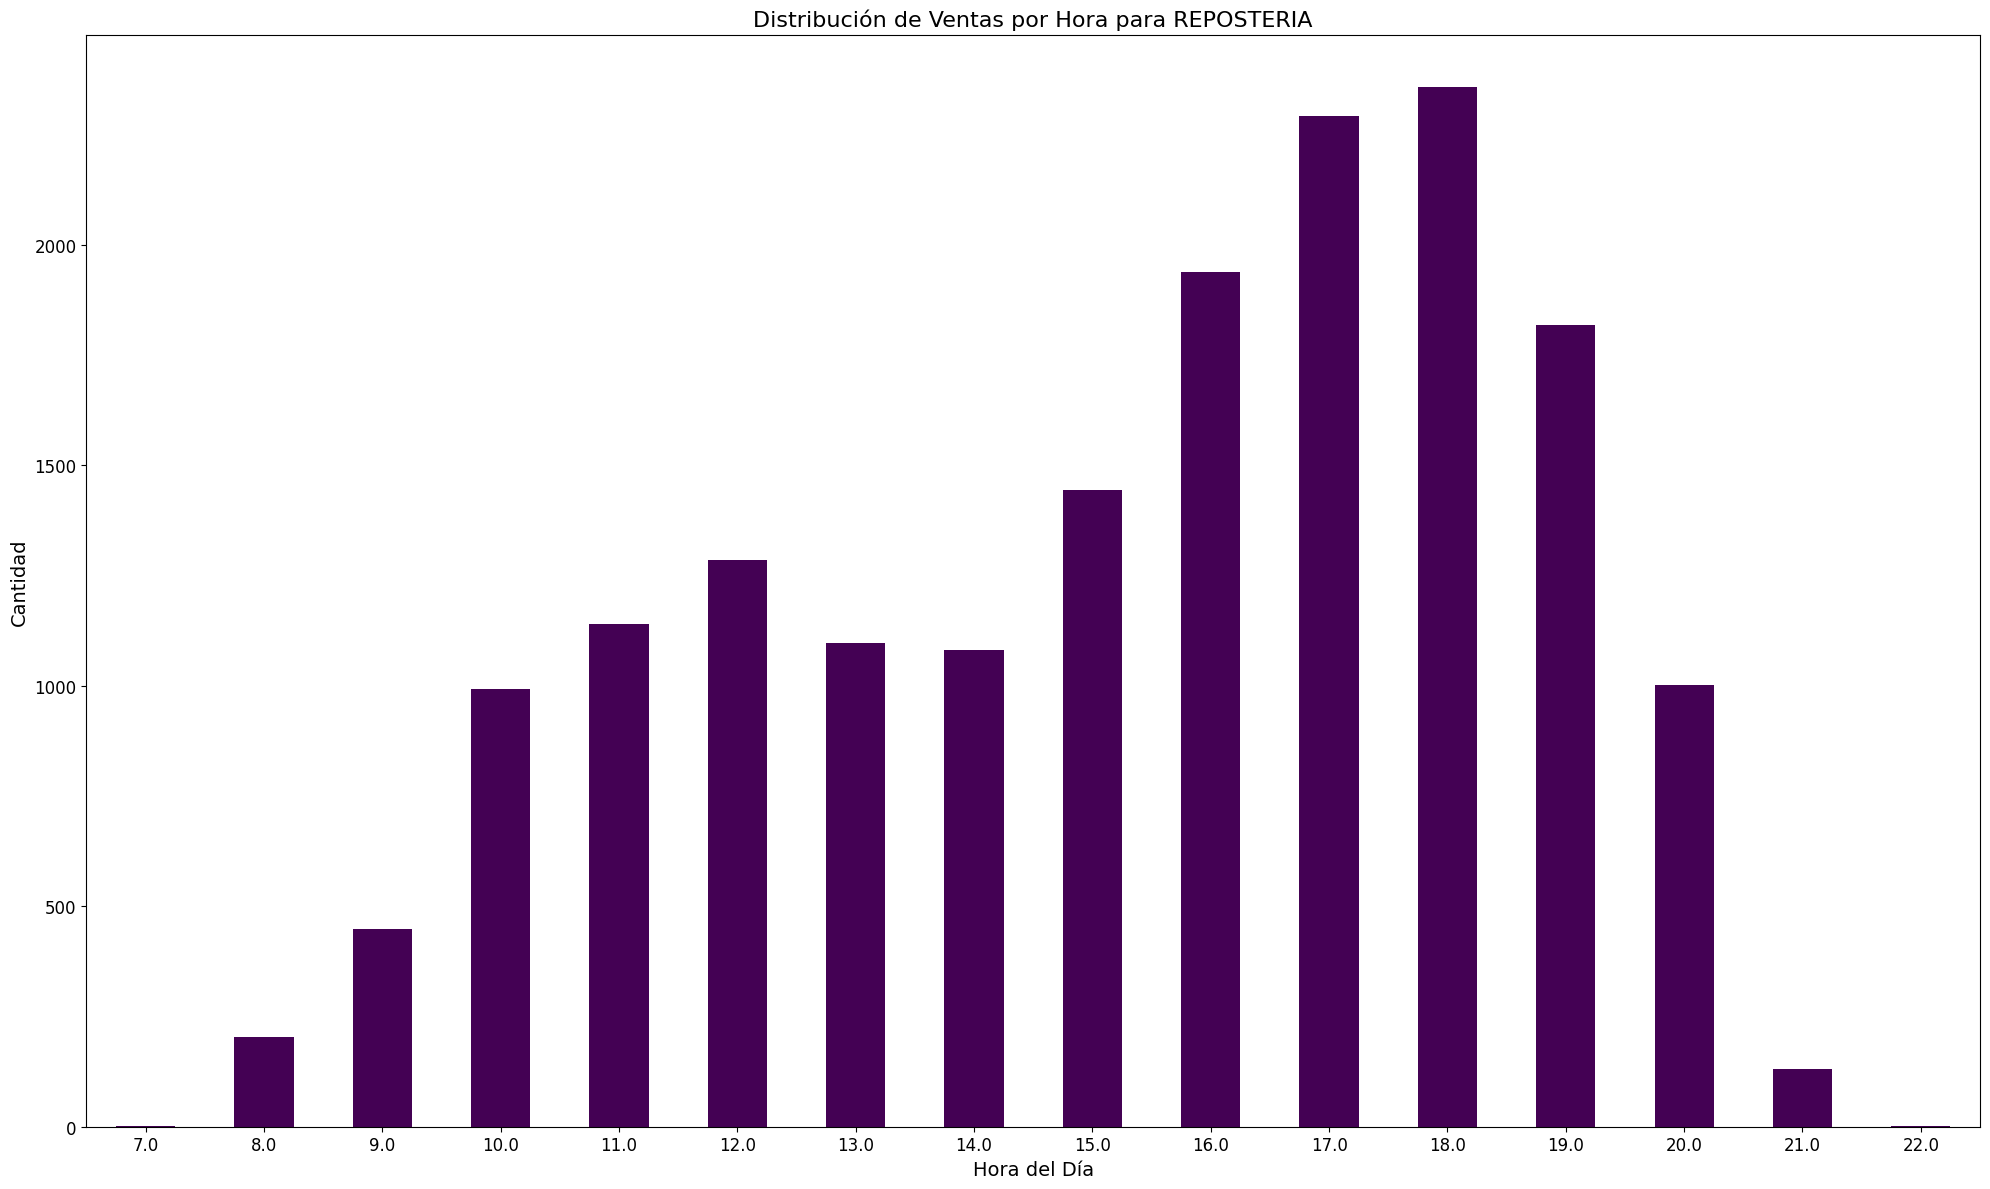

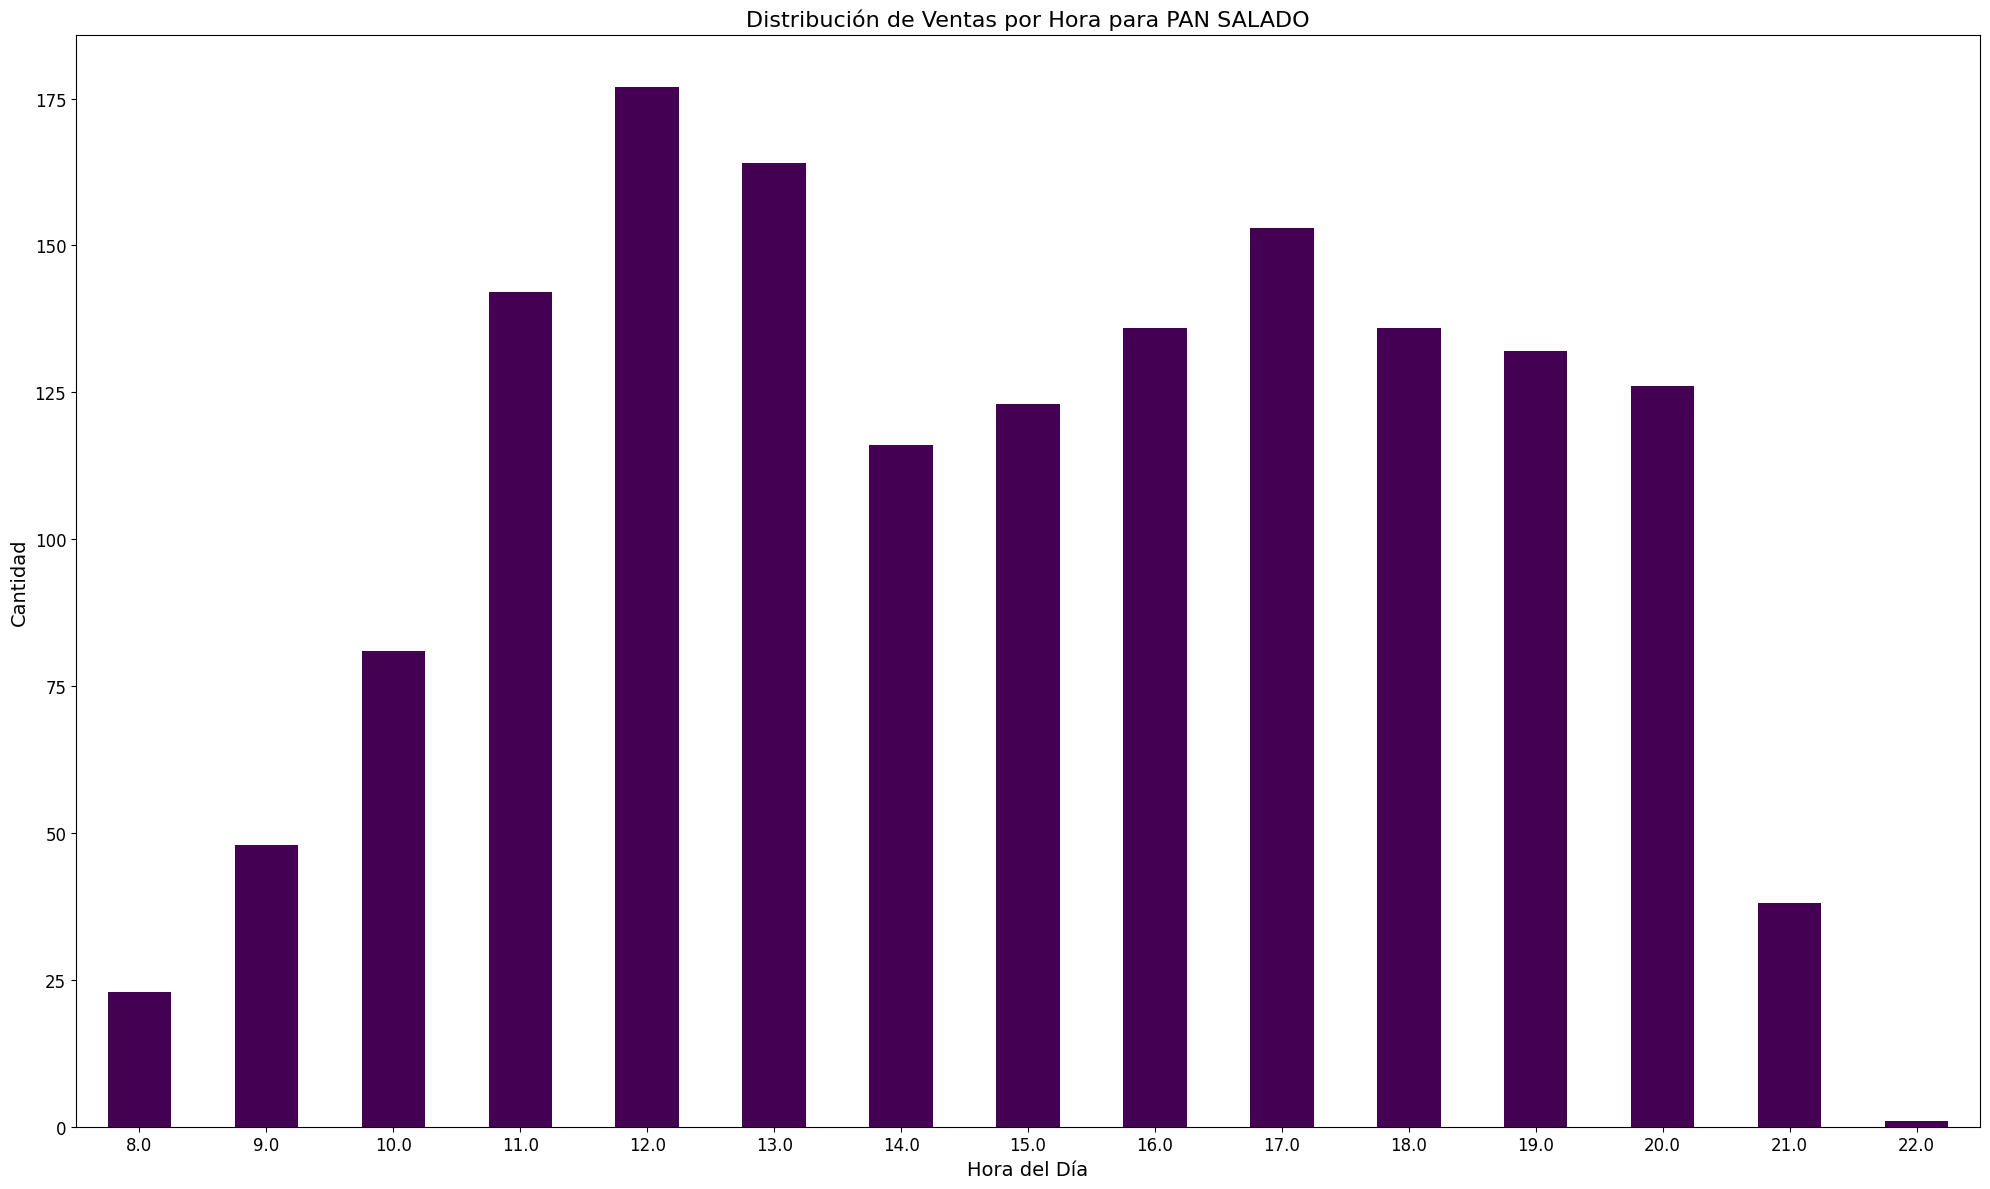

In [111]:
# Extraer la hora del día
df_grupo_max_frecu['hora_del_dia'] = df_grupo_max_frecu['Hora'].dt.hour

figsize = (20, 12)

# Iterar sobre cada grupo único y crear un gráfico separado
for grupo in grupos_unicos:
    # Filtrar los datos para el grupo actual
    df_grupo = df_grupo_max_frecu[df_grupo_max_frecu['Grupo'] == grupo]
    
    # Agrupar por 'hora_del_dia' y contar las ocurrencias
    grupo_por_hora = df_grupo.groupby(['hora_del_dia']).size()
    
    # Crear una nueva figura para cada gráfico
    plt.figure(figsize=figsize)
    
    # Graficar el DataFrame
    grupo_por_hora.plot(kind='bar', colormap='viridis')
    
    # Ajustar título y etiquetas
    plt.title(f'Distribución de Ventas por Hora para {grupo}', fontsize=16)
    plt.xlabel('Hora del Día', fontsize=14)
    plt.ylabel('Cantidad', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)  # Rotación 0 para horas
    plt.yticks(fontsize=12)
    
    # Ajustar layout para evitar superposición
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

C:\Users\34690\AppData\Local\Temp\ipykernel_18400\889813826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['Hora'] = pd.to_datetime(df_grupo['Hora'])
C:\Users\34690\AppData\Local\Temp\ipykernel_18400\889813826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['hora_del_dia'] = df_grupo['Hora'].dt.hour


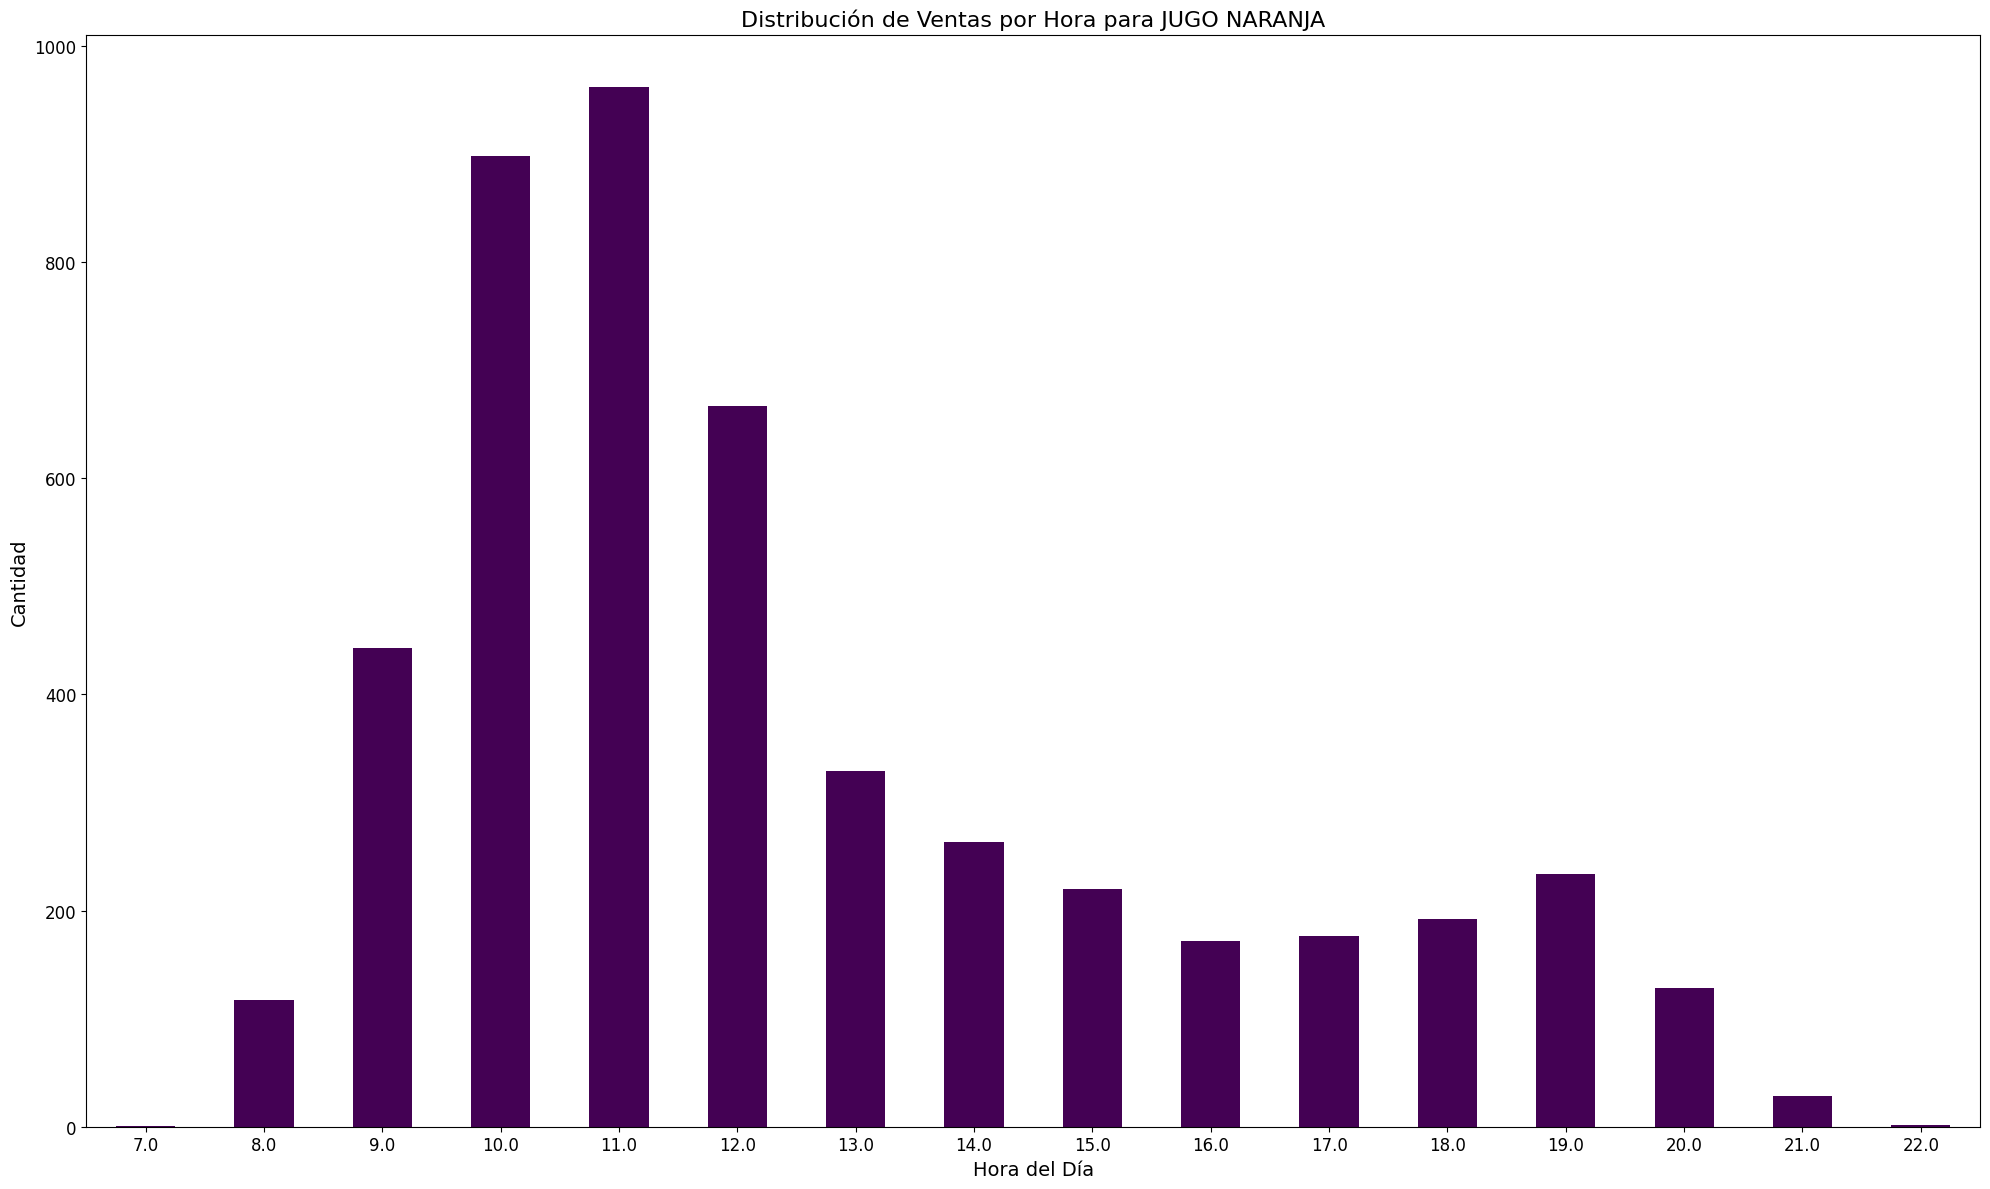

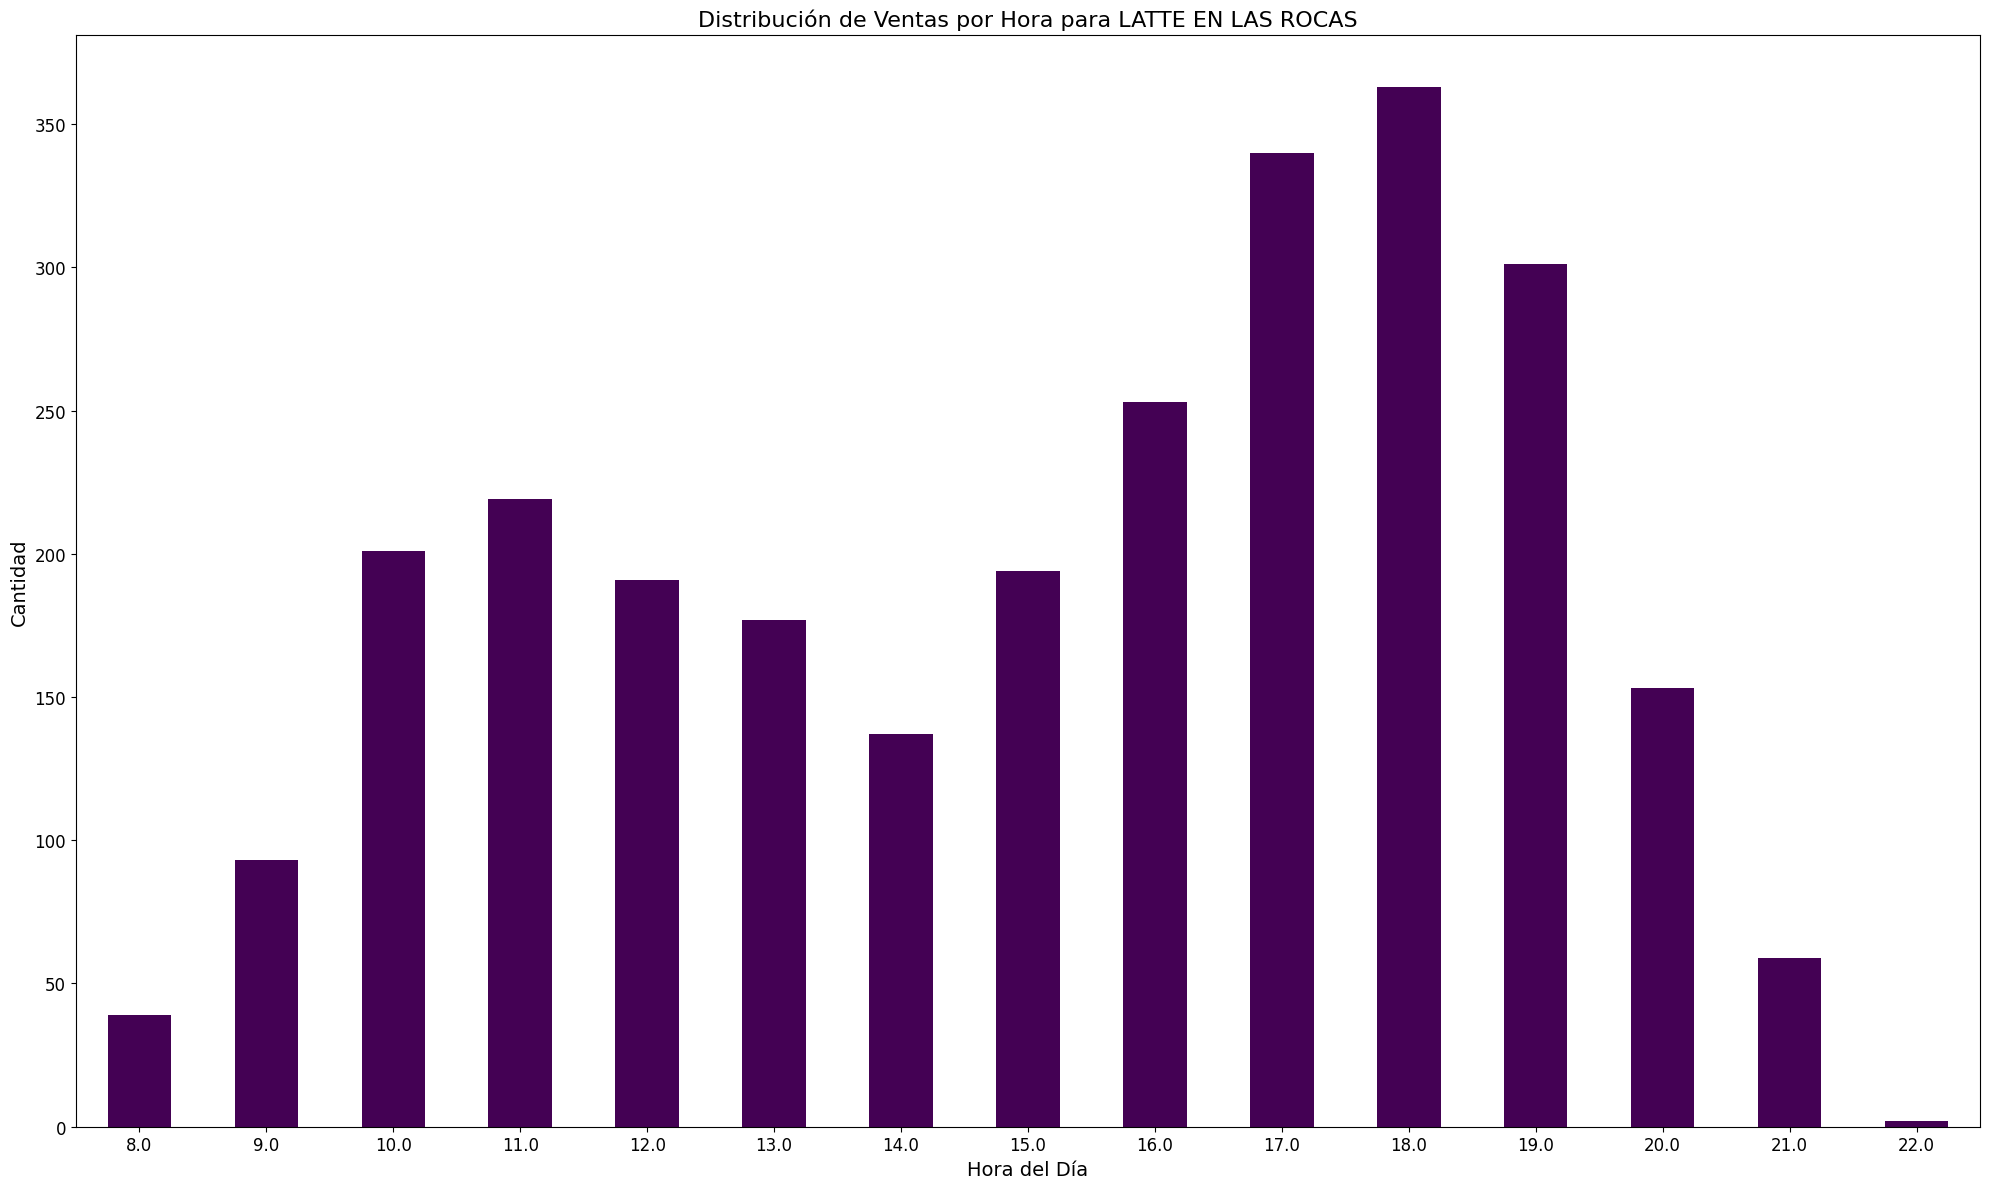

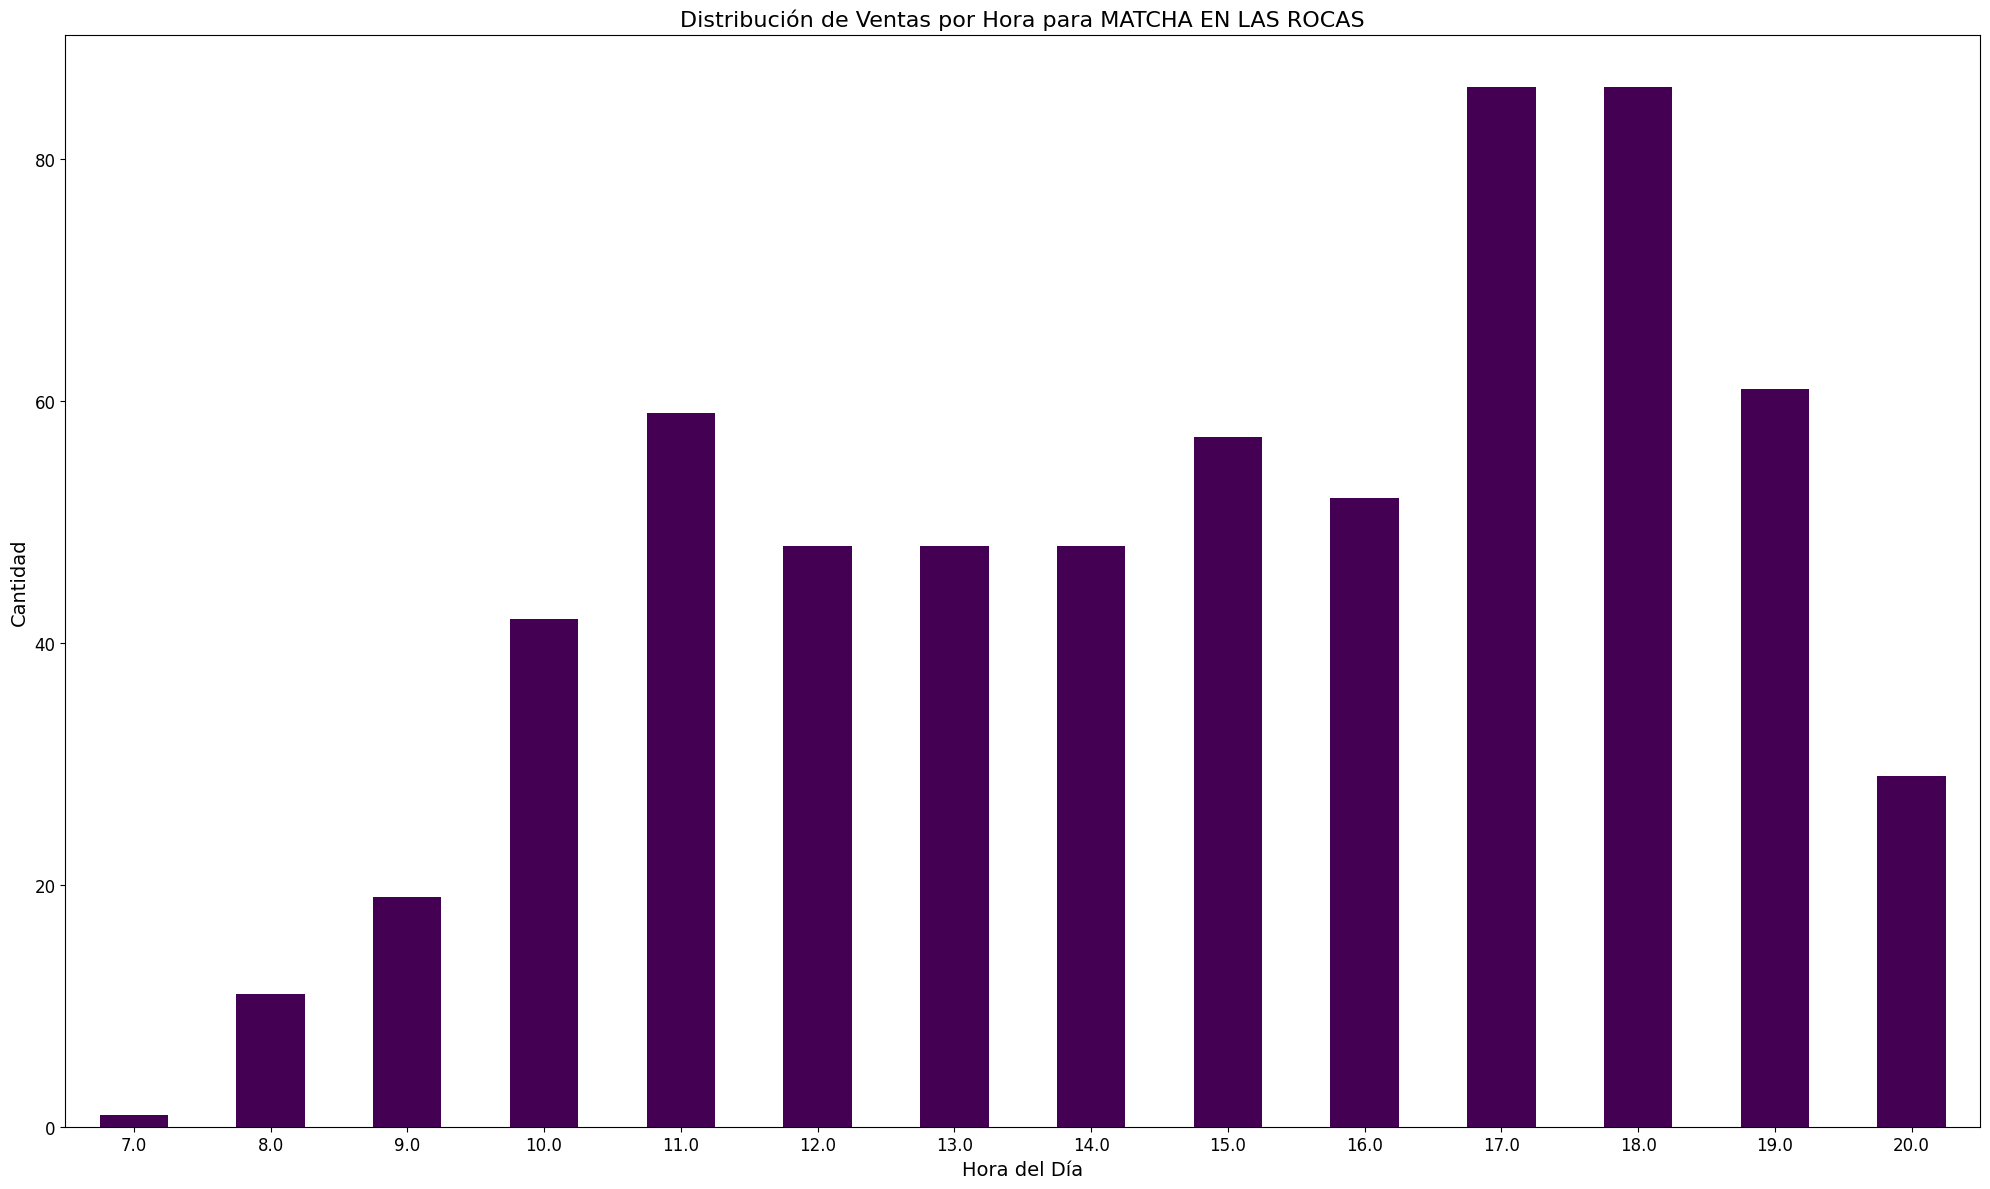

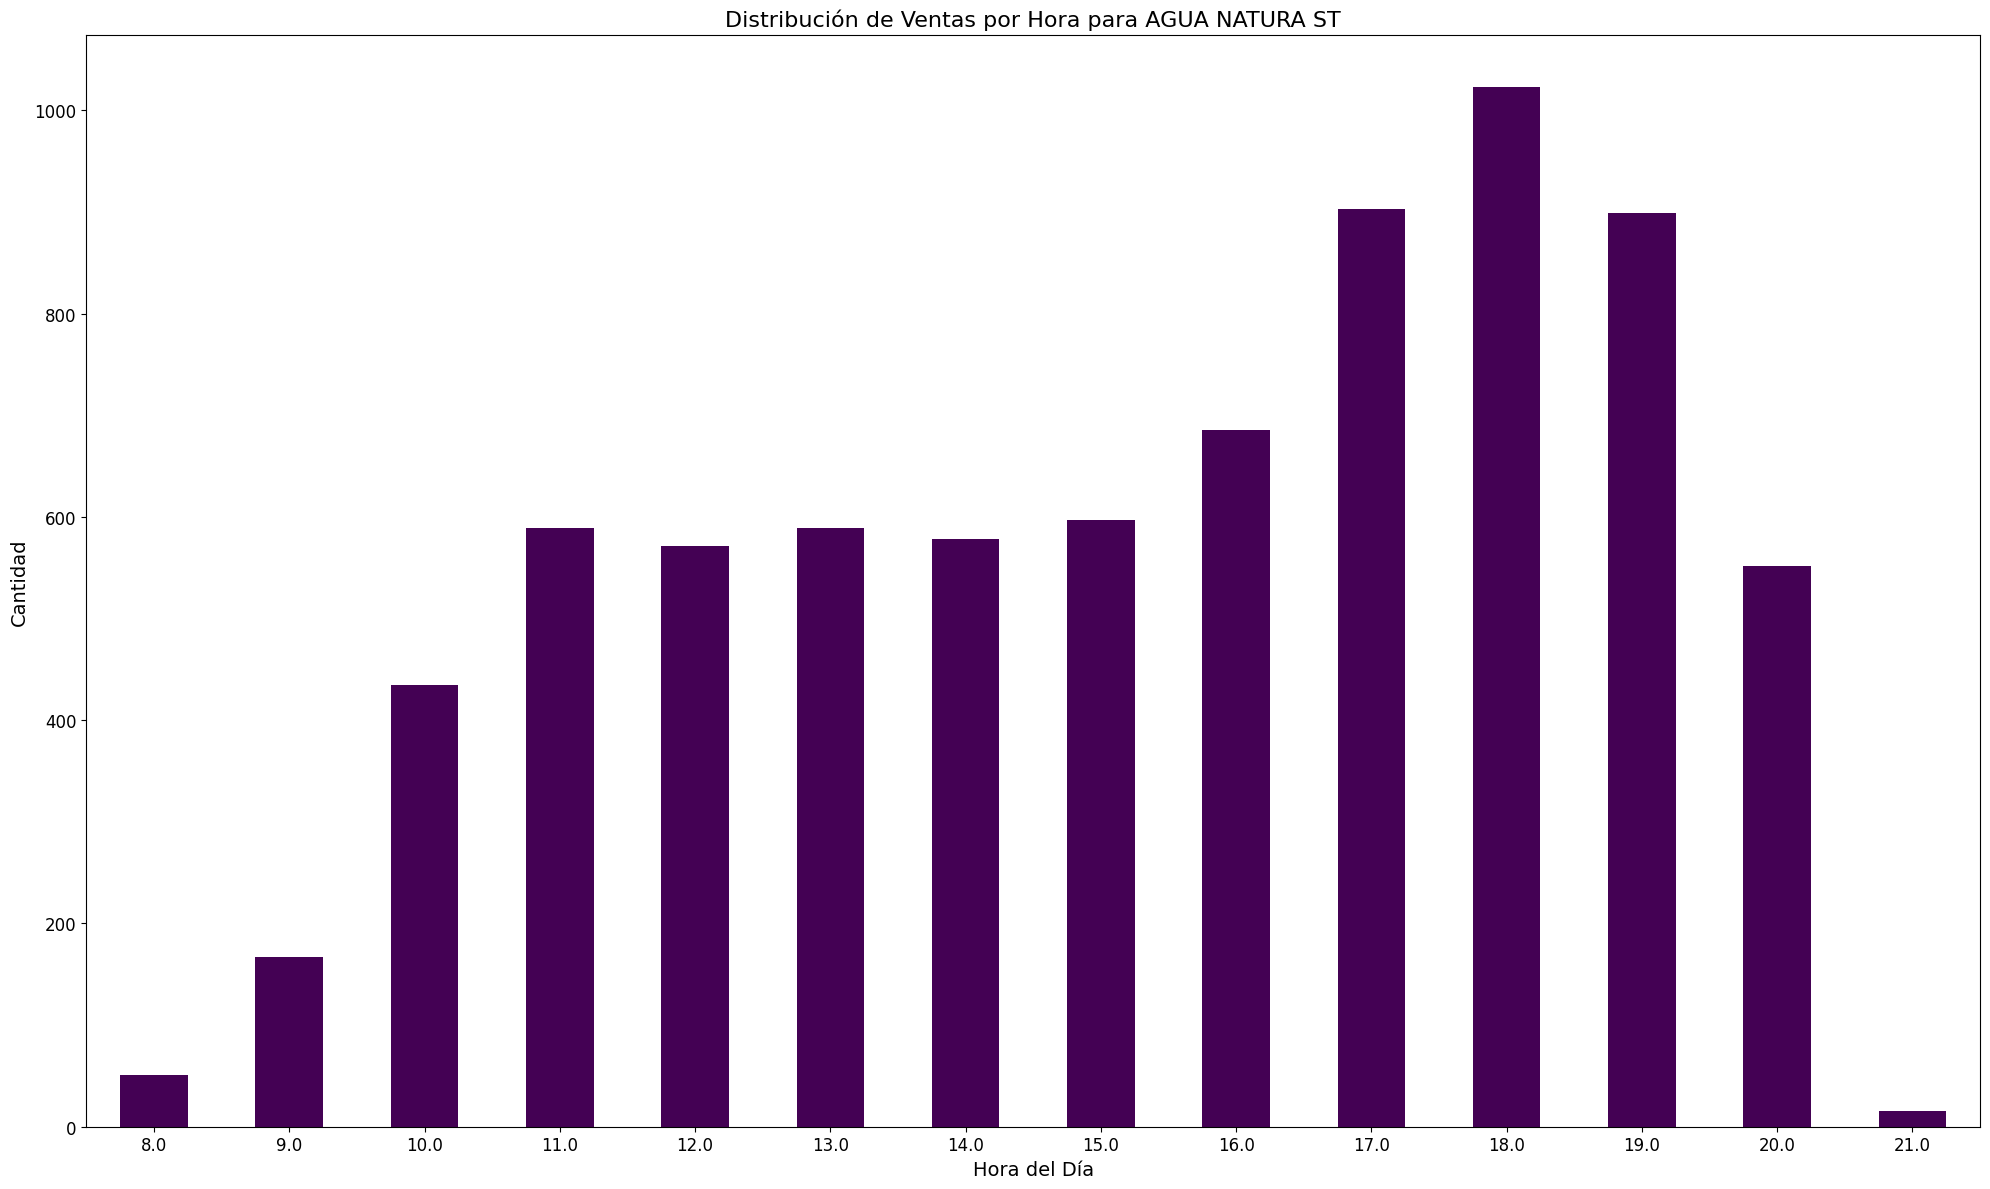

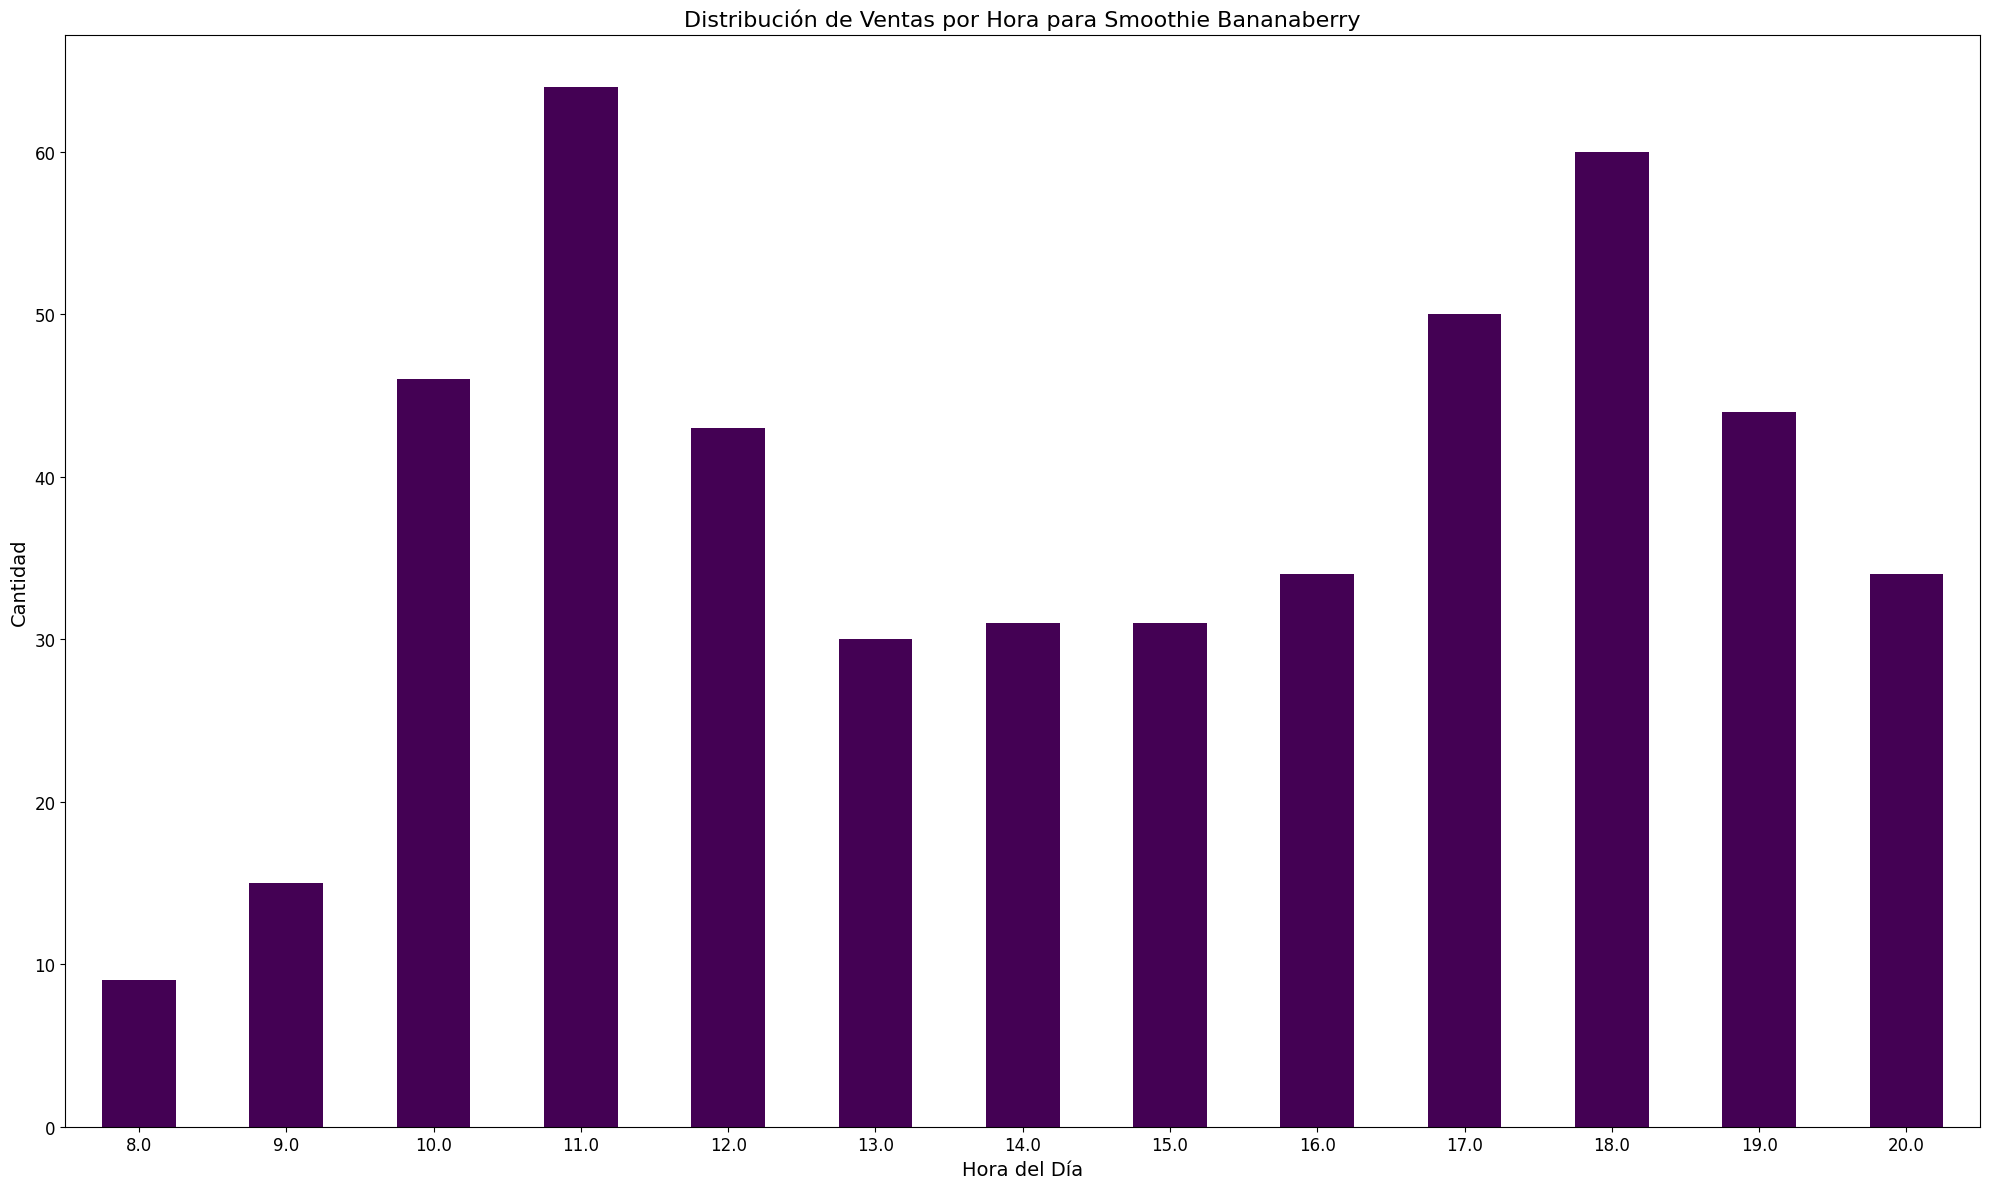

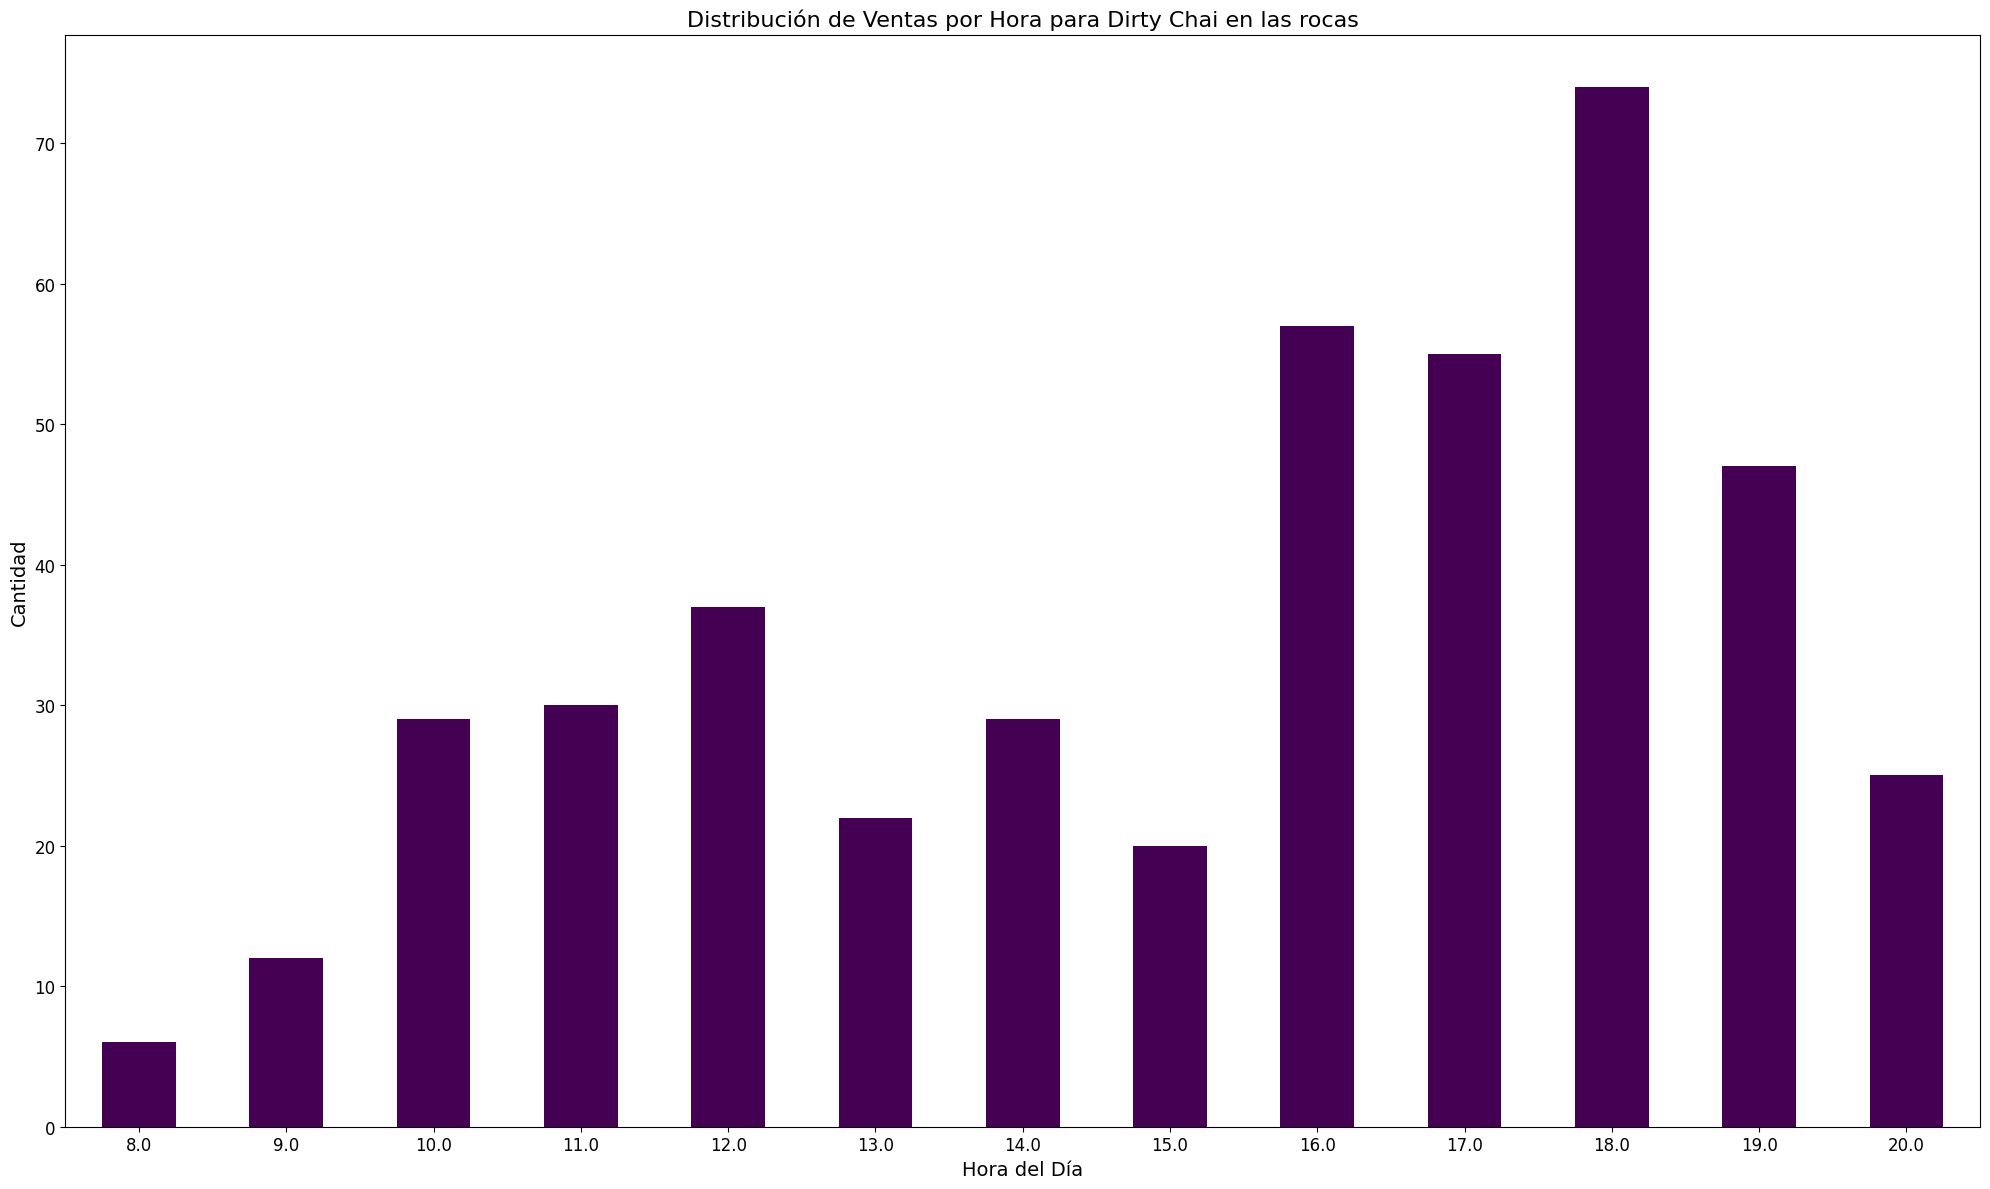

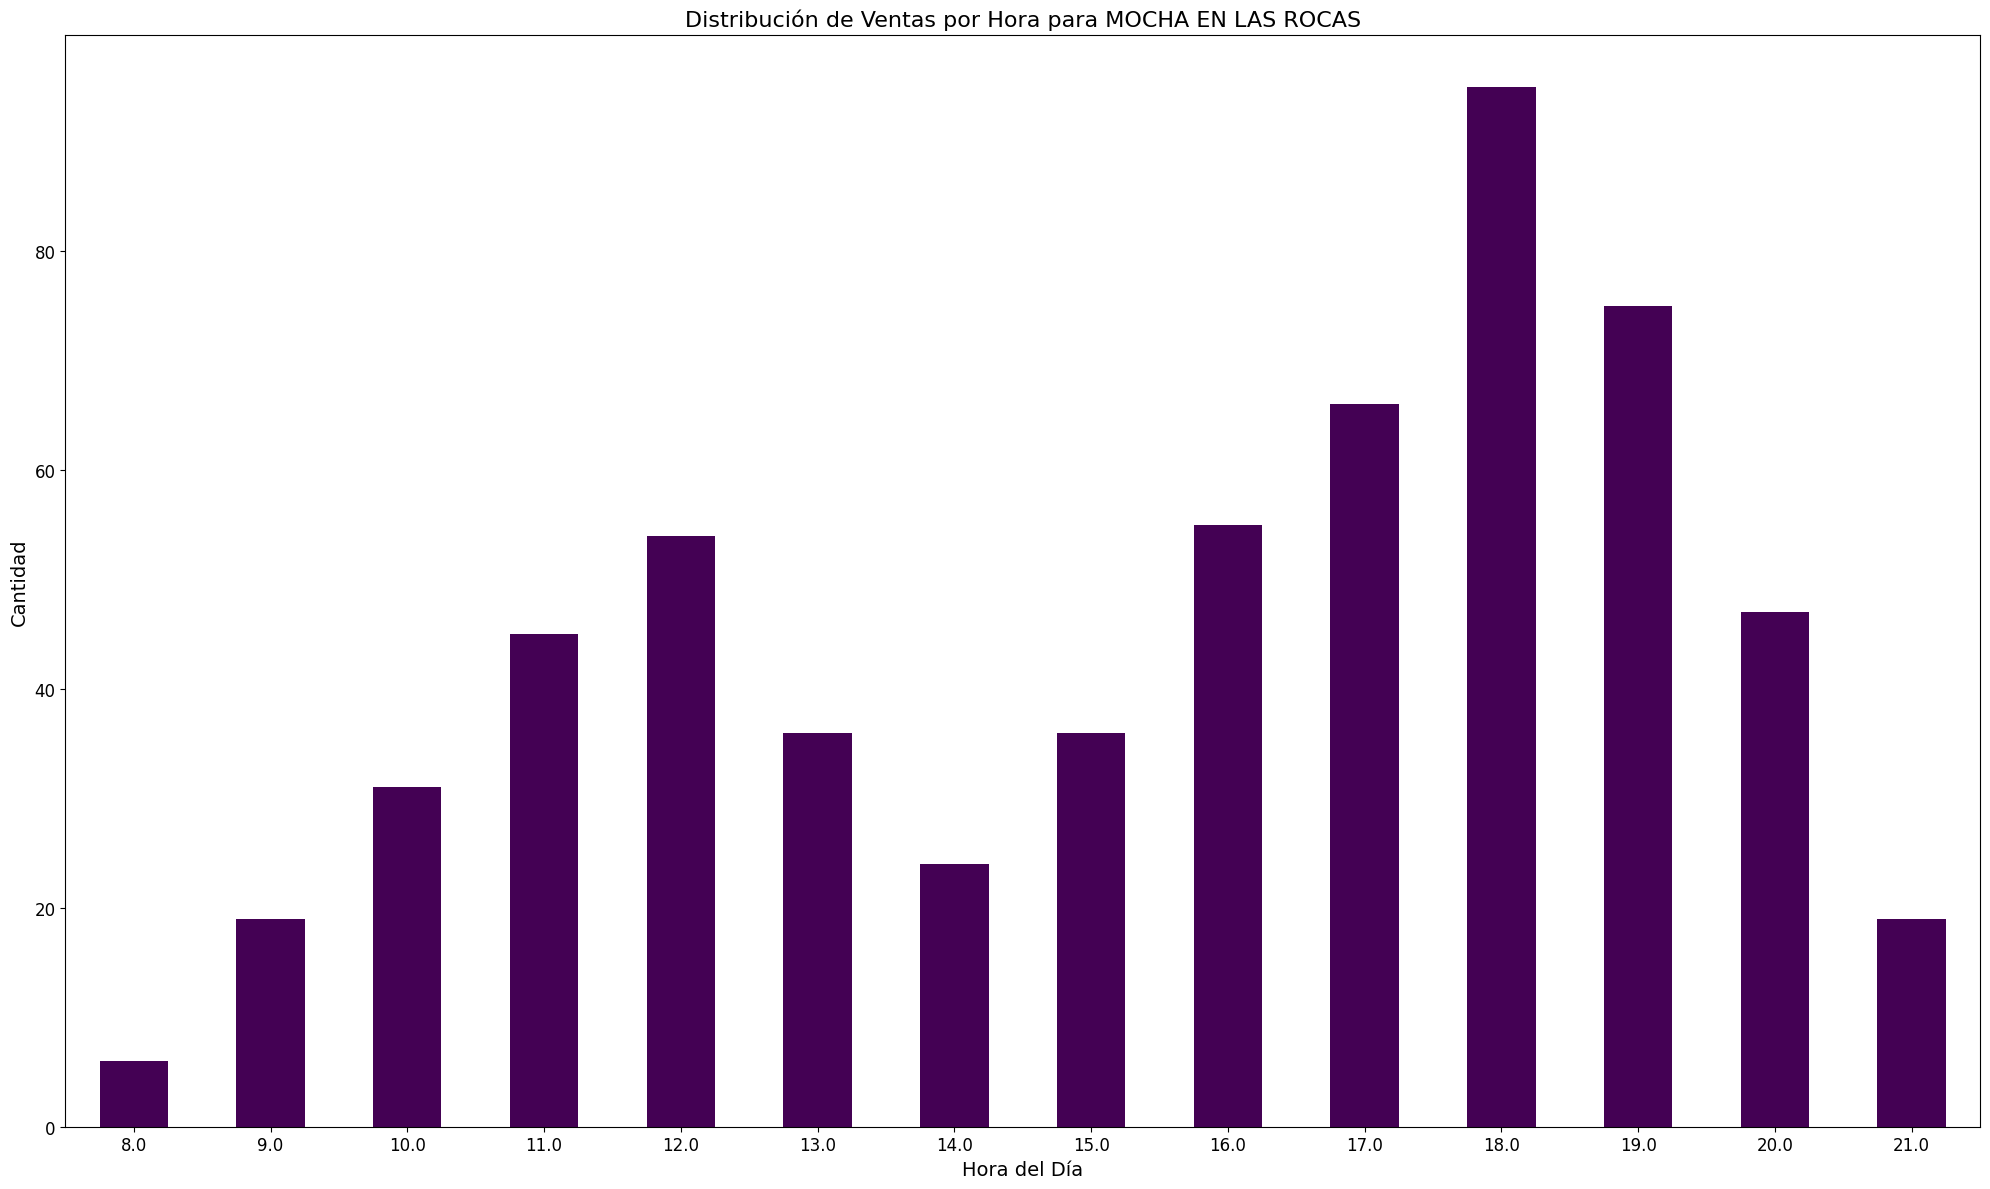

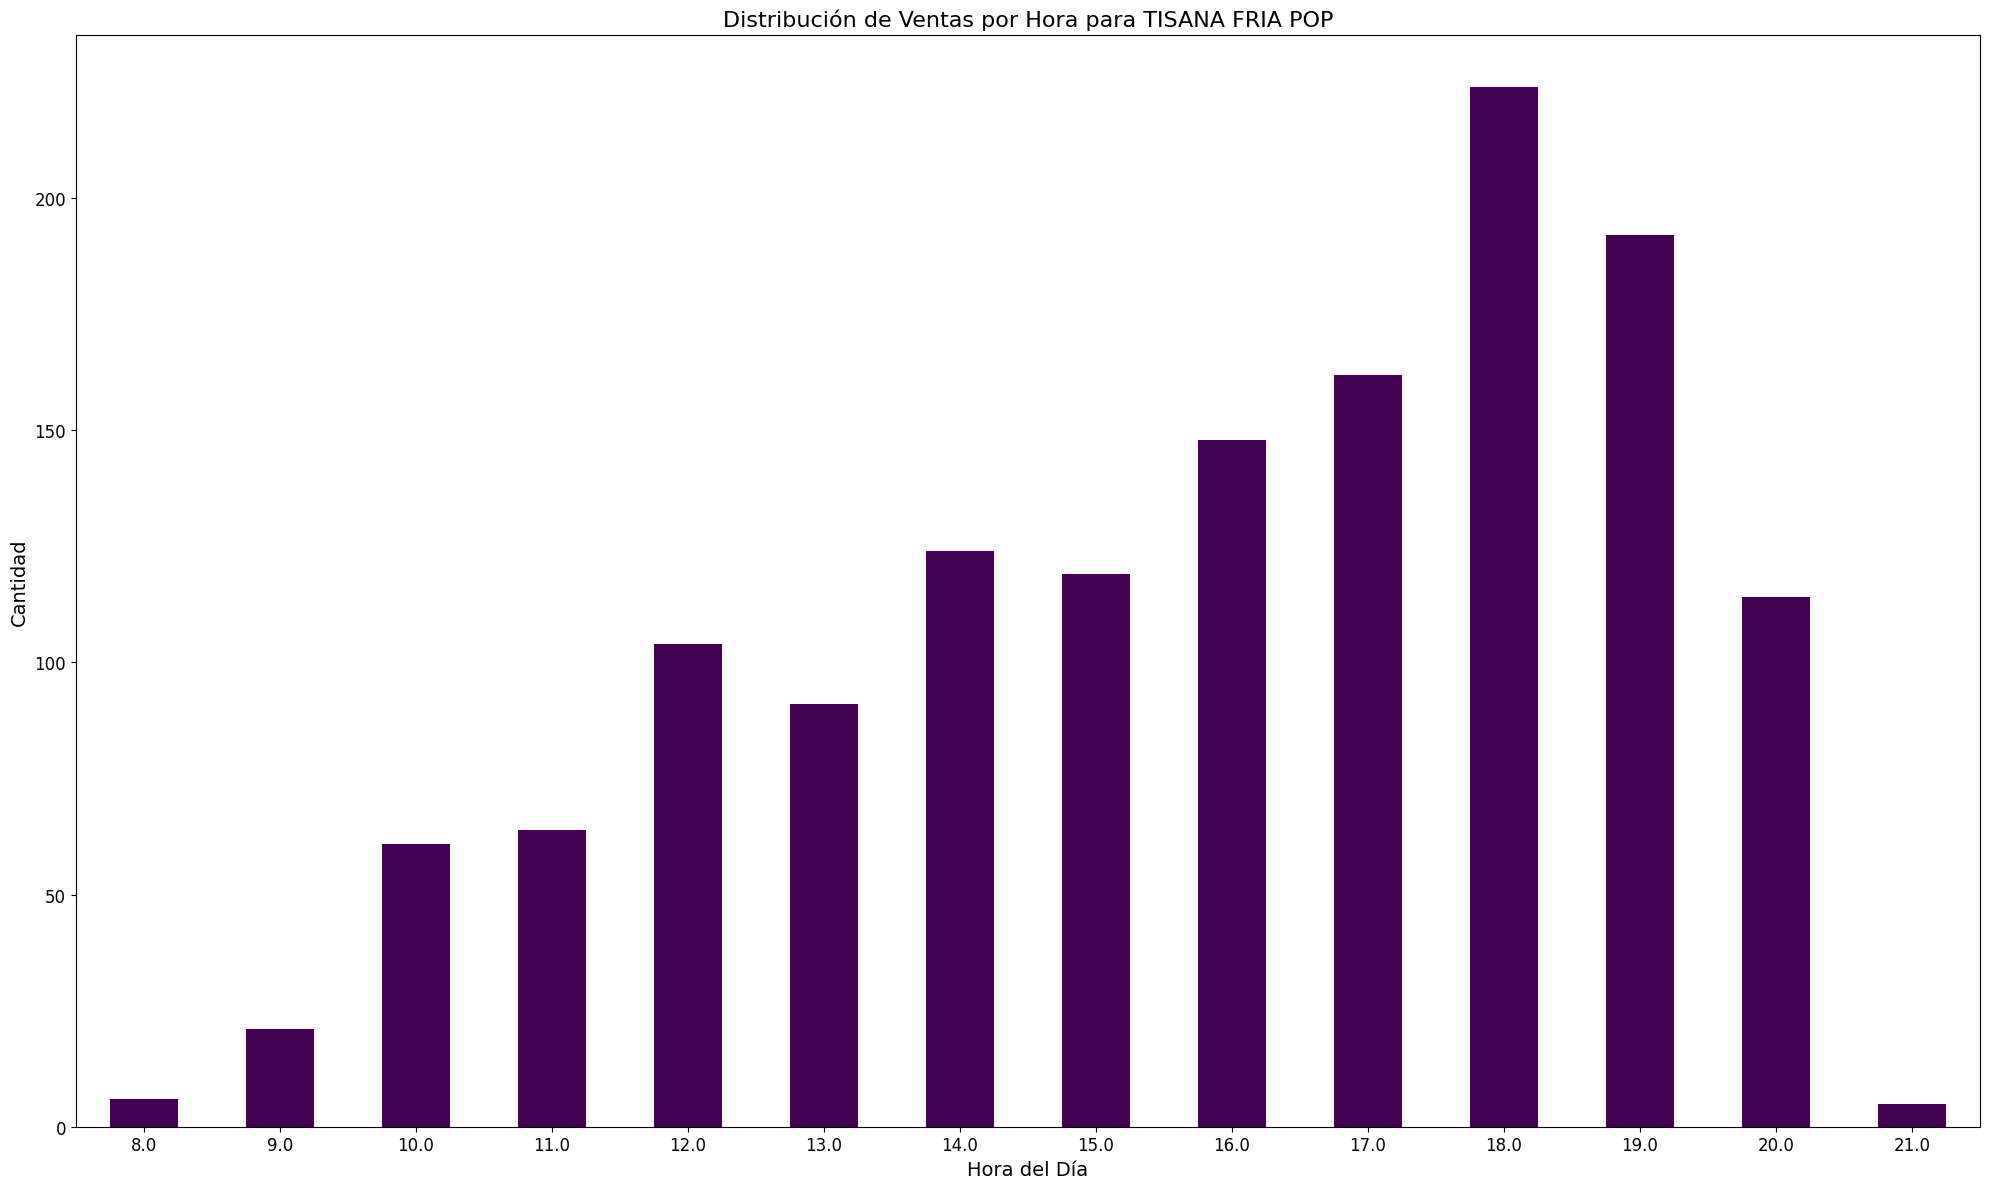

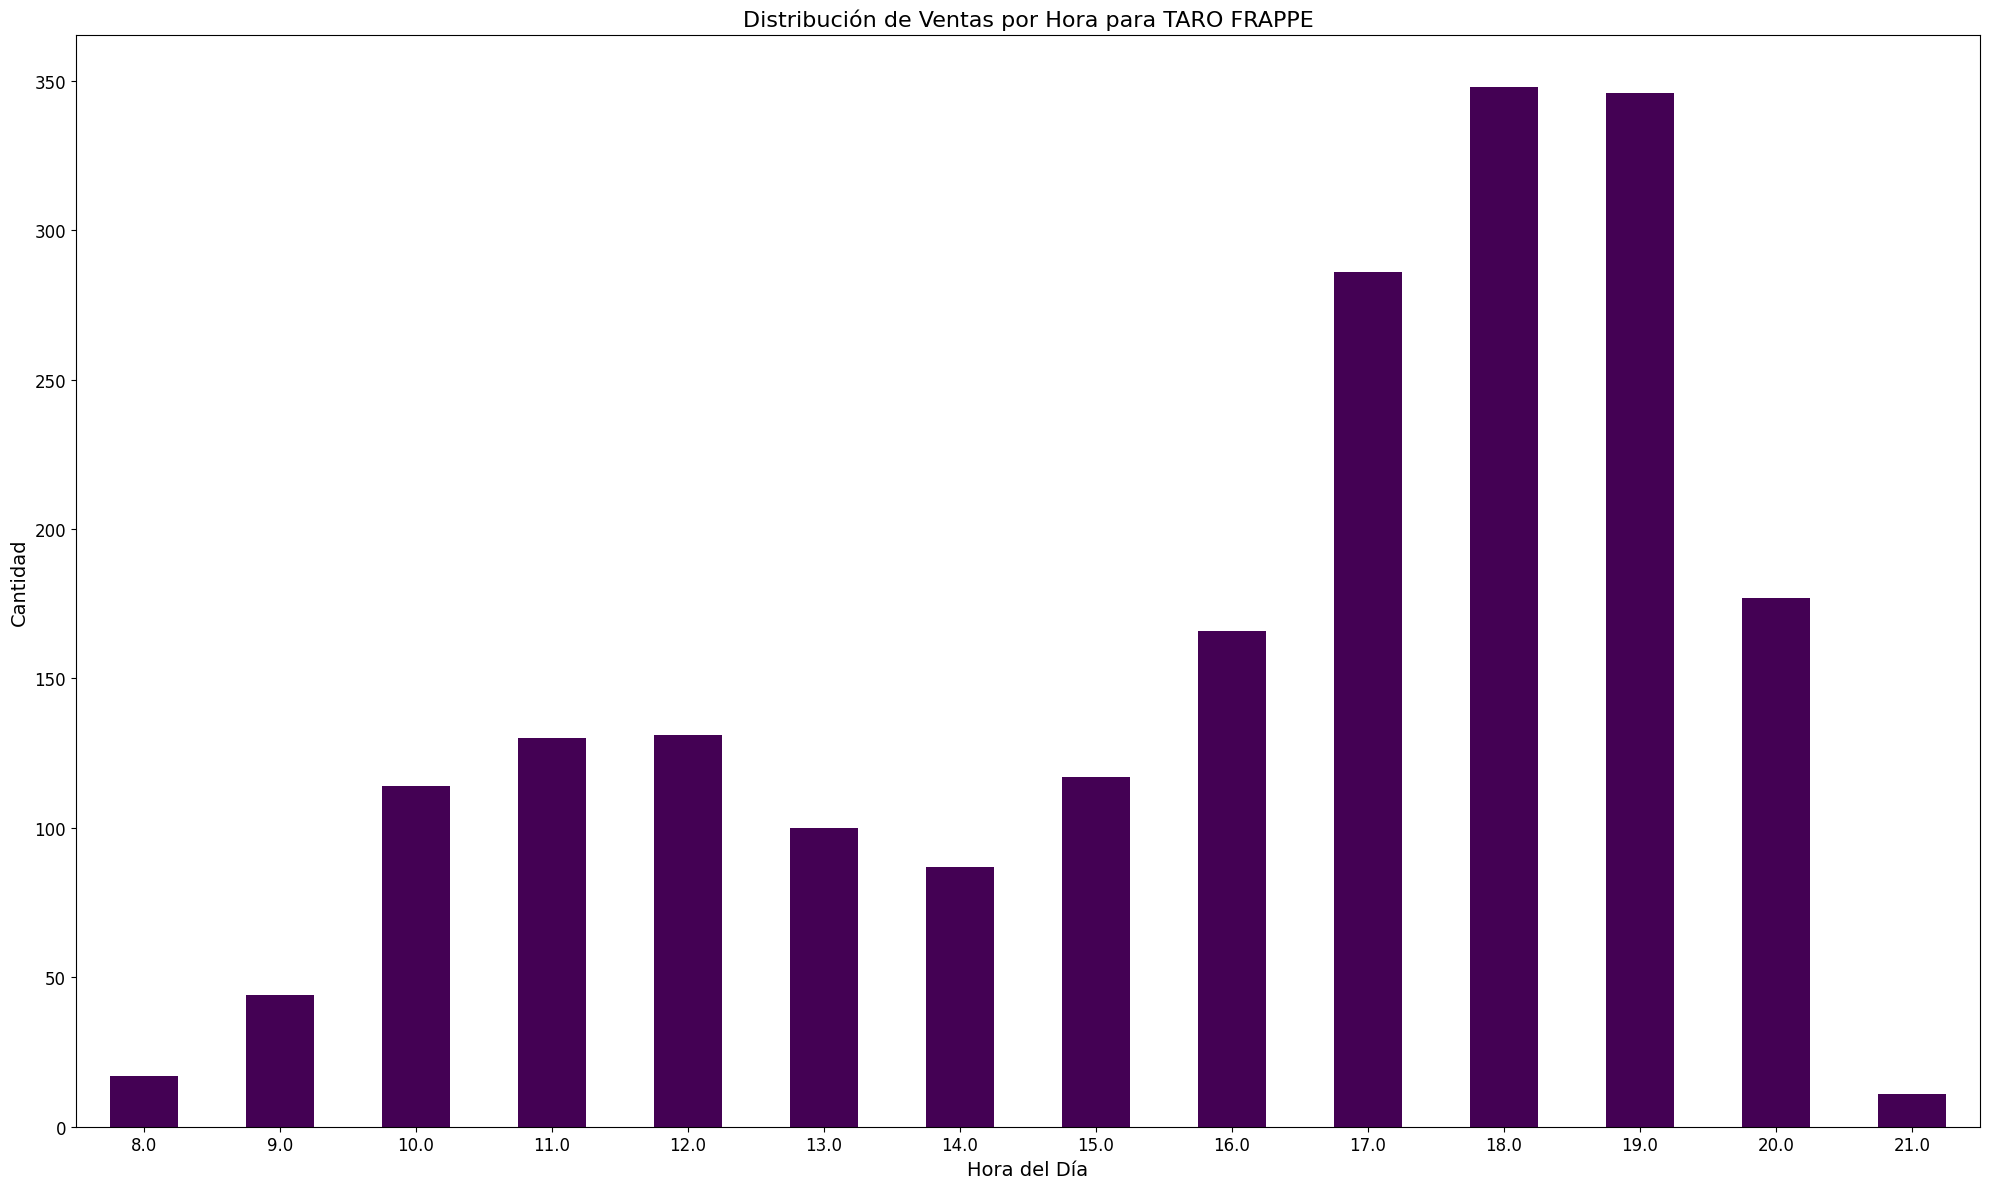

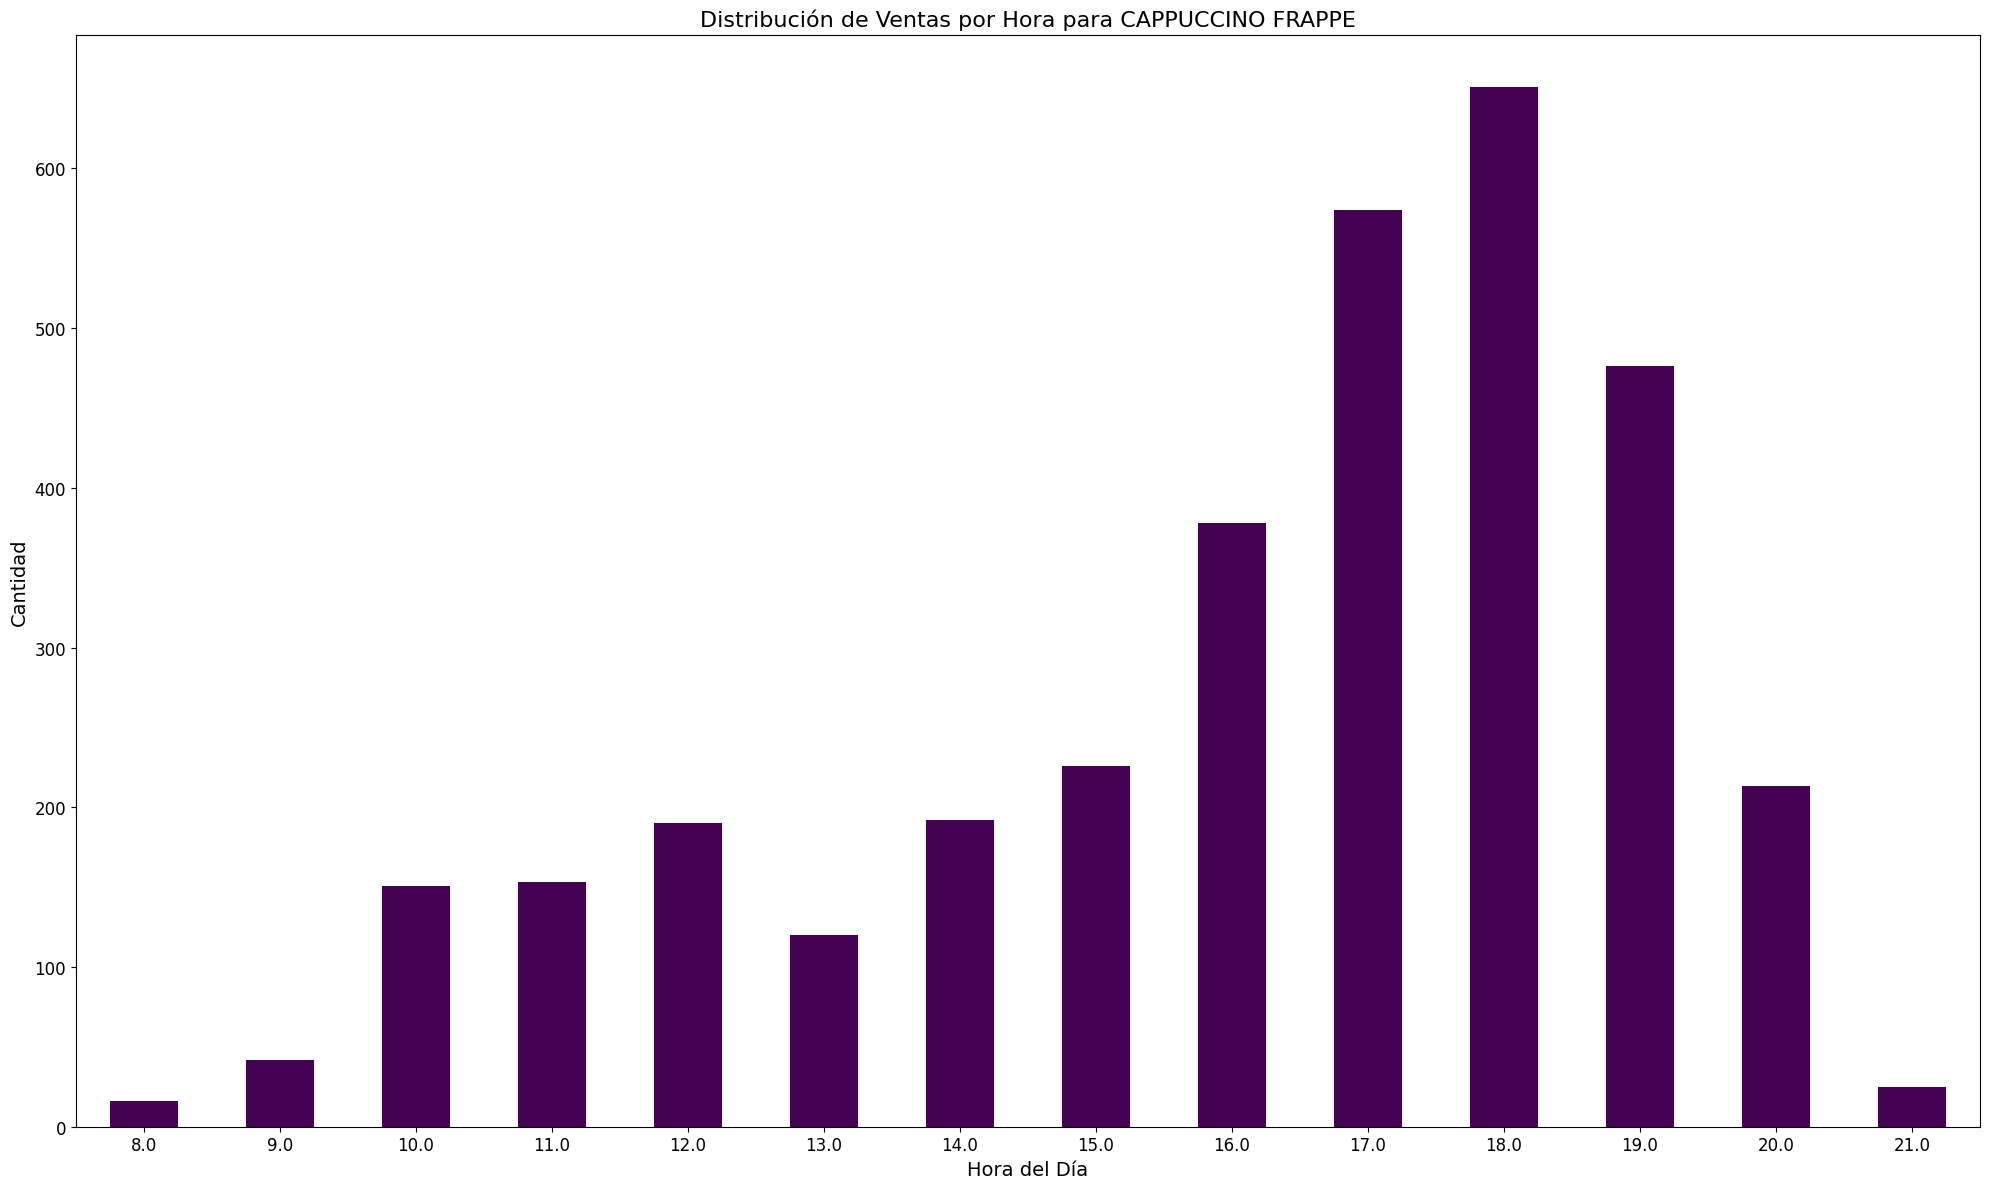

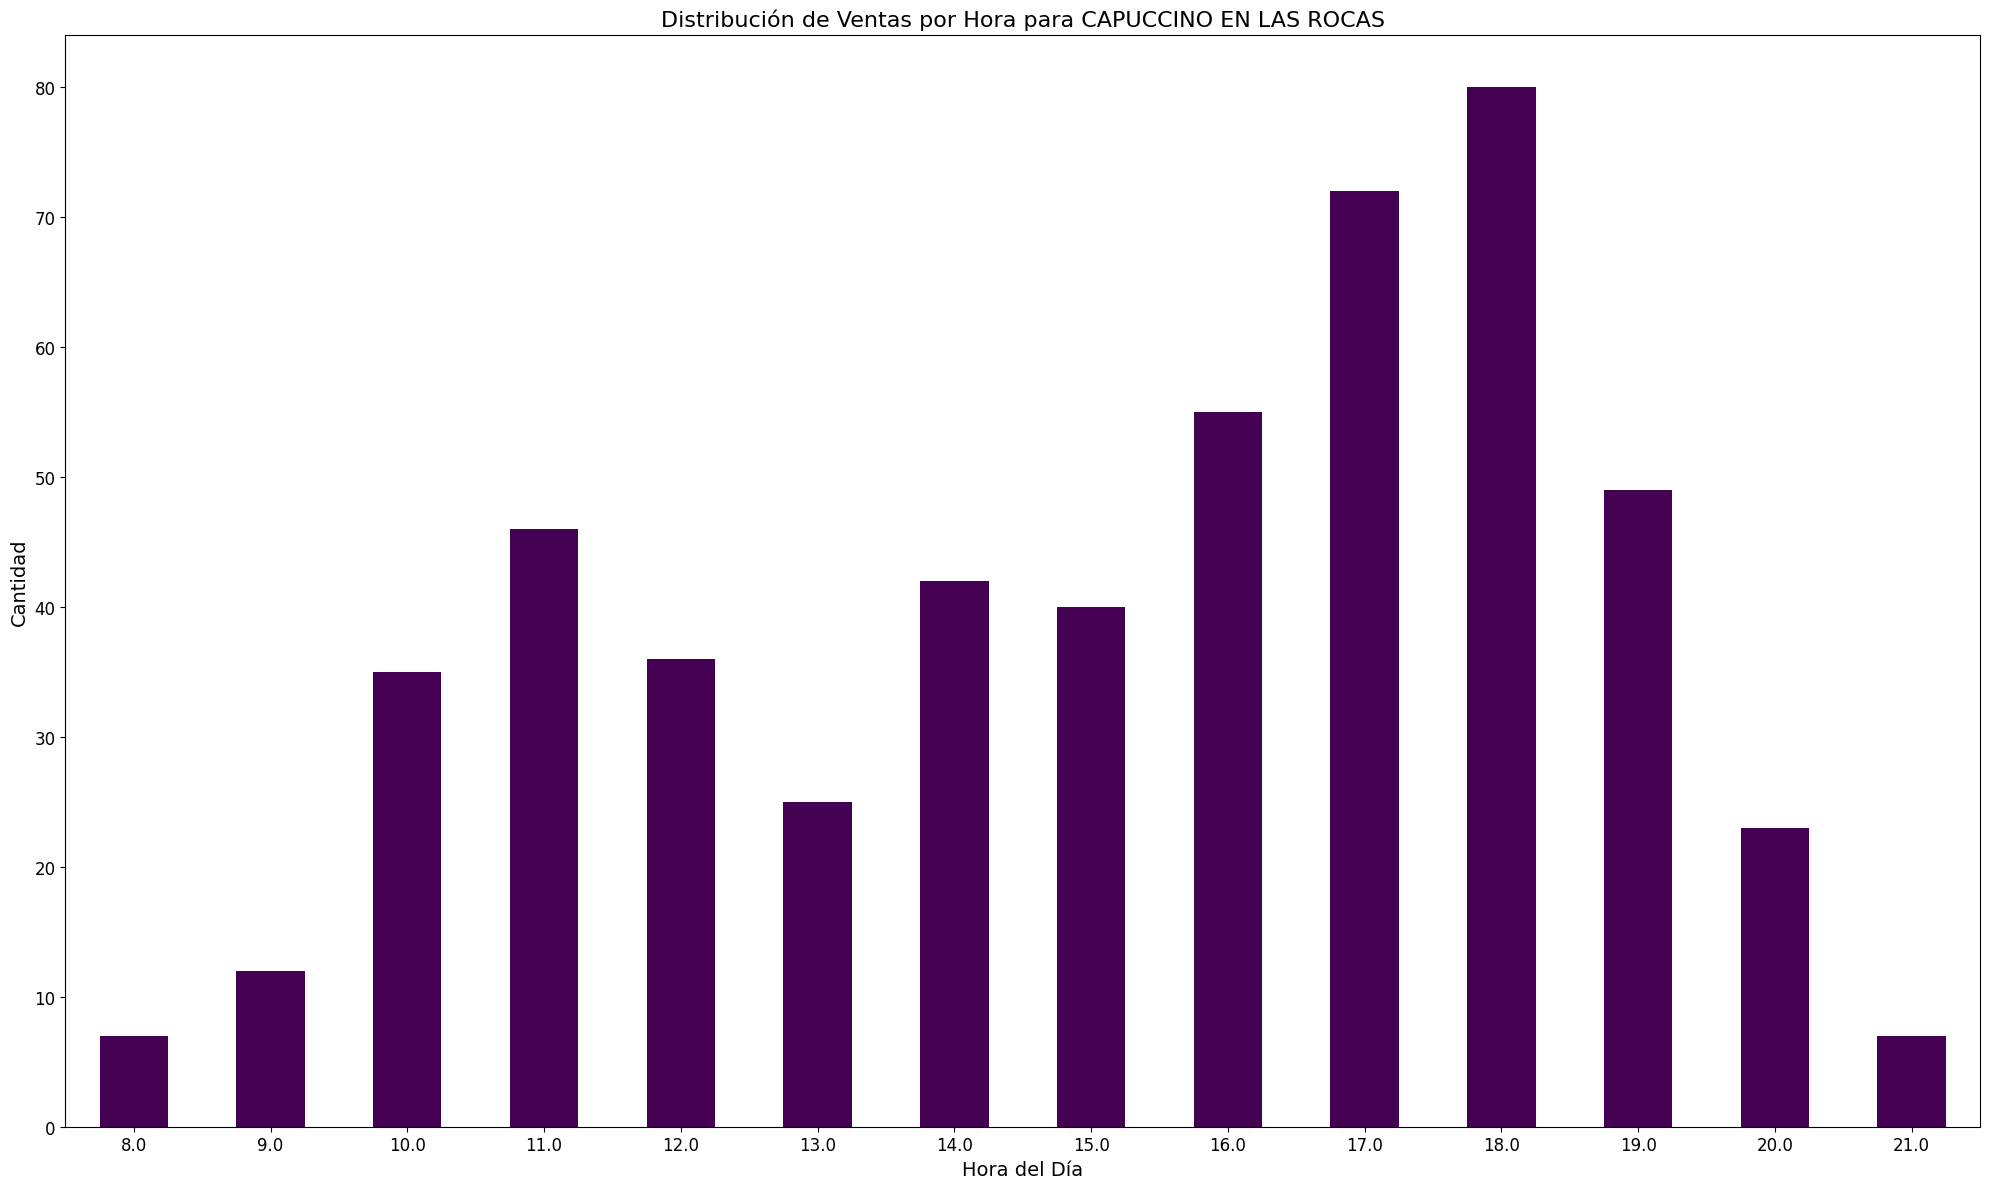

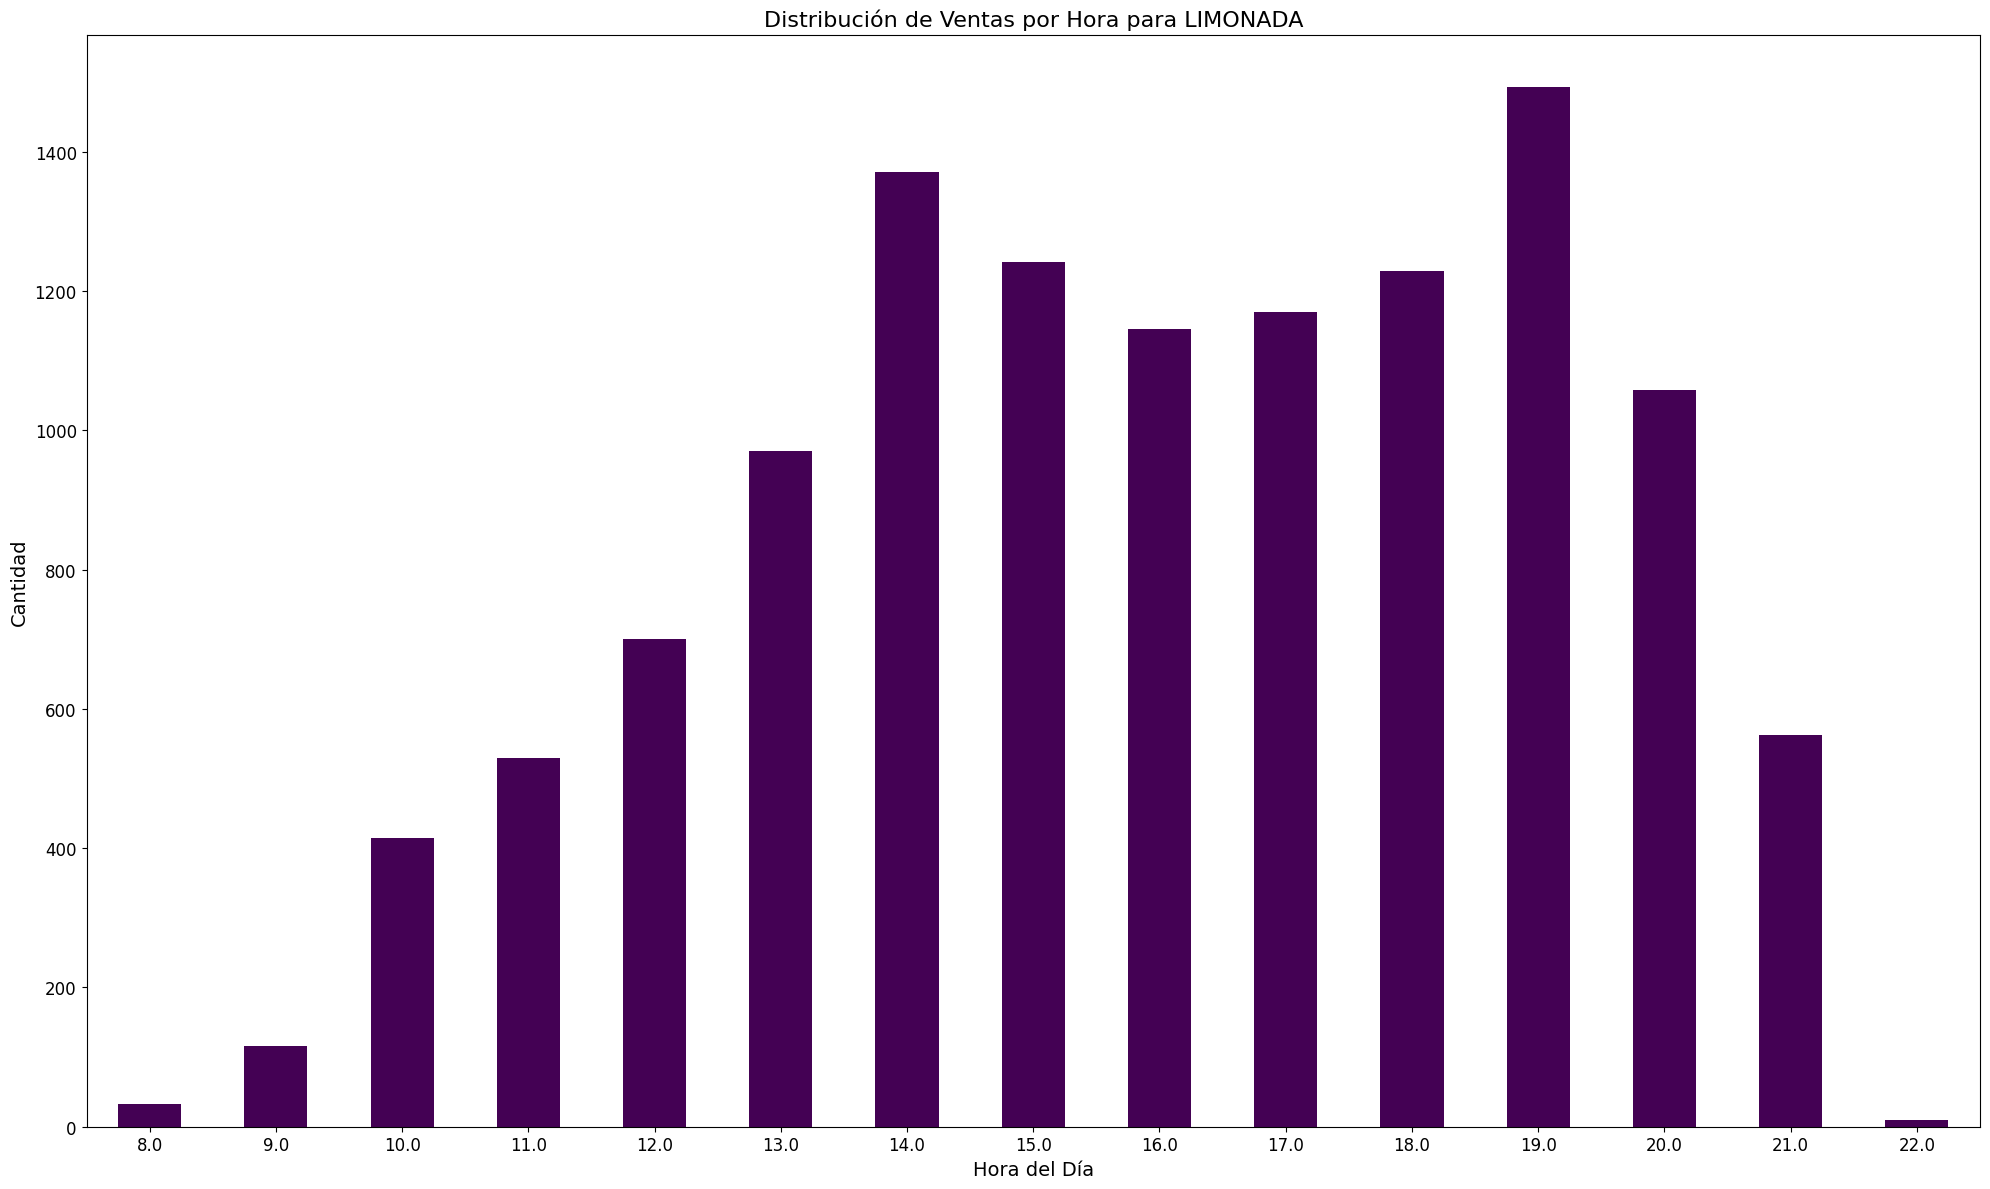

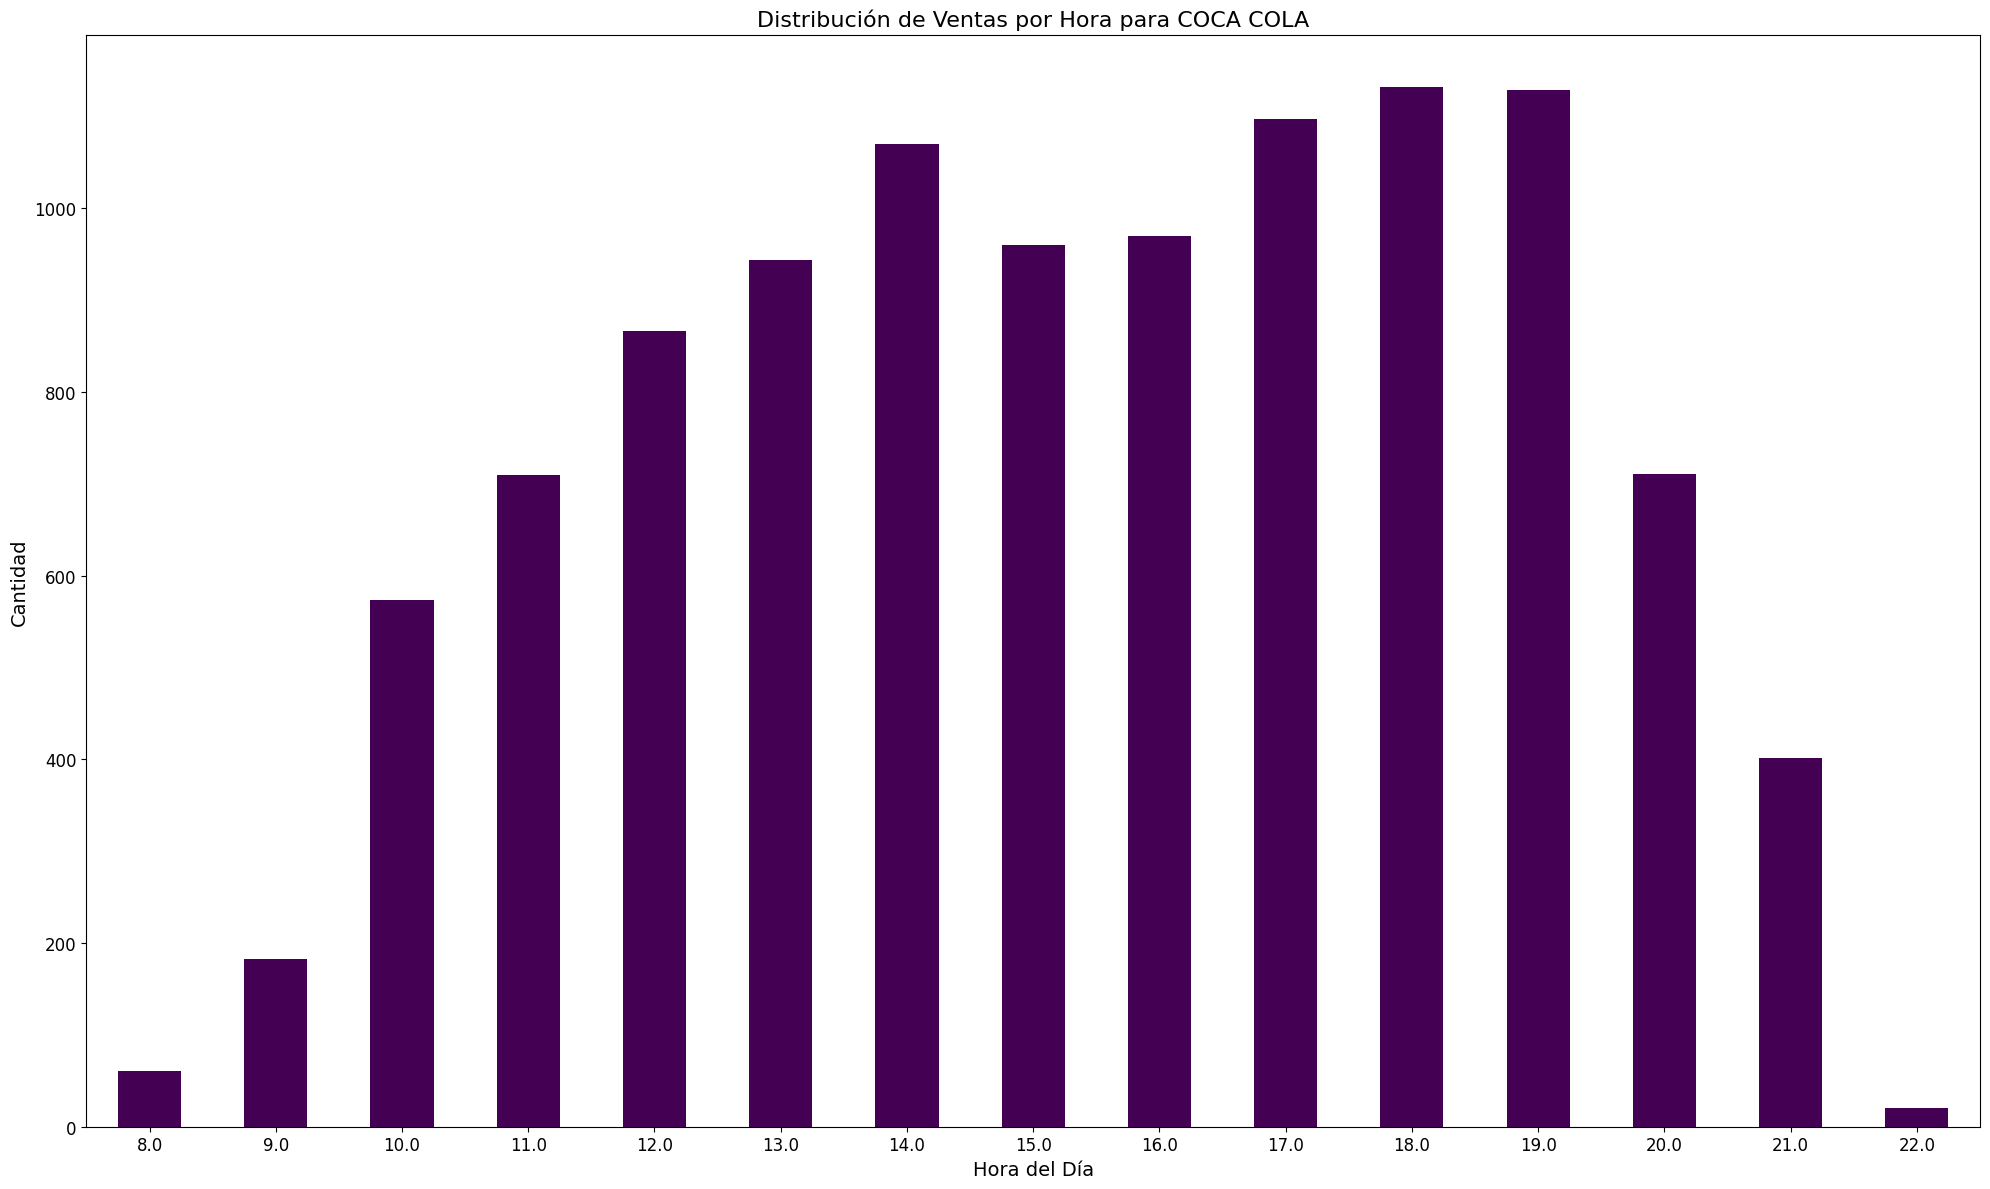

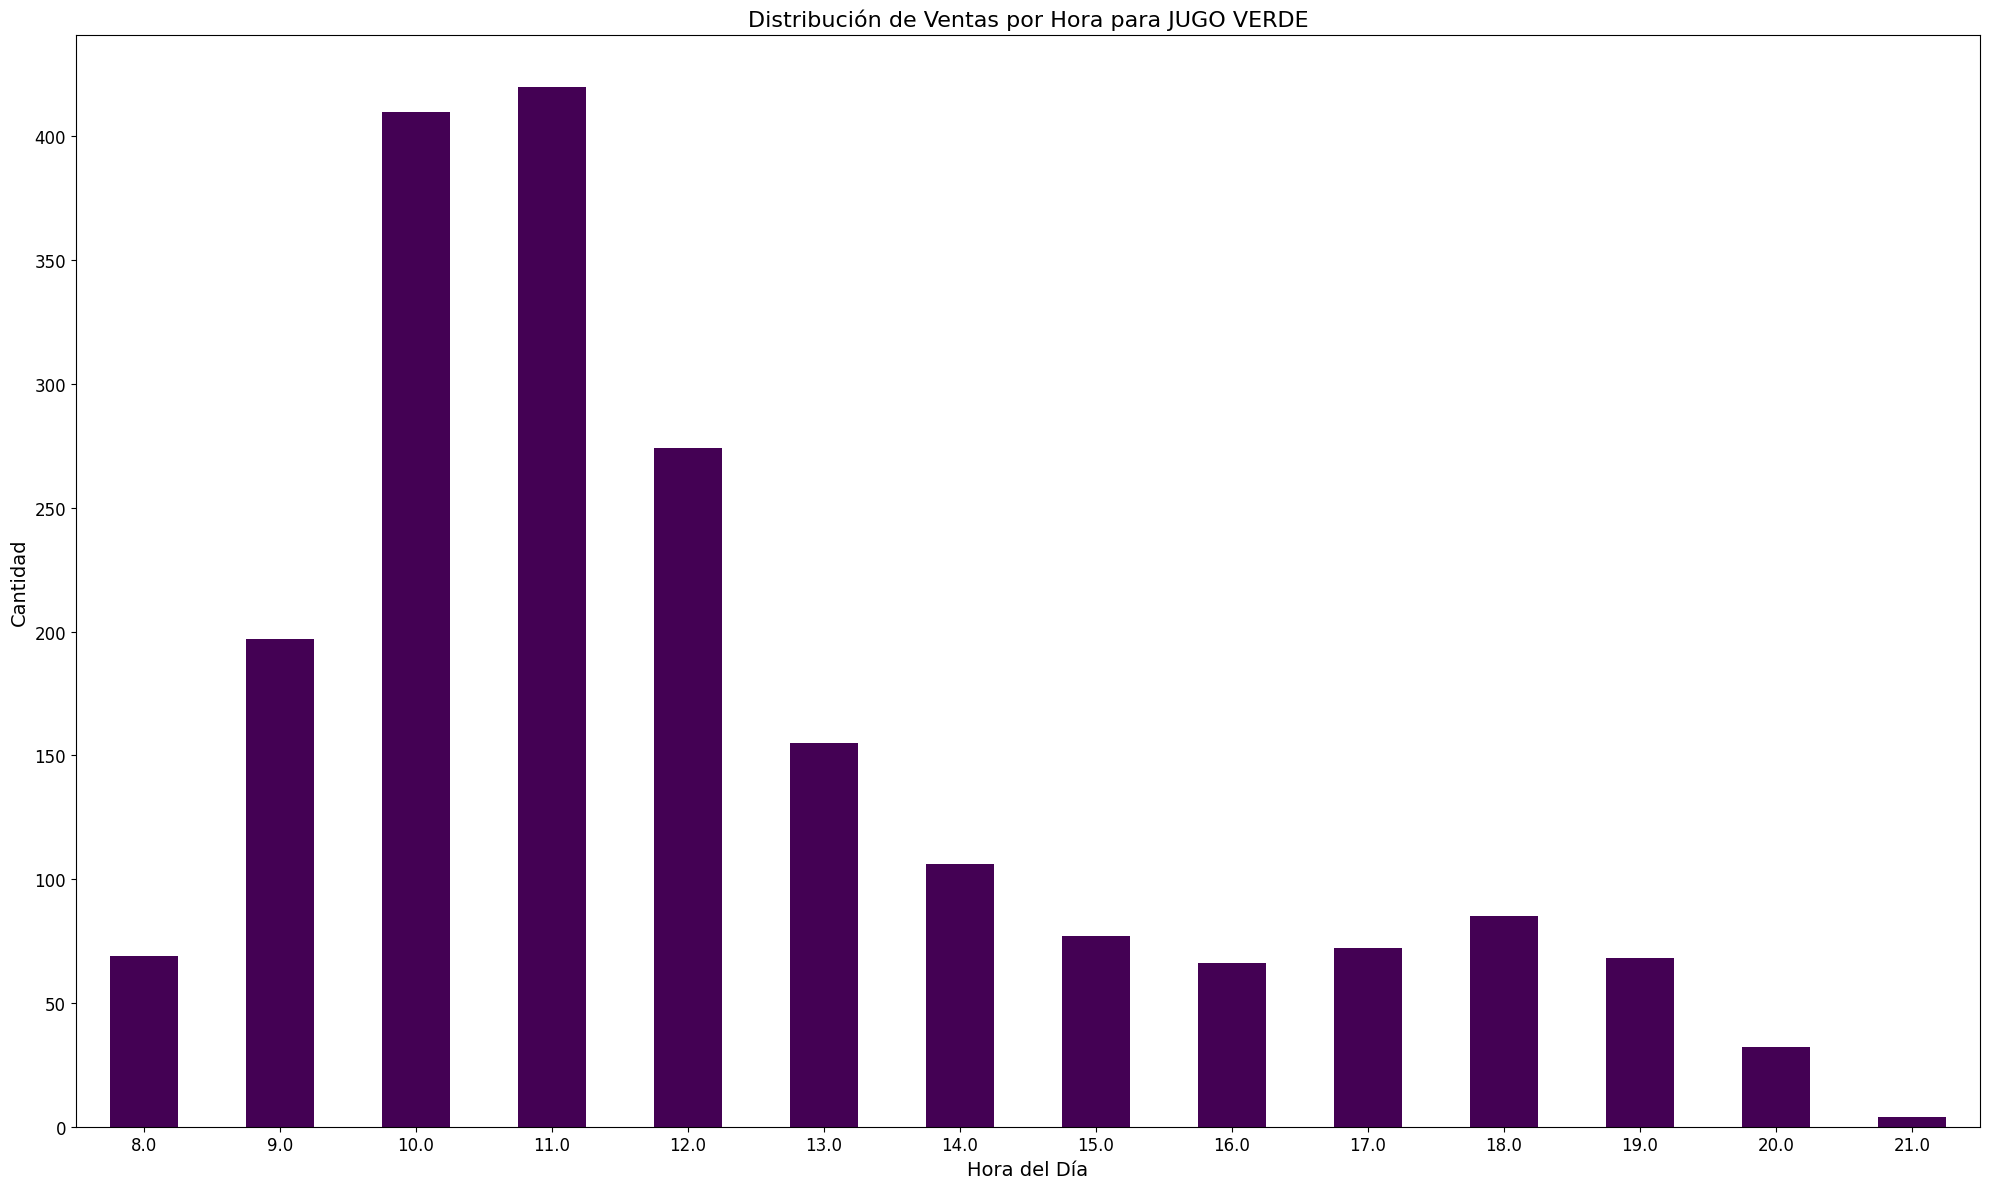

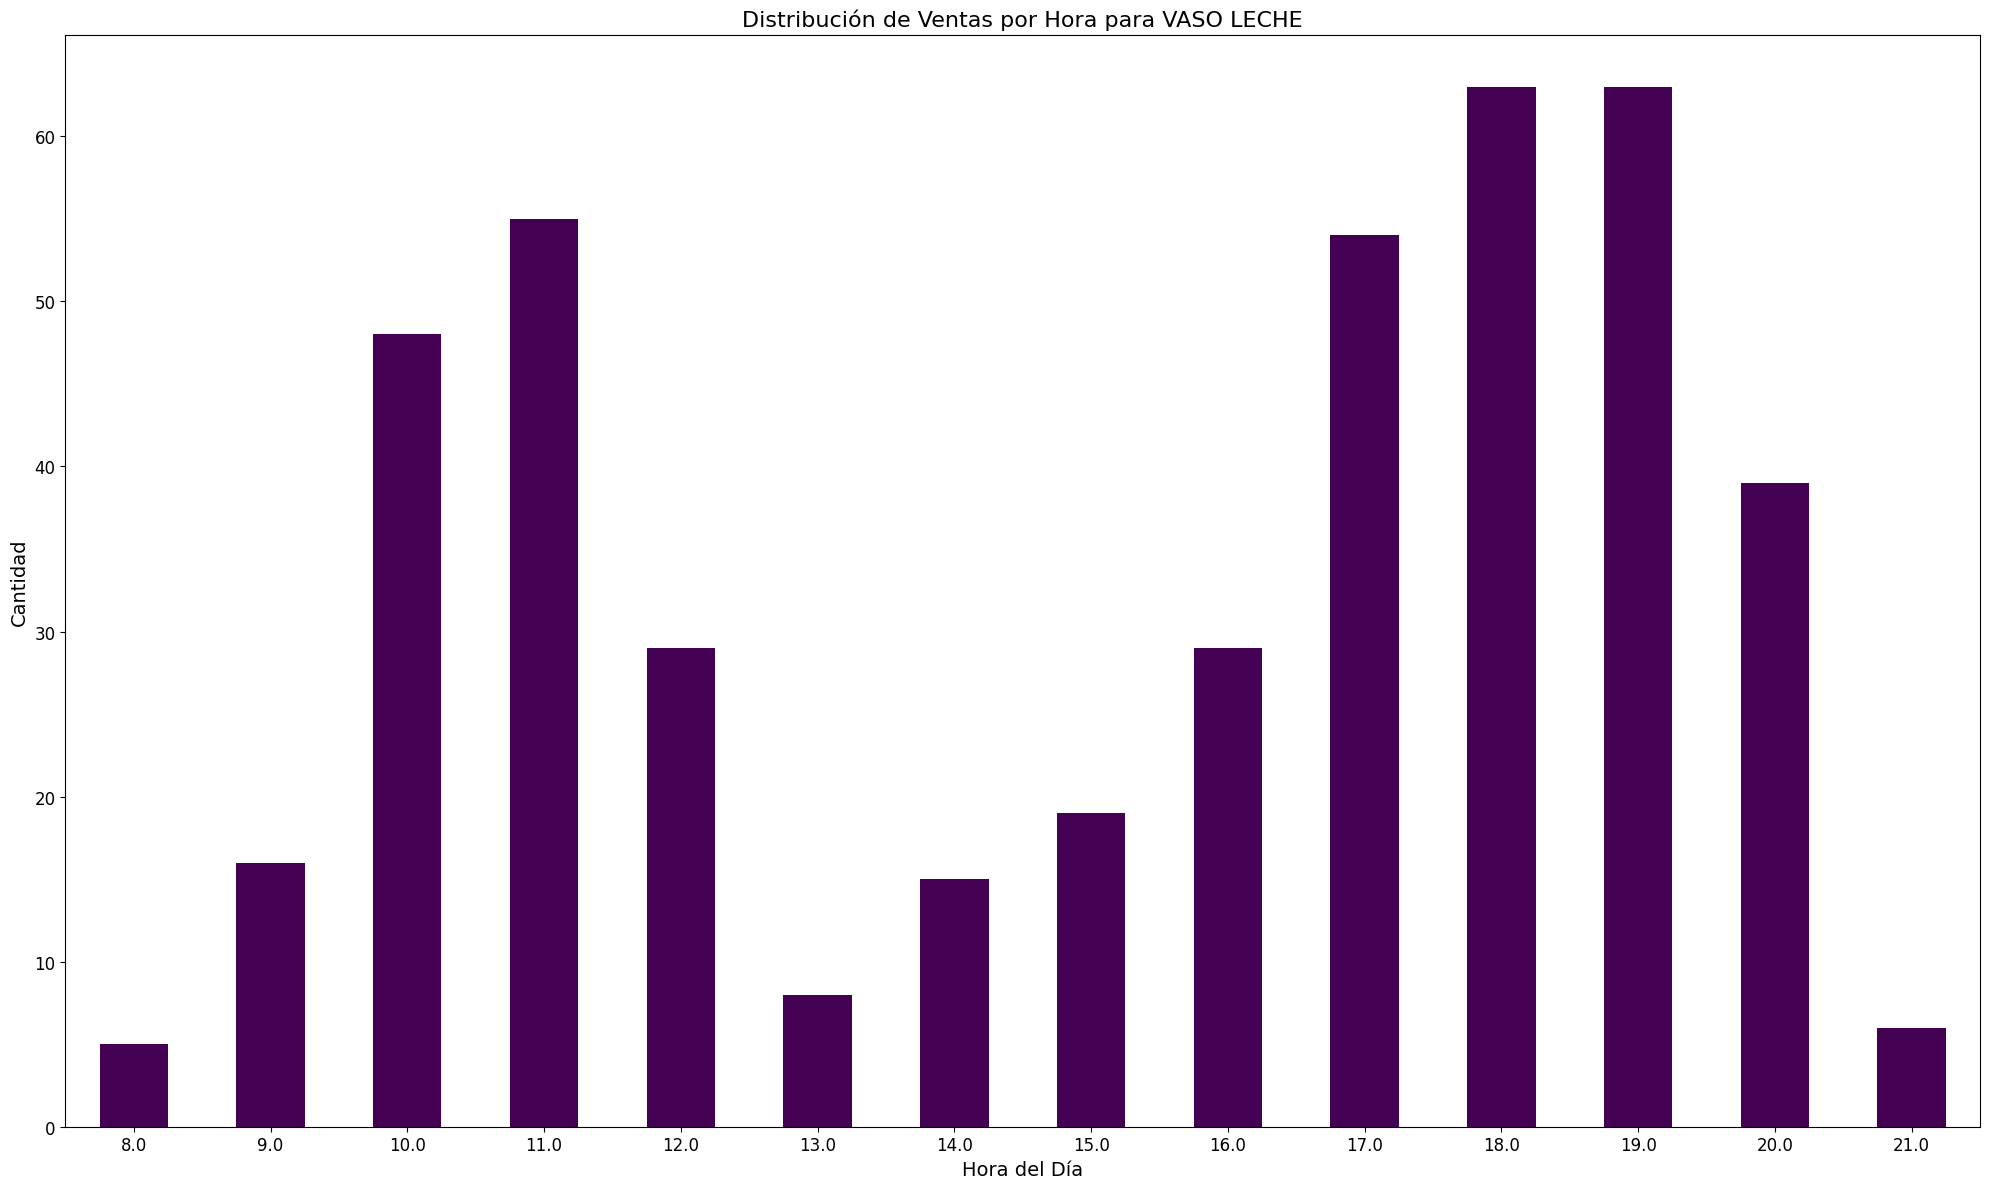

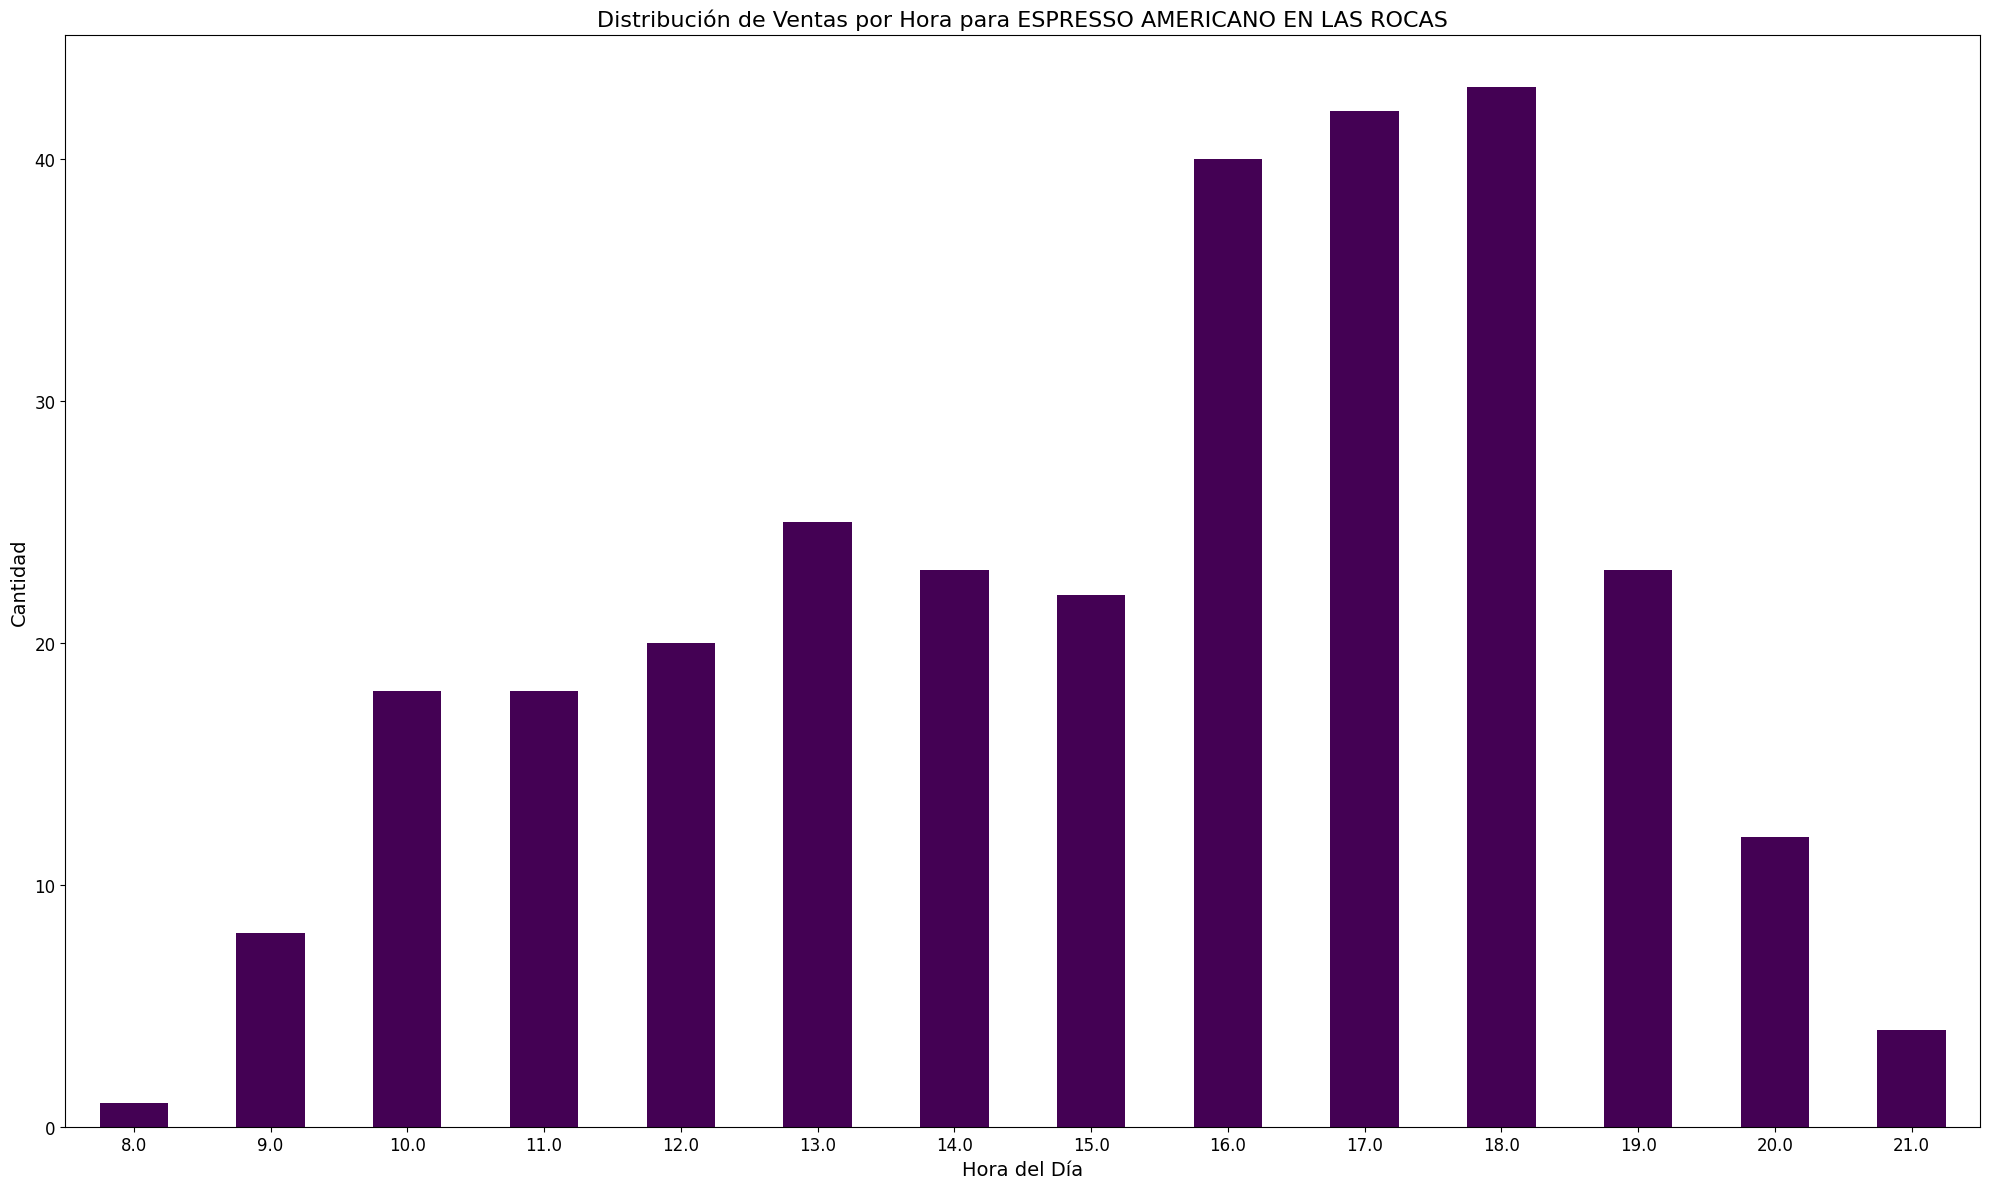

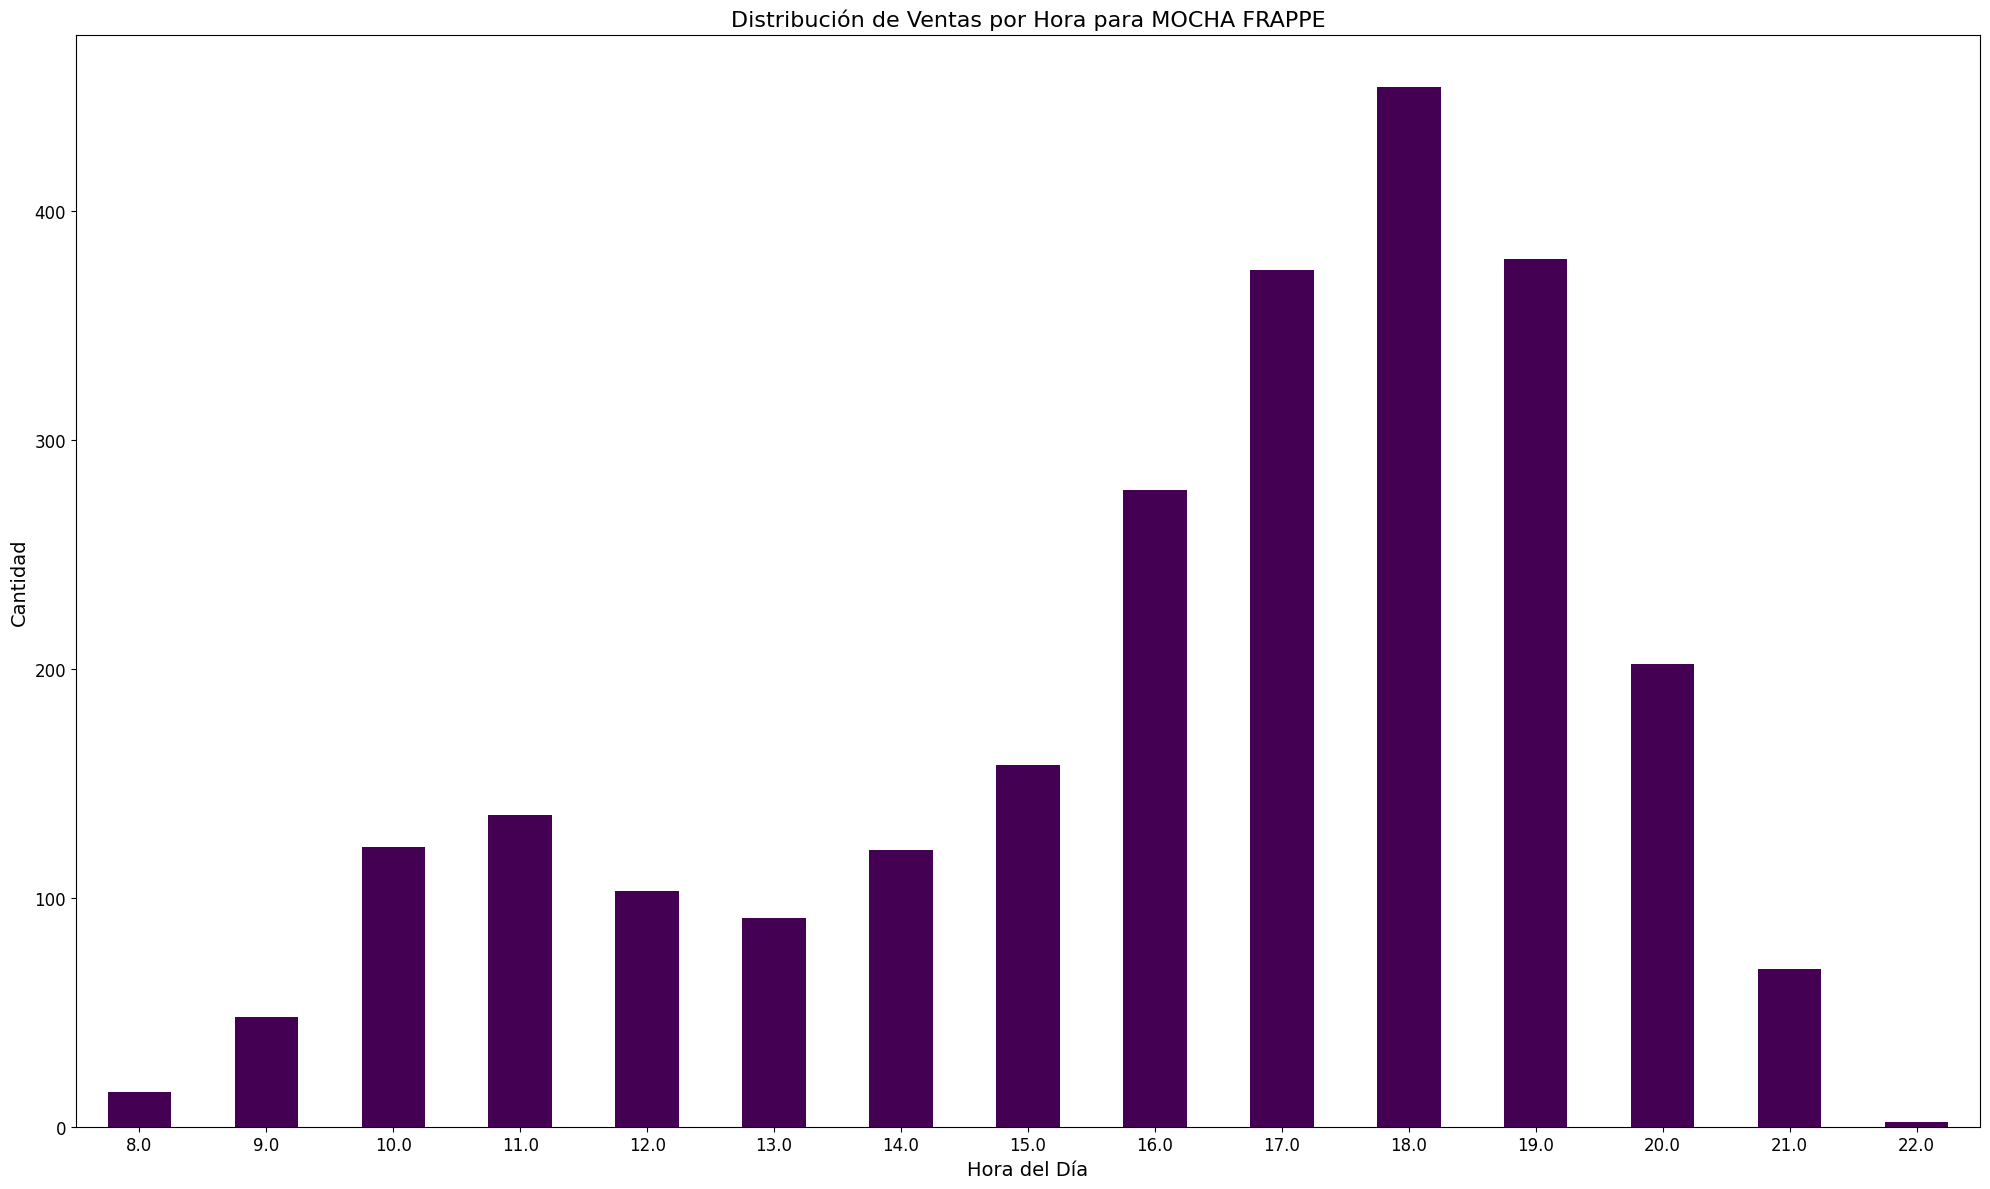

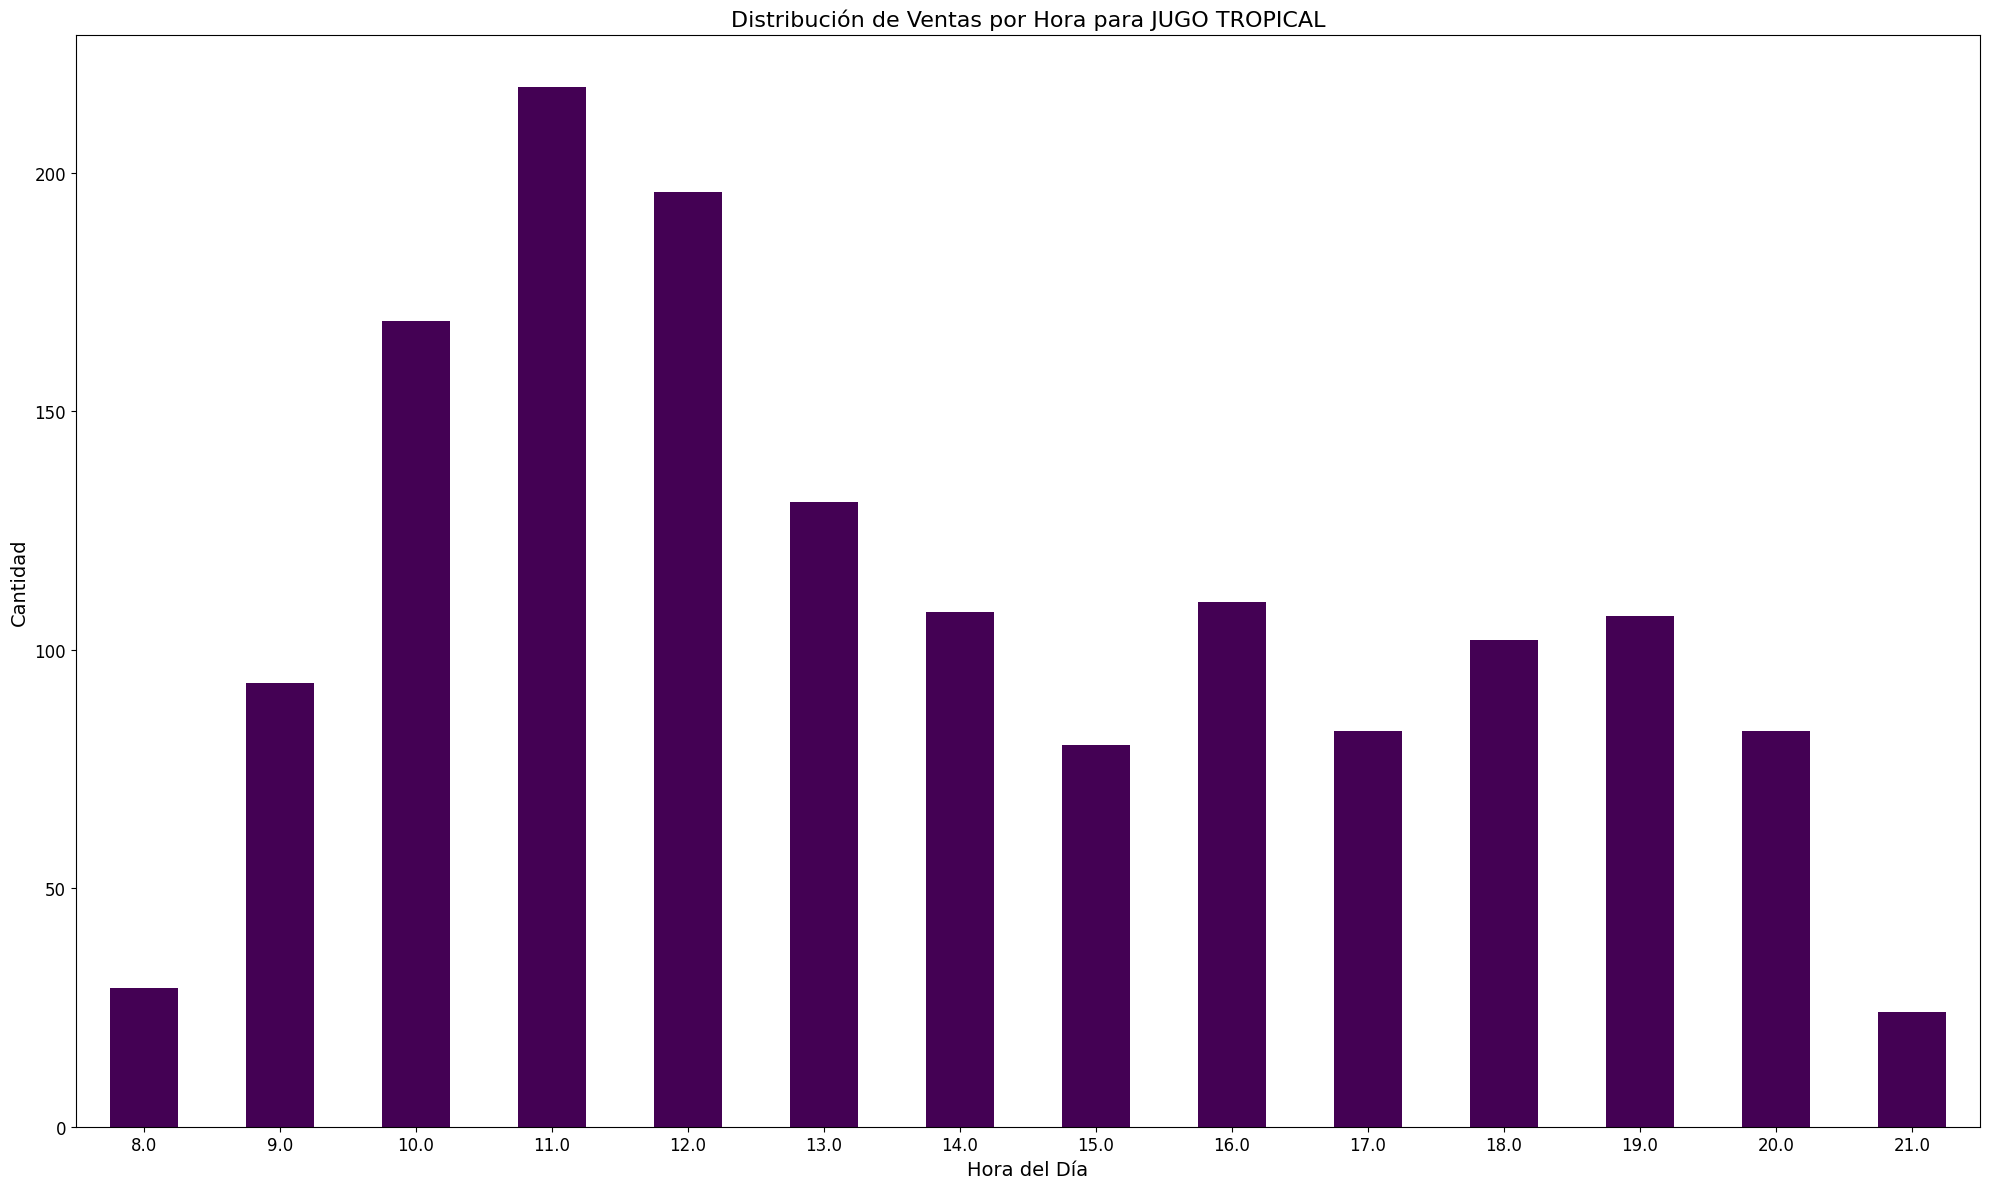

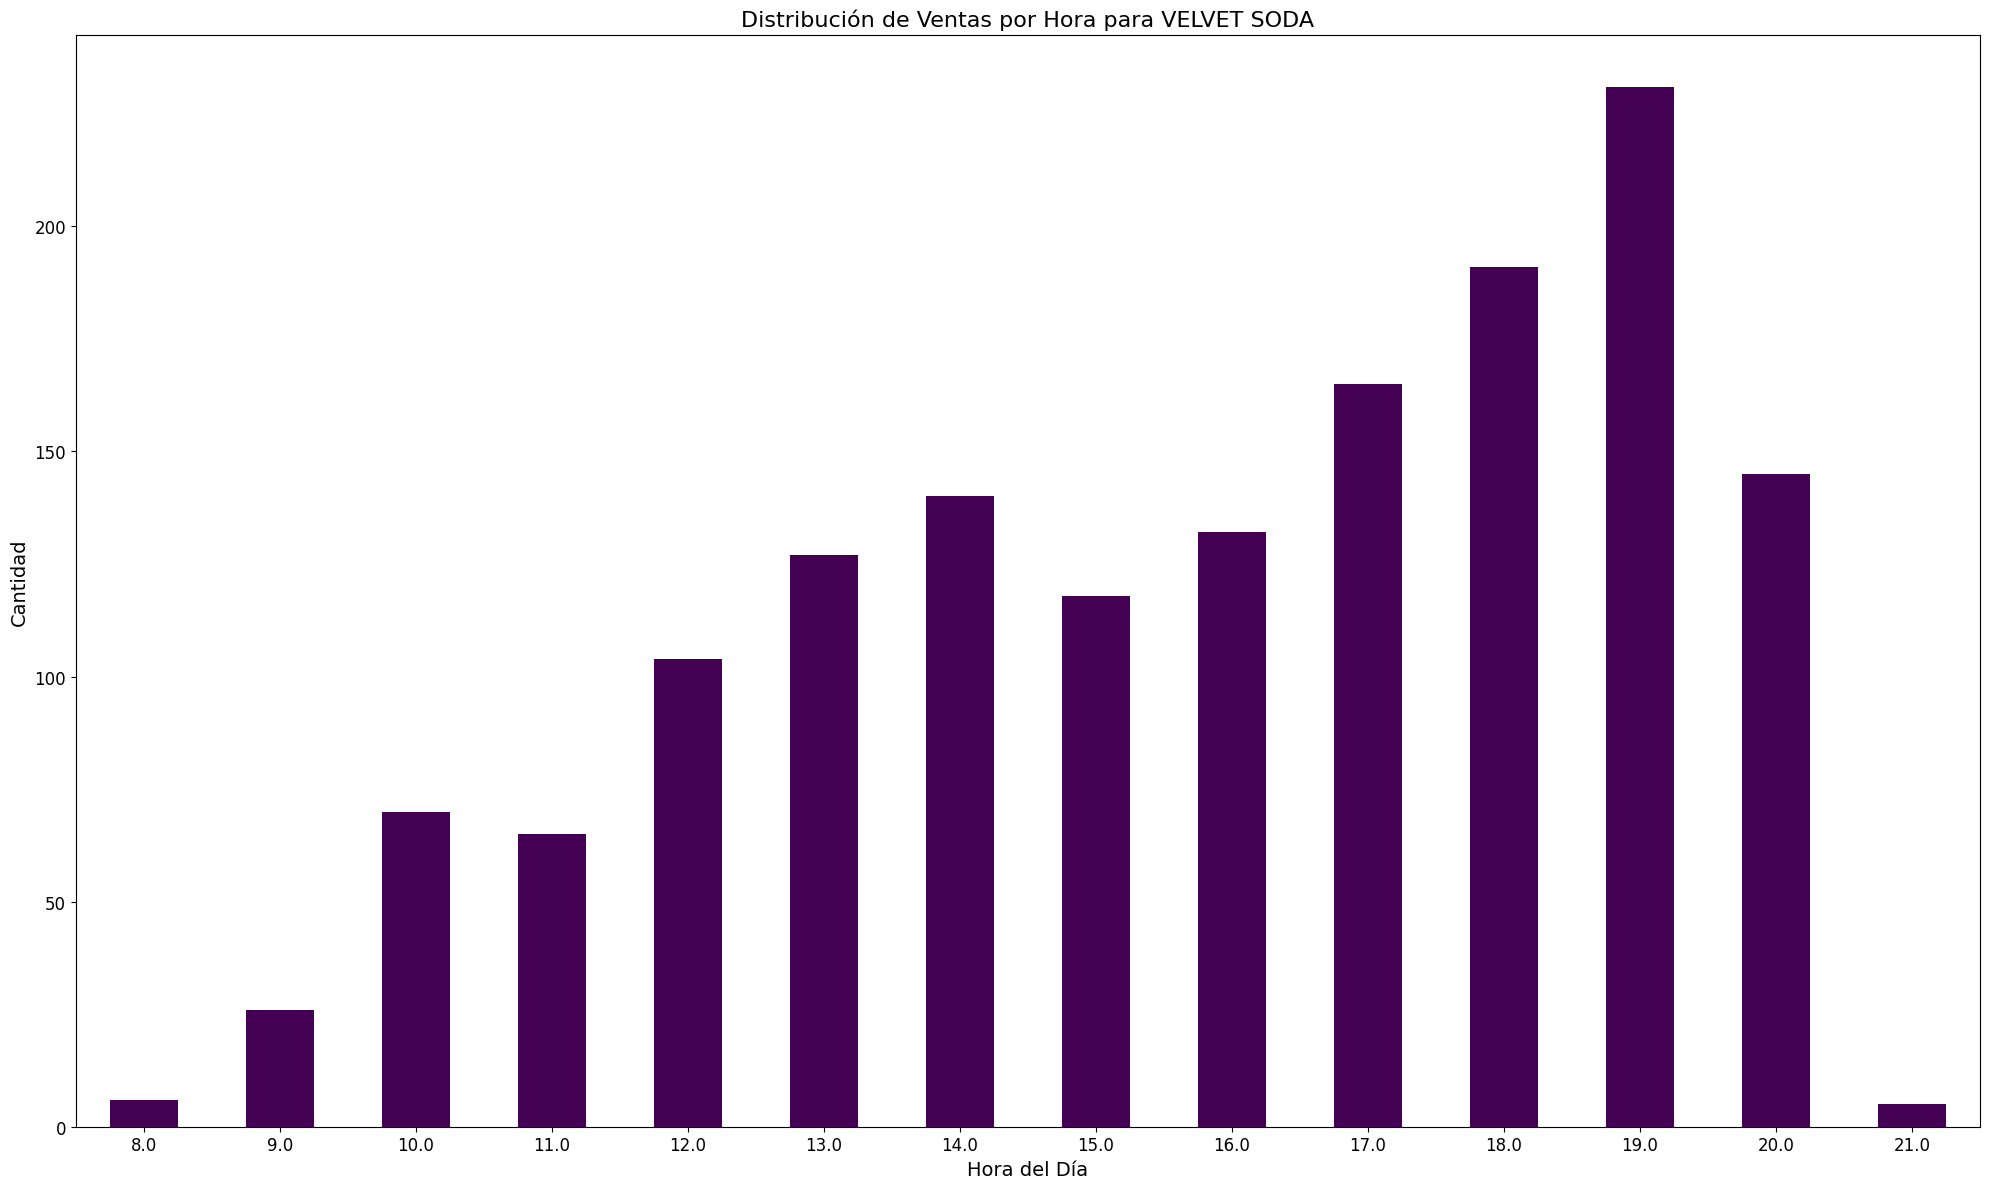

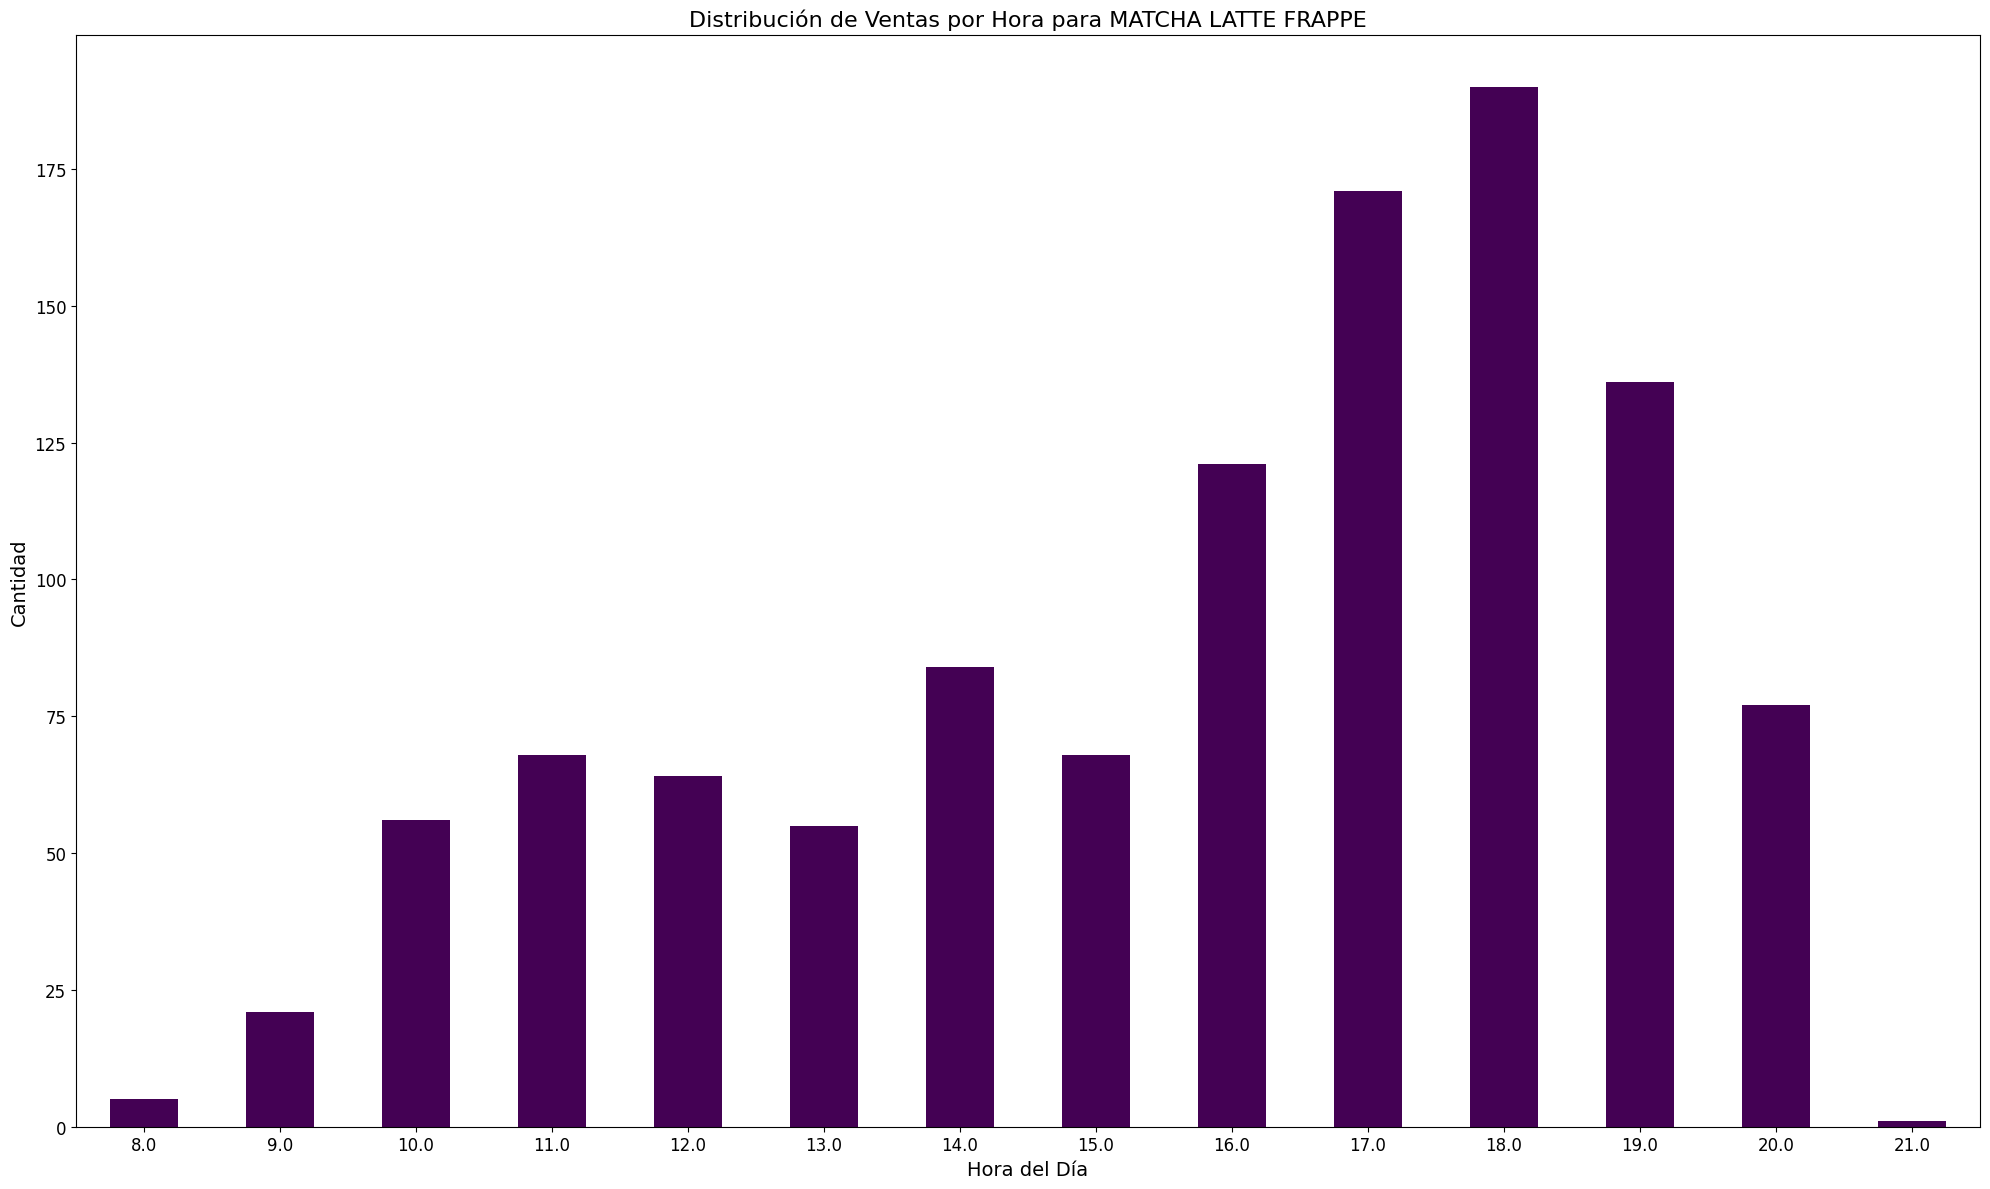

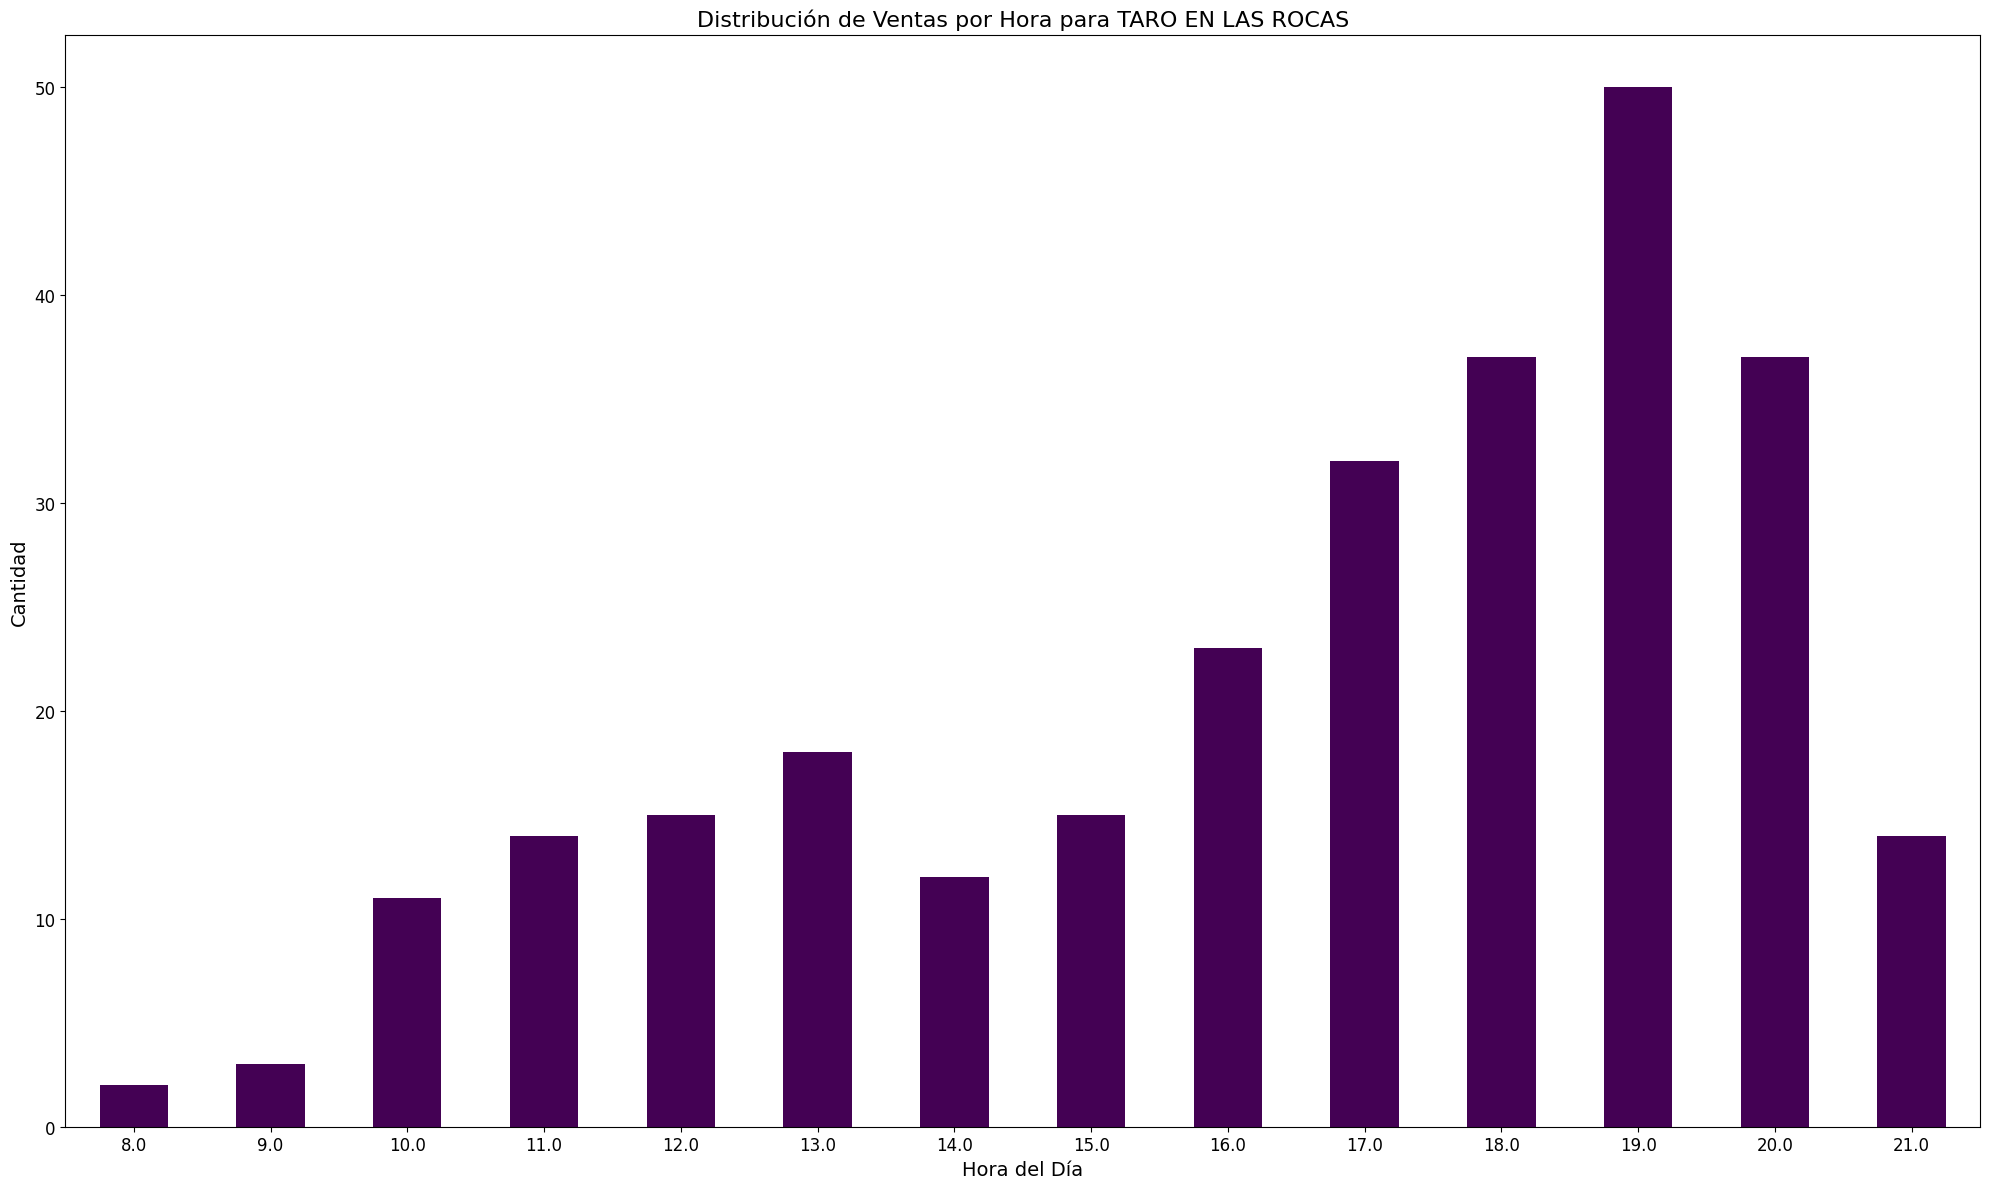

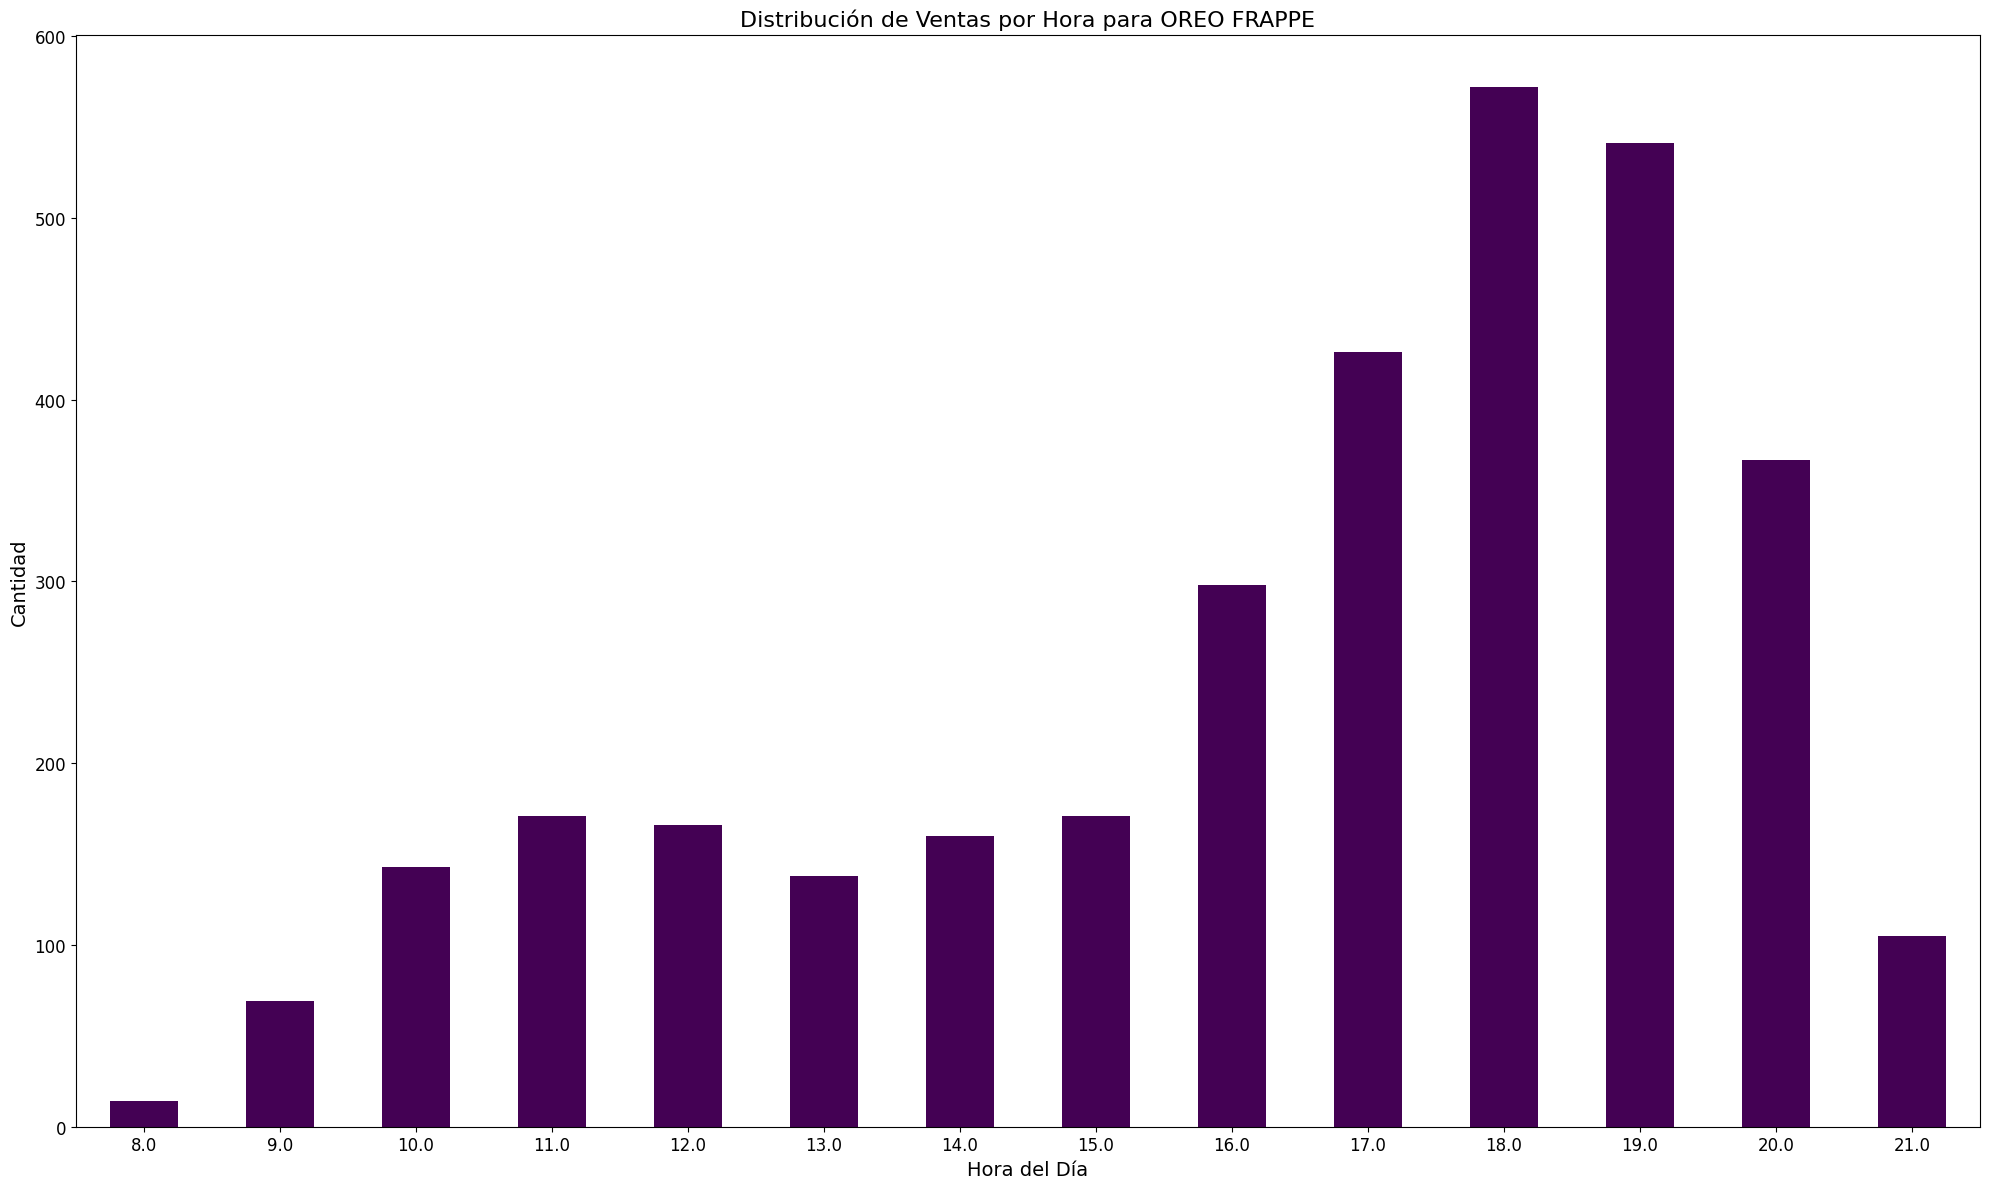

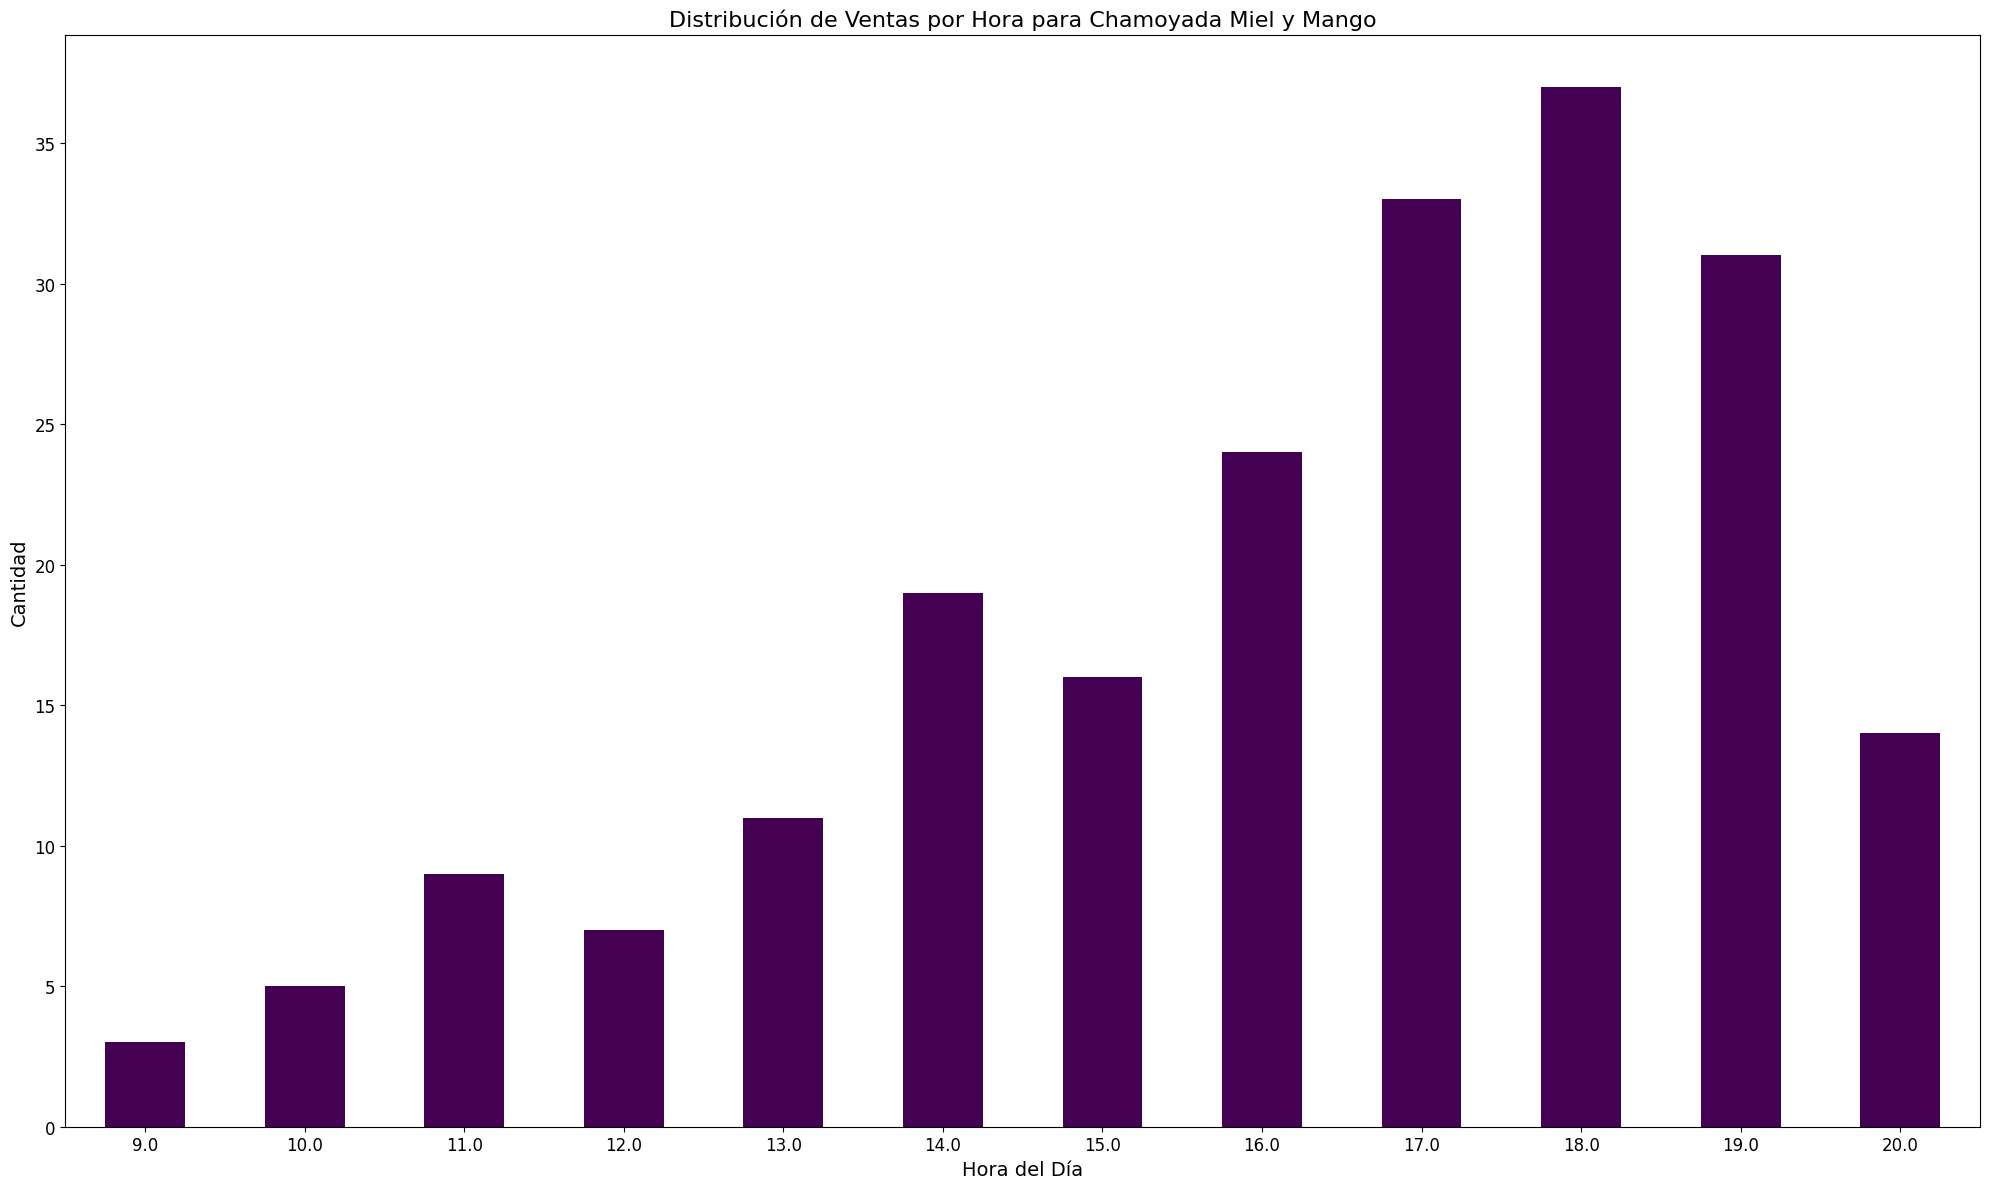

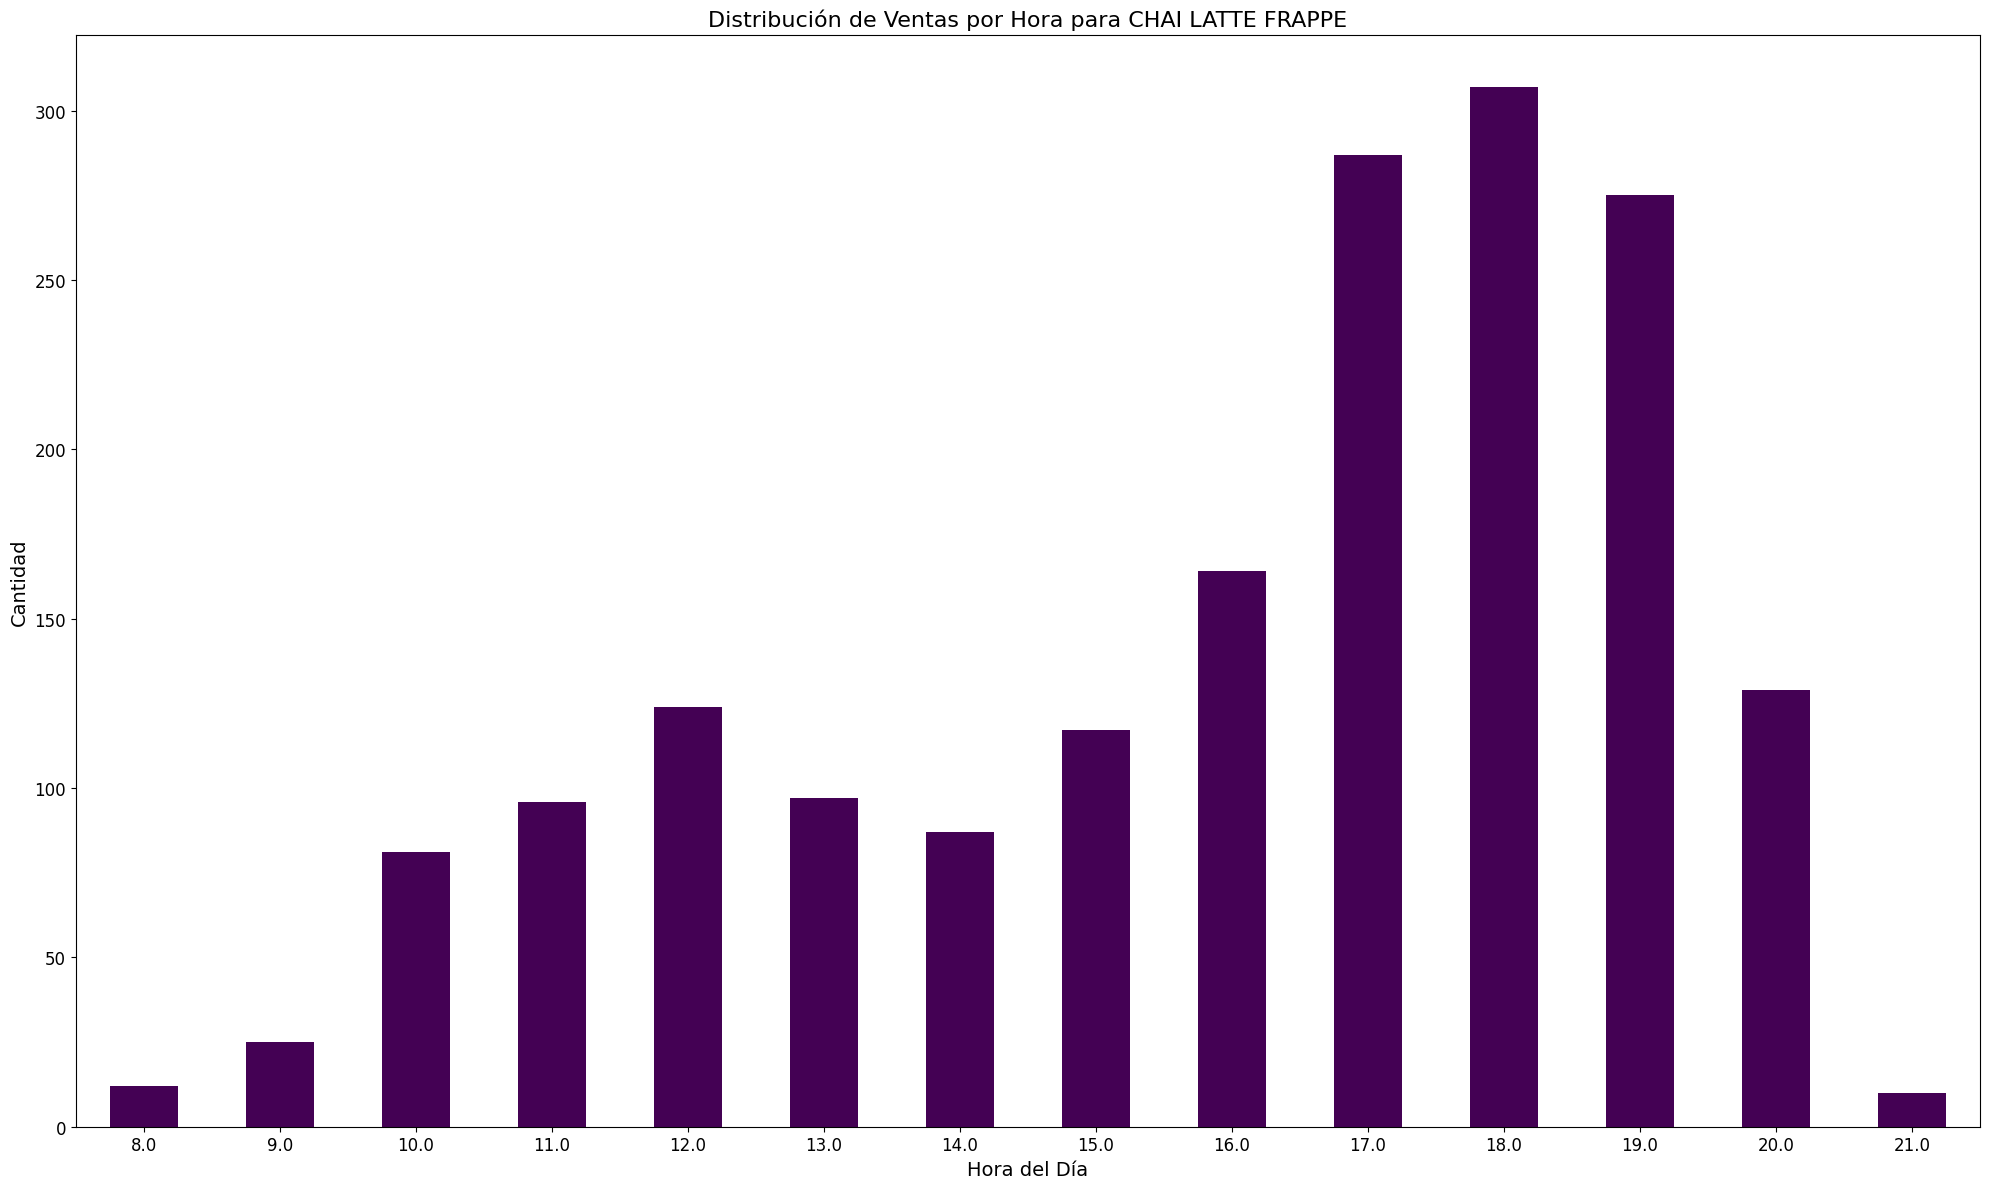

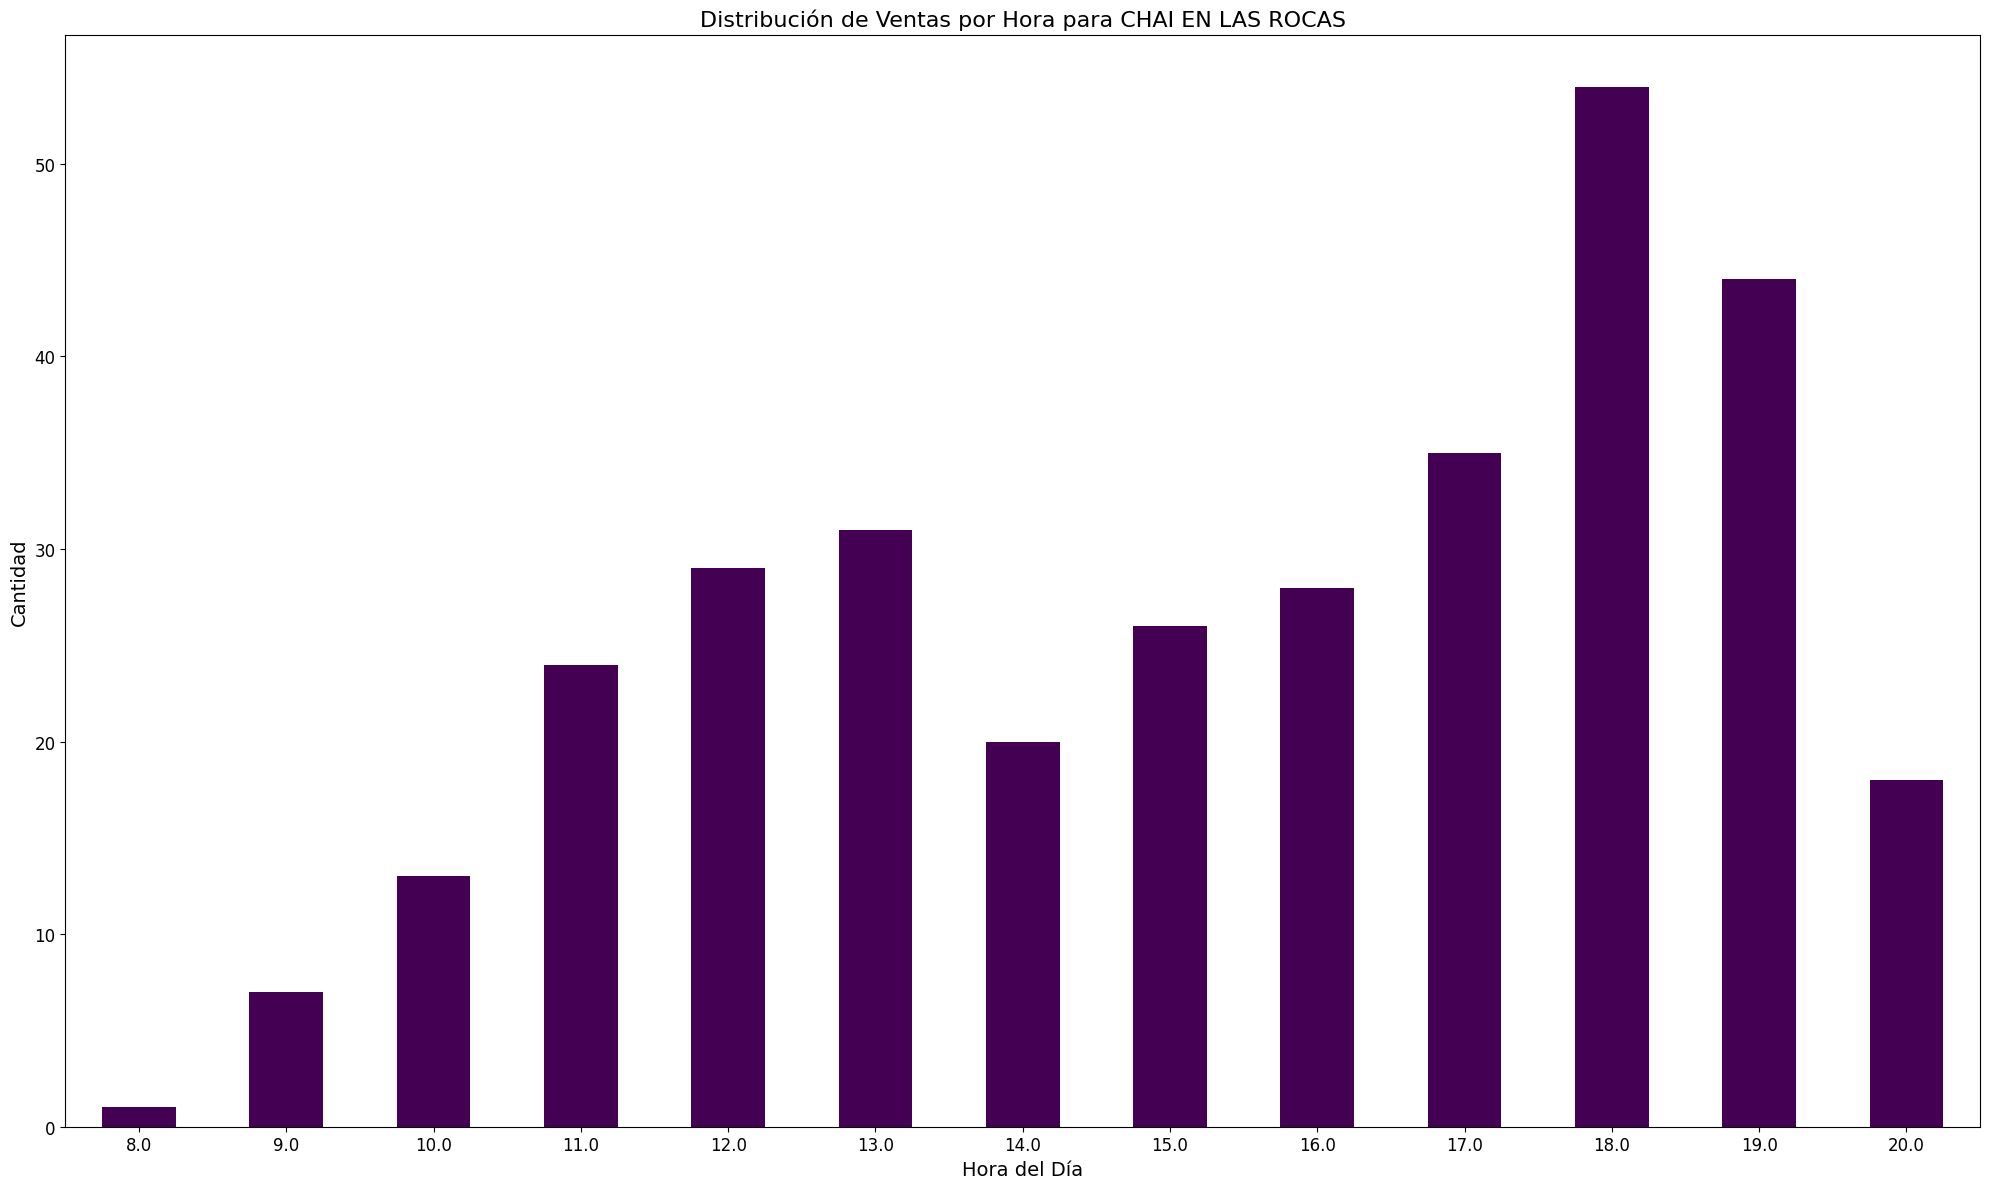

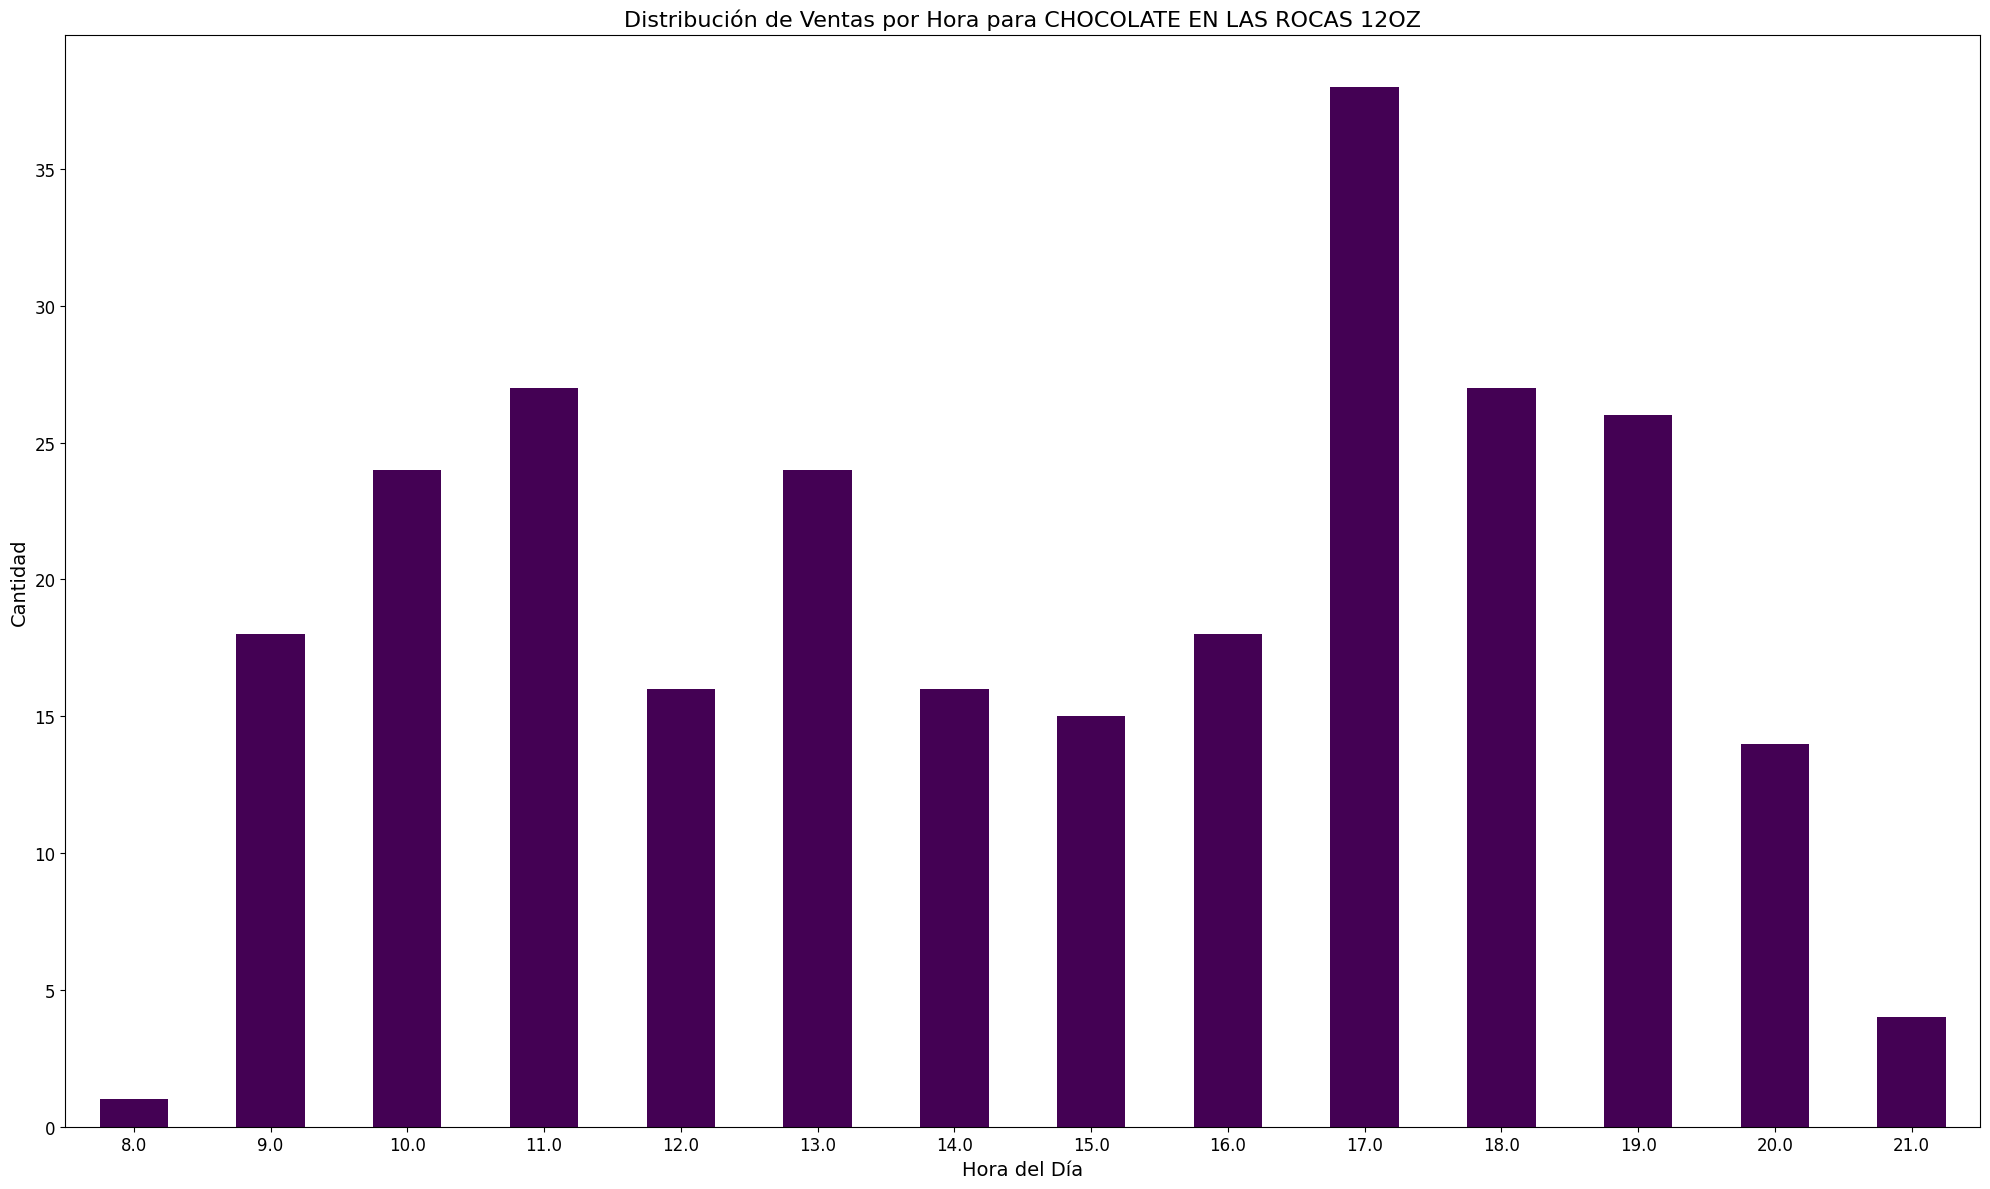

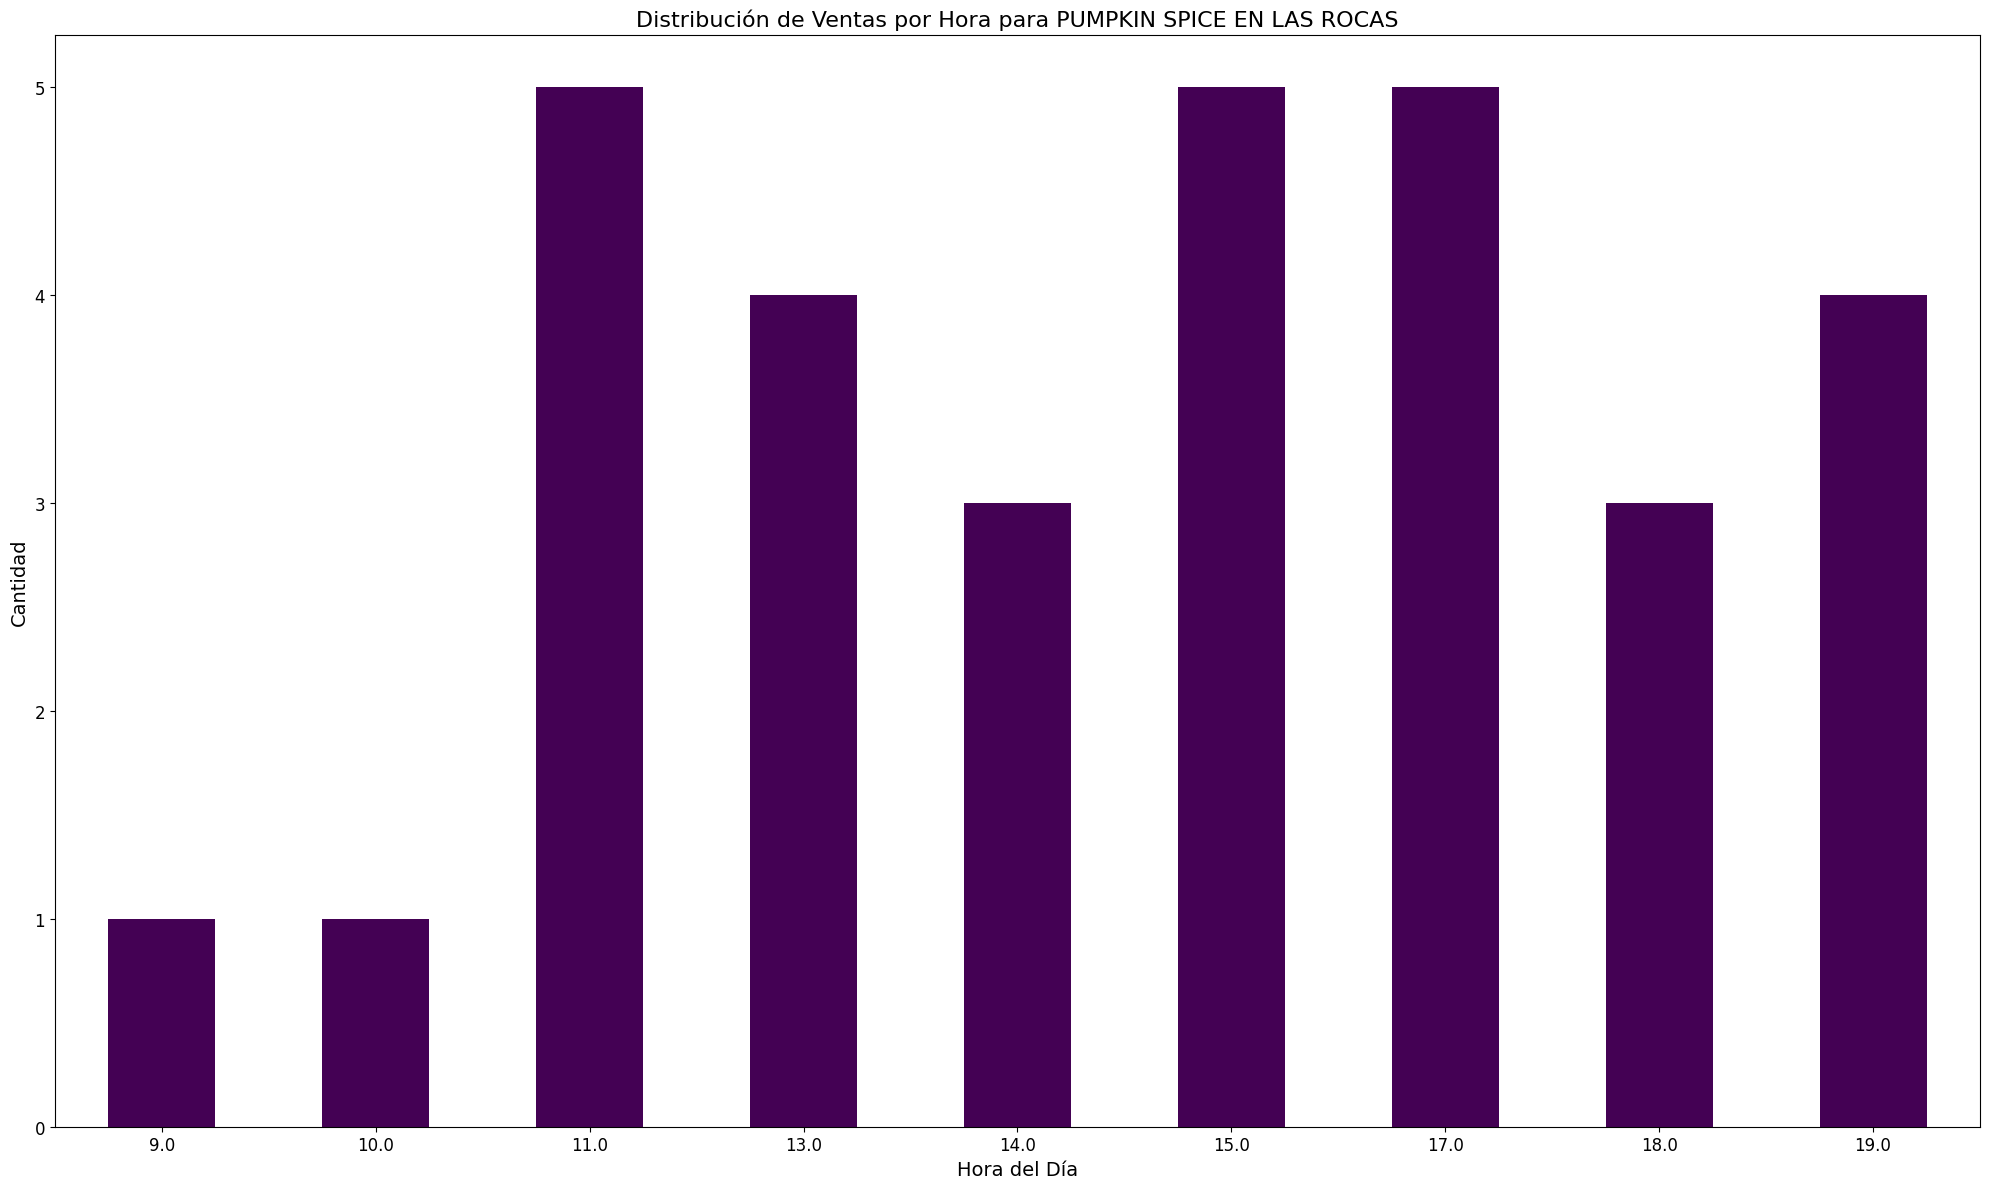

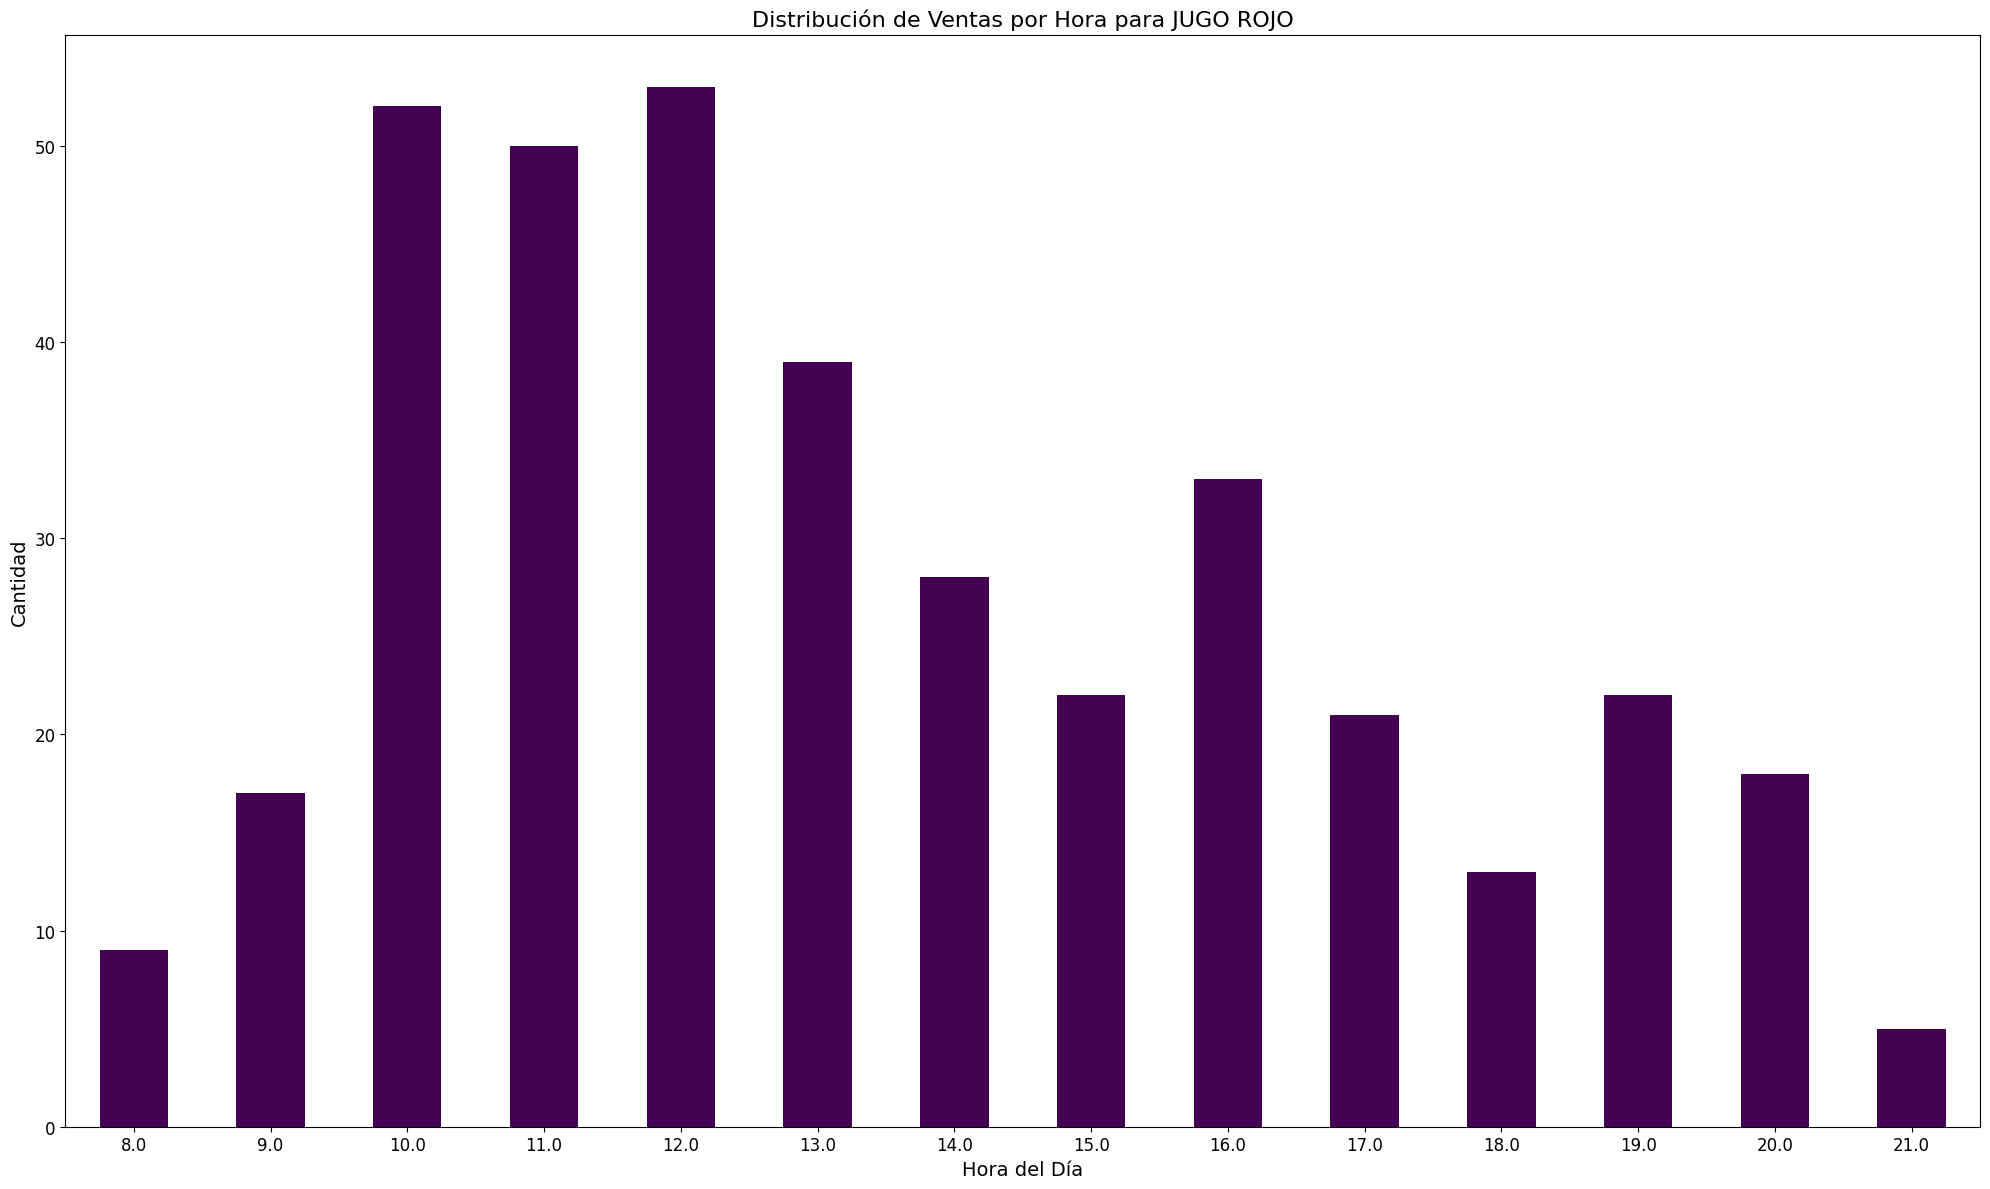

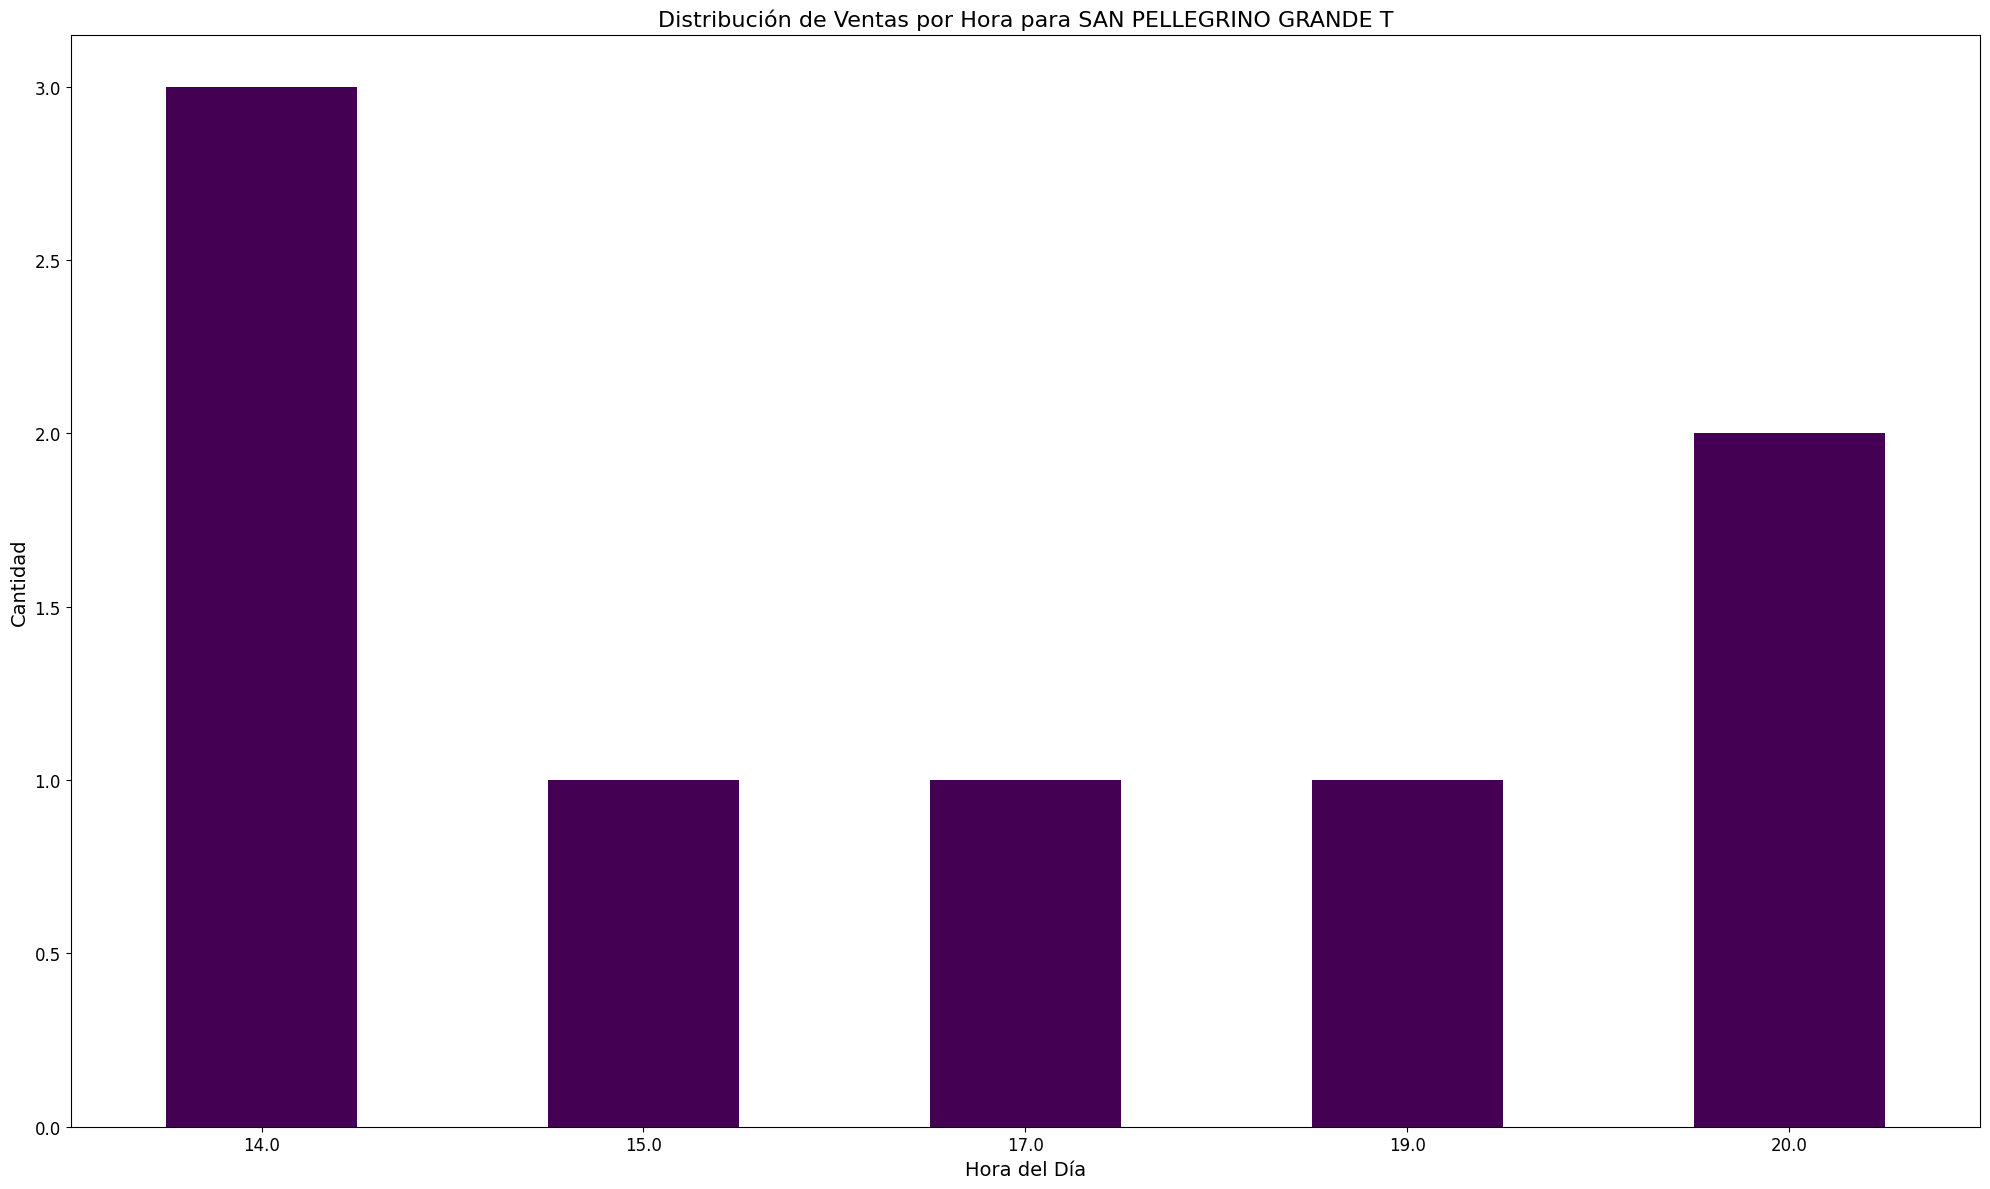

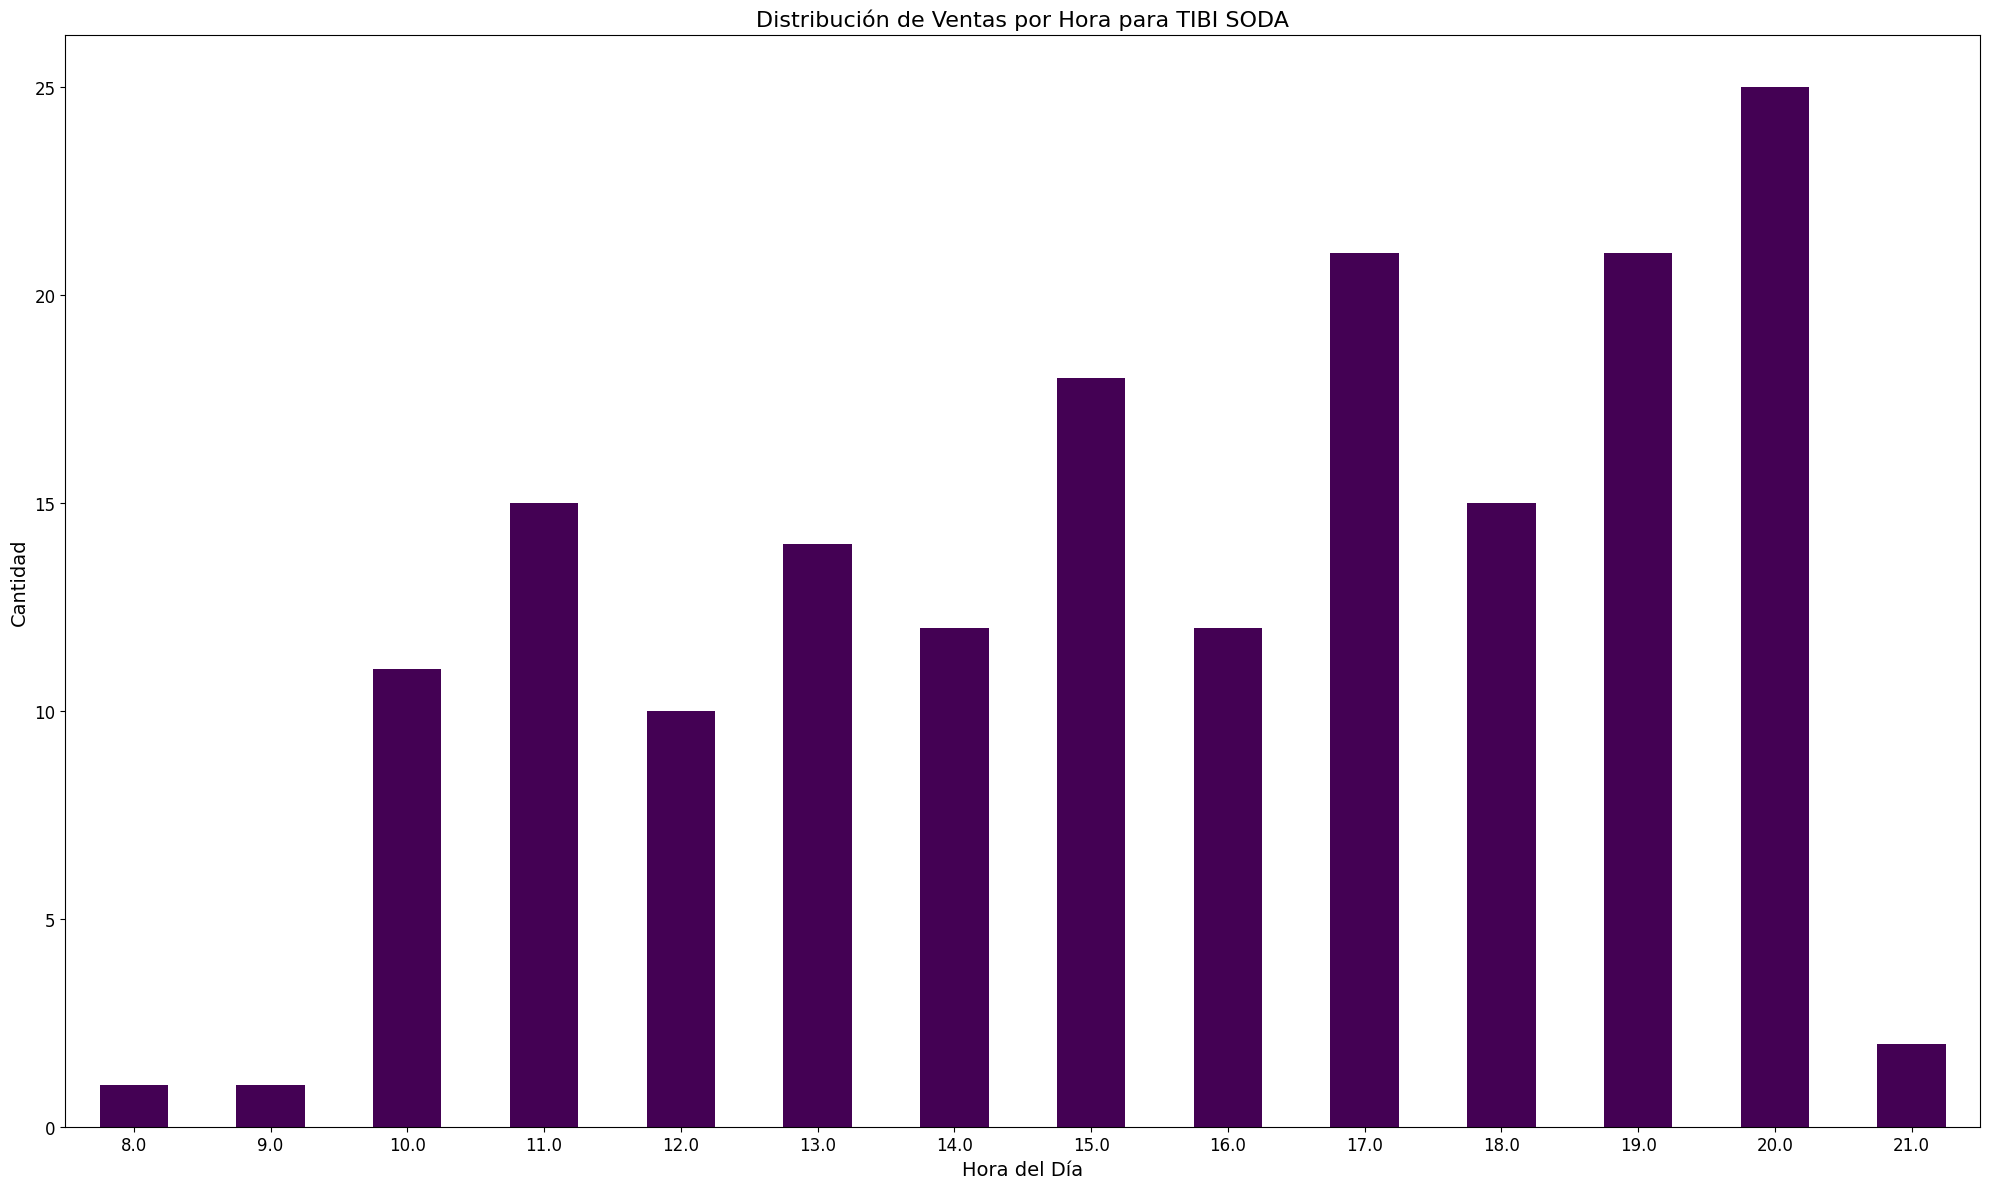

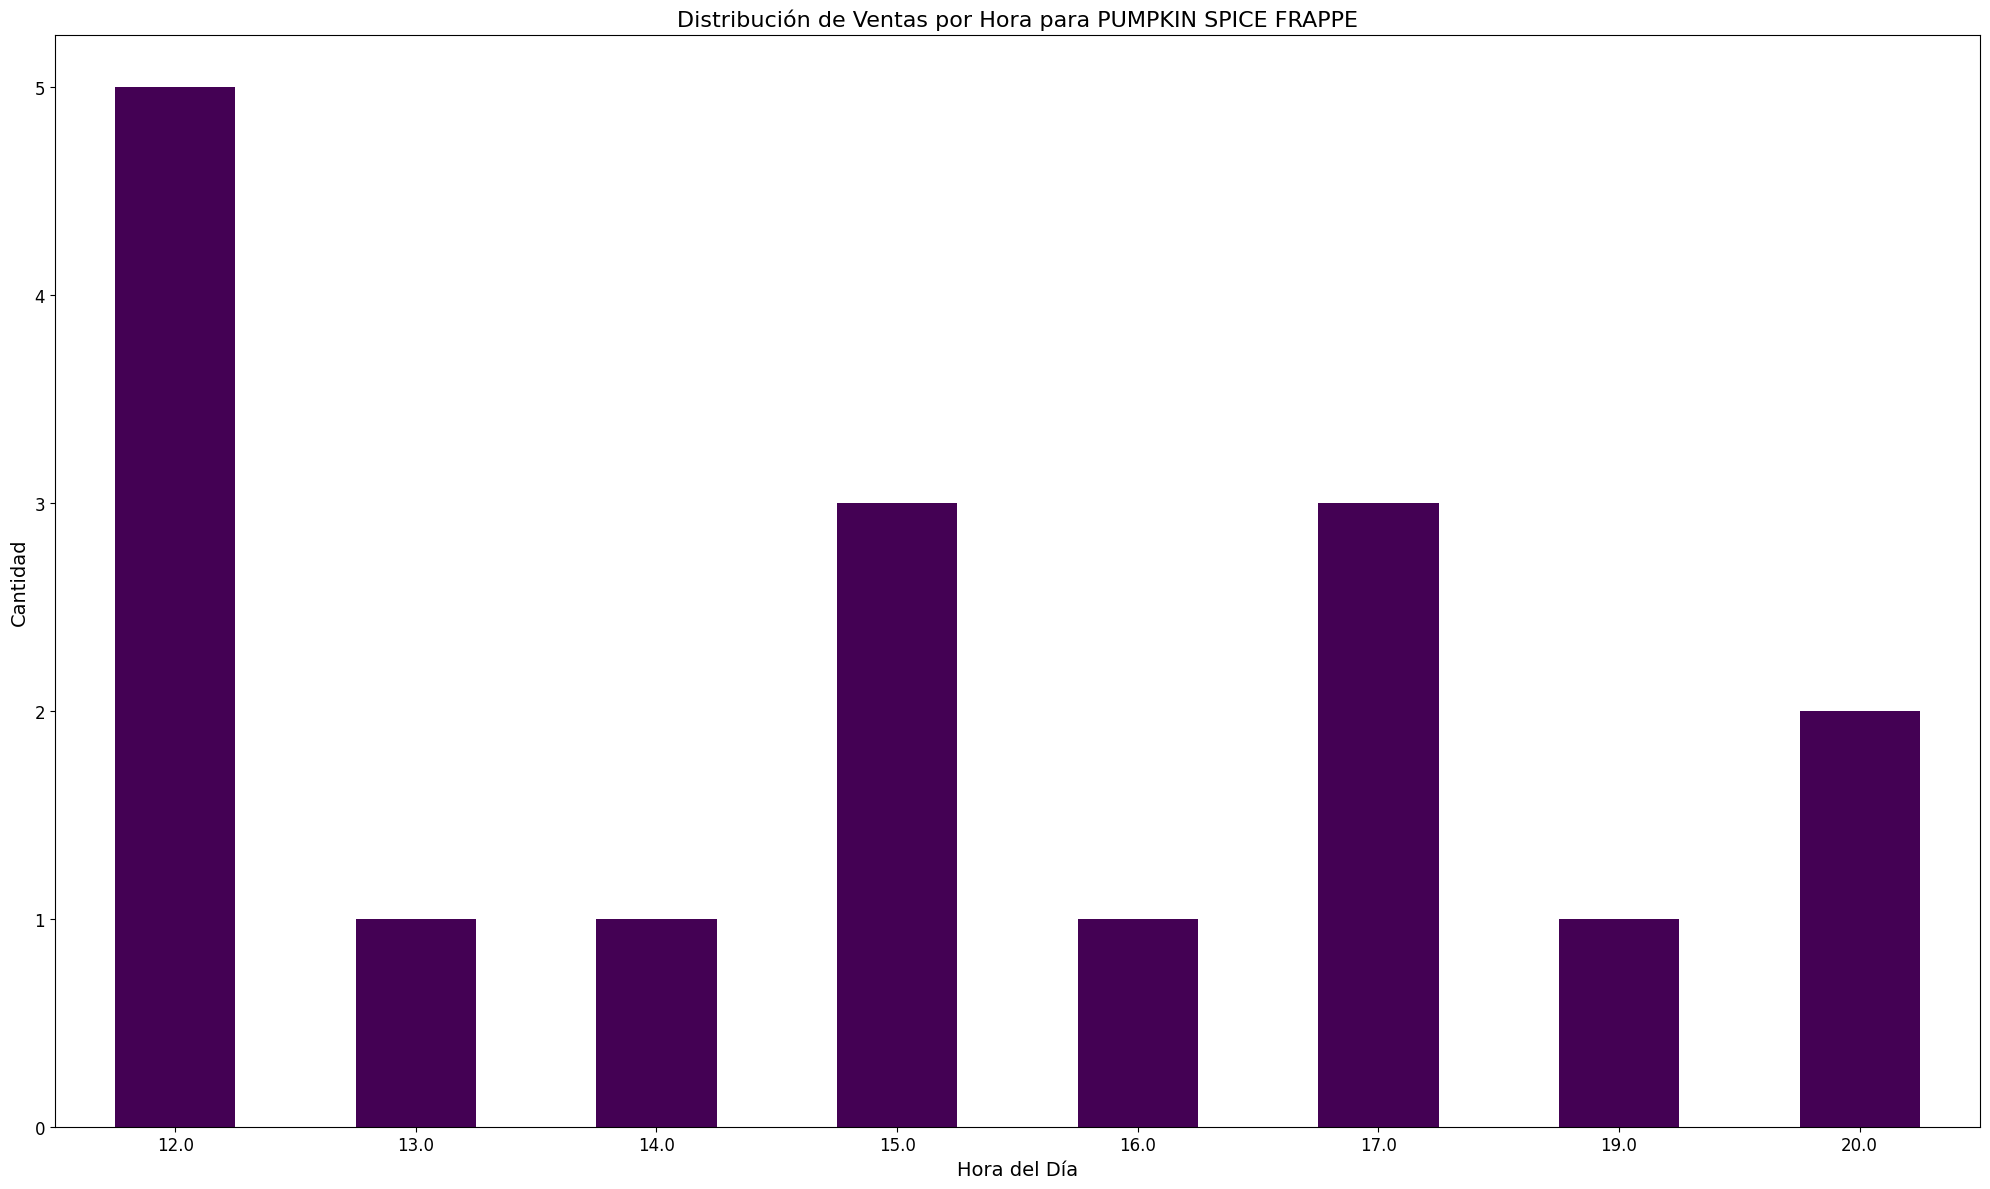

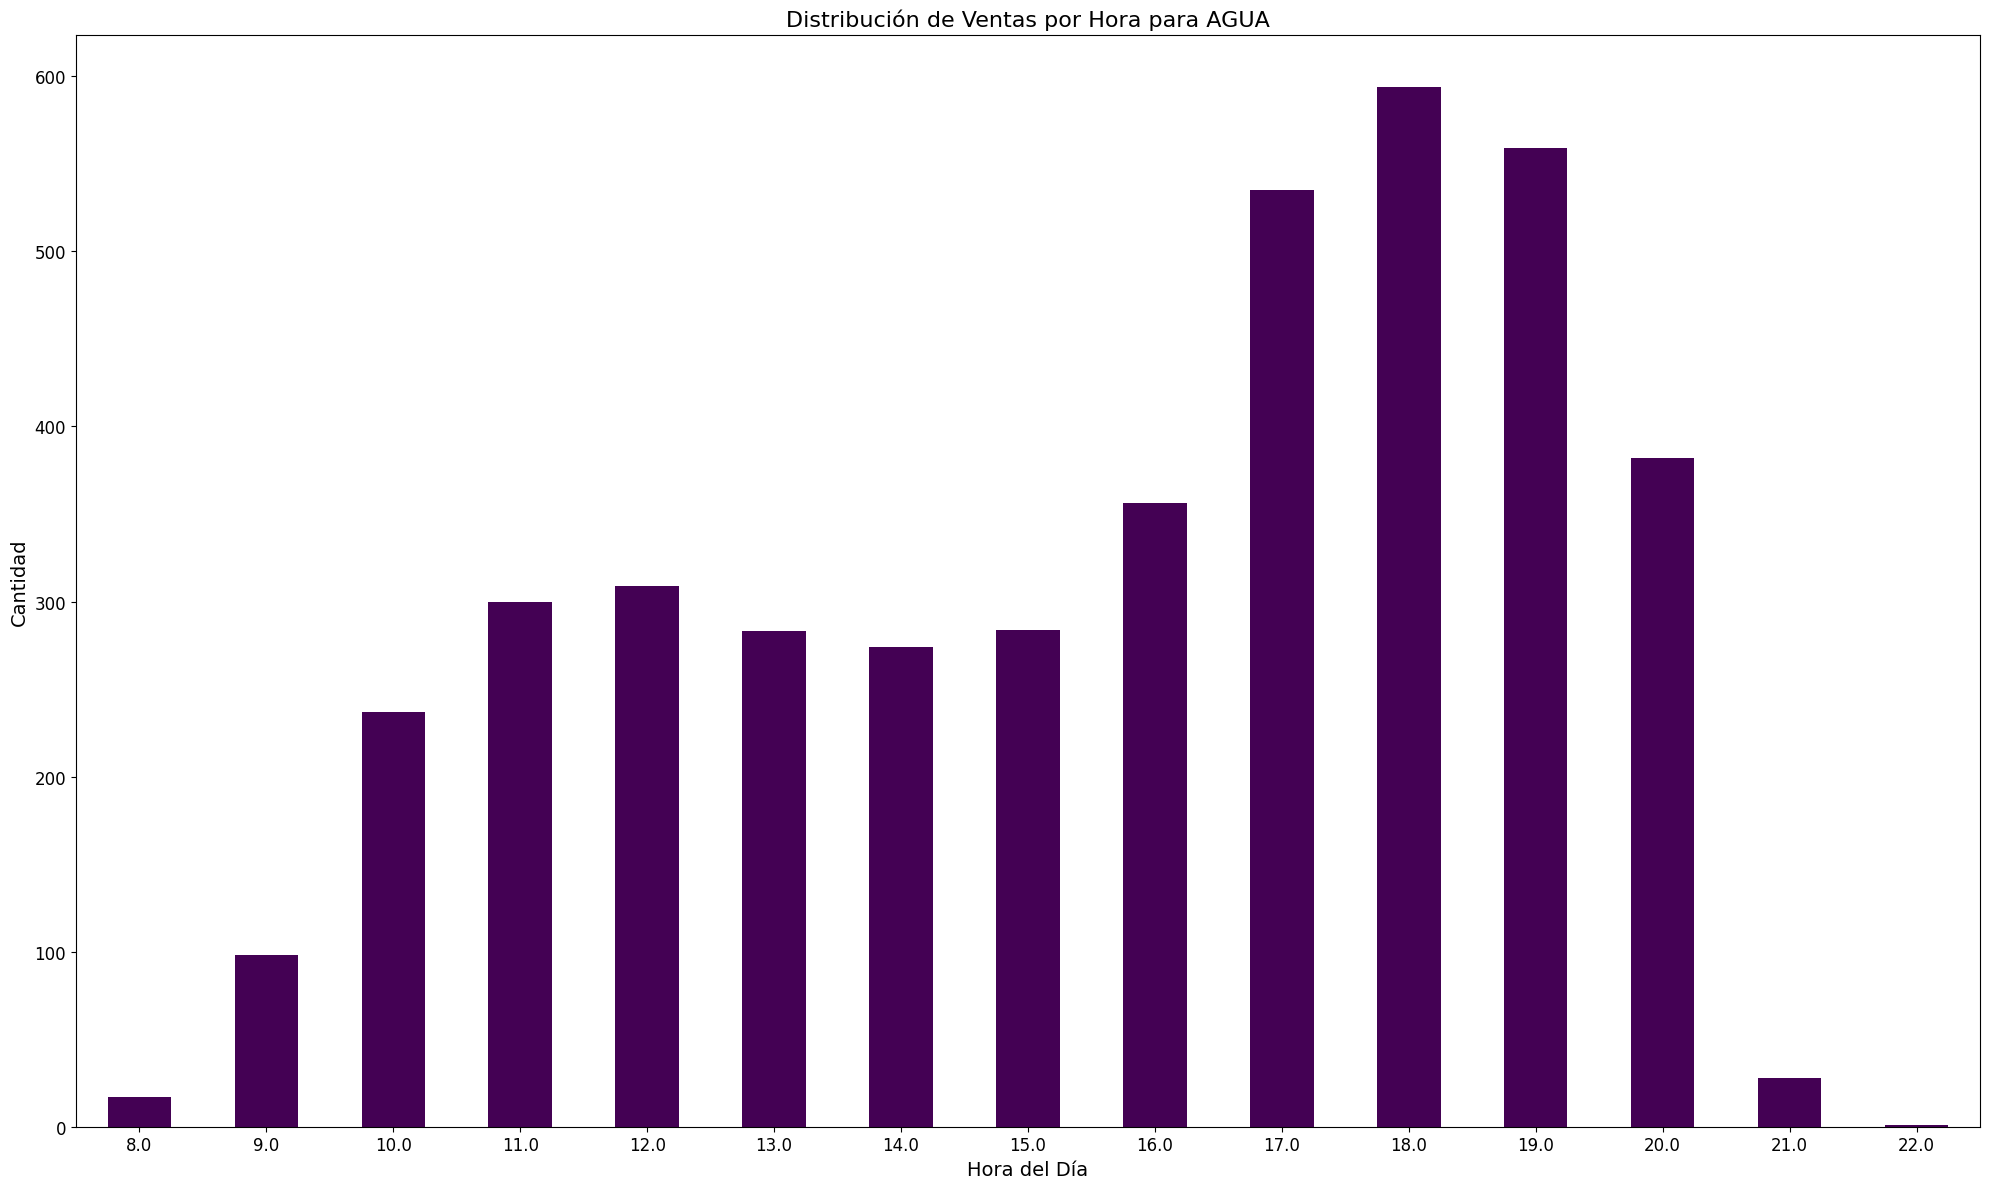

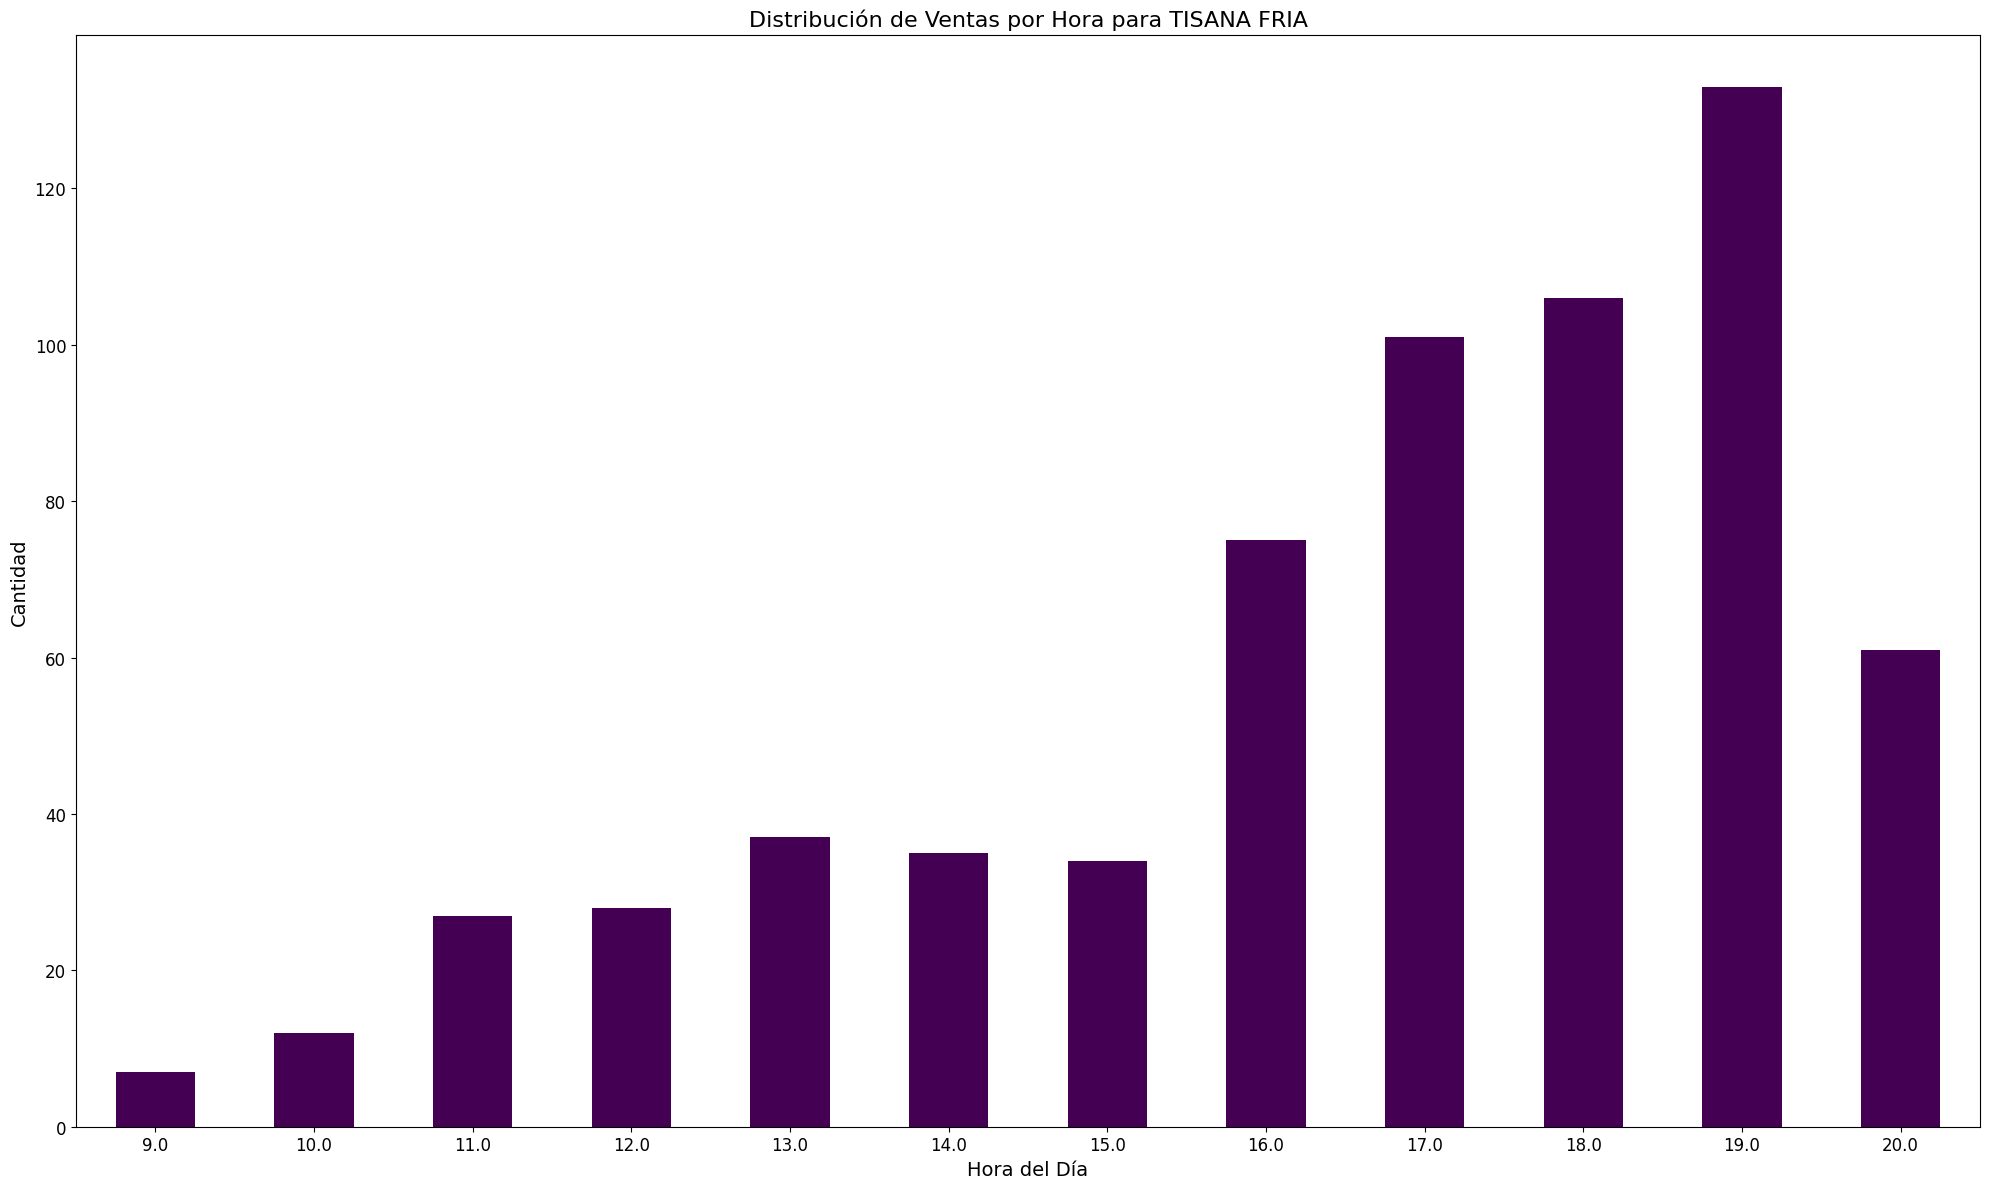

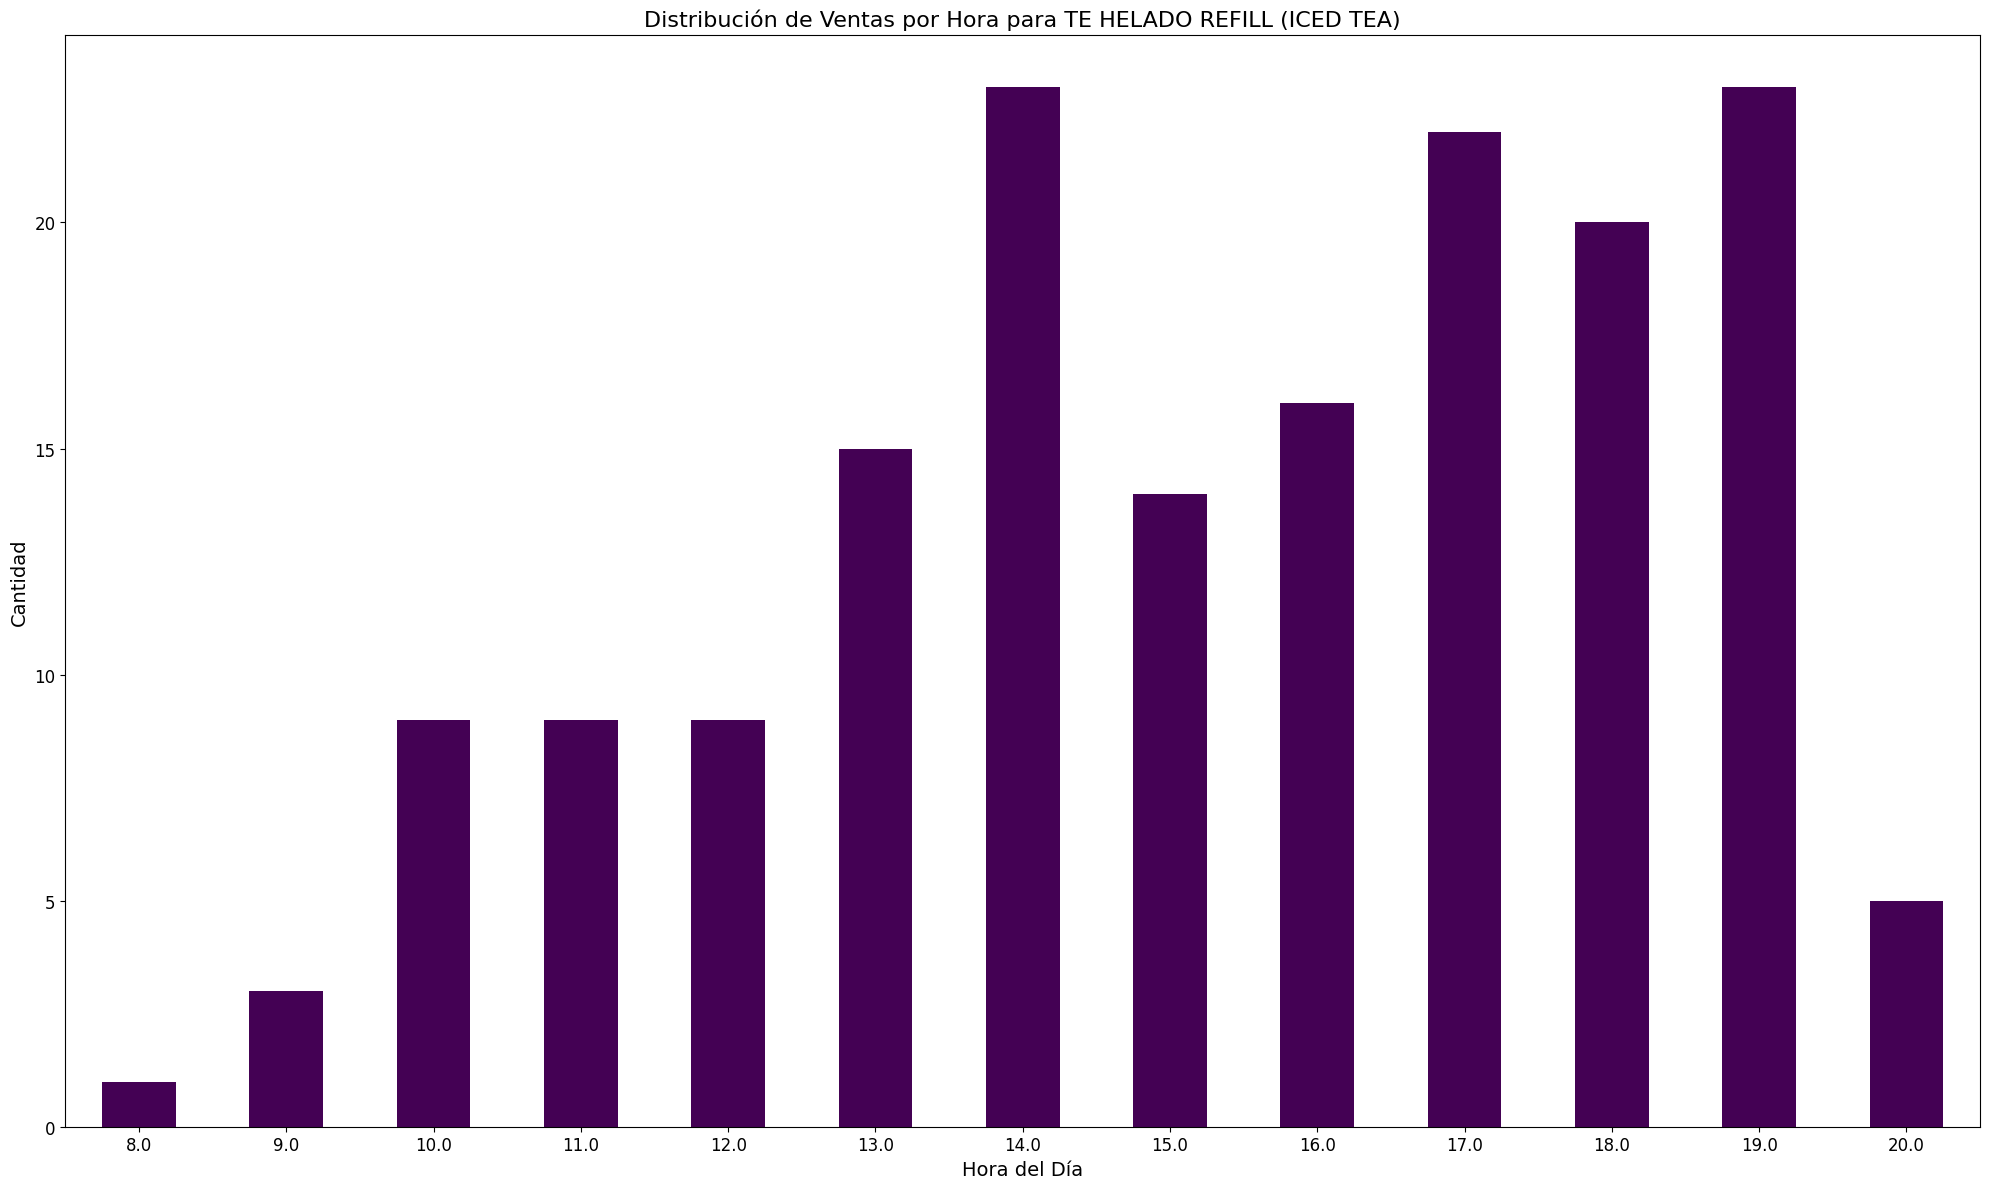

In [113]:

def plot_sales_distribution(df, grupo, figsize=(20, 12)):
    # Filtrar el DataFrame para el grupo especificado
    df_grupo = df[df['Grupo'] == grupo]
    
    # Asegúrate de que la columna 'Hora' es de tipo datetime
    df_grupo['Hora'] = pd.to_datetime(df_grupo['Hora'])
    
    # Extraer la hora del día
    df_grupo['hora_del_dia'] = df_grupo['Hora'].dt.hour
    
    # Obtener la lista de artículos únicos dentro del grupo
    articulos_unicos = df_grupo['Platillo / Artículo'].dropna().unique()
    
    # Iterar sobre cada artículo único y crear un gráfico separado
    for articulo in articulos_unicos:
        # Filtrar los datos para el artículo actual
        df_articulo = df_grupo[df_grupo['Platillo / Artículo'] == articulo]
        
        # Agrupar por 'hora_del_dia' y contar las ocurrencias
        articulo_por_hora = df_articulo.groupby(['hora_del_dia']).size()
        
        # Crear una nueva figura para cada gráfico
        plt.figure(figsize=figsize)
        
        # Graficar el DataFrame
        articulo_por_hora.plot(kind='bar', colormap='viridis')
        
        # Ajustar título y etiquetas
        plt.title(f'Distribución de Ventas por Hora para {articulo}', fontsize=16)
        plt.xlabel('Hora del Día', fontsize=14)
        plt.ylabel('Cantidad', fontsize=14)
        plt.xticks(rotation=0, fontsize=12)  # Rotación 0 para horas
        plt.yticks(fontsize=12)
        
        # Ajustar layout para evitar superposición
        plt.tight_layout()
        
        # Mostrar el gráfico
        plt.show()

# Uso de la función
plot_sales_distribution(df_grupo_max_frecu, 'JUGOS Y BEBIDAS FRIAS')


C:\Users\34690\AppData\Local\Temp\ipykernel_18400\889813826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['Hora'] = pd.to_datetime(df_grupo['Hora'])
C:\Users\34690\AppData\Local\Temp\ipykernel_18400\889813826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['hora_del_dia'] = df_grupo['Hora'].dt.hour


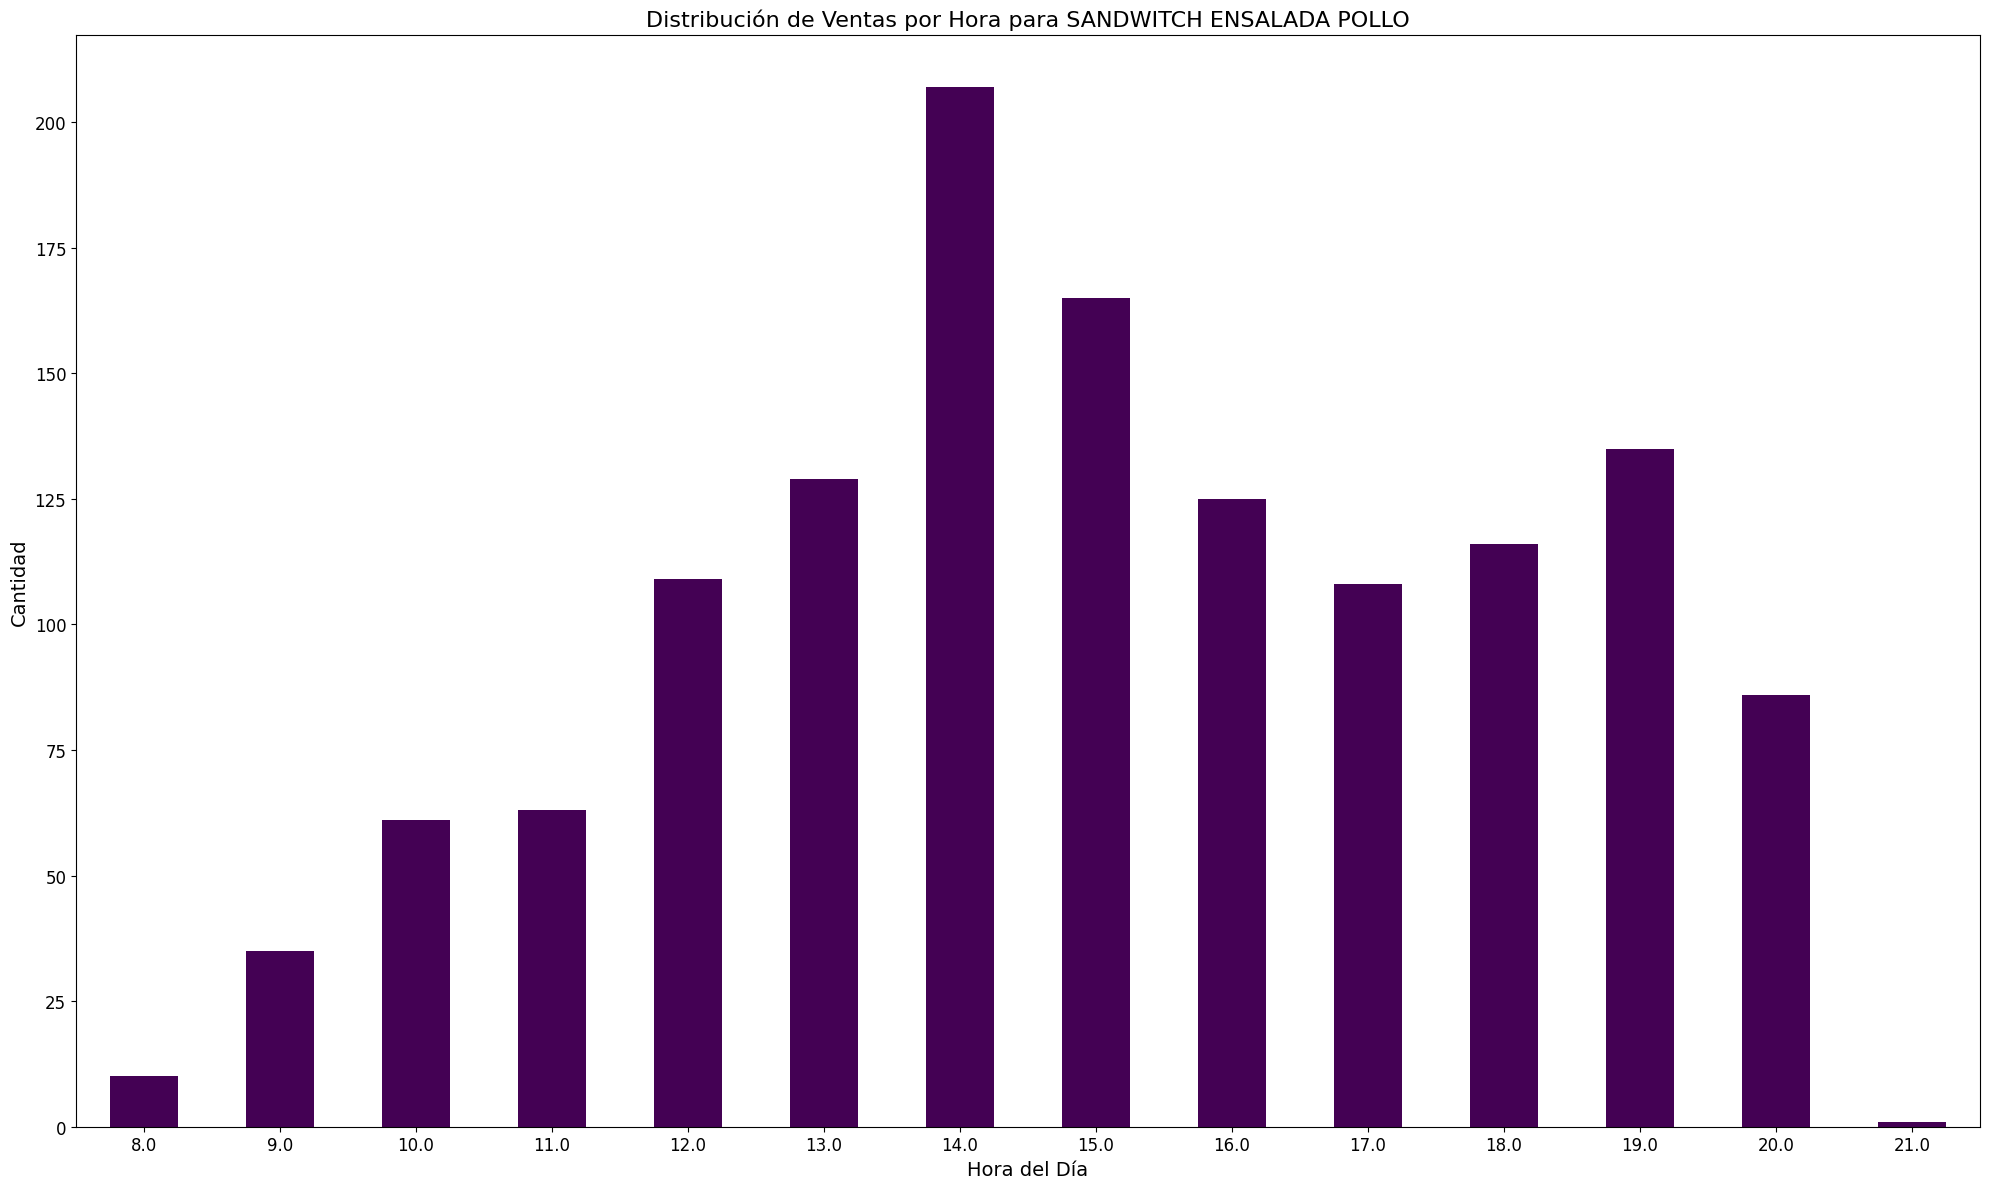

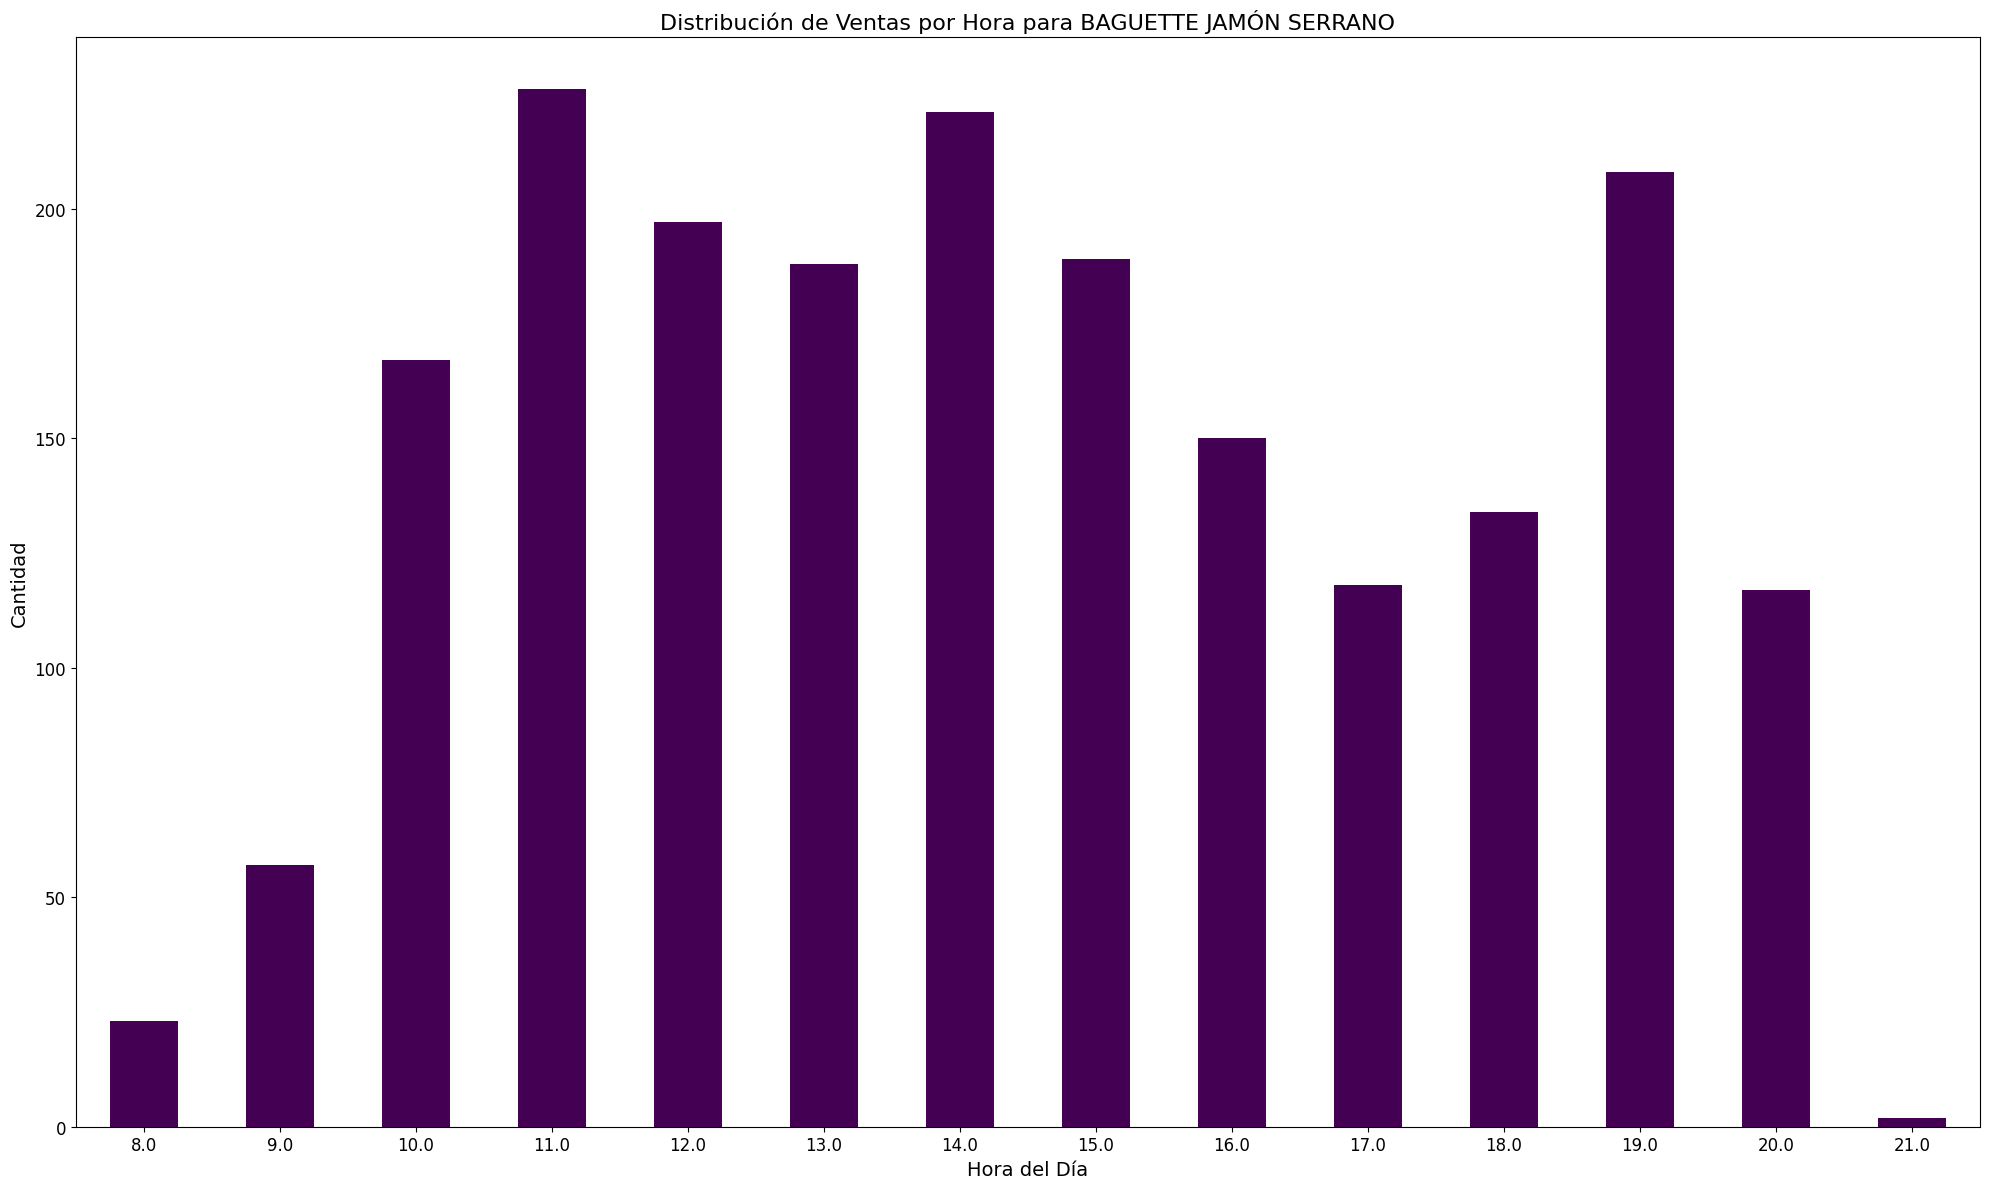

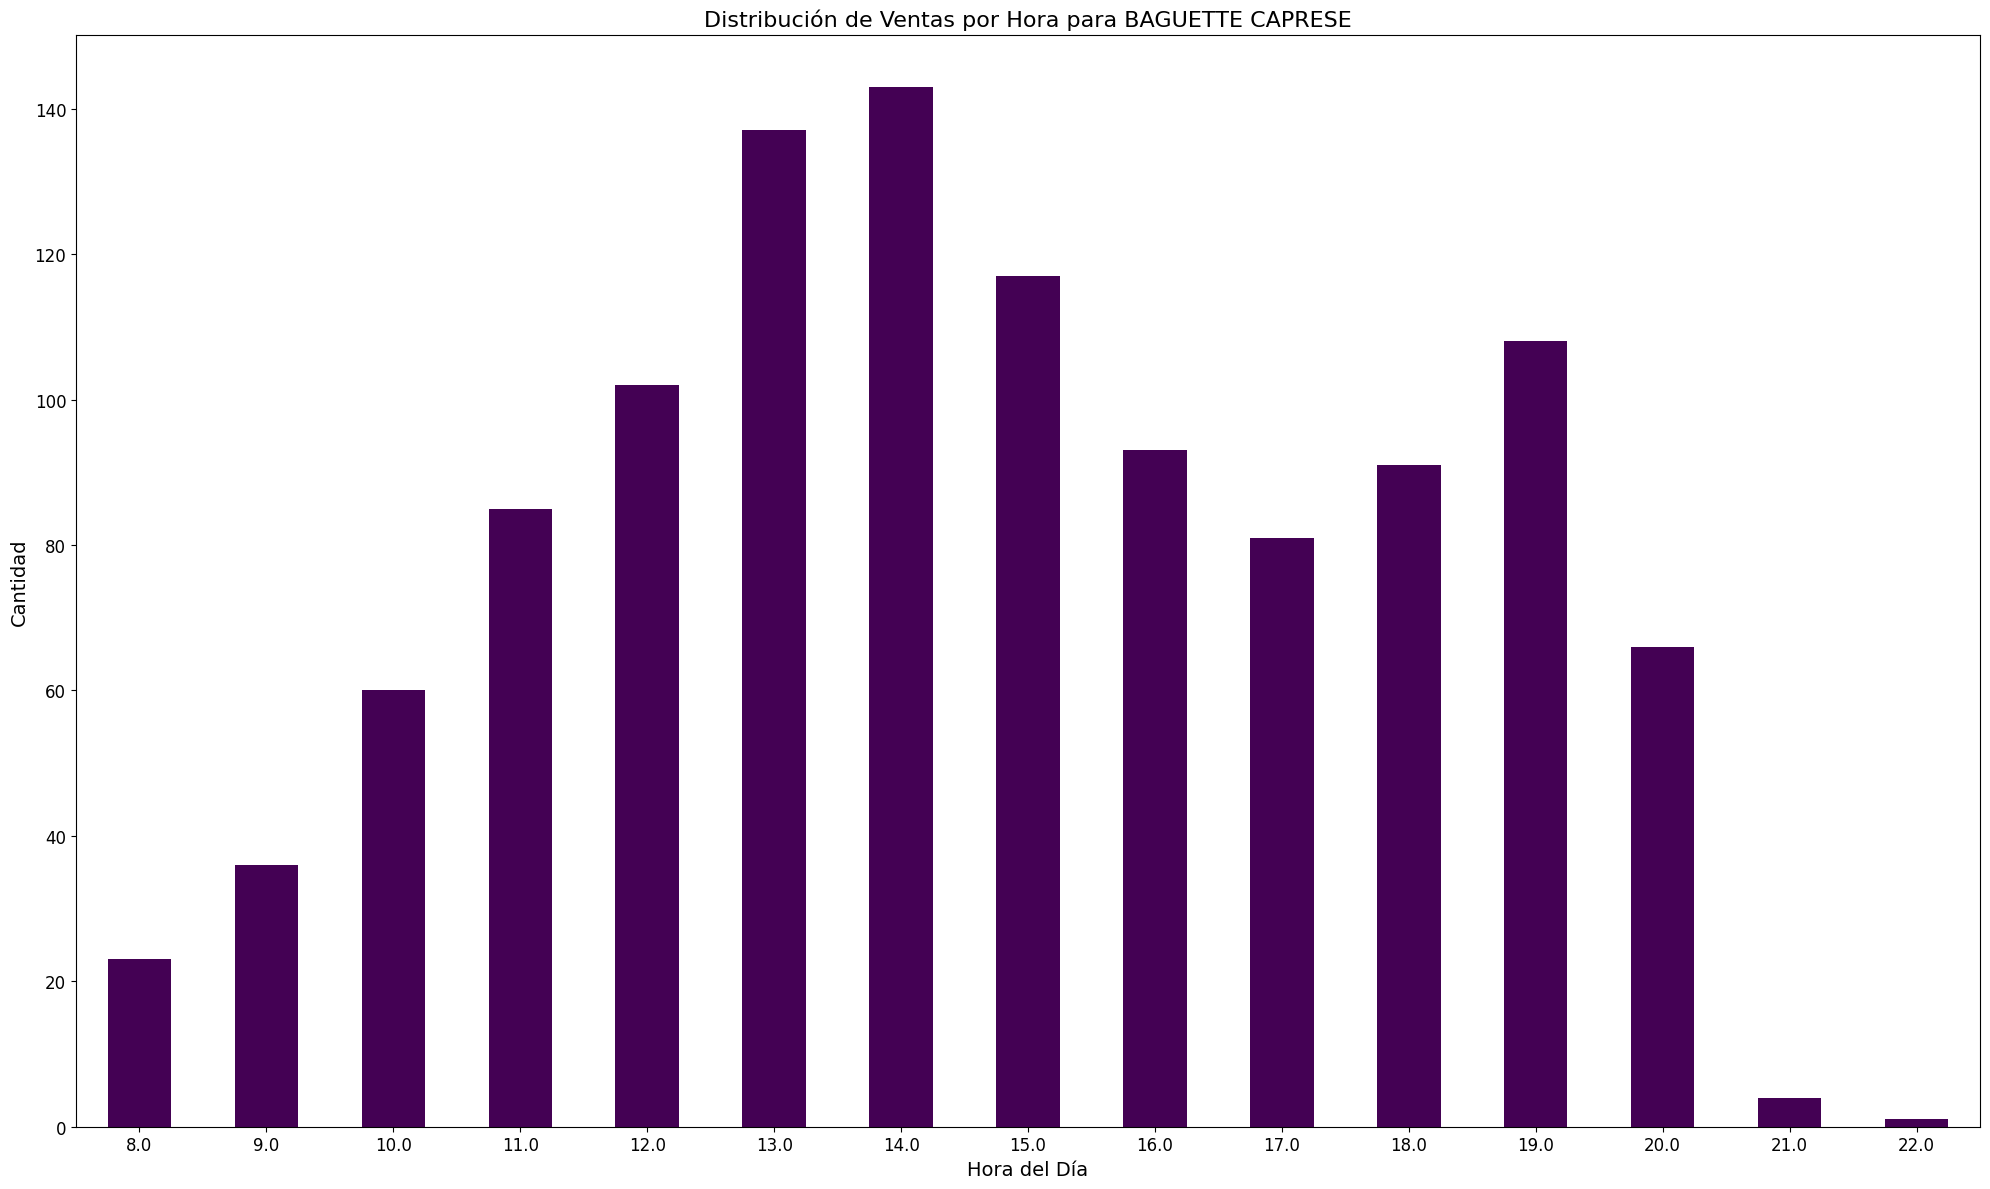

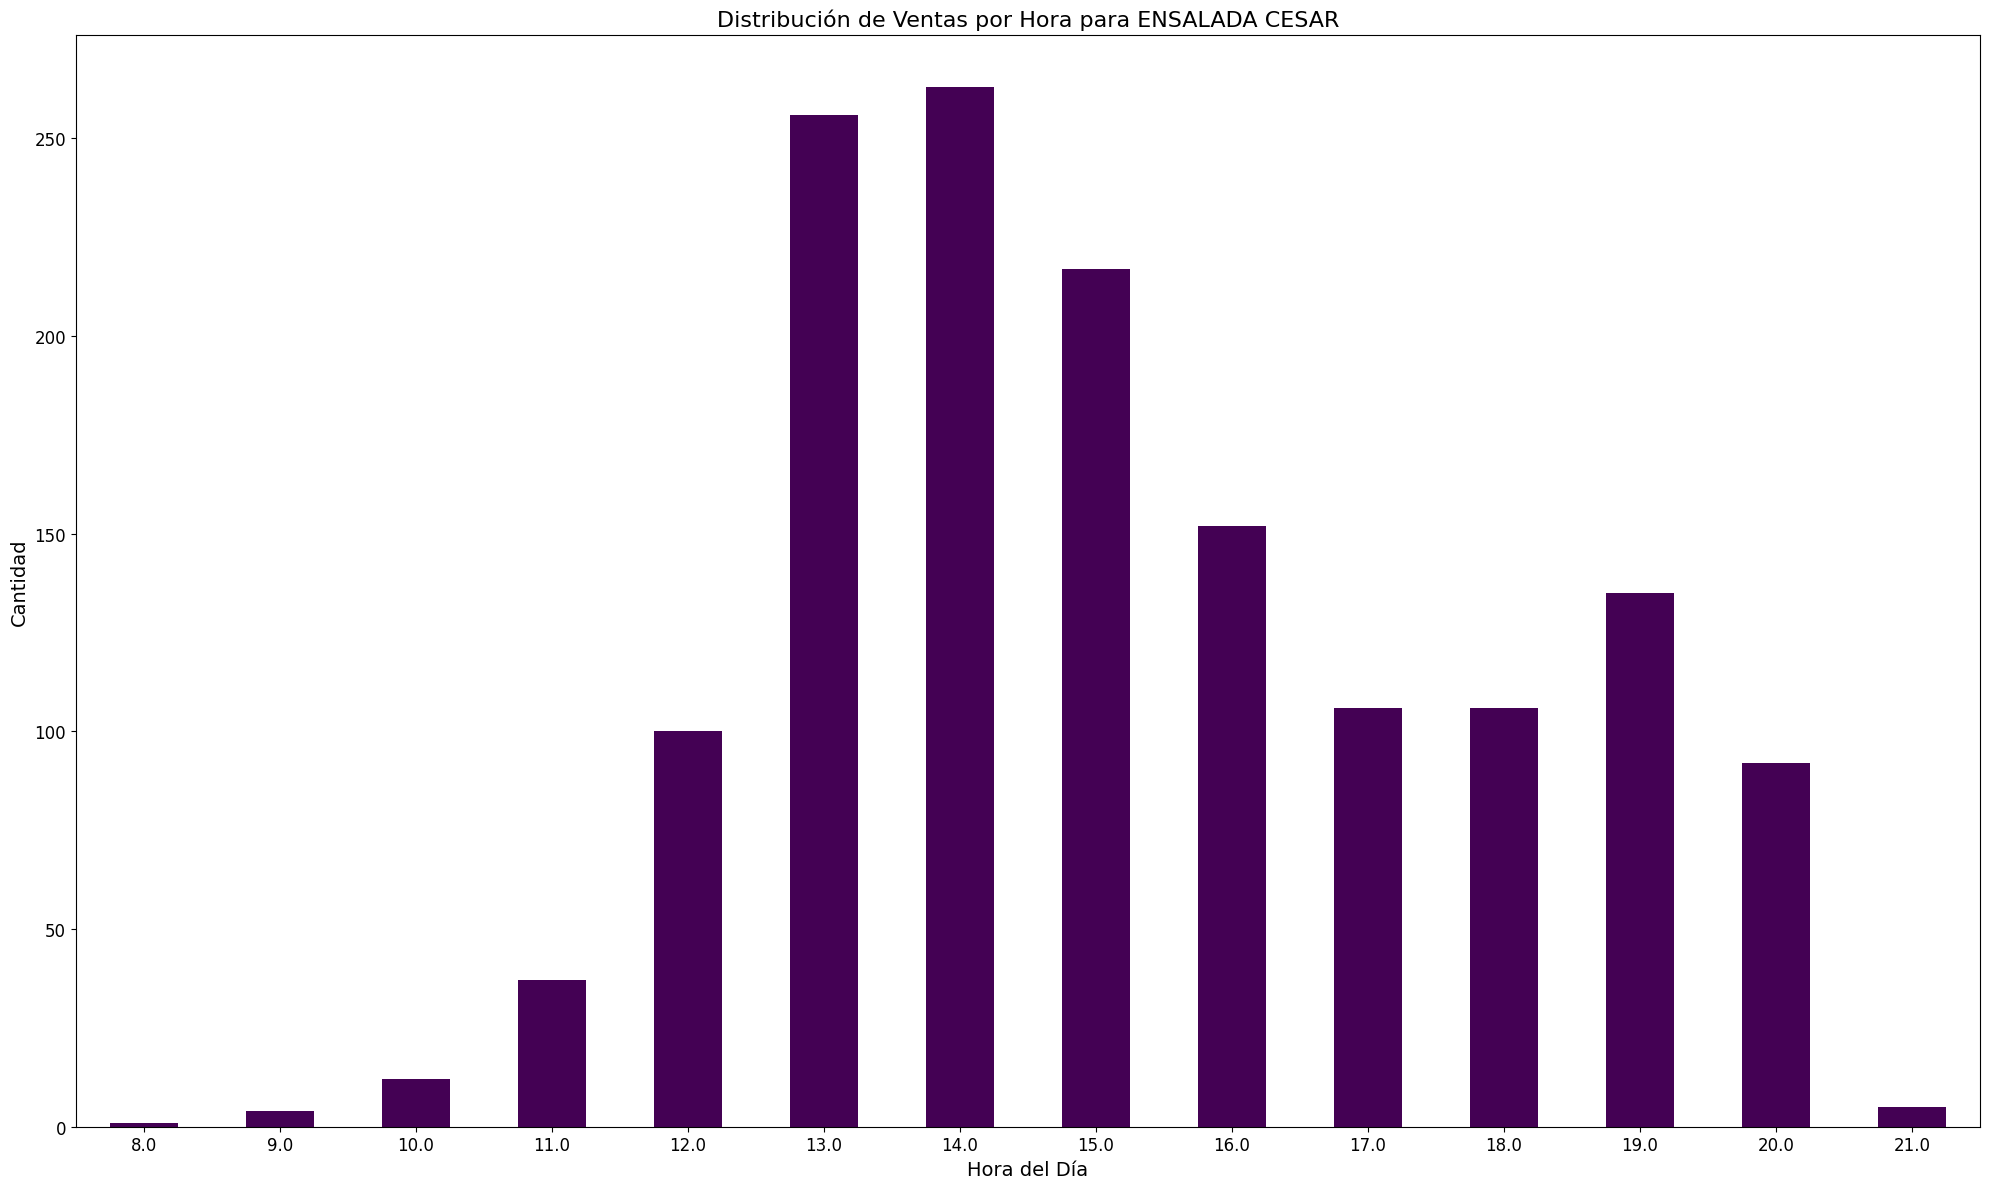

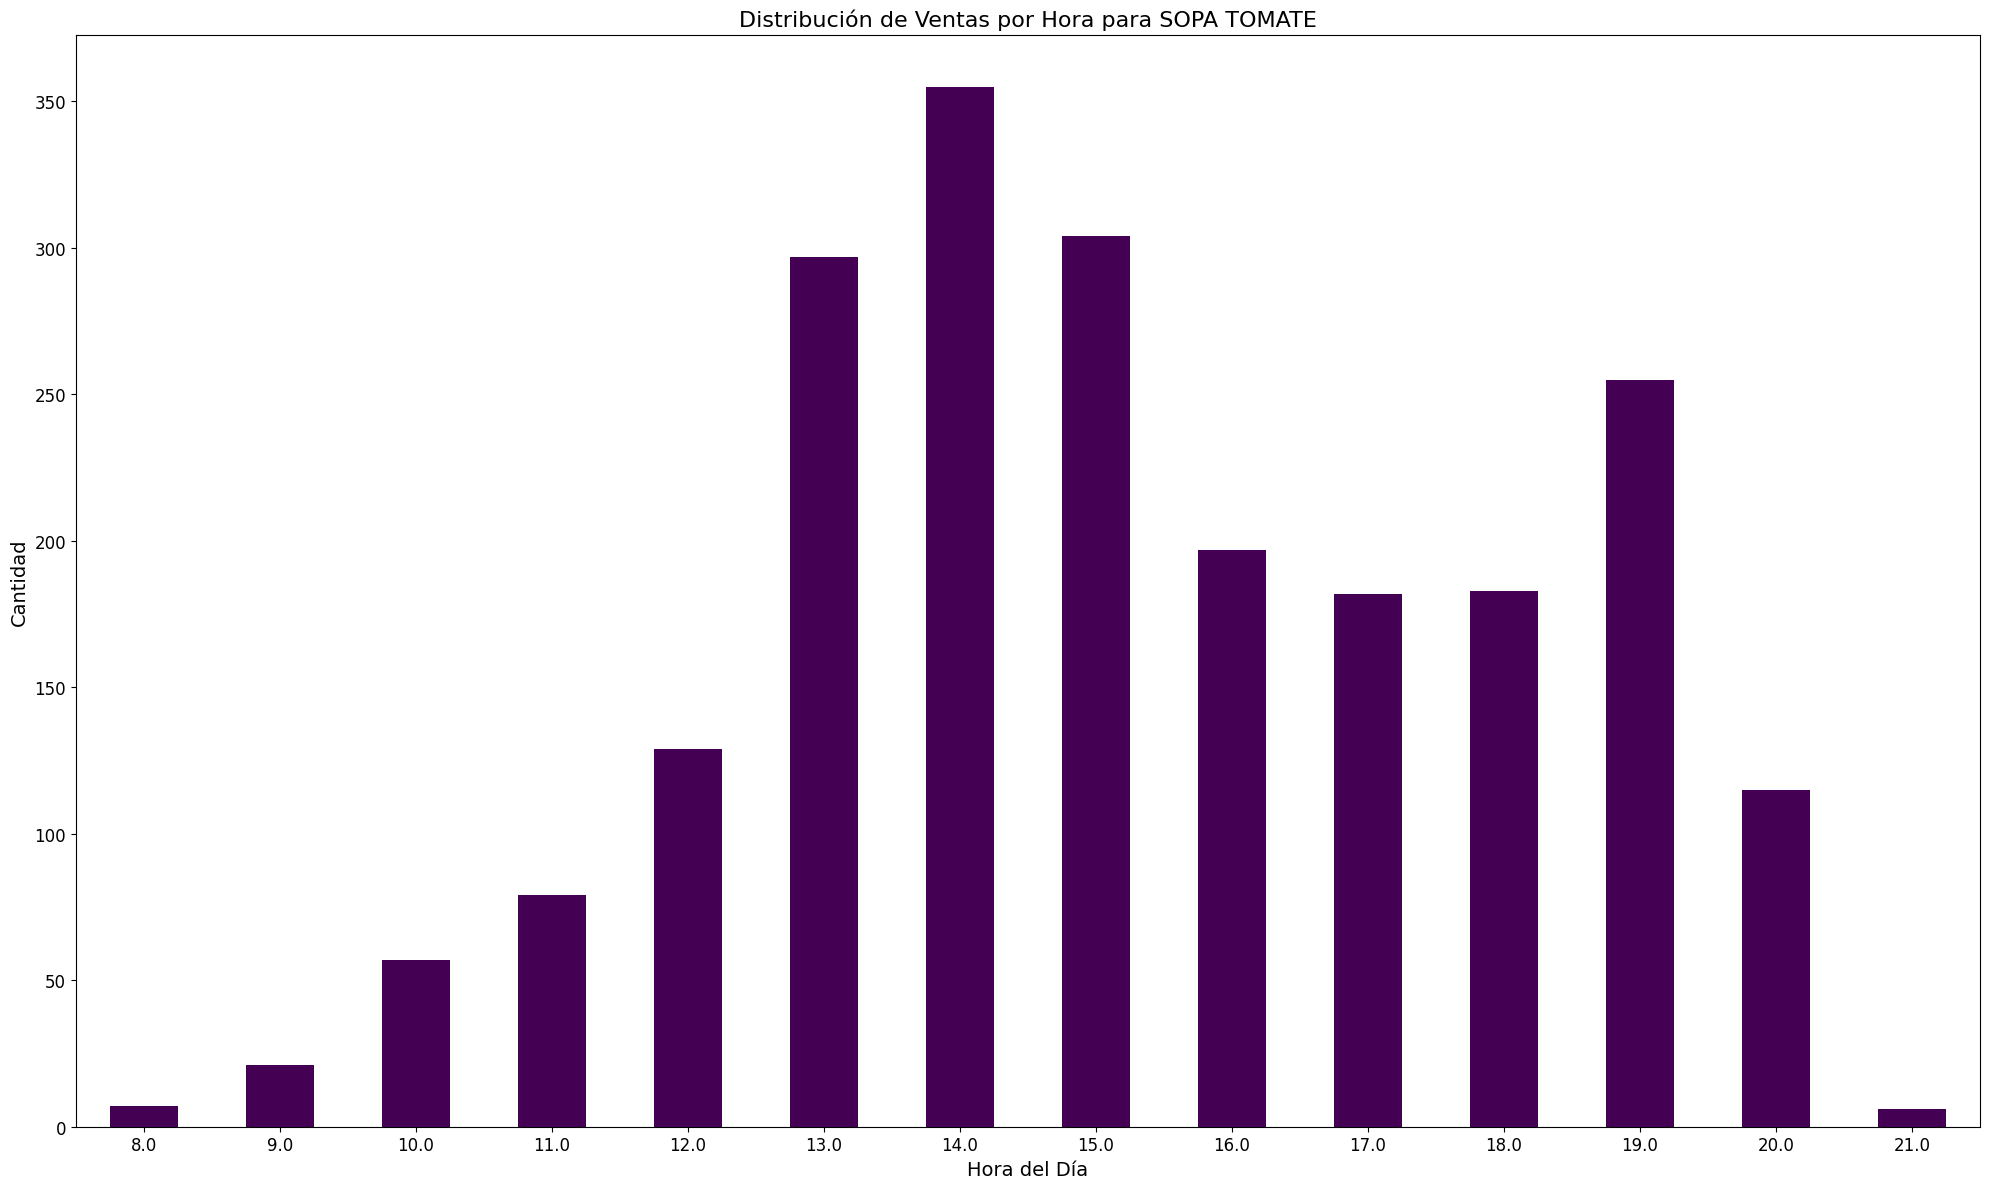

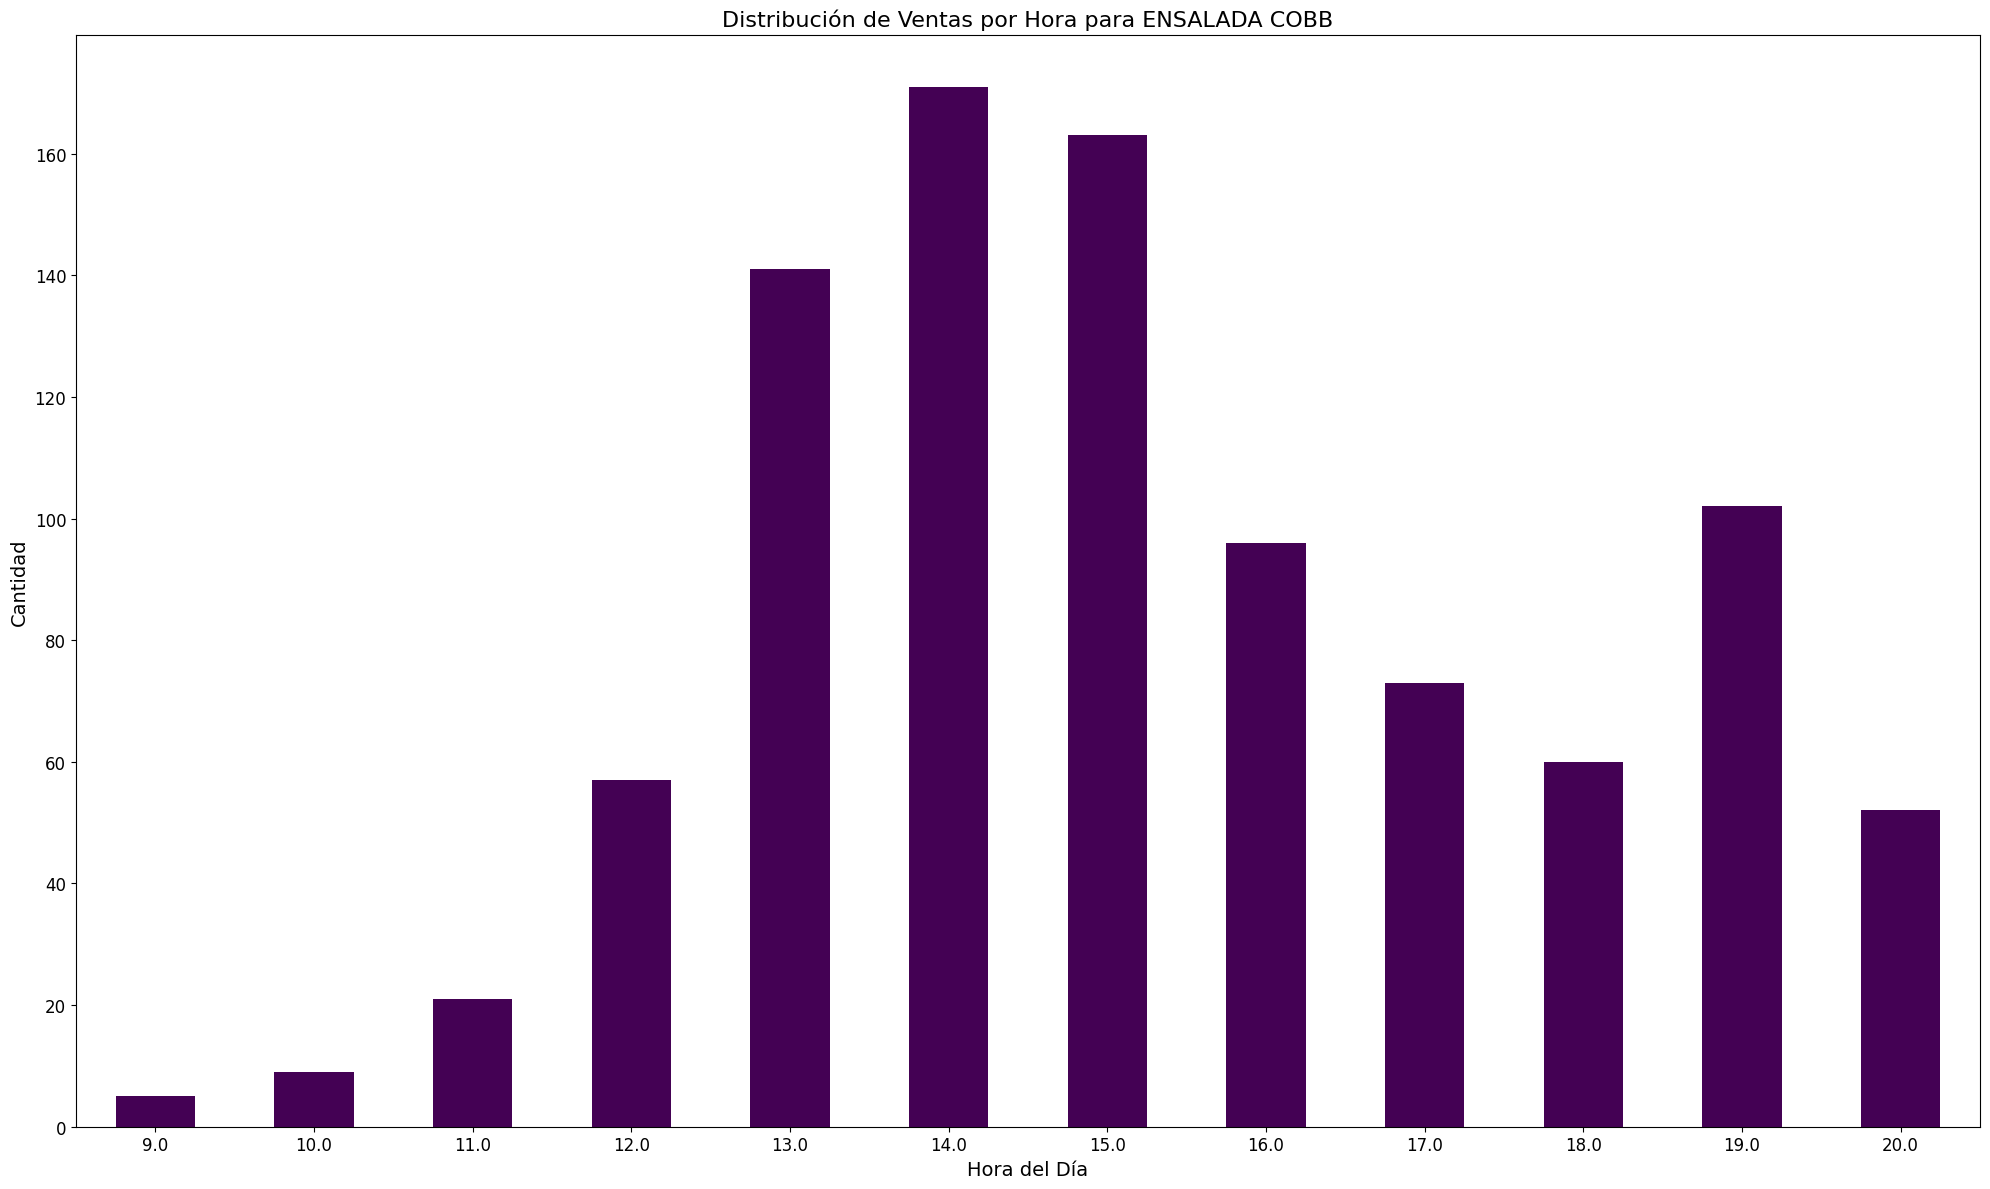

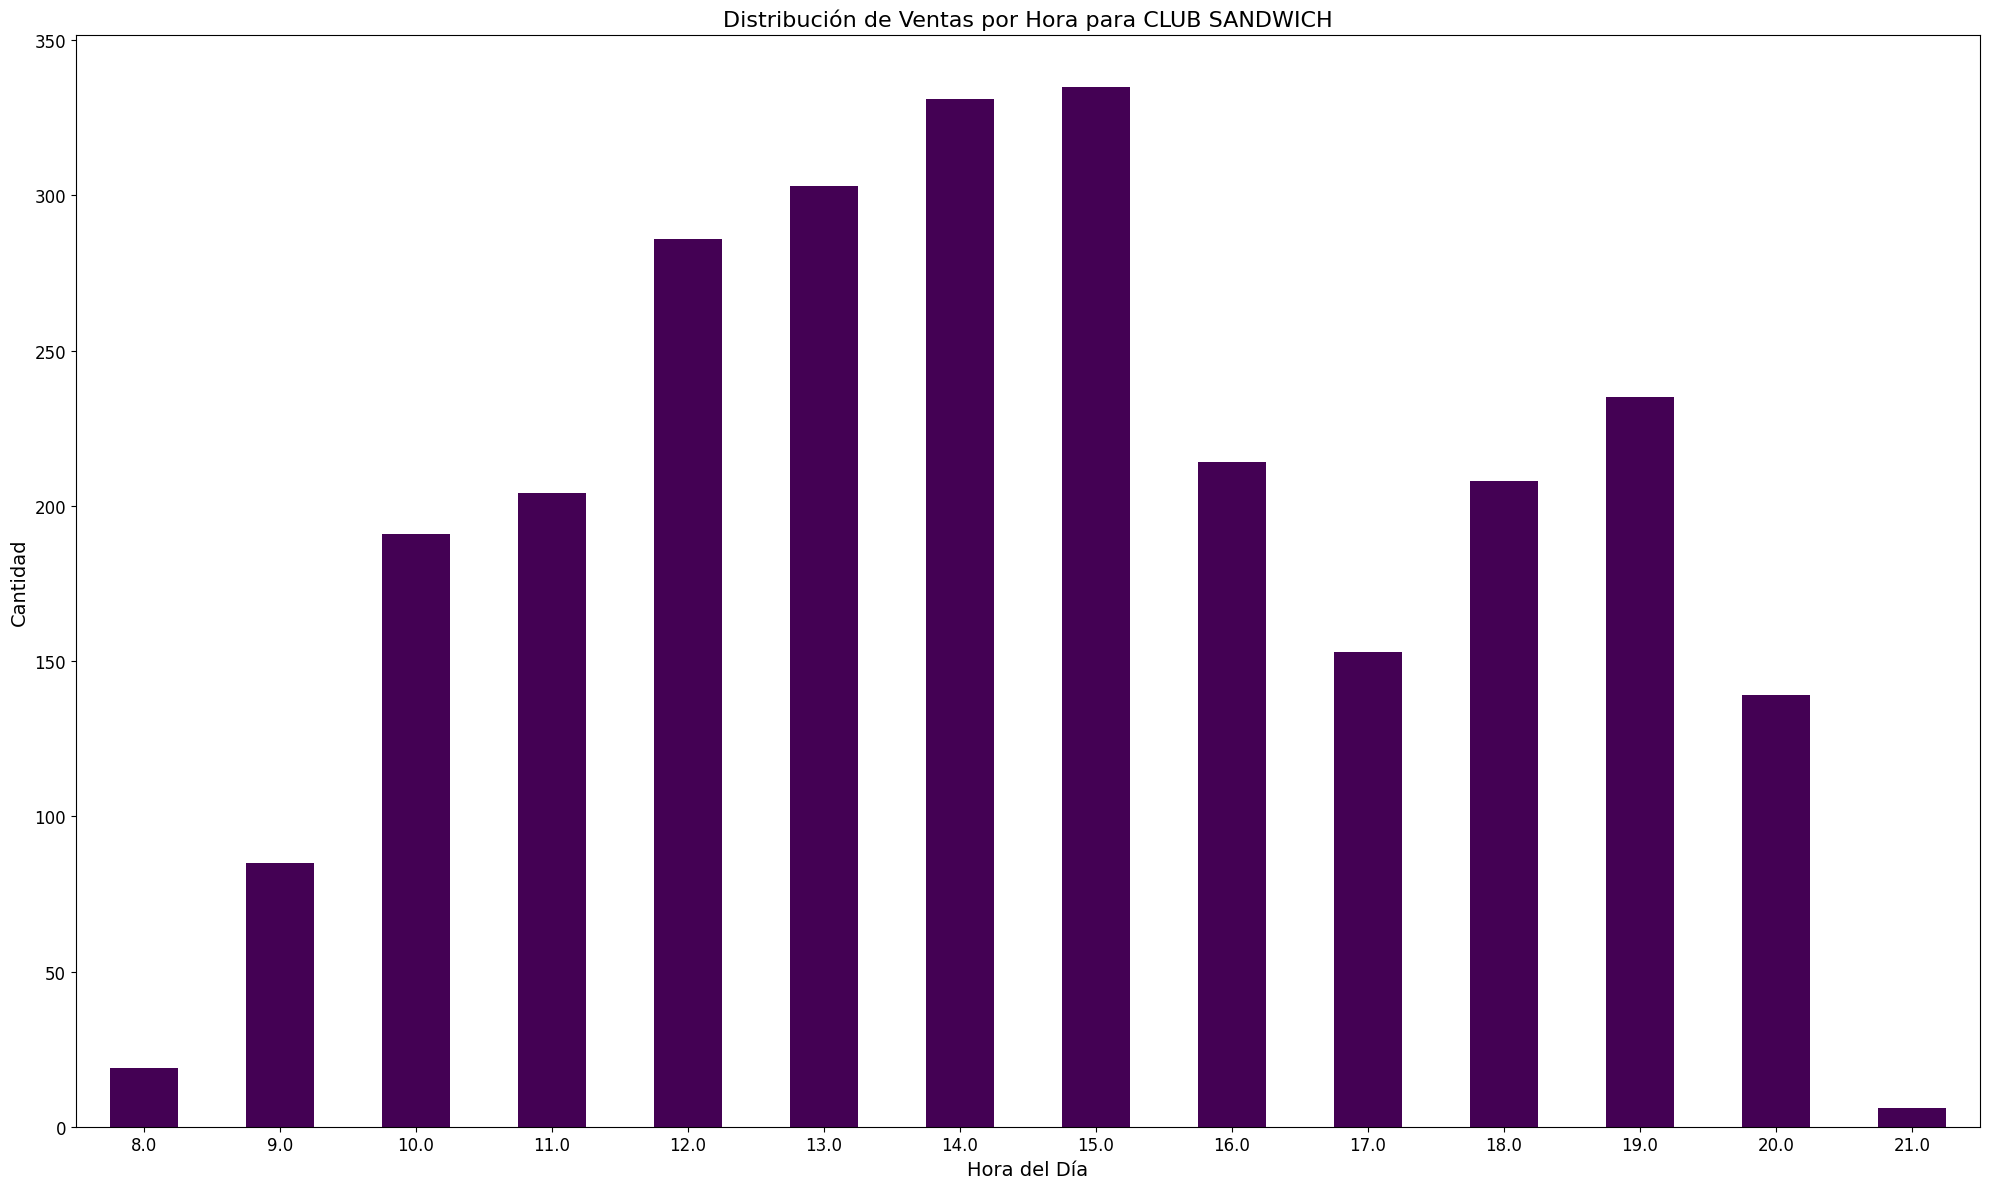

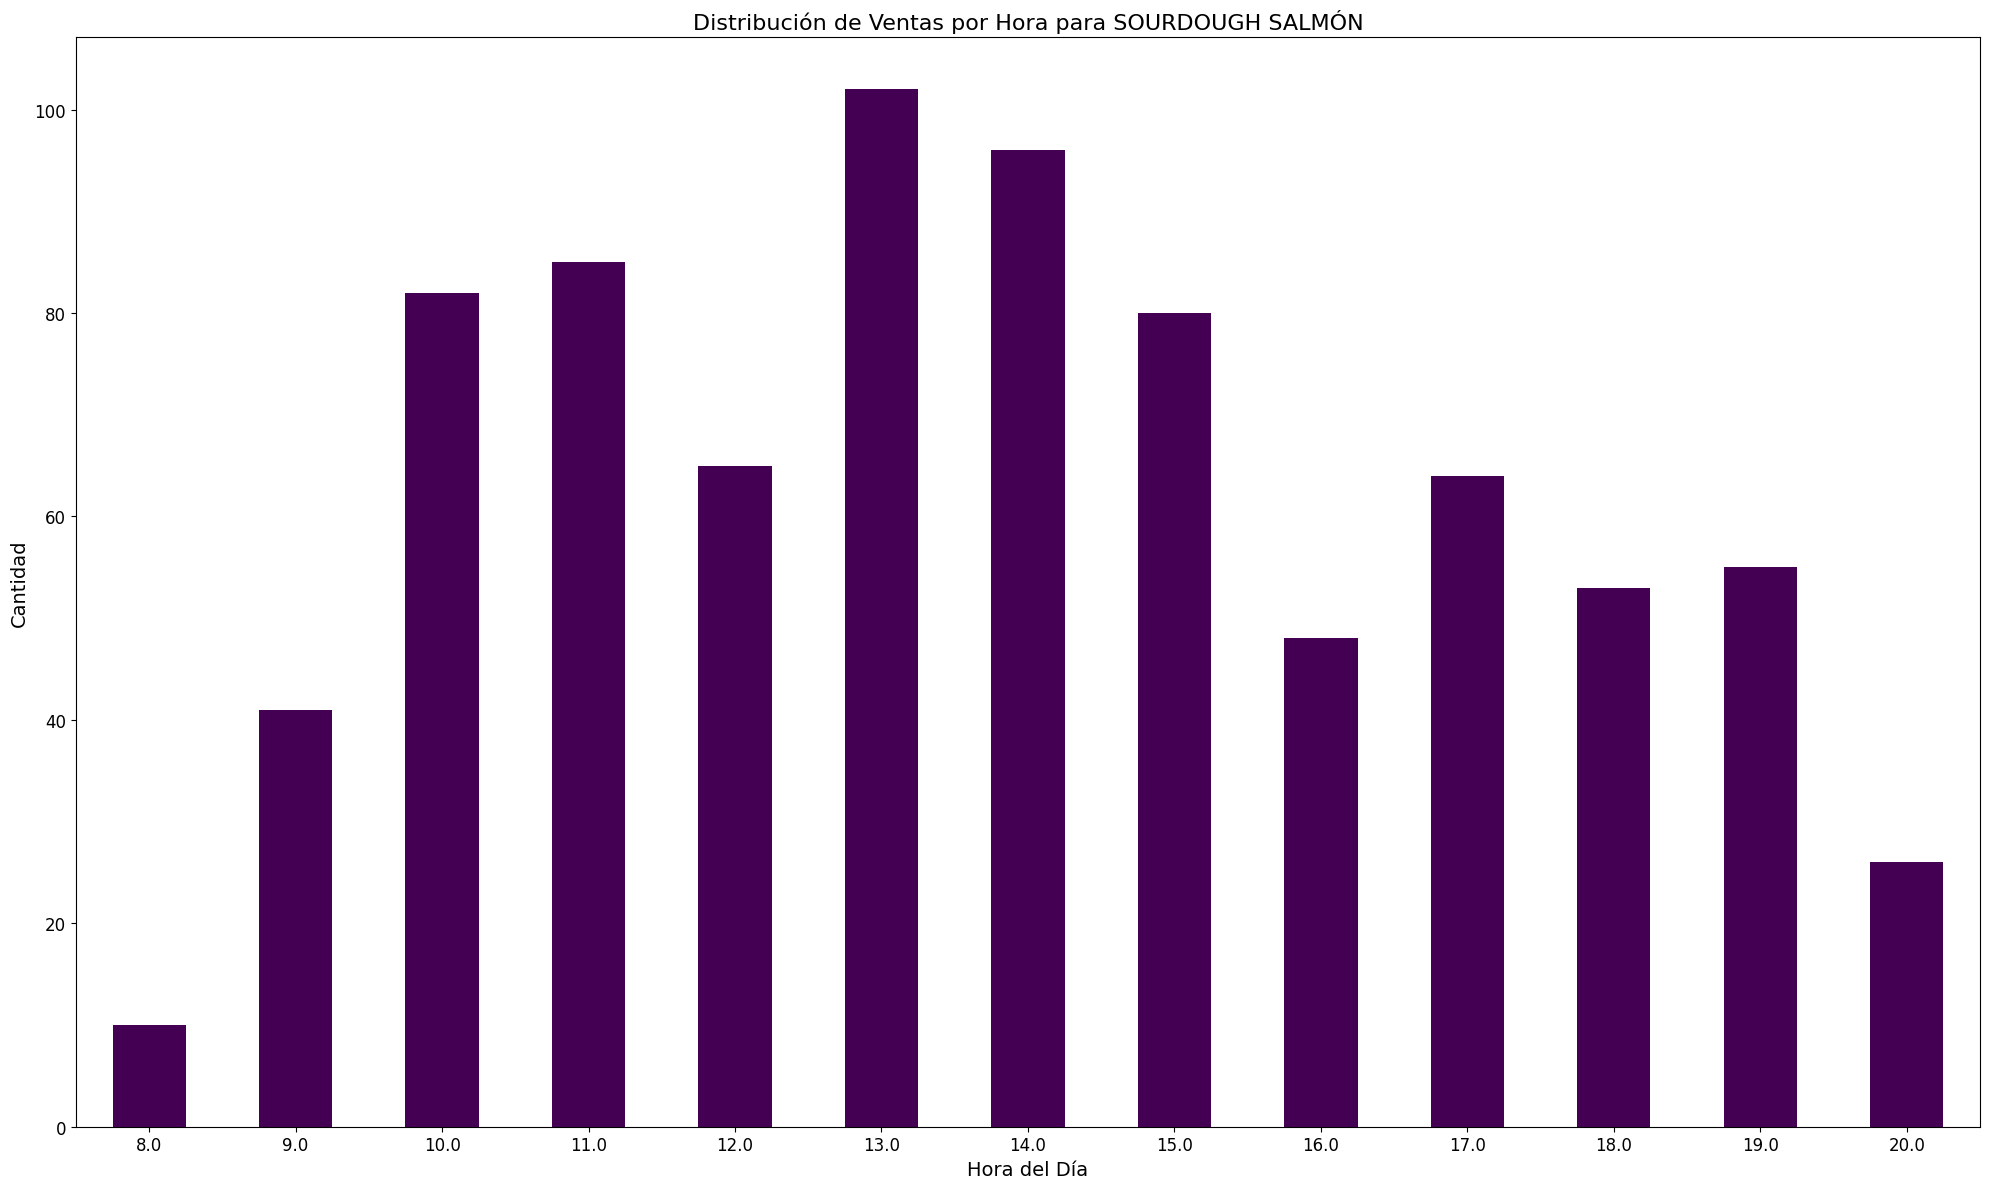

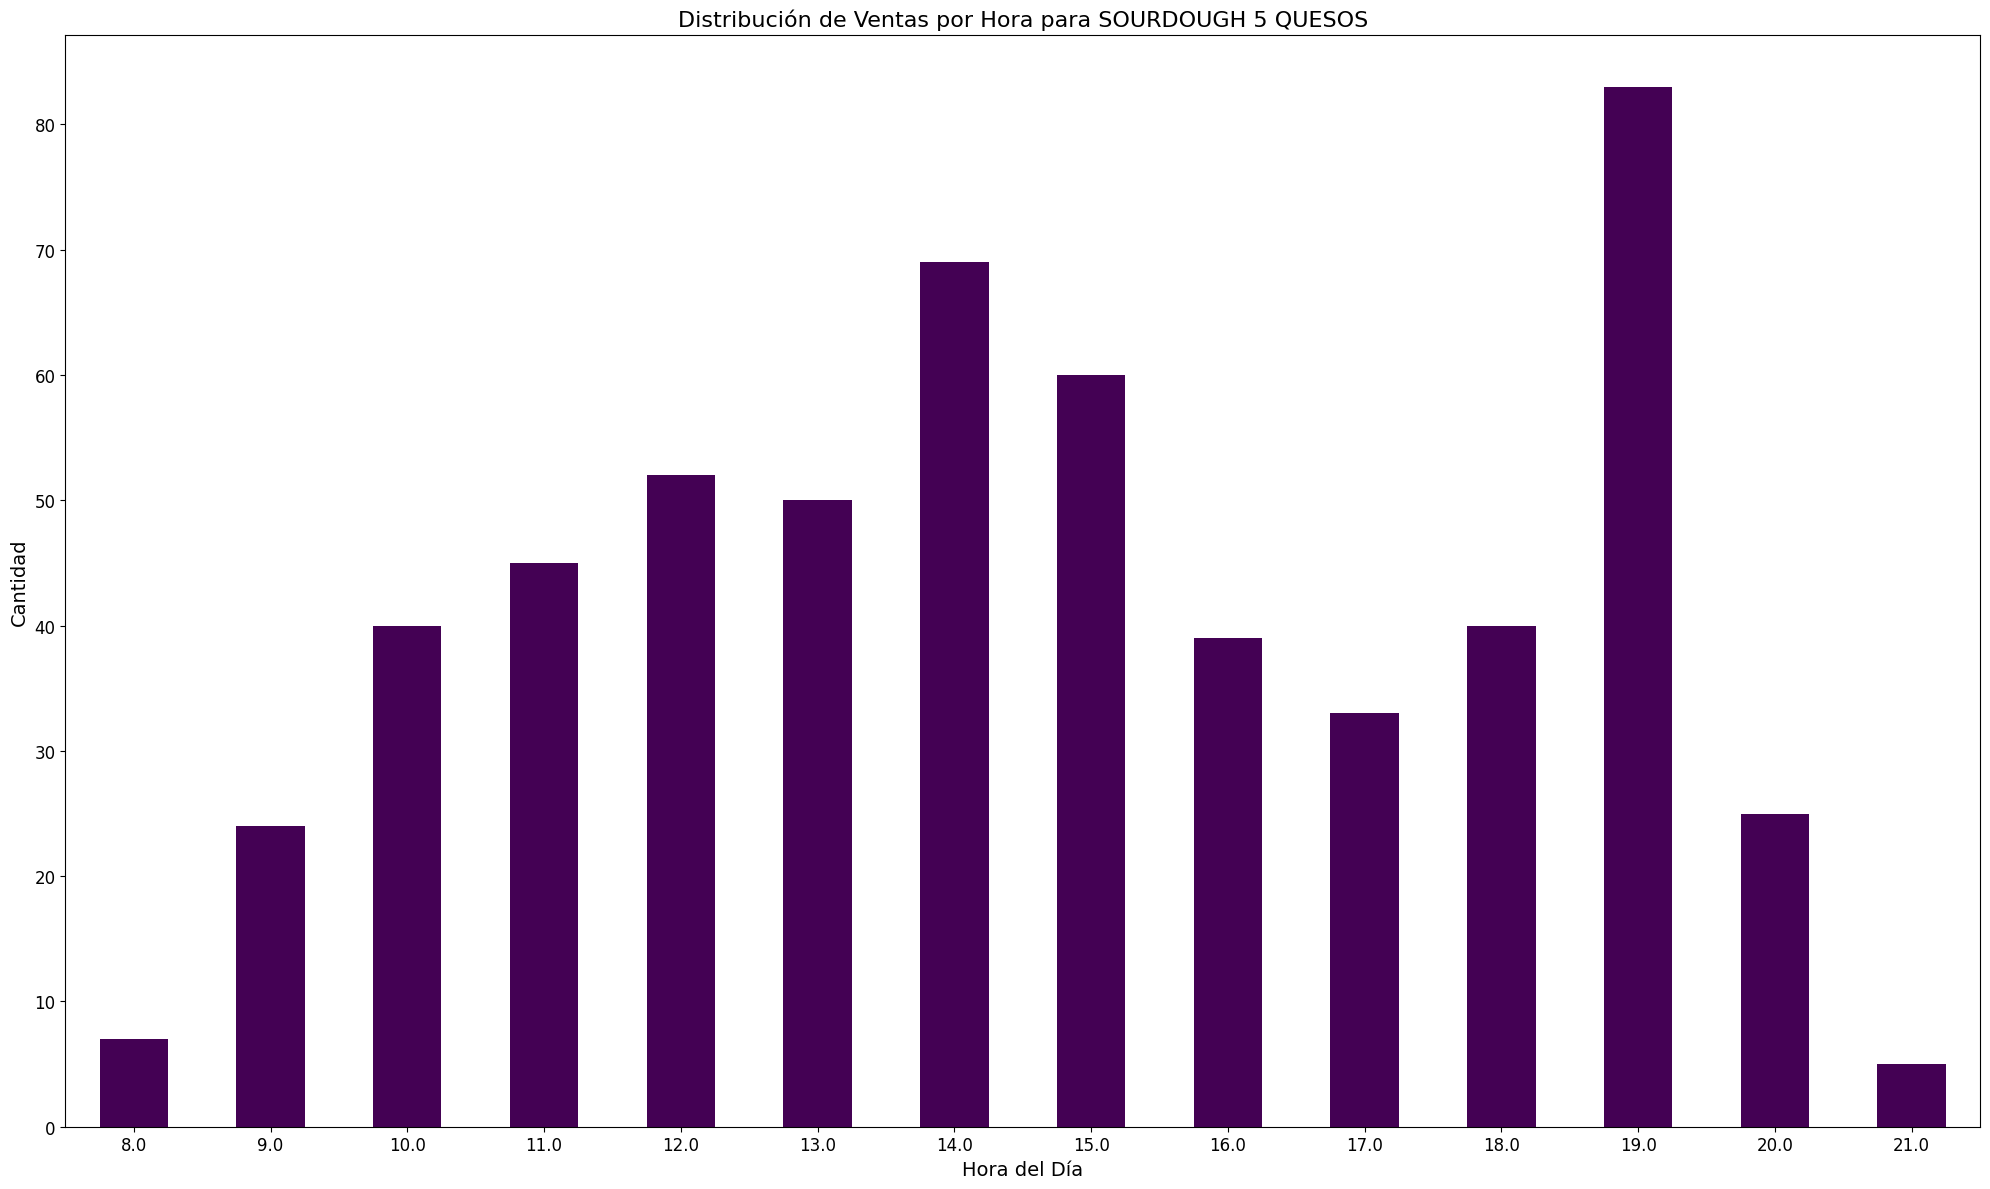

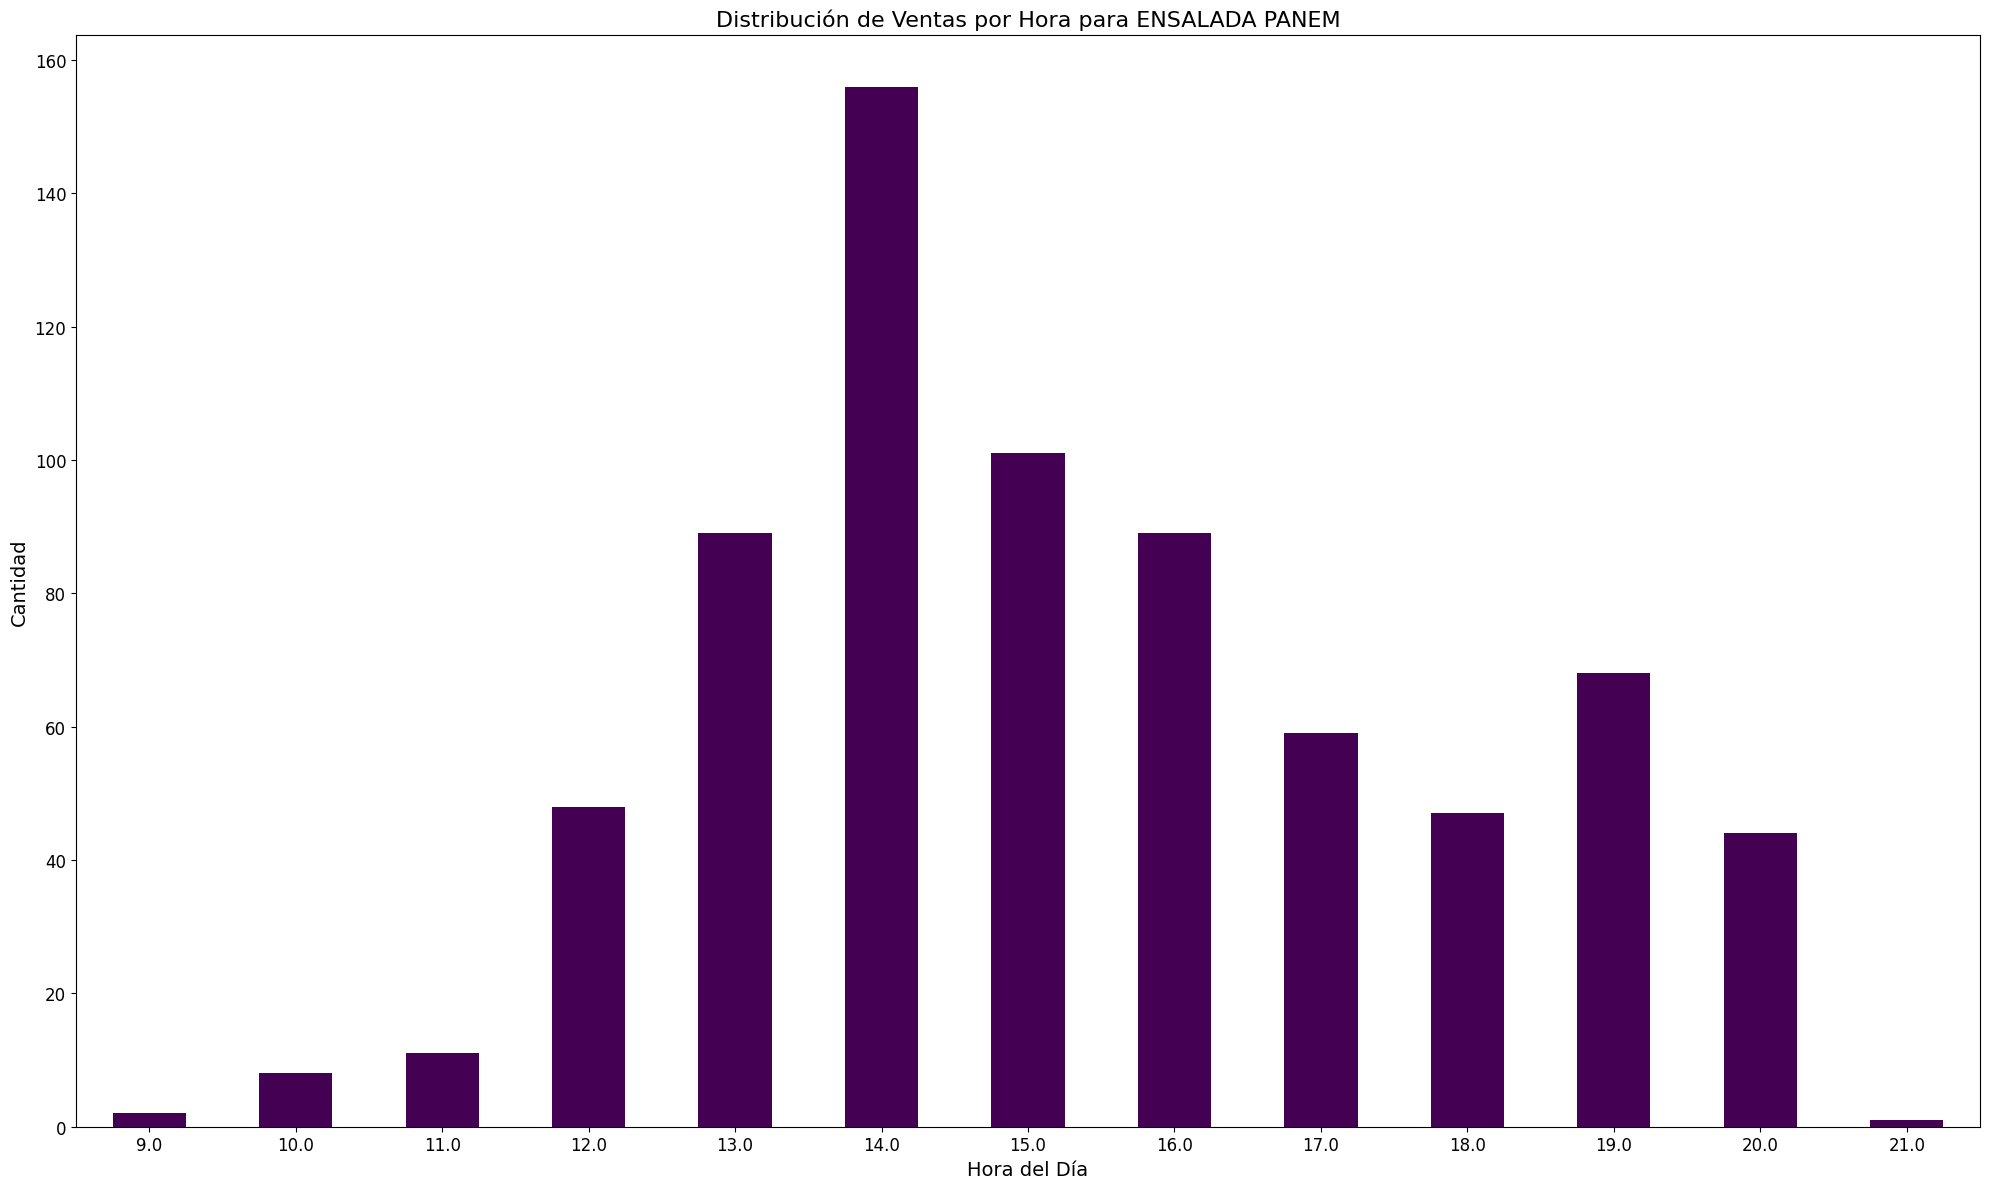

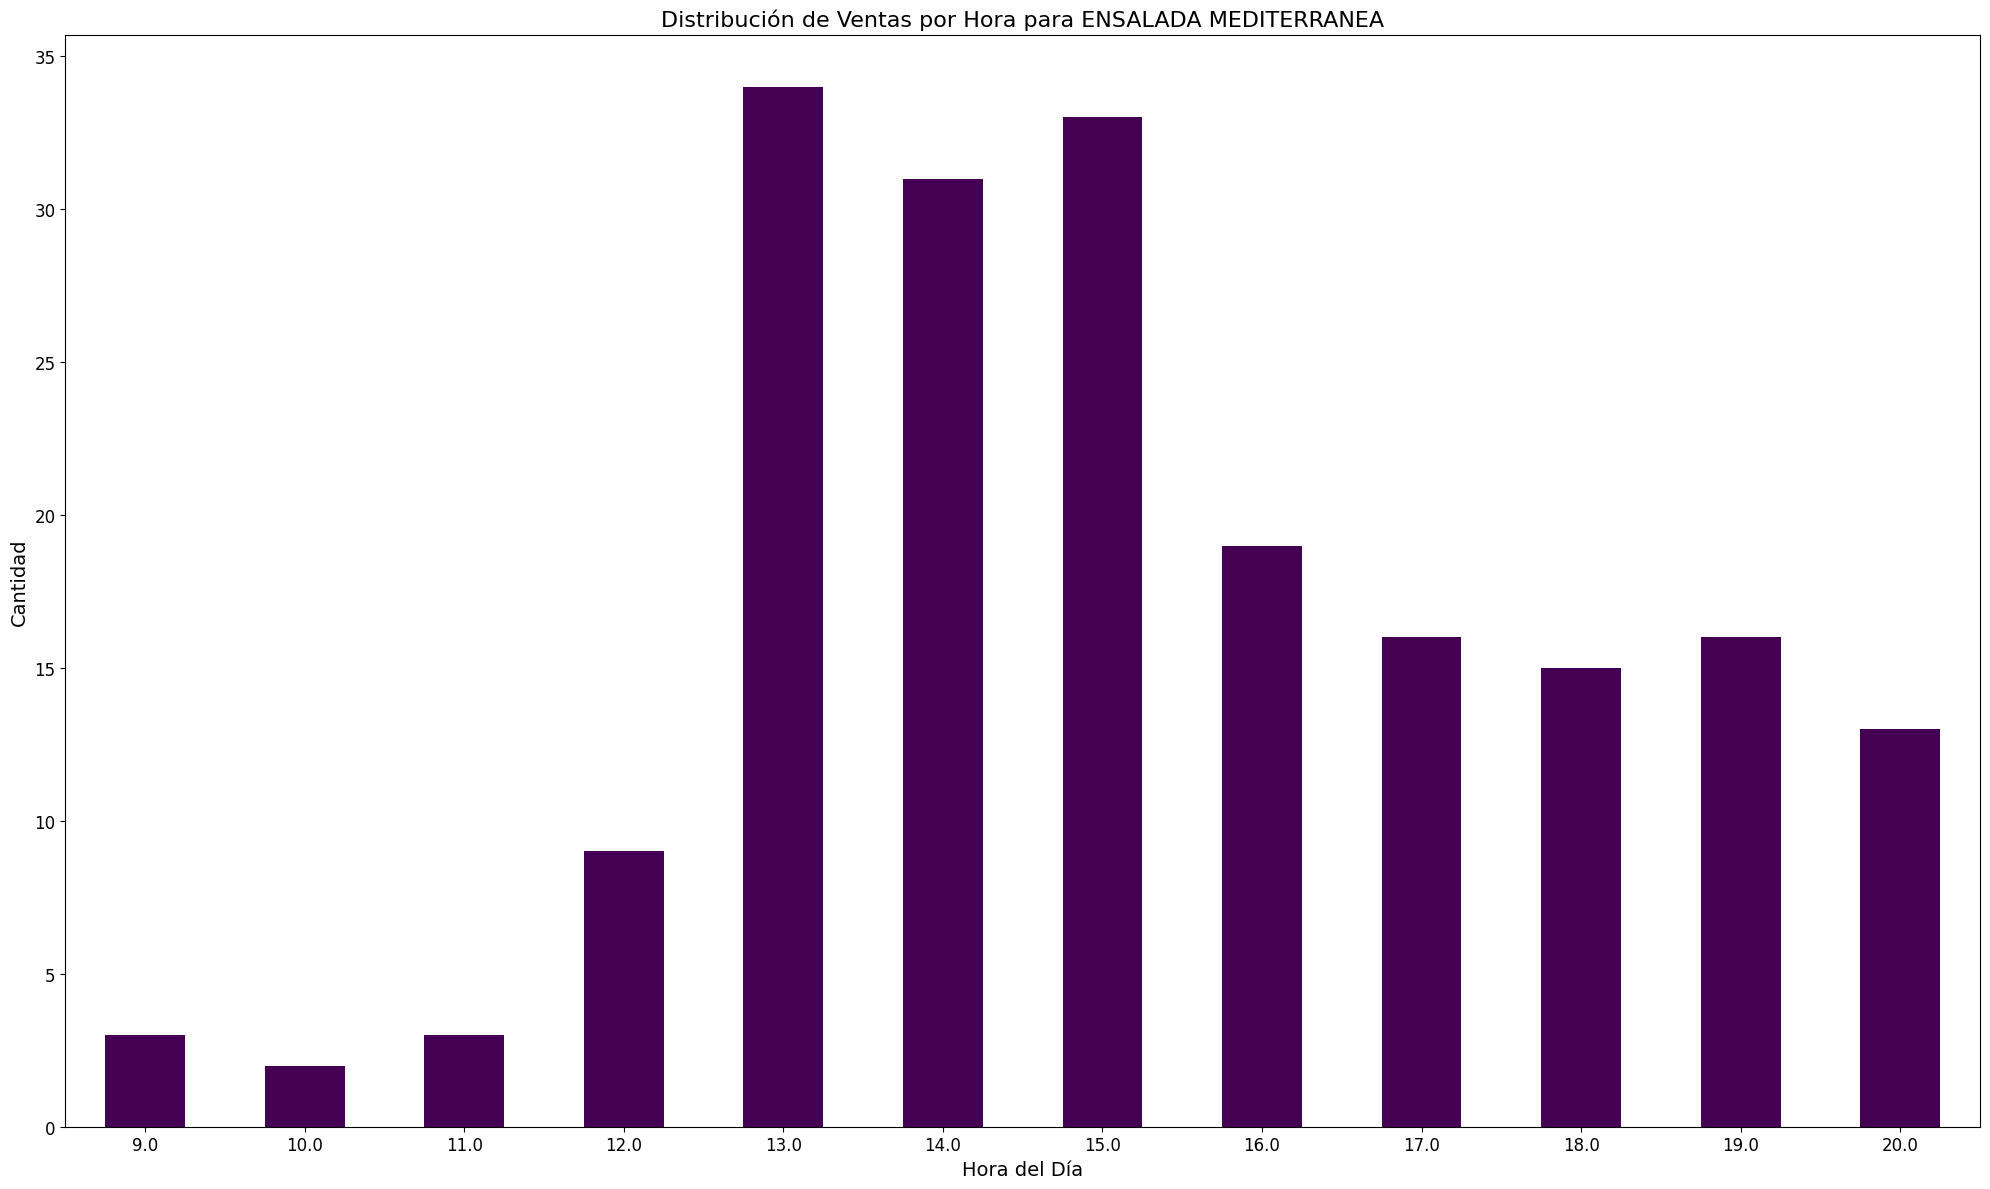

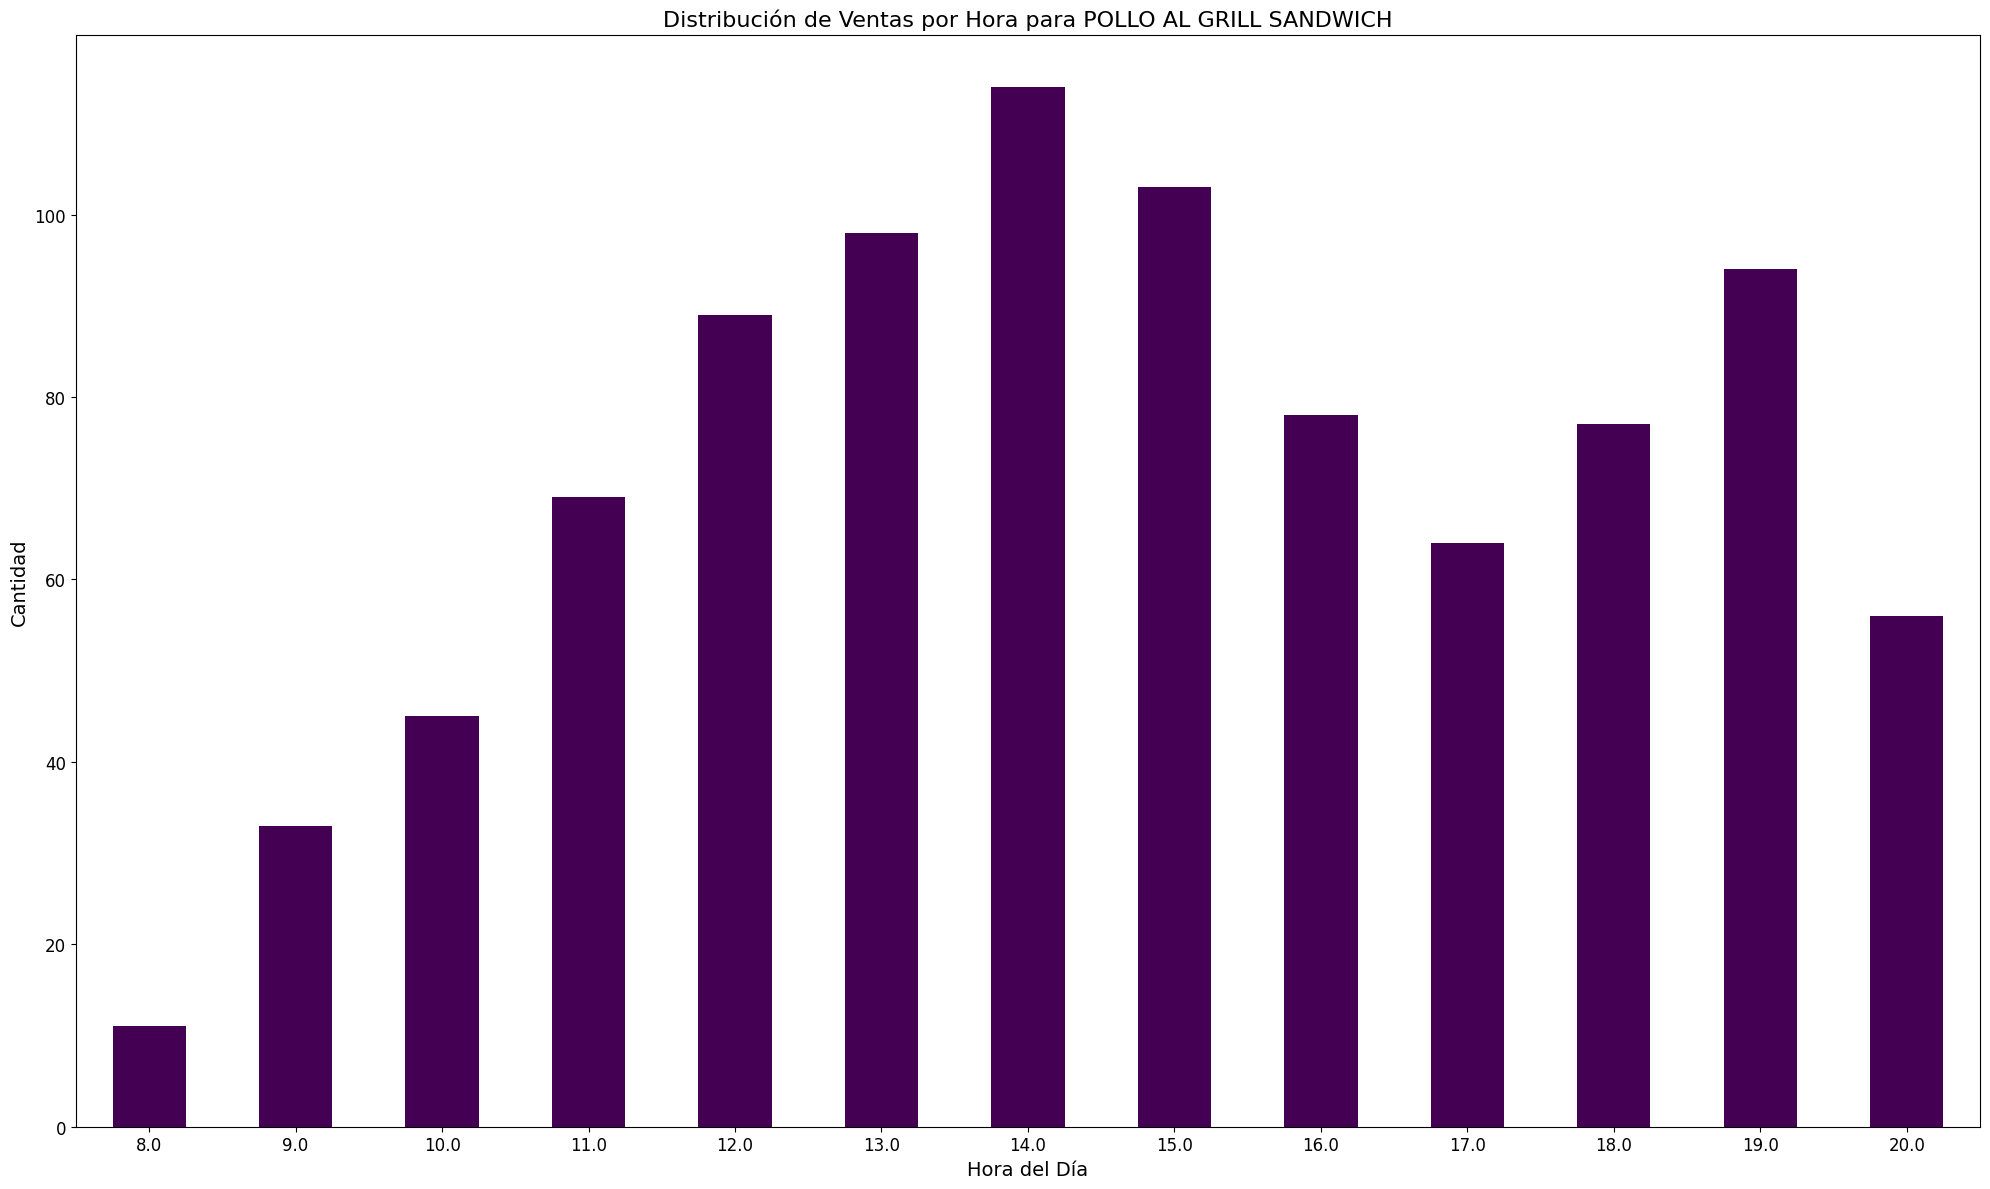

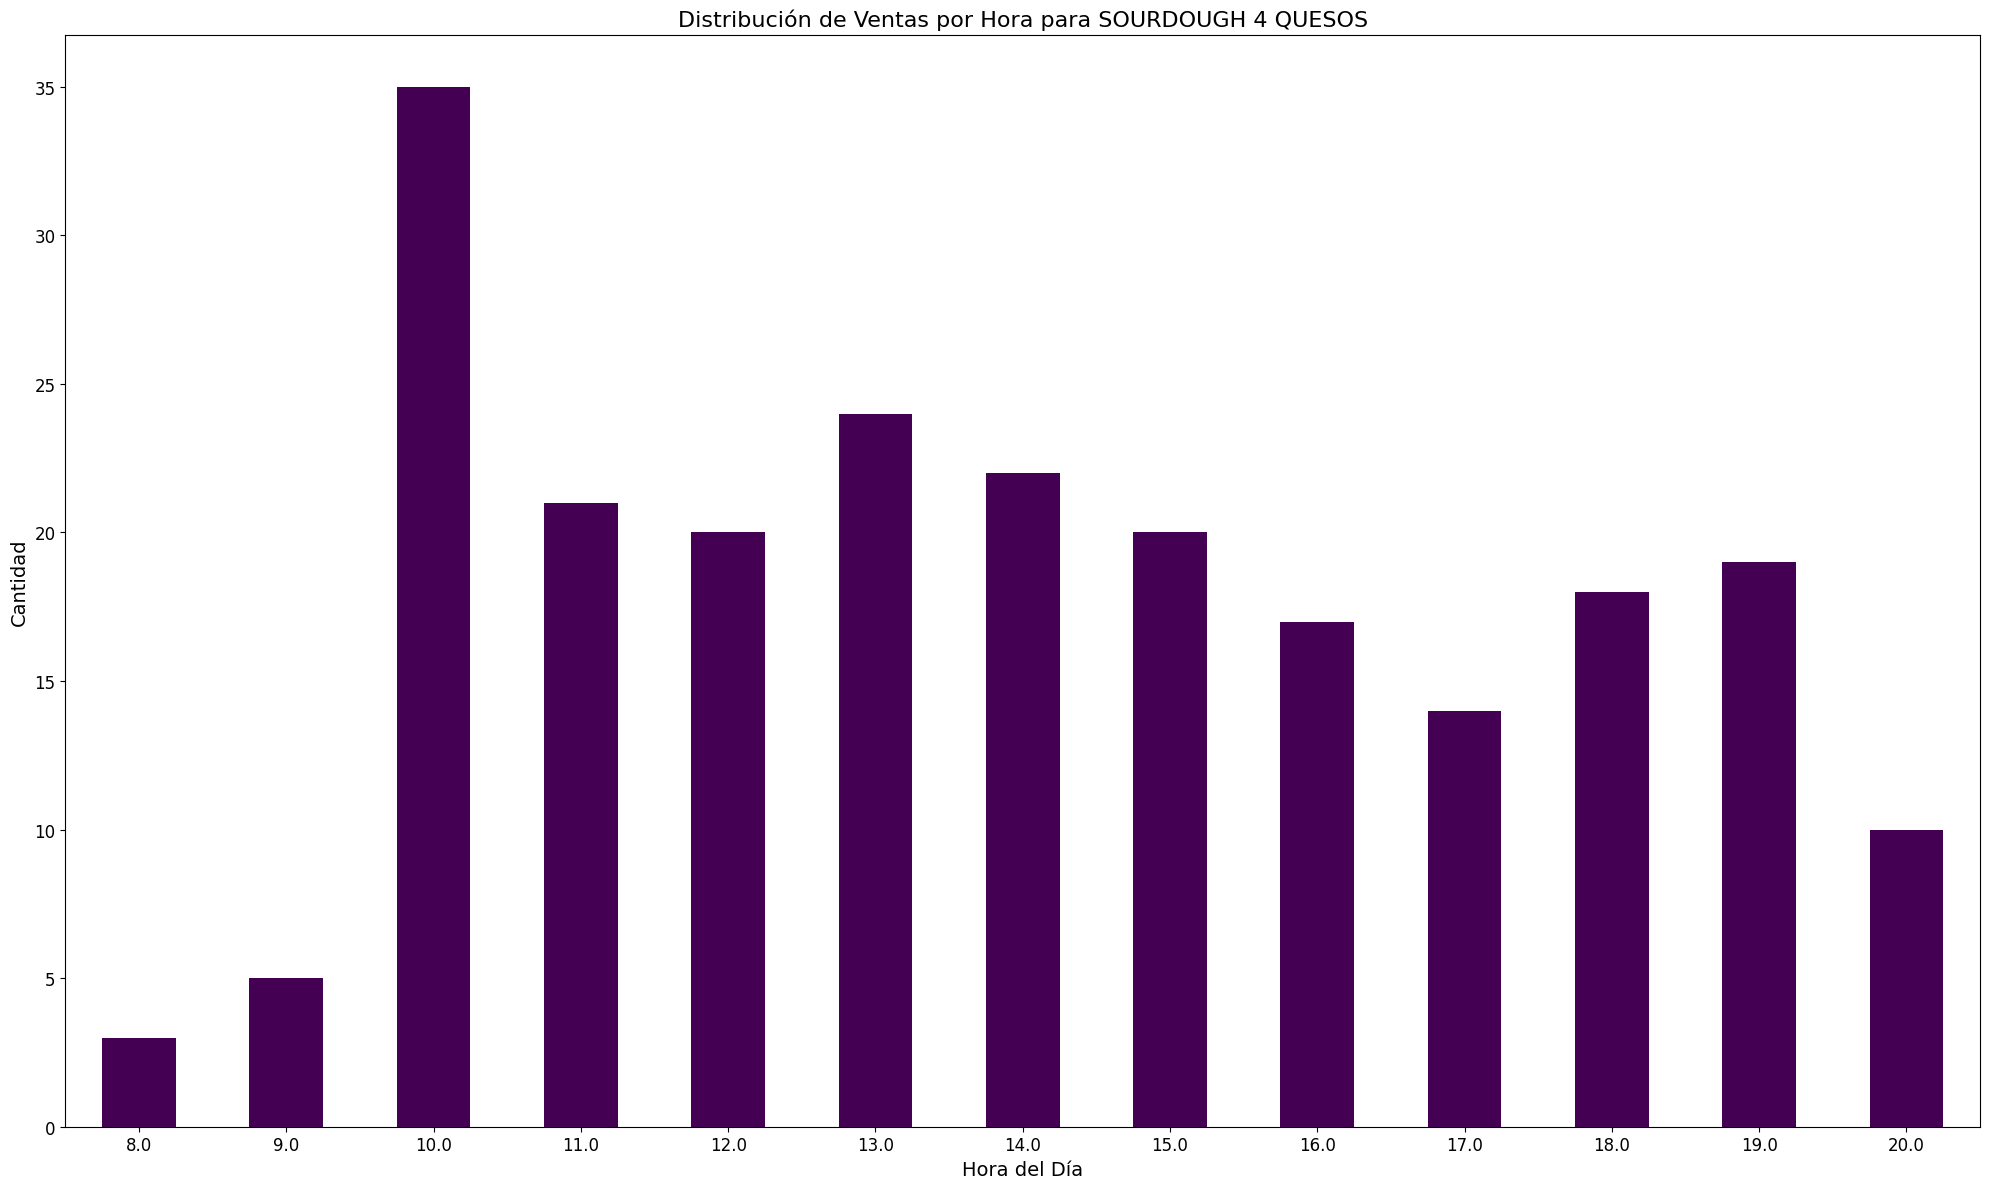

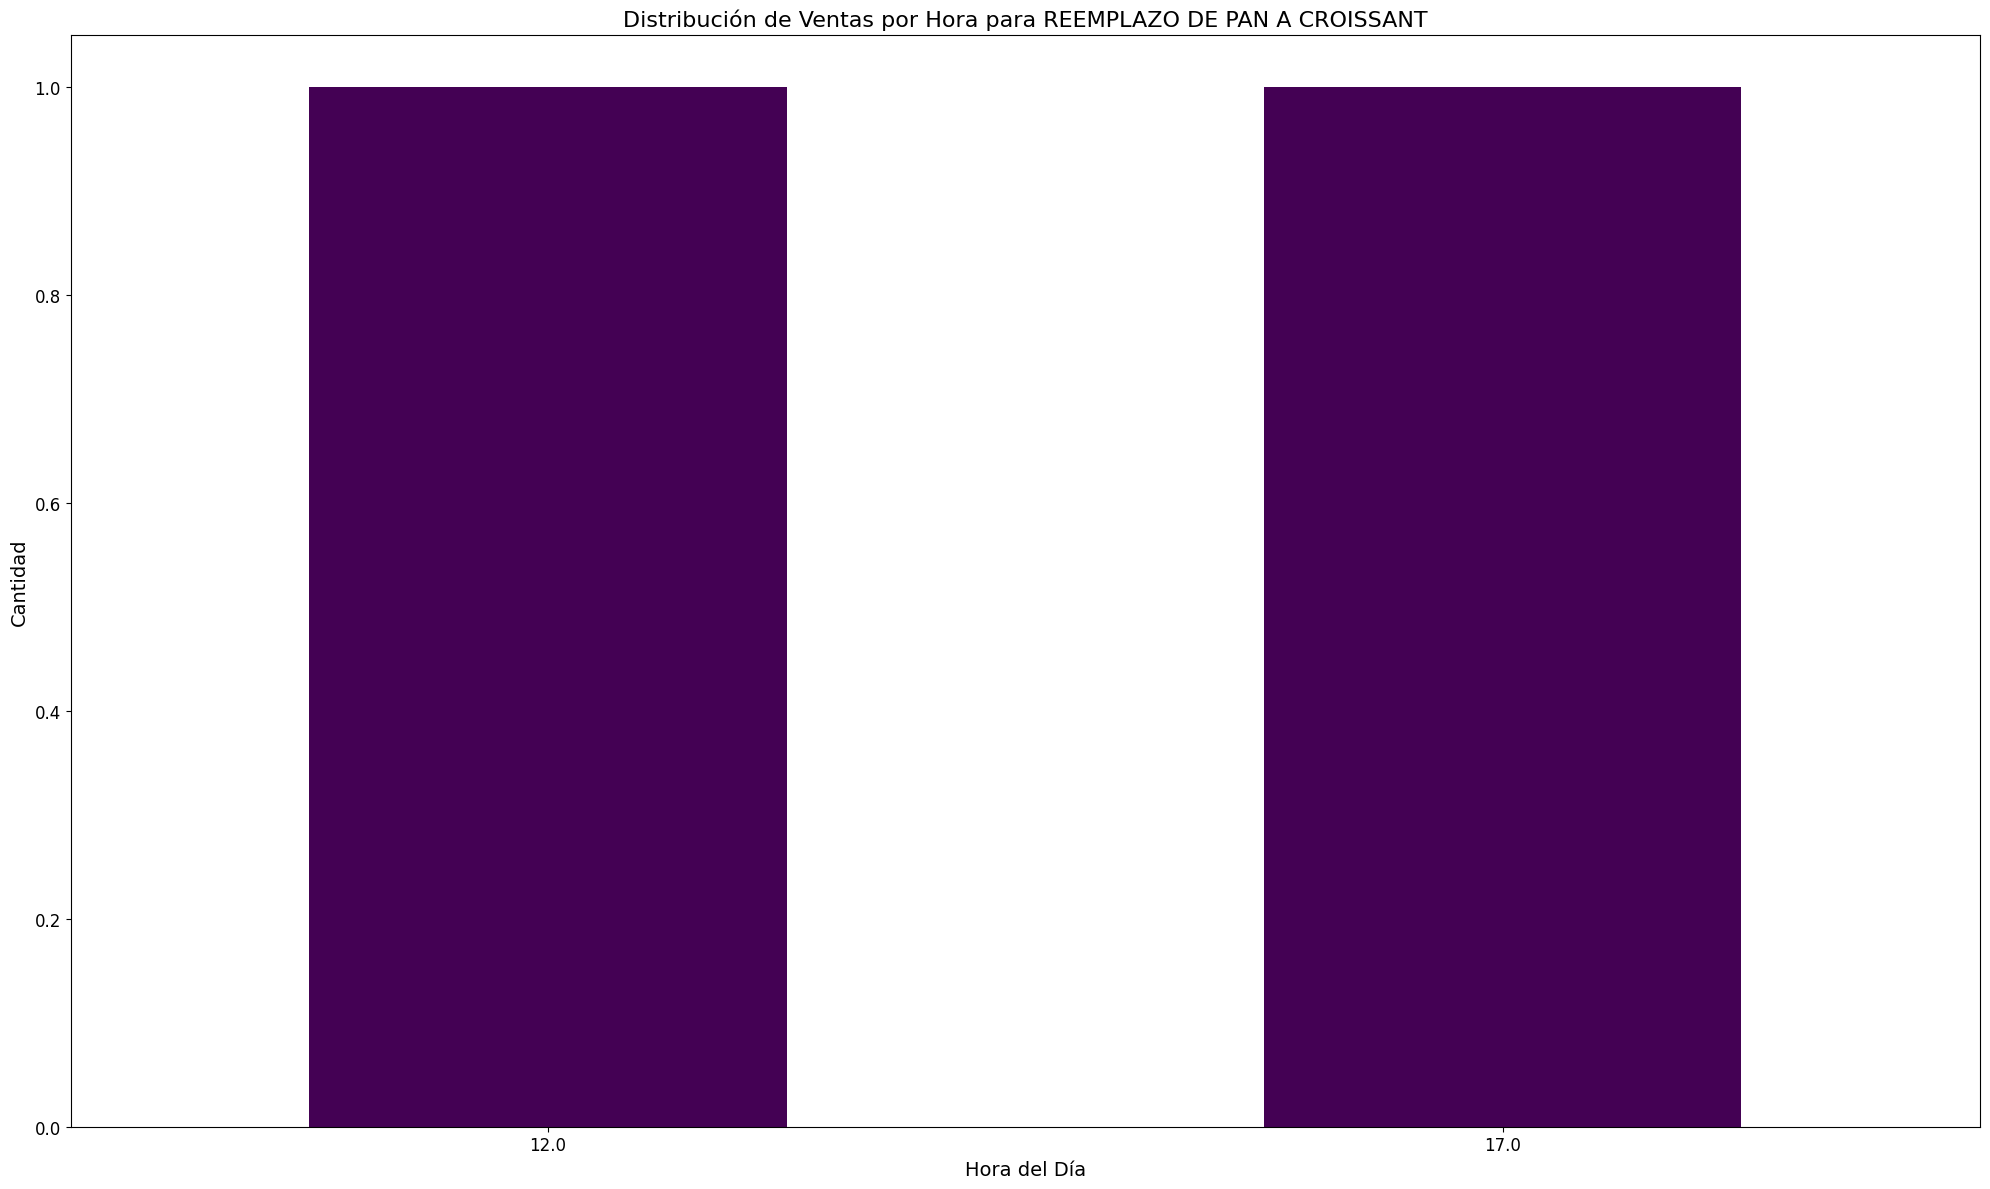

In [118]:
plot_sales_distribution(df_grupo_max_frecu, 'COMIDAS')

C:\Users\34690\AppData\Local\Temp\ipykernel_18400\889813826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['Hora'] = pd.to_datetime(df_grupo['Hora'])
C:\Users\34690\AppData\Local\Temp\ipykernel_18400\889813826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['hora_del_dia'] = df_grupo['Hora'].dt.hour


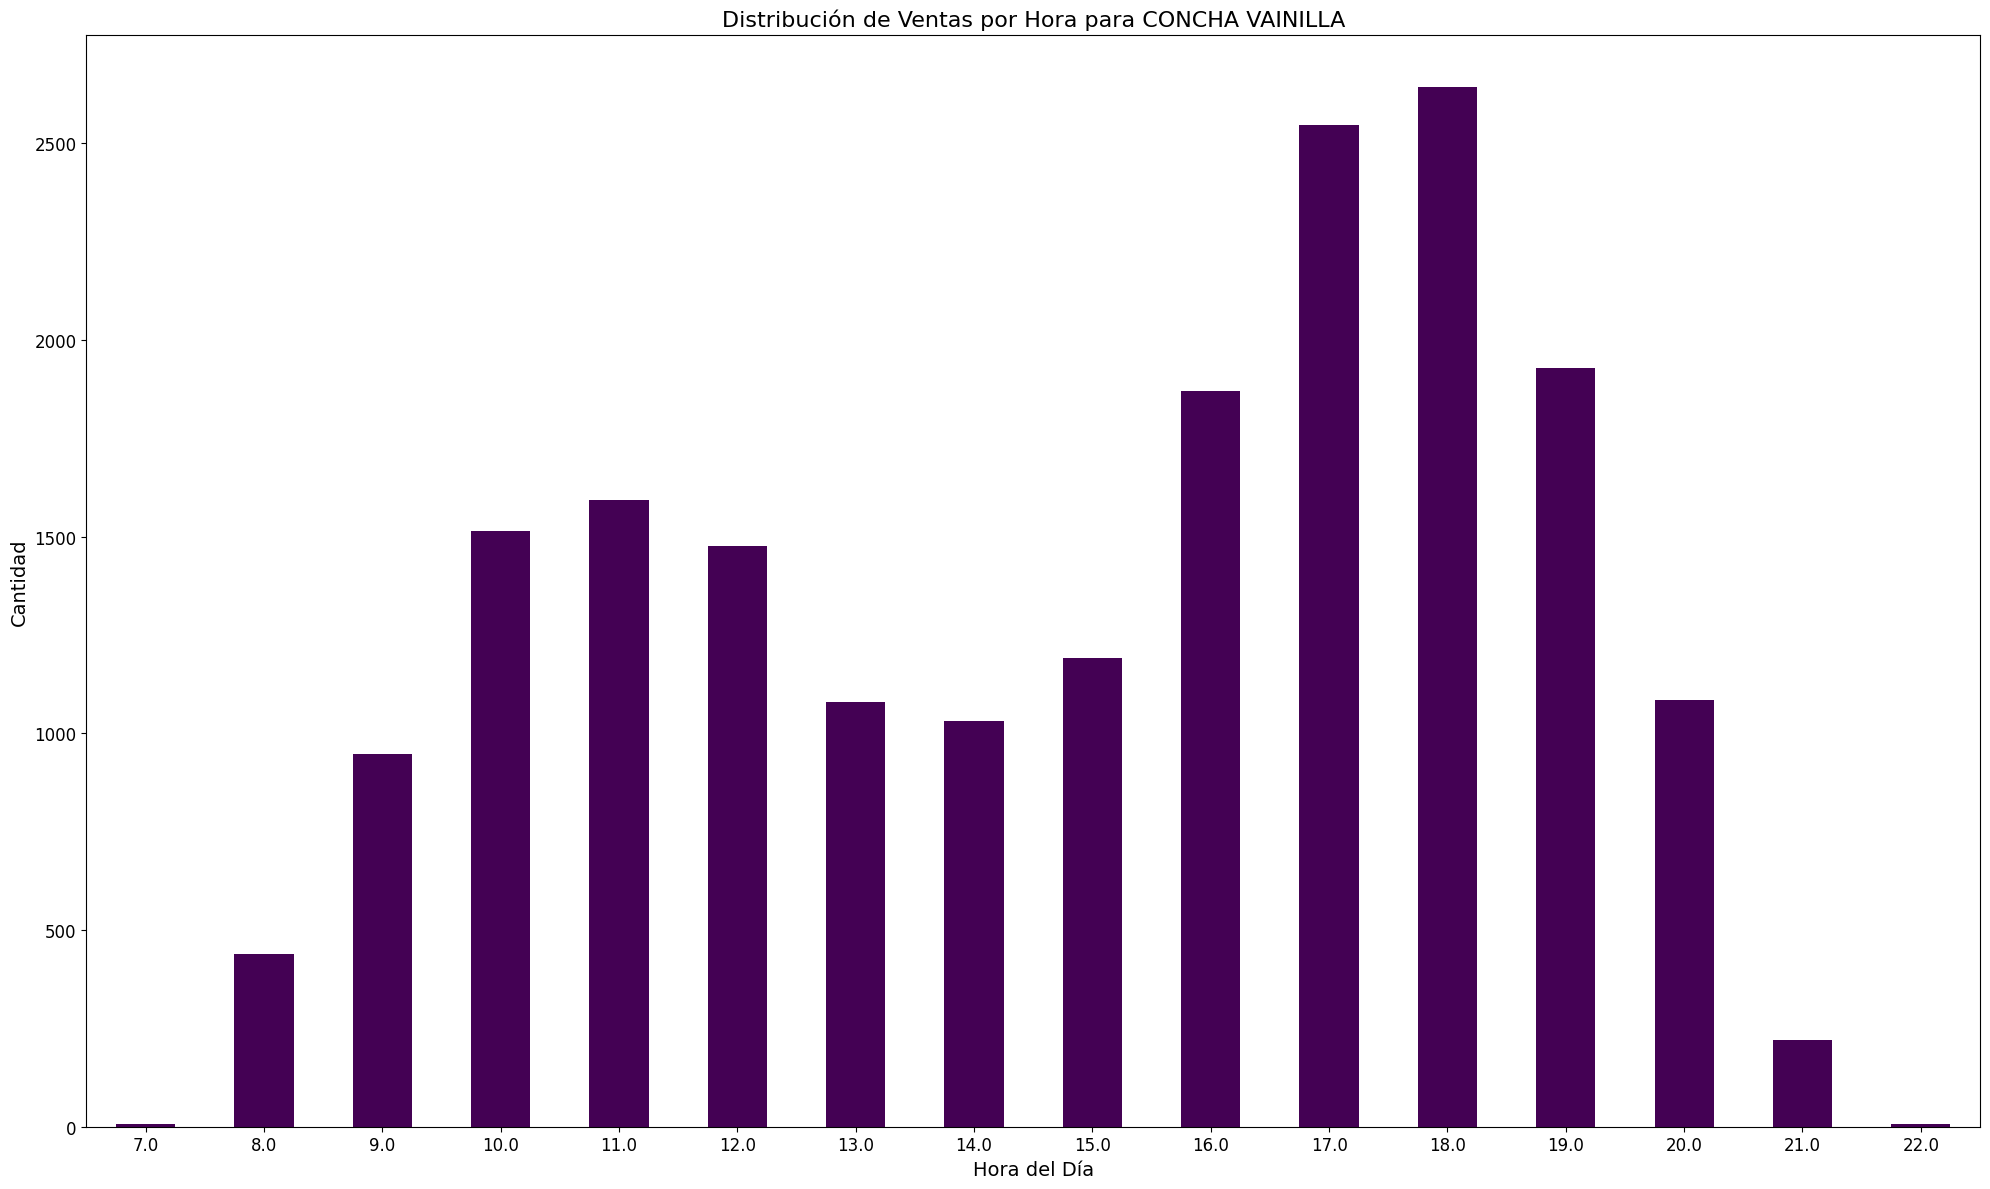

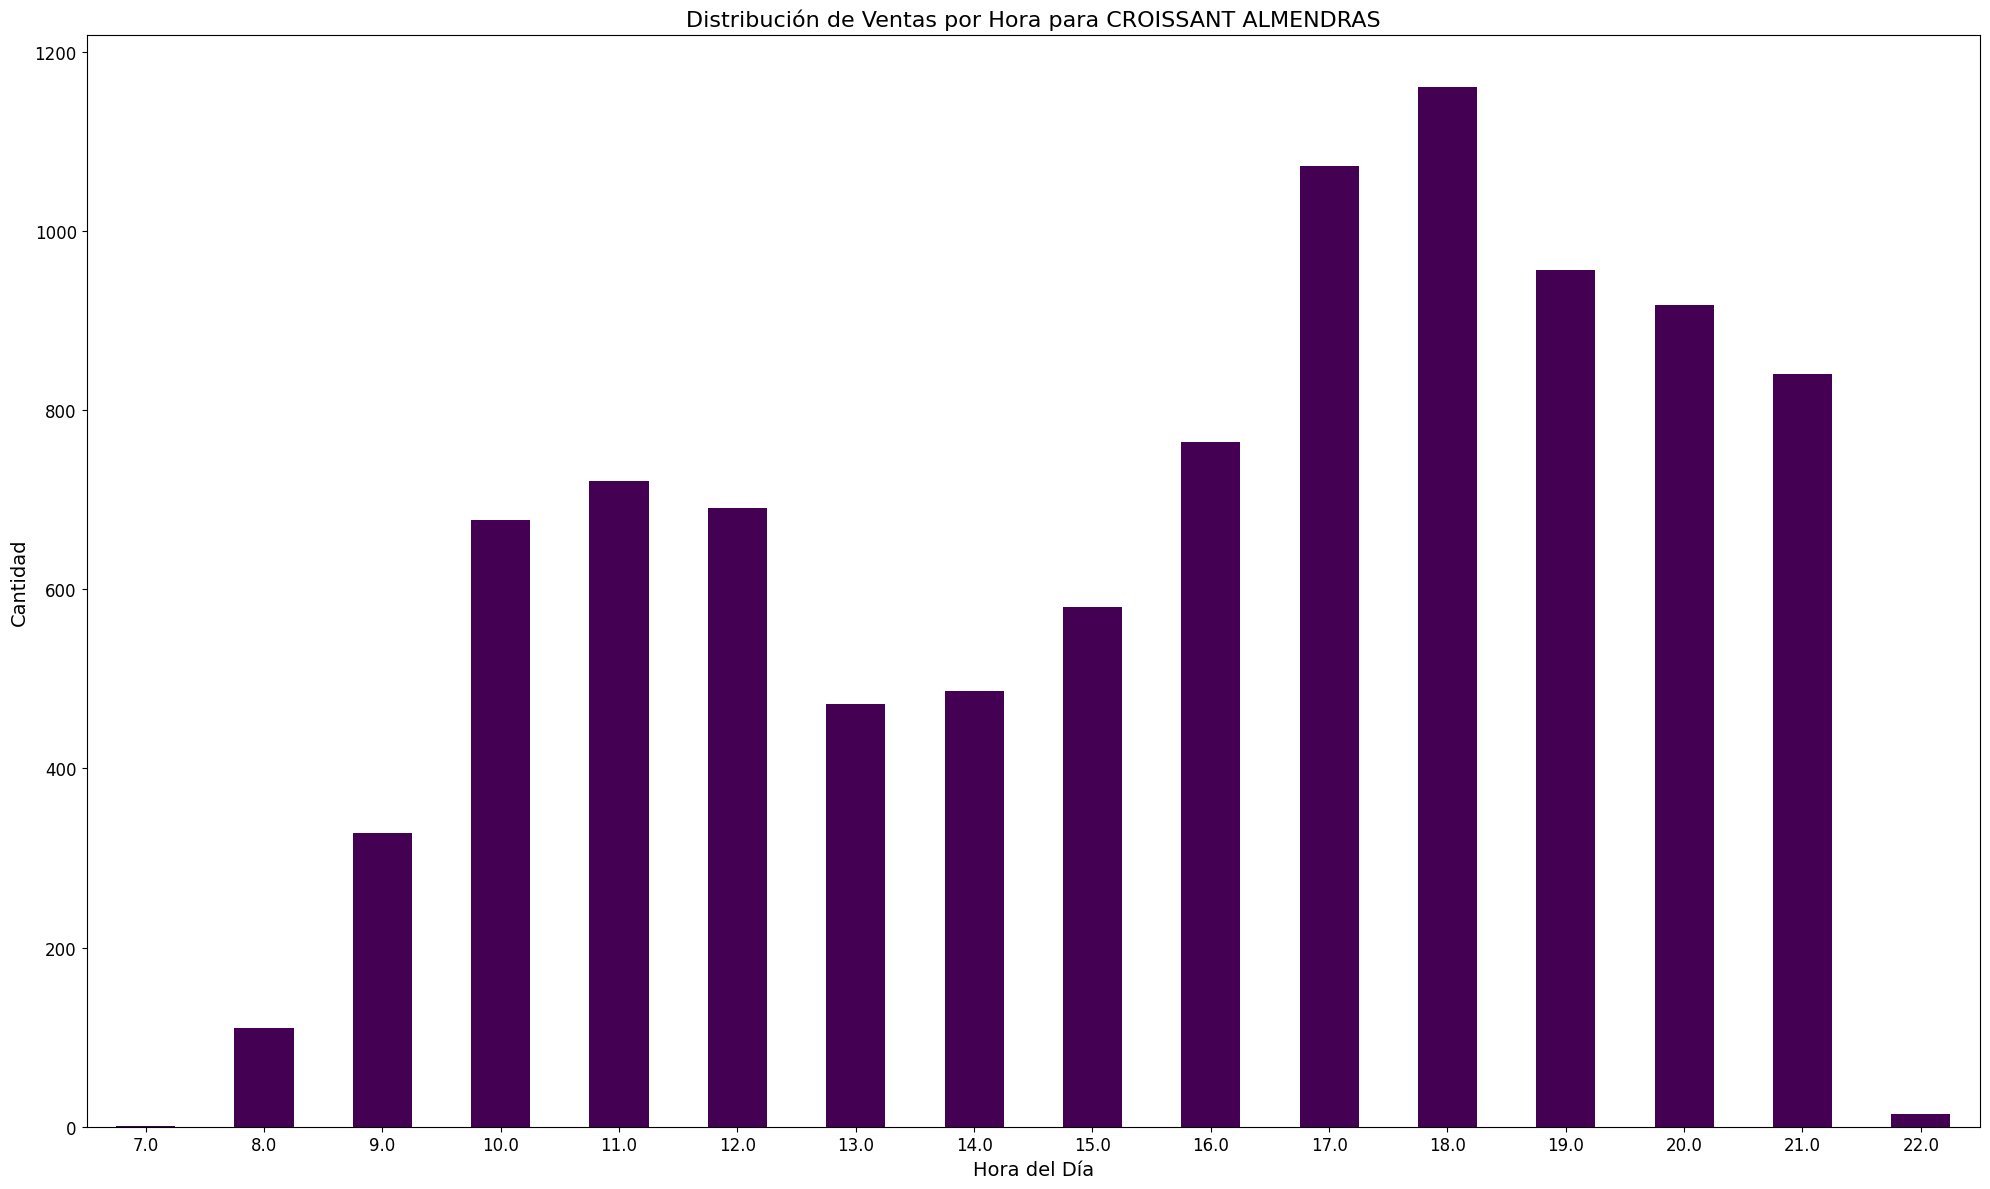

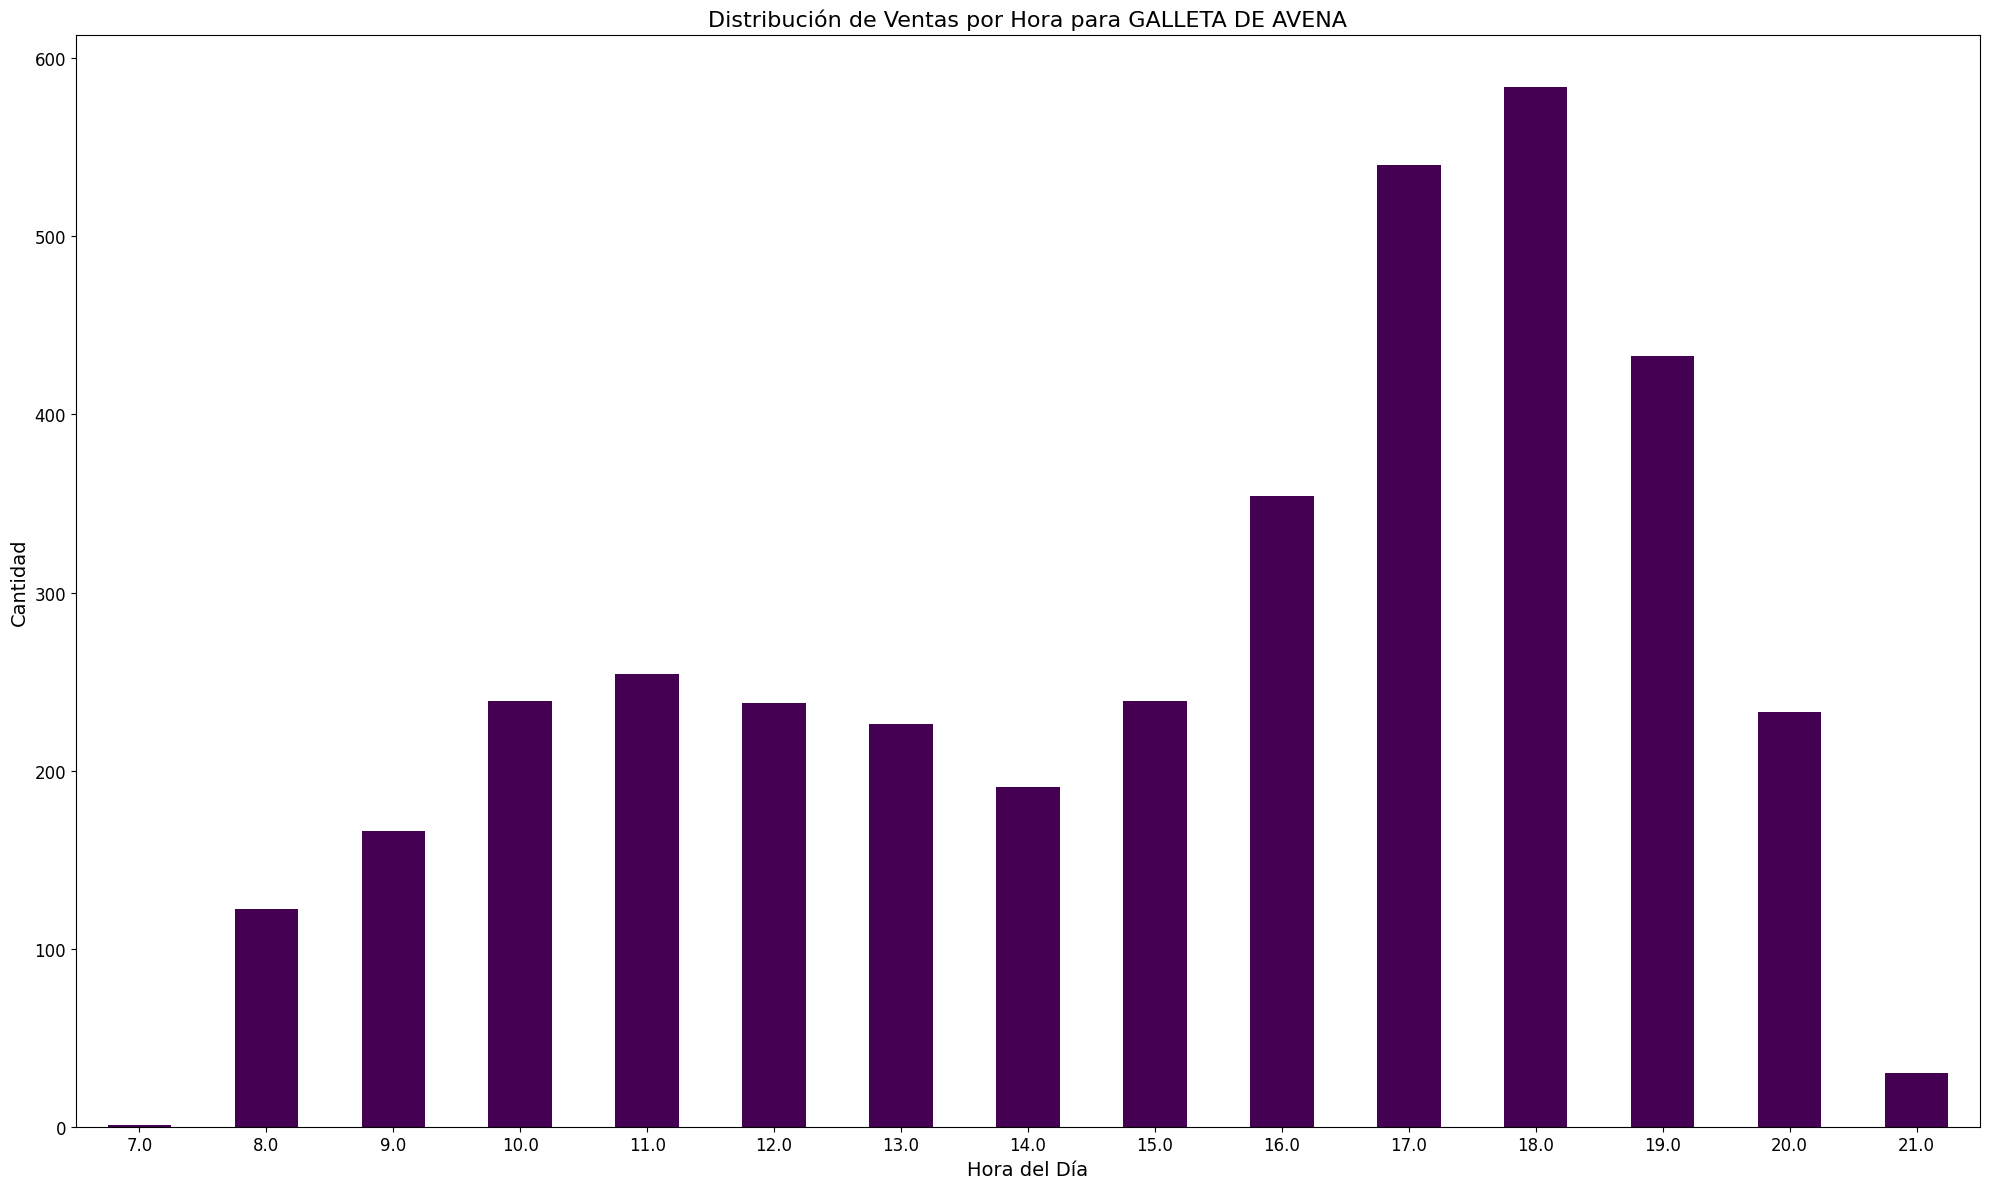

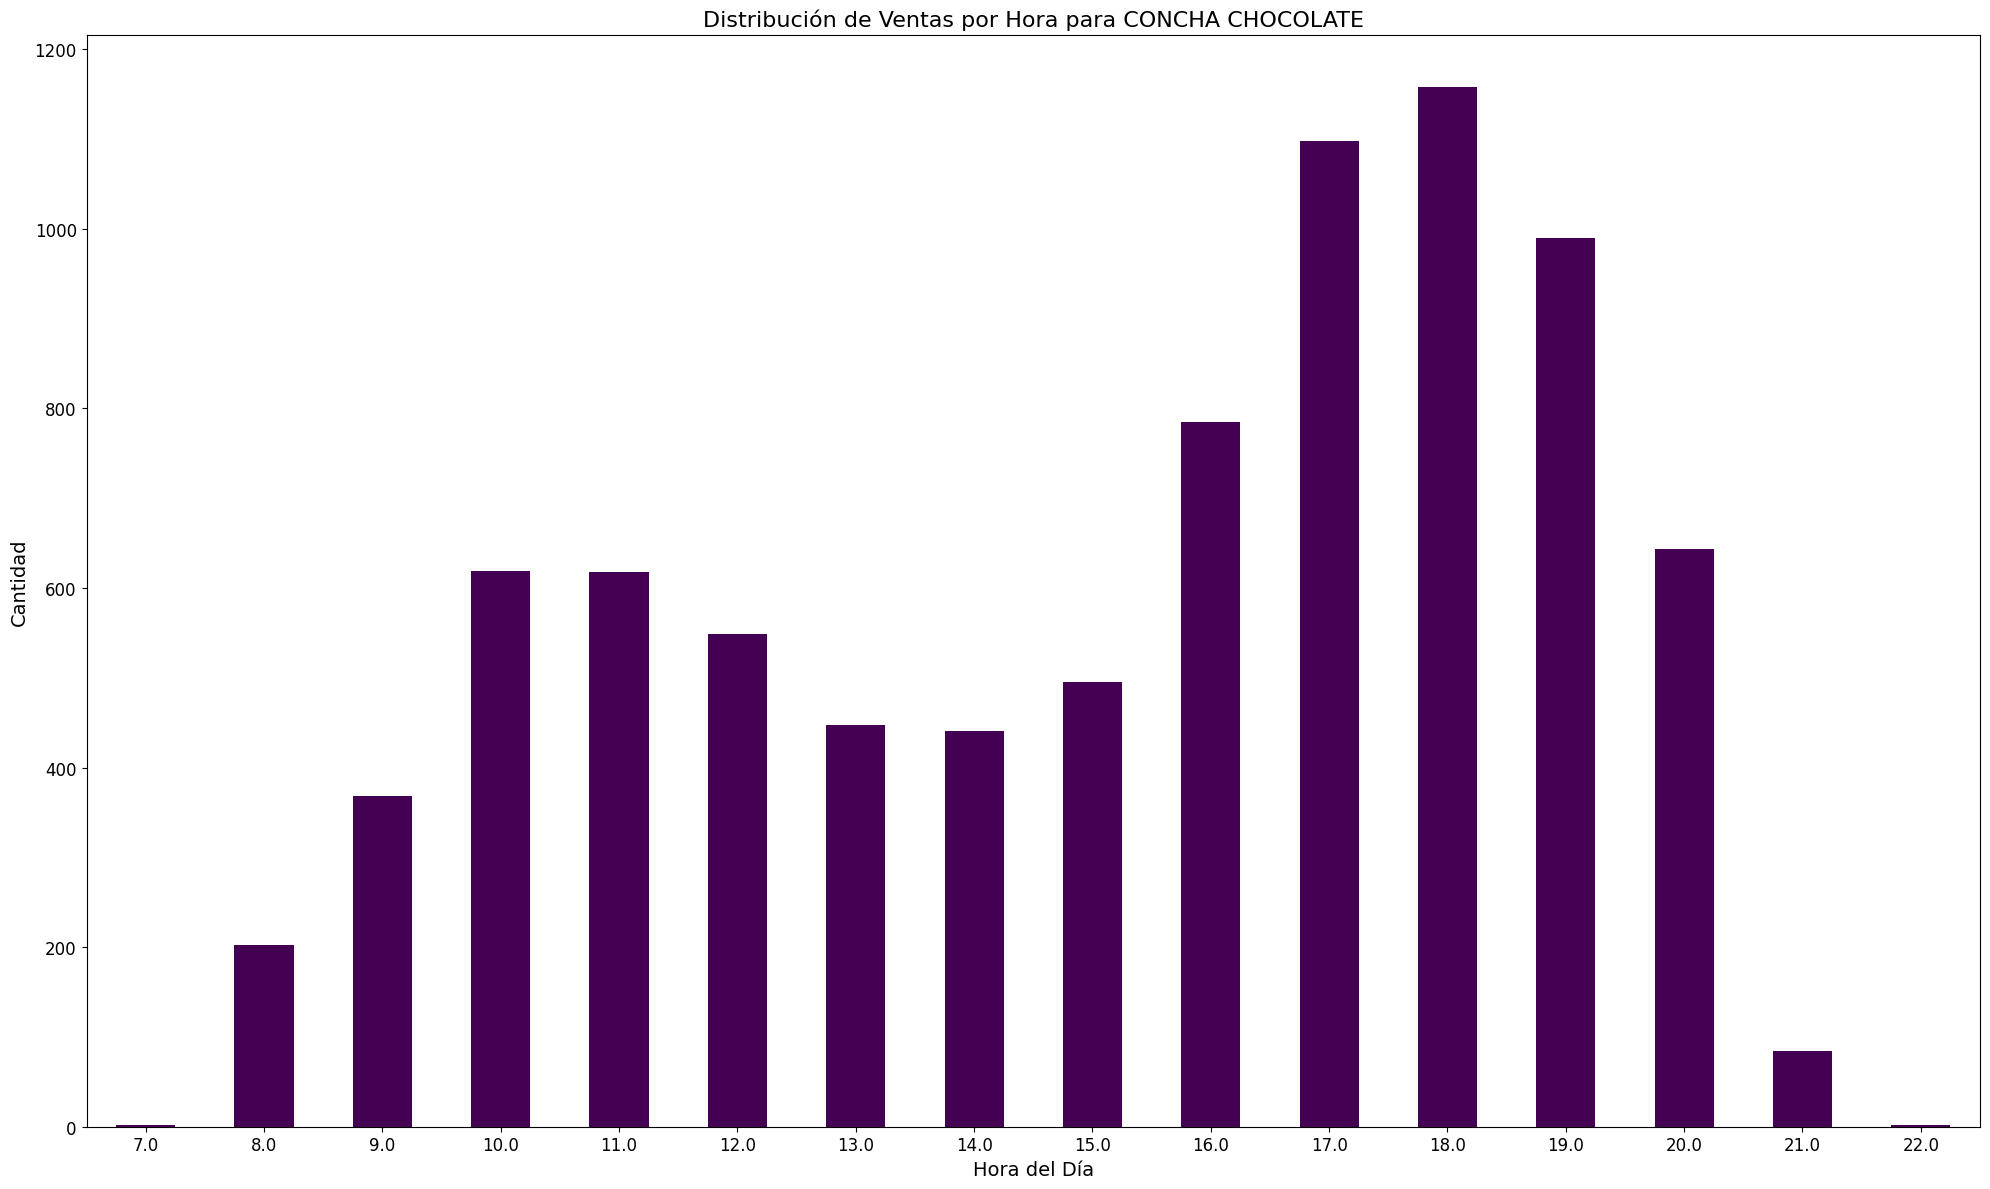

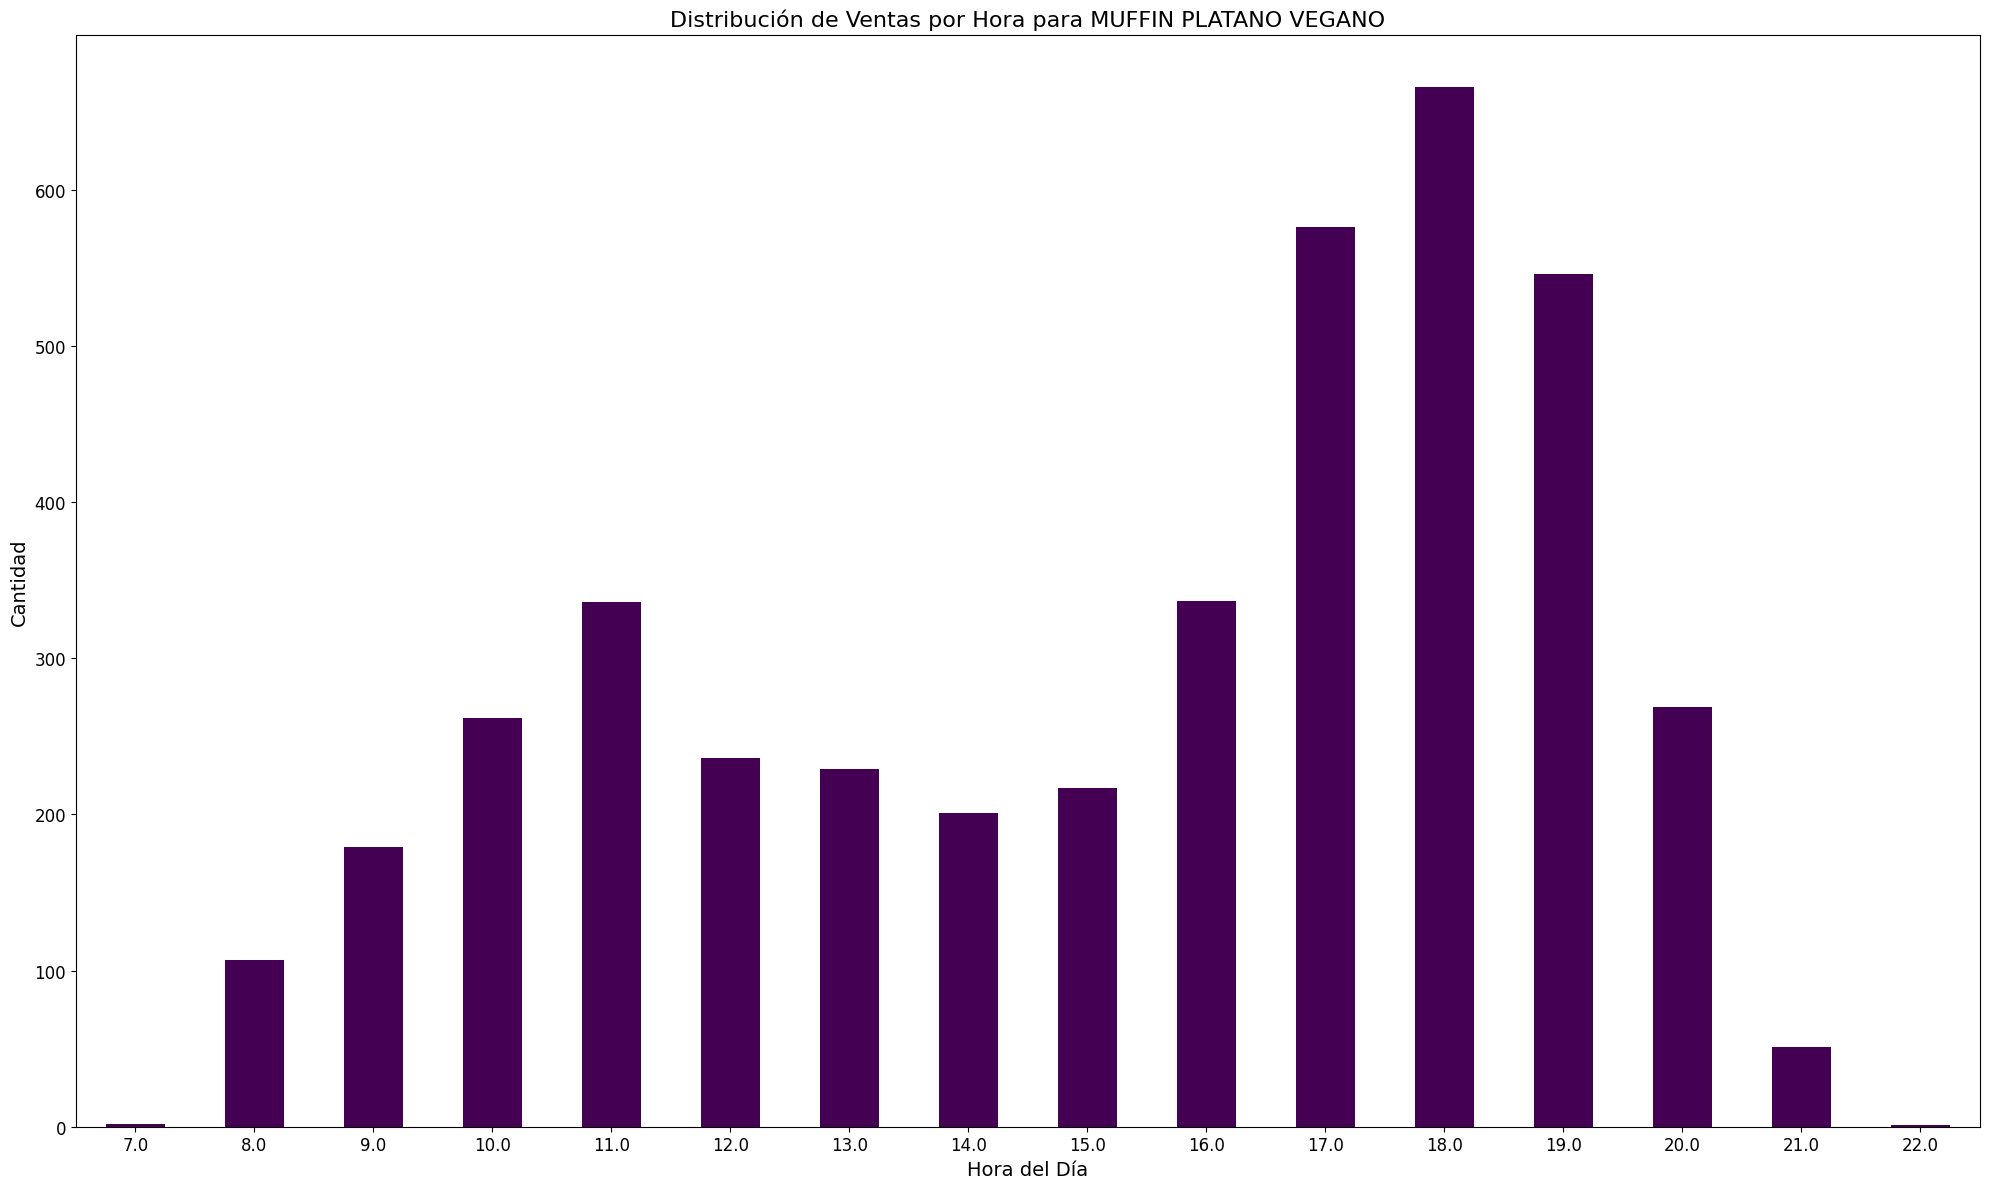

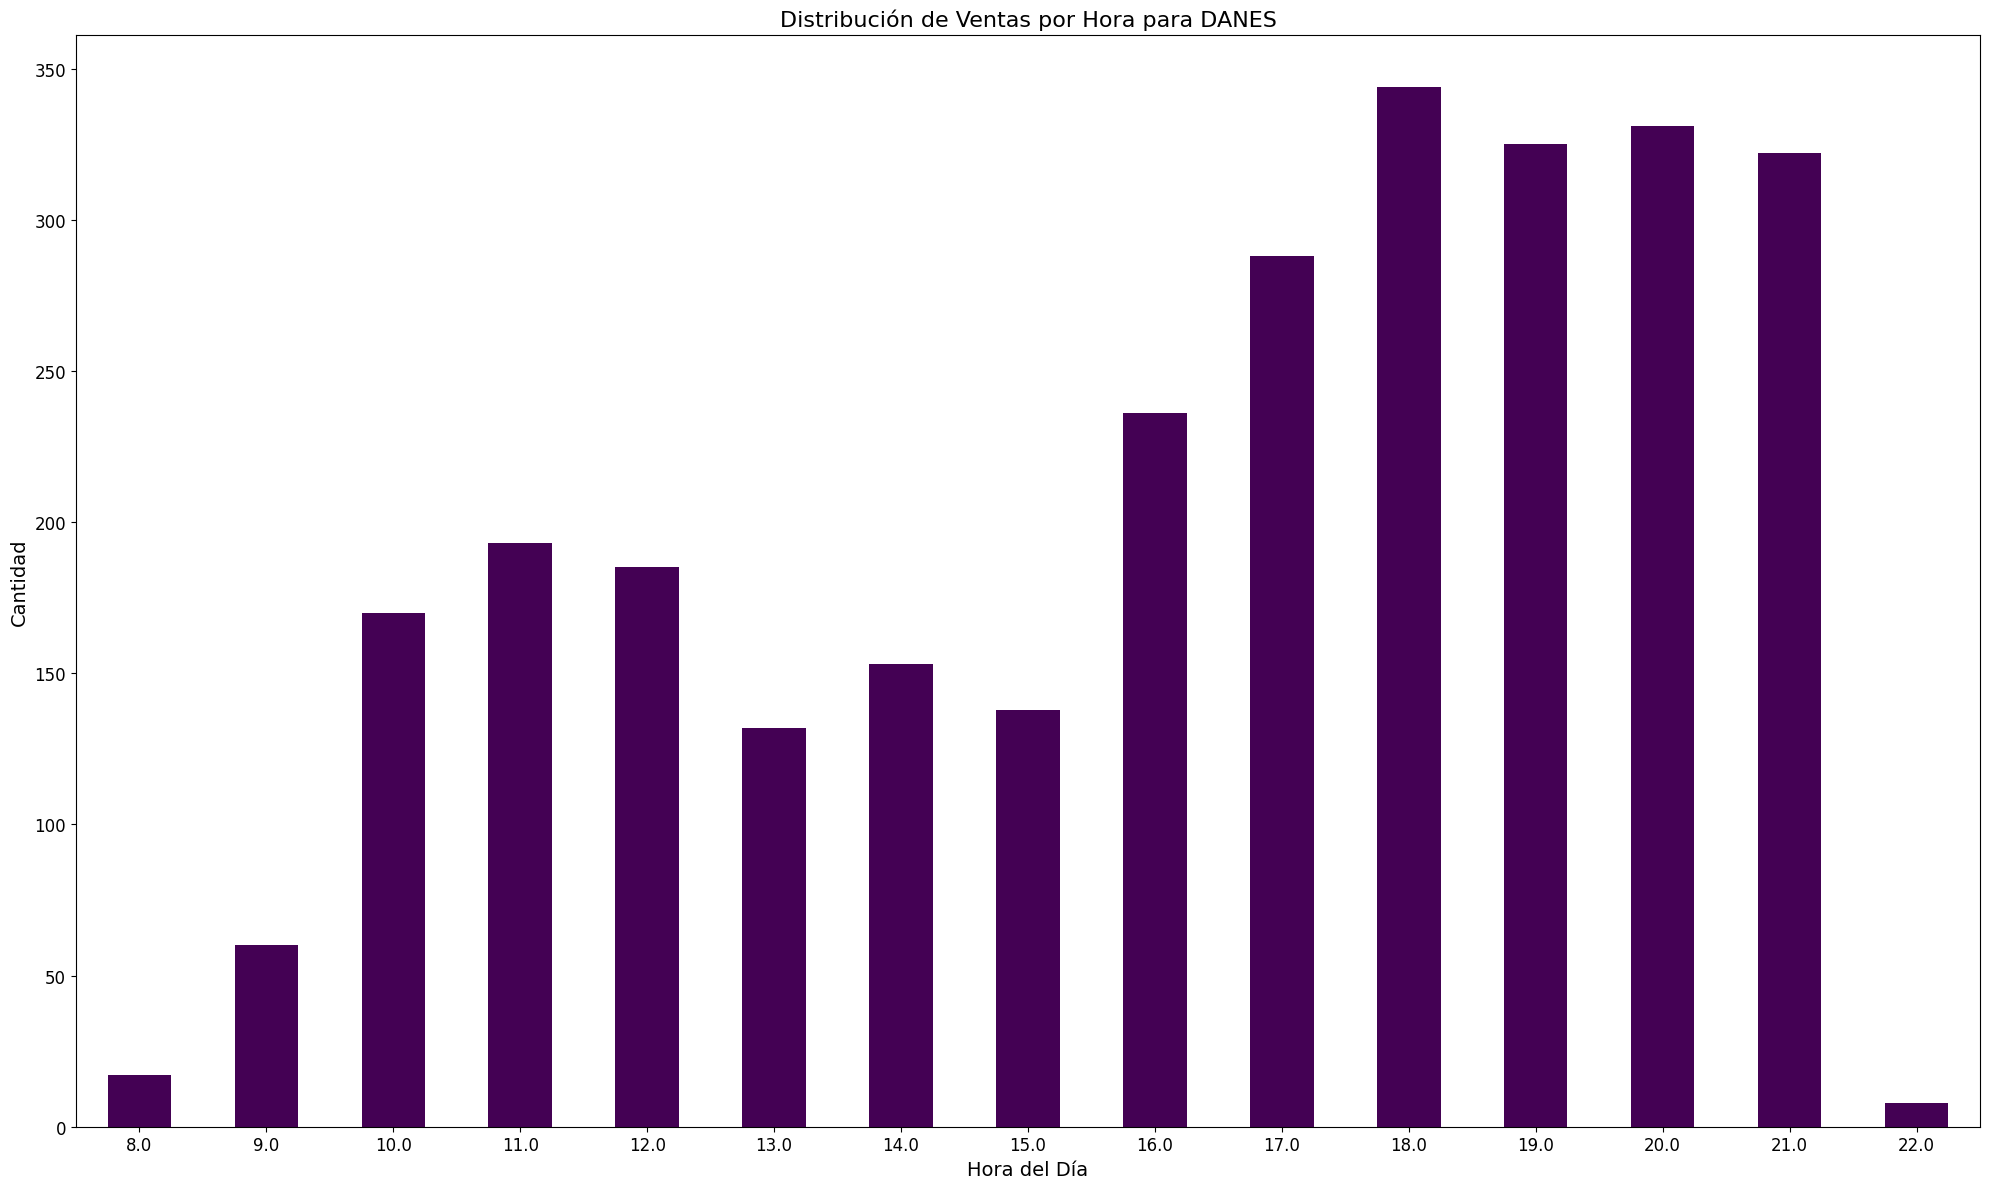

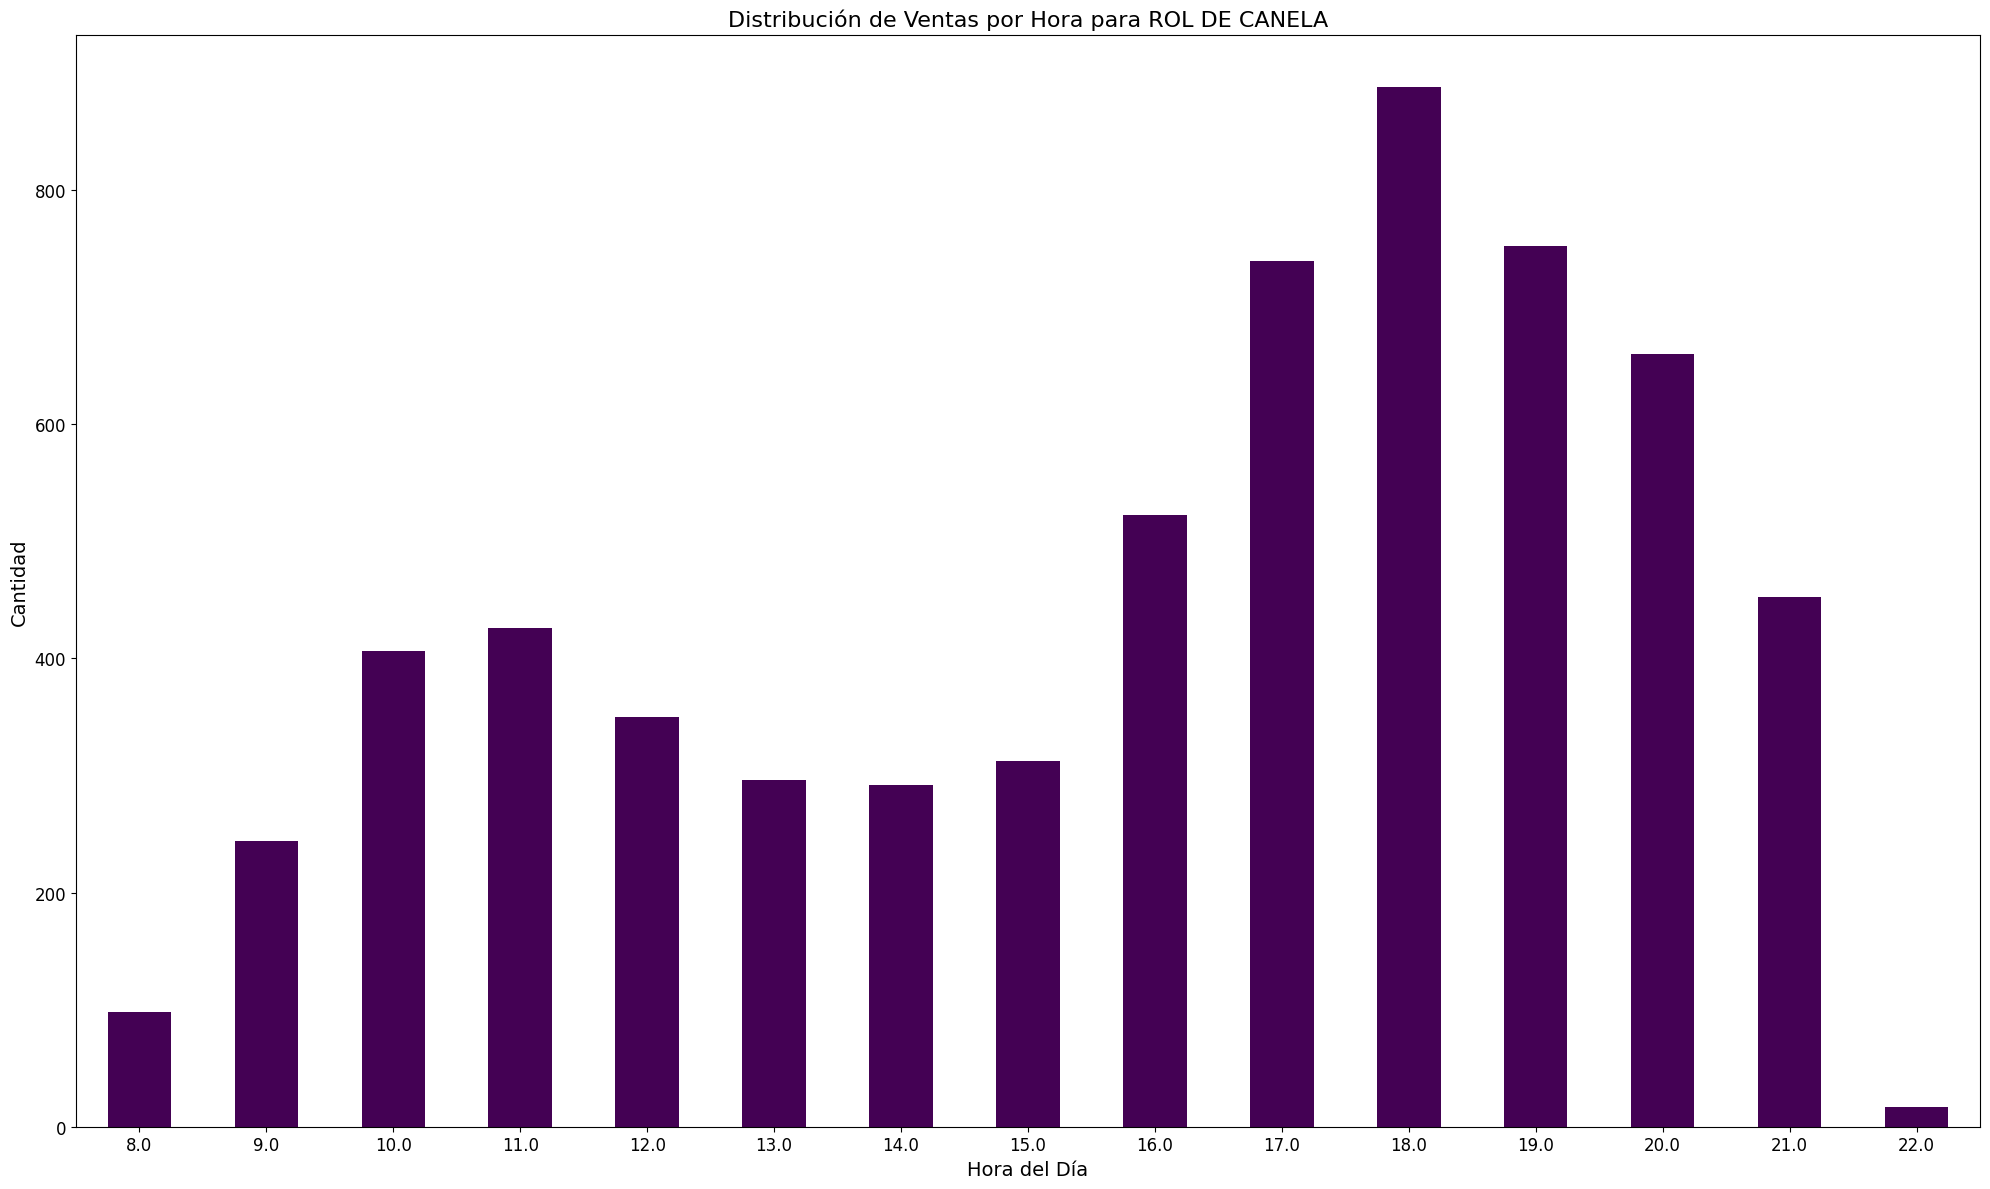

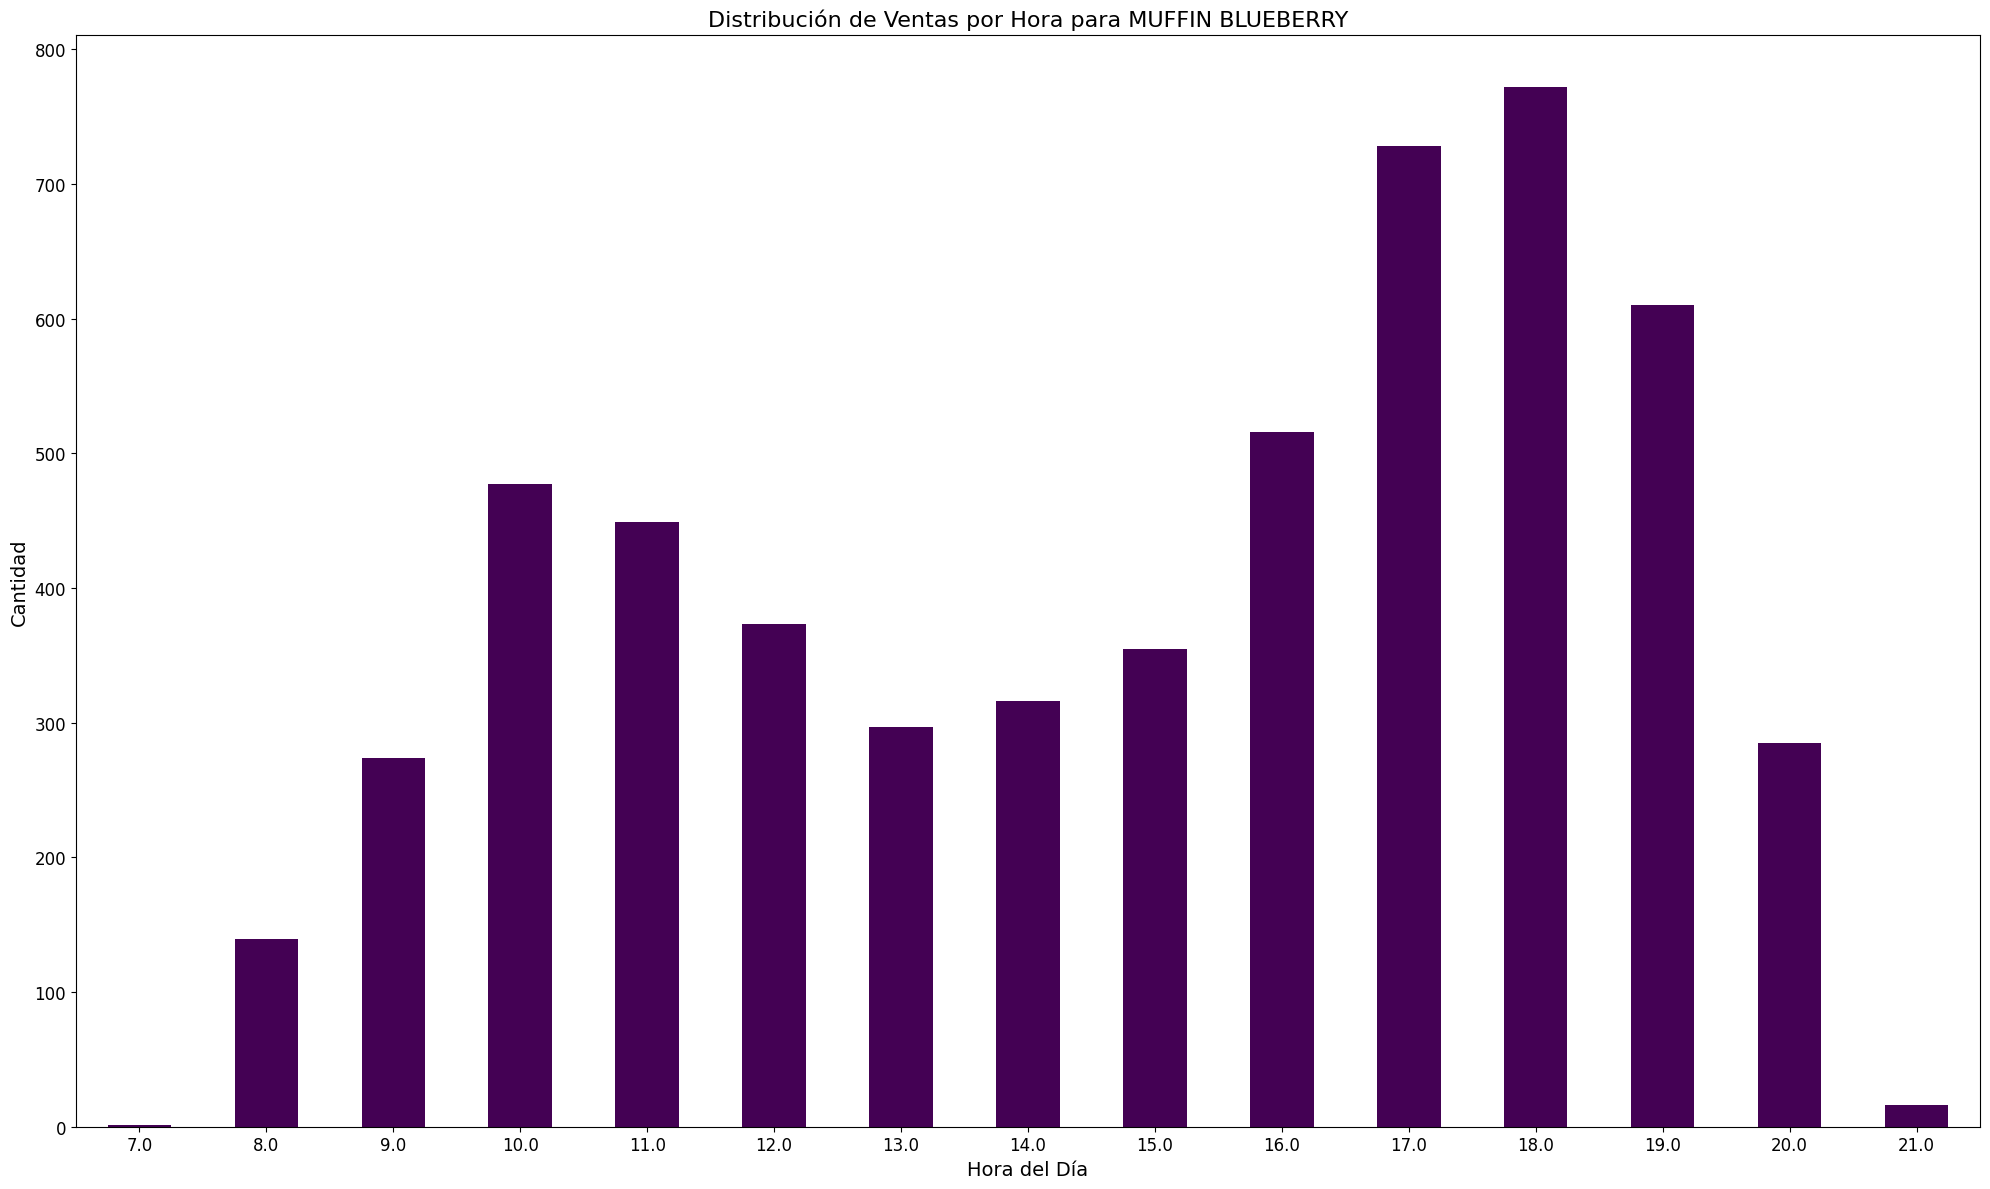

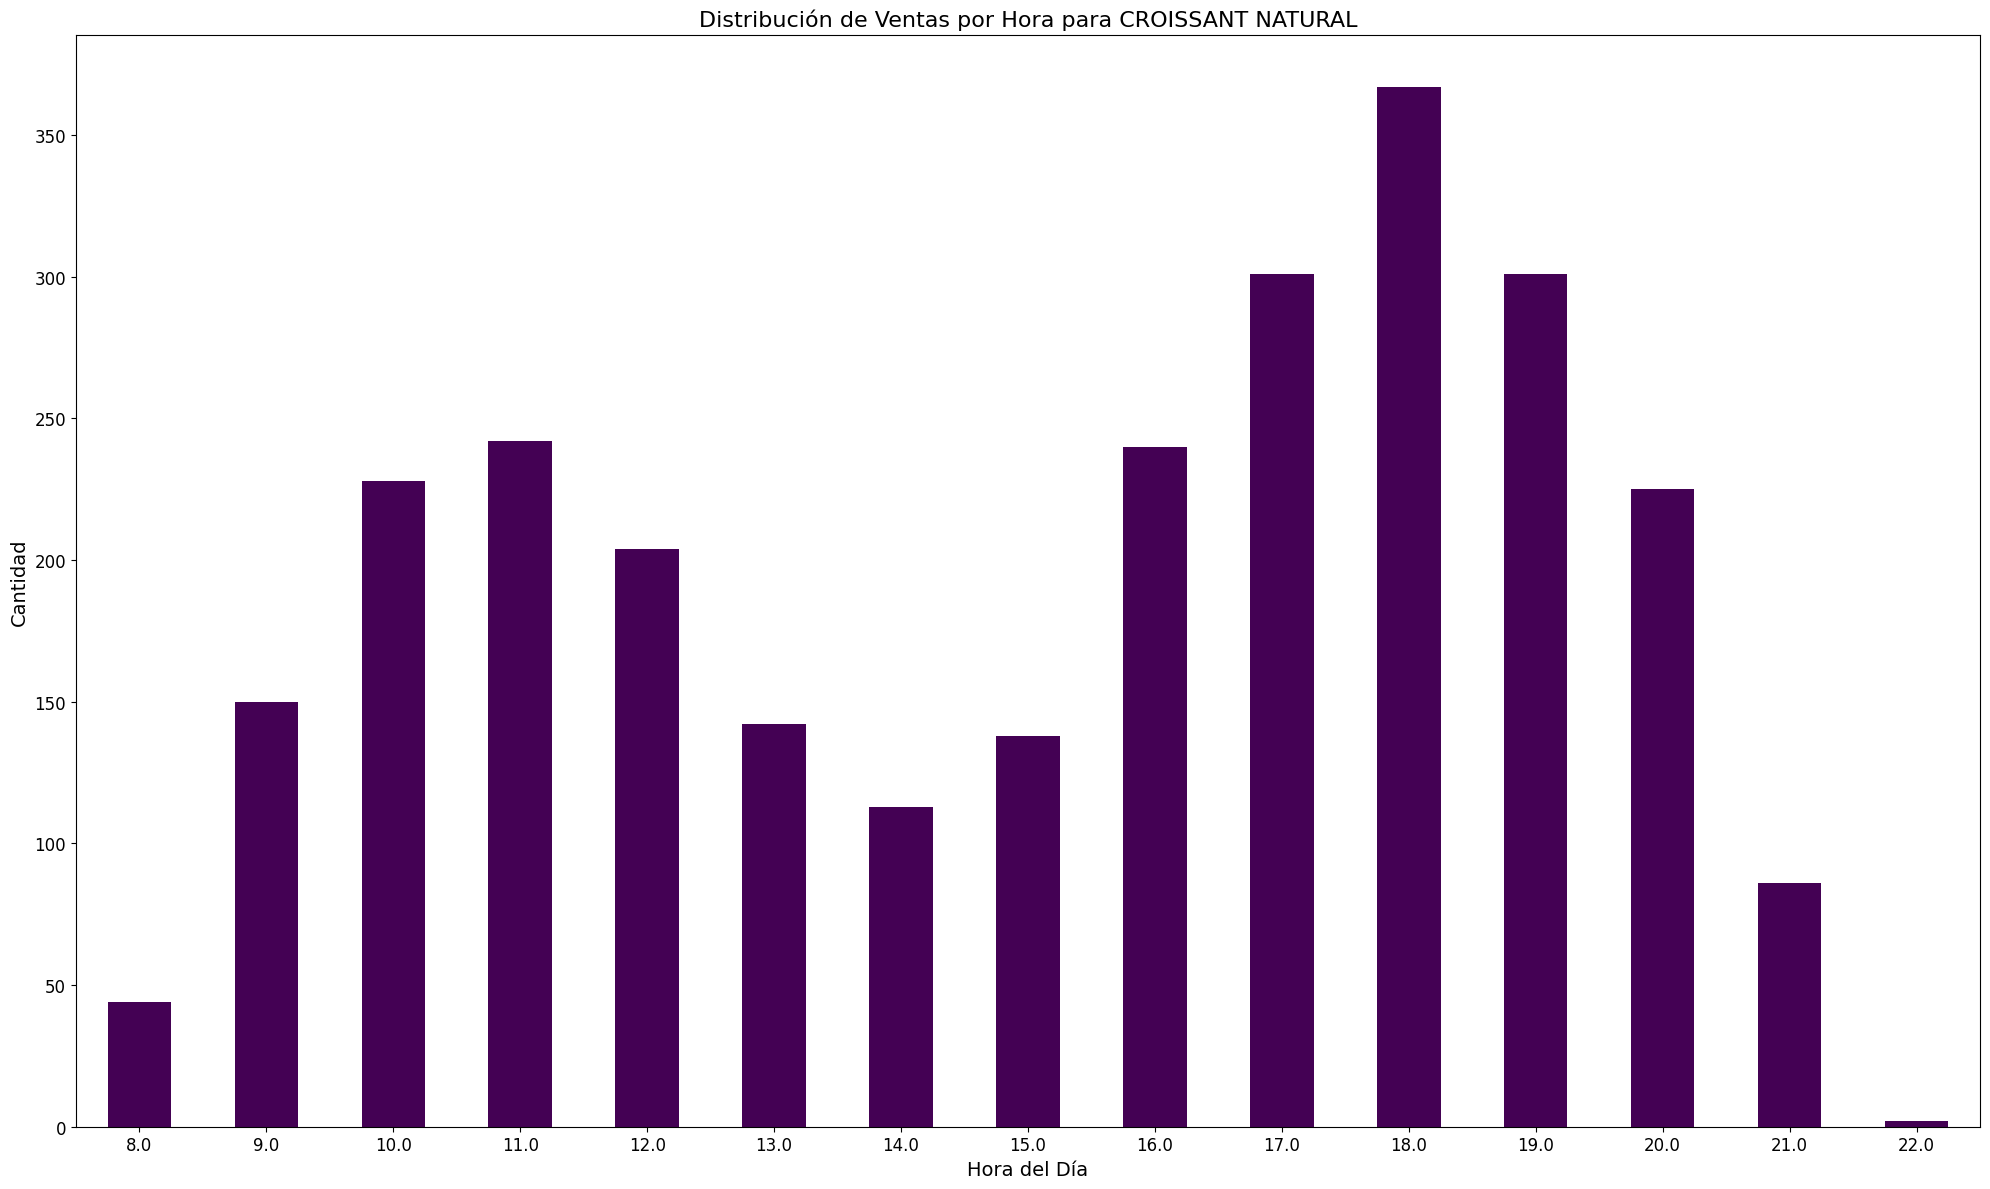

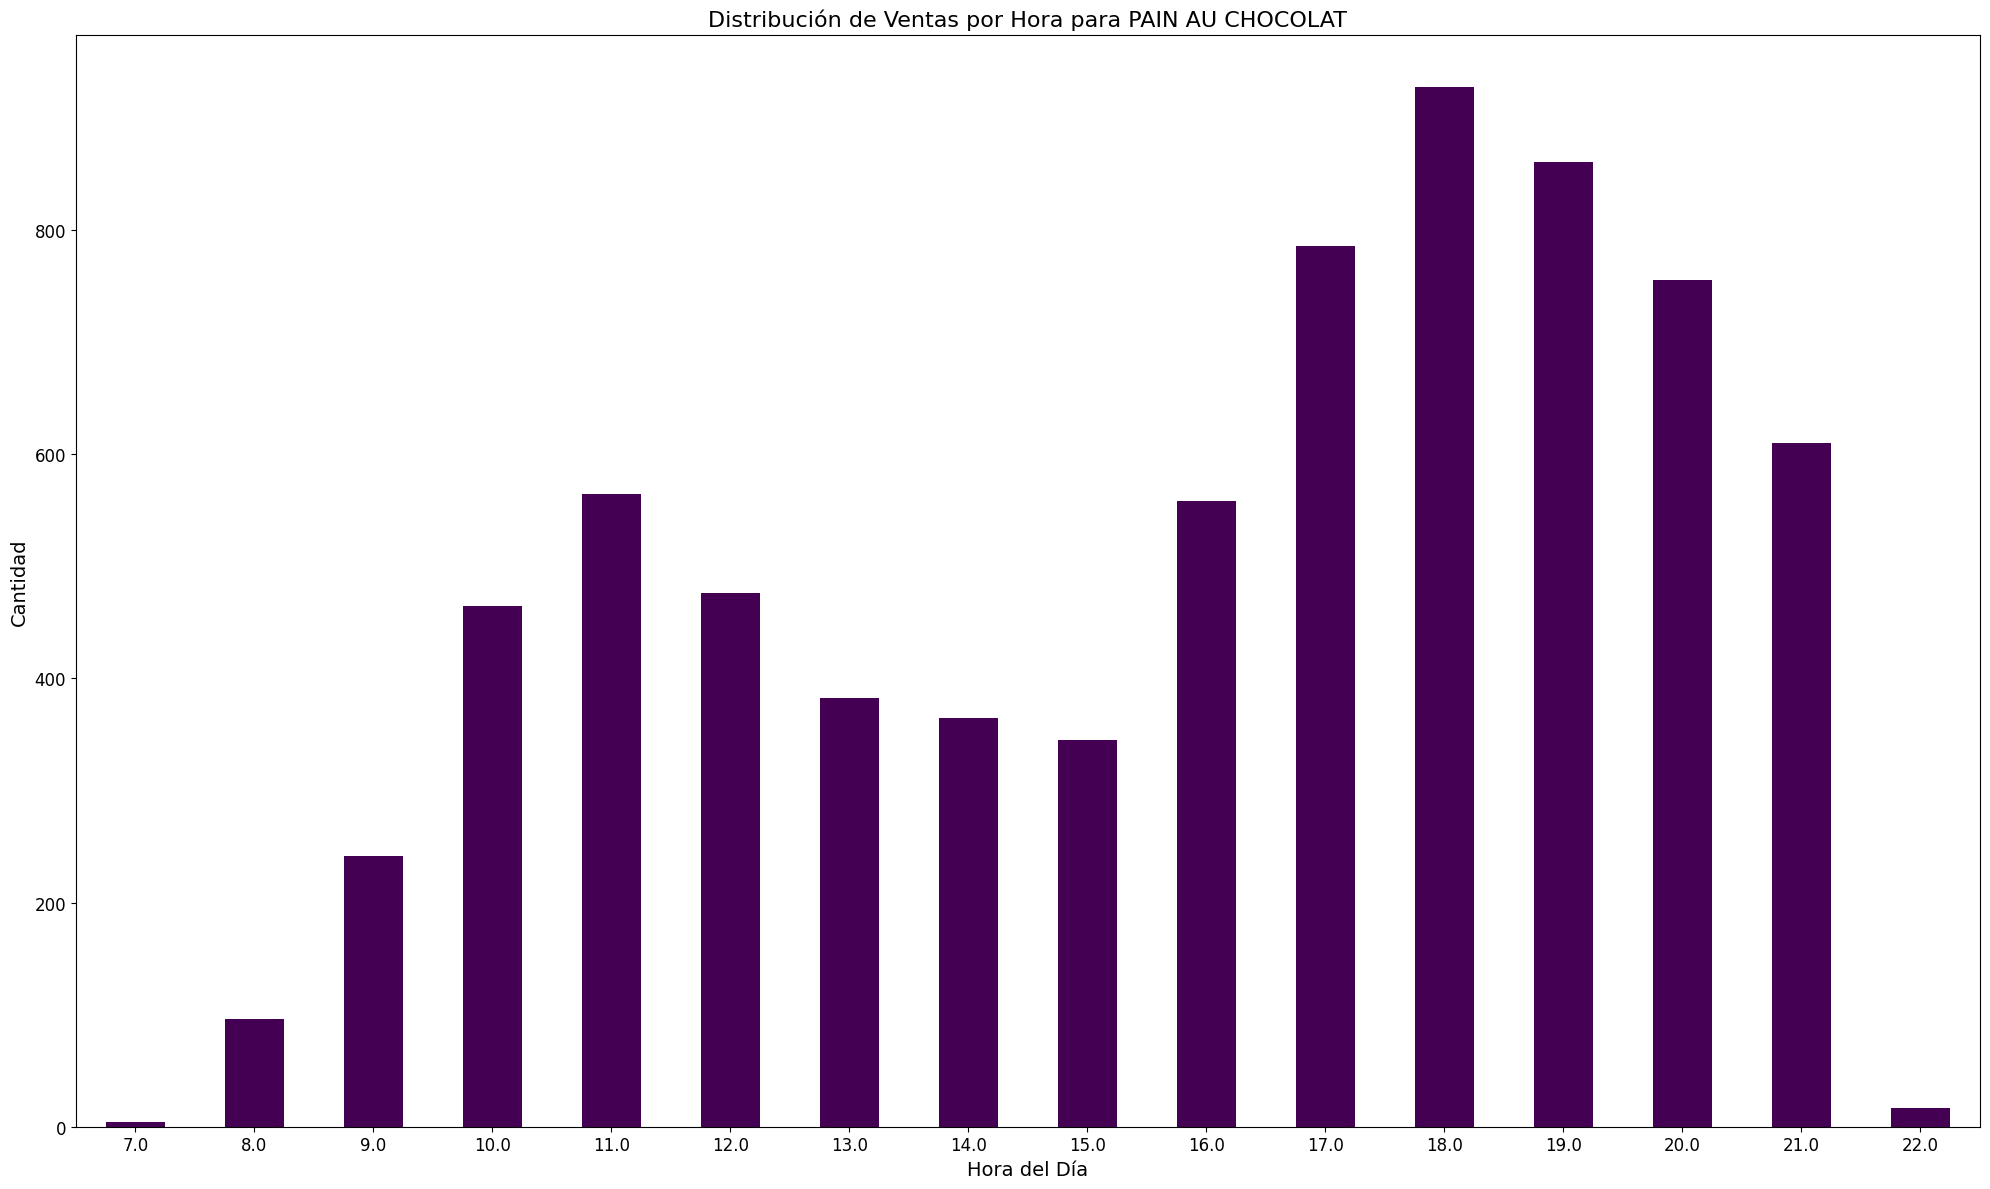

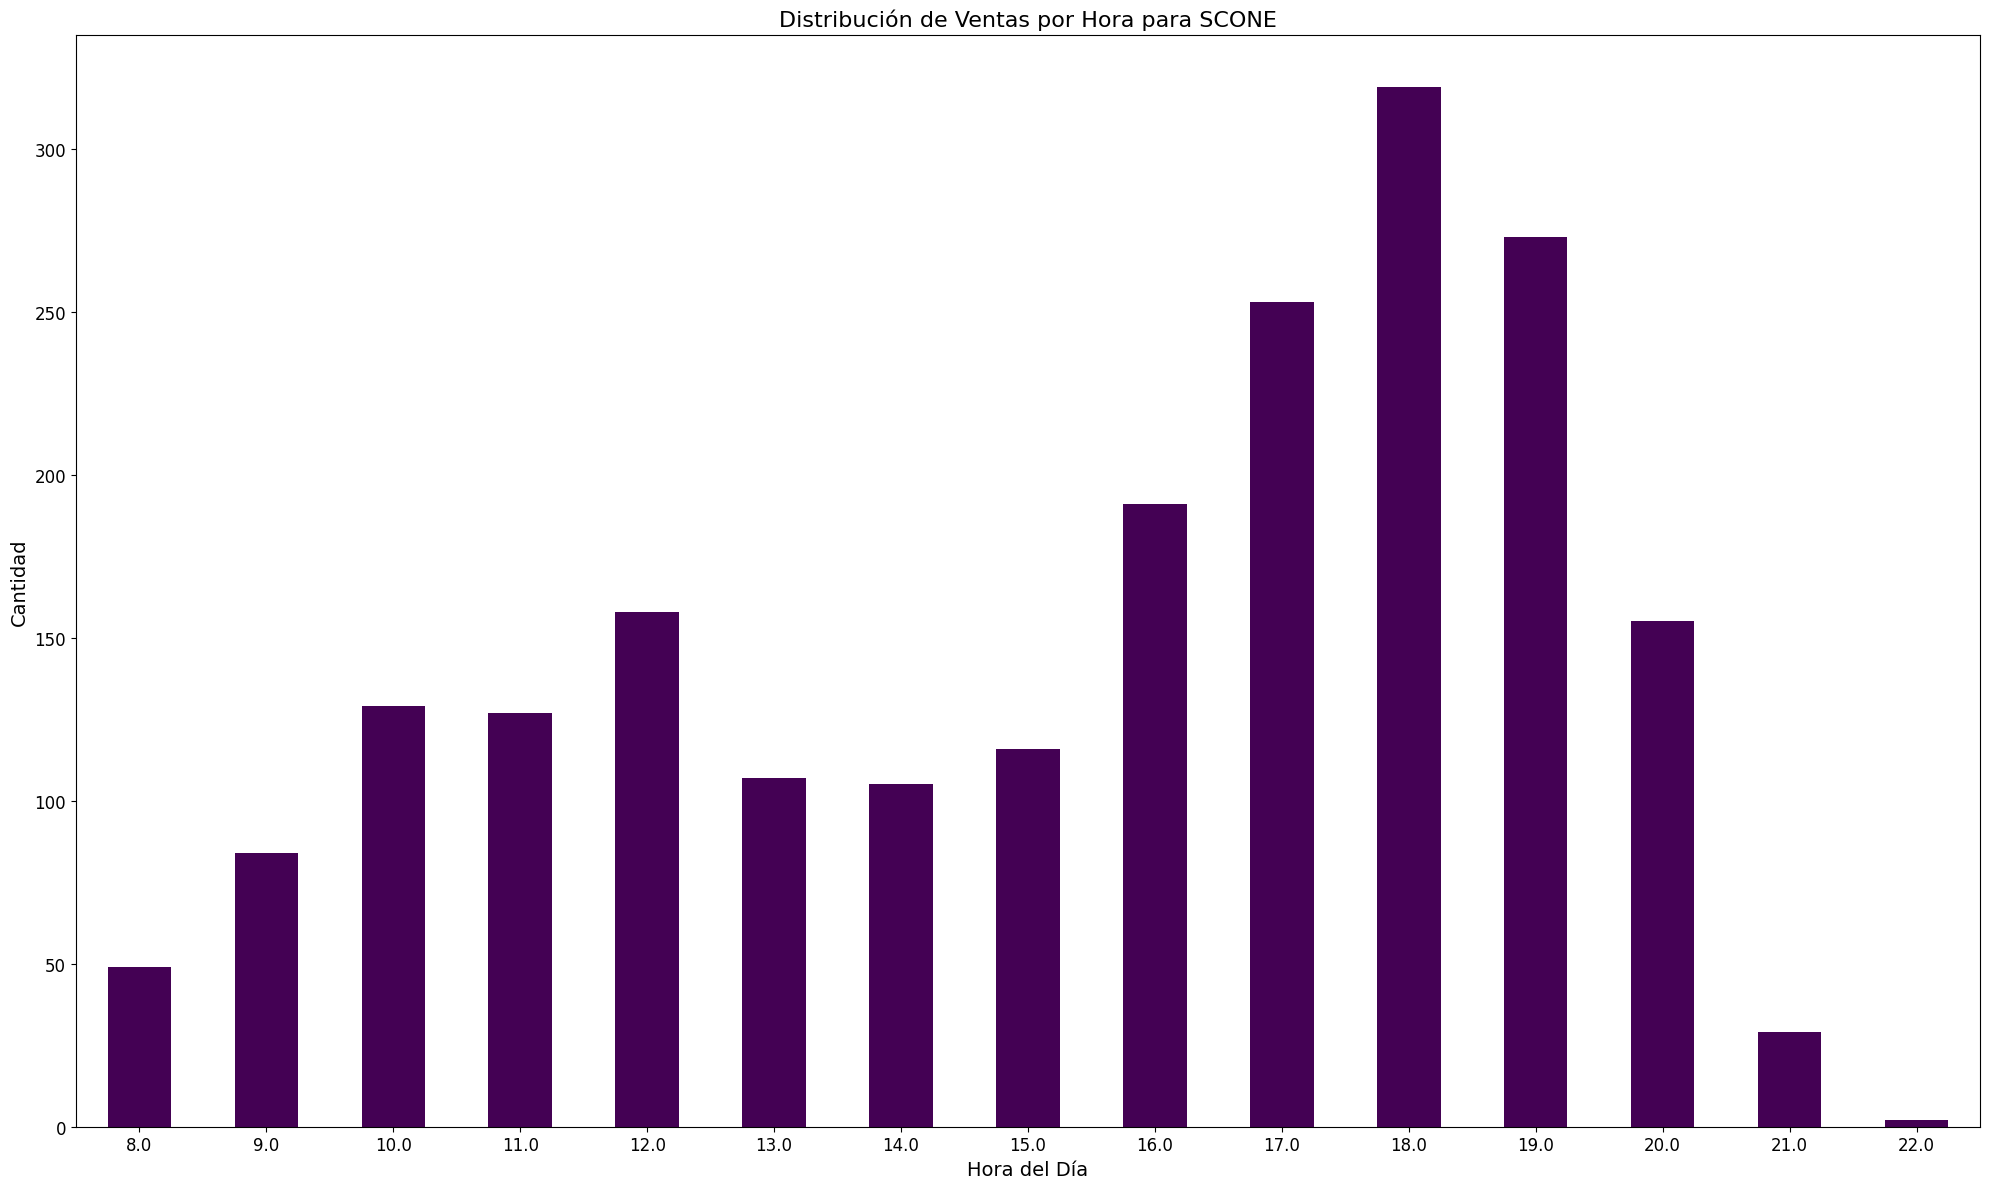

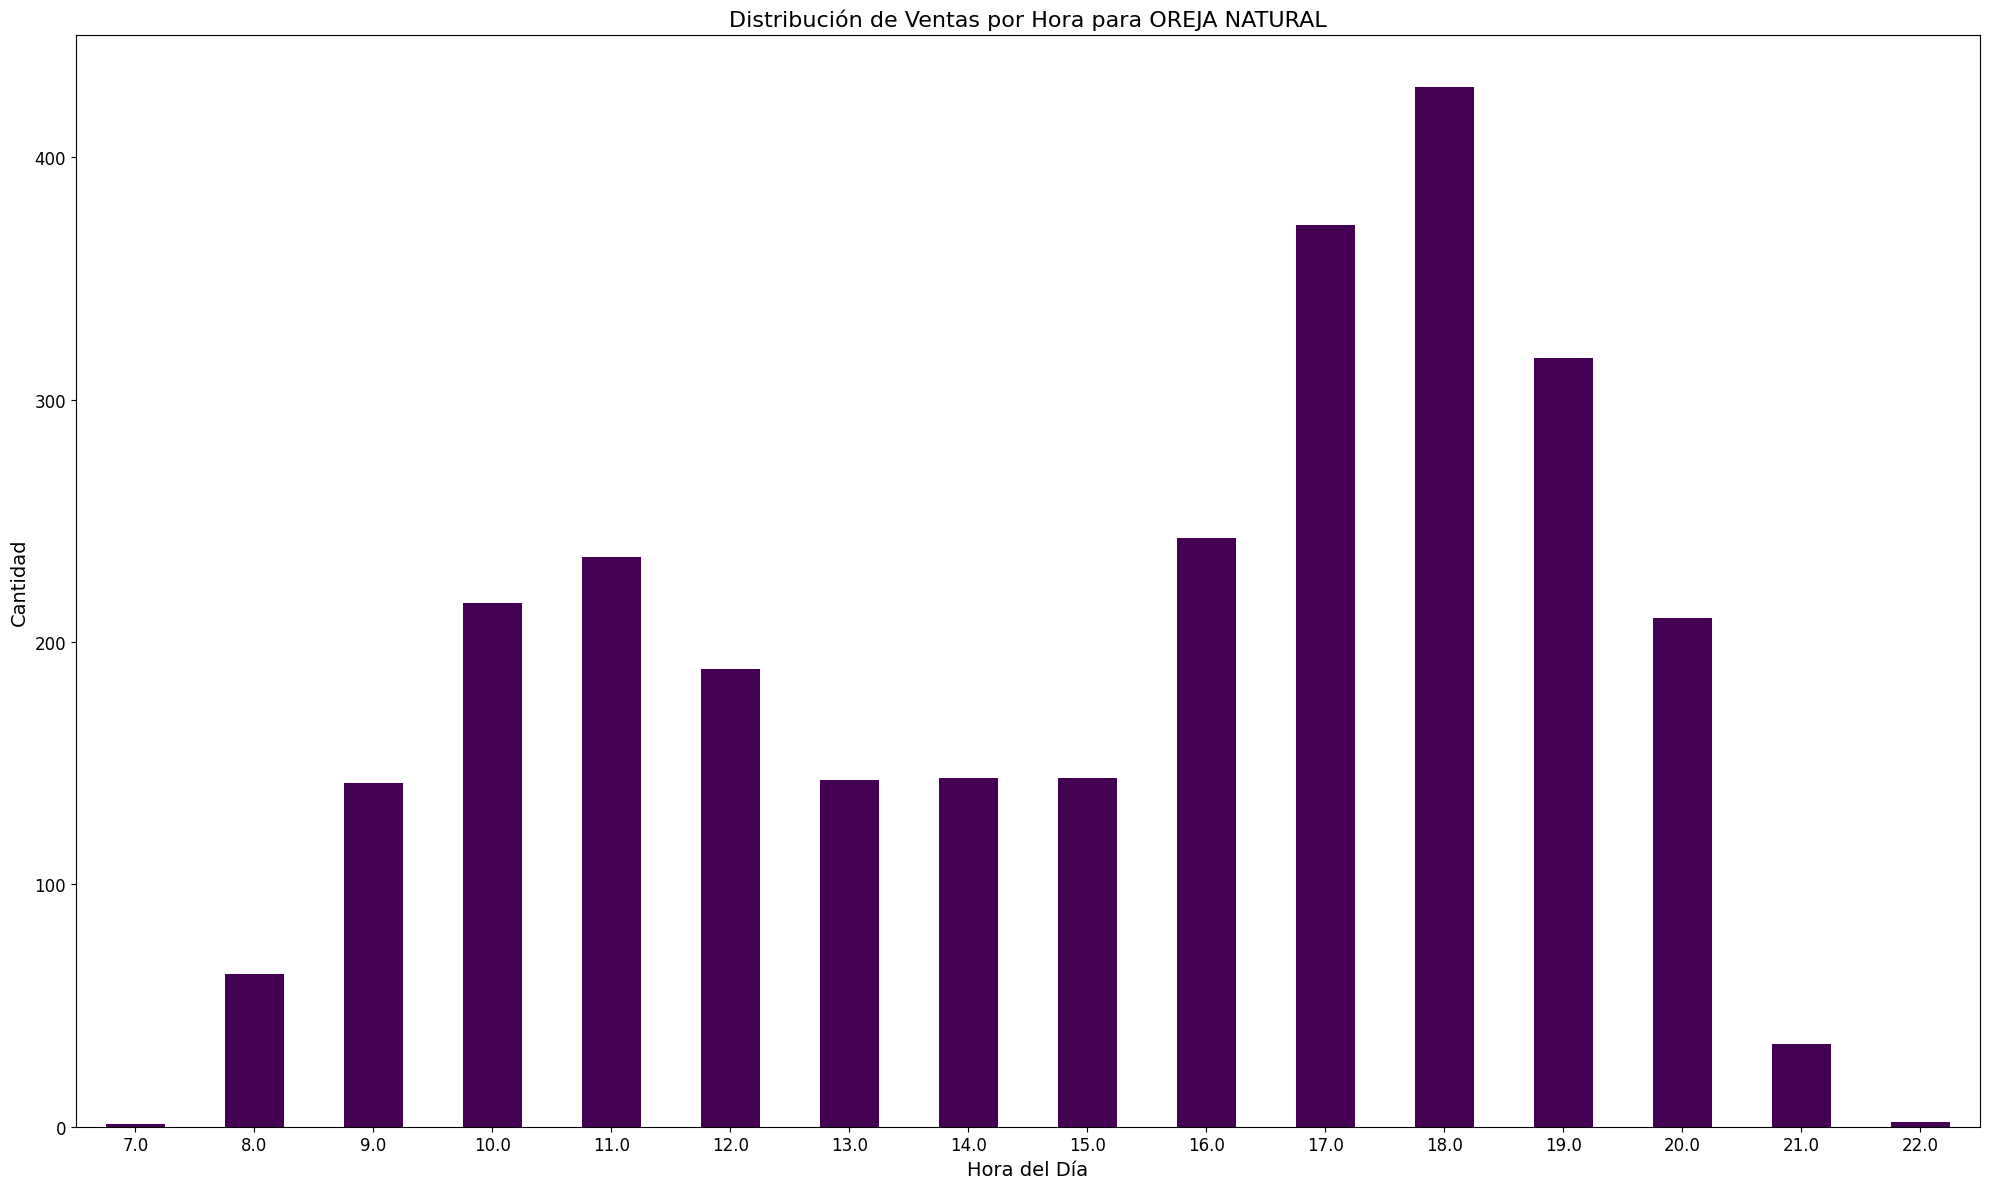

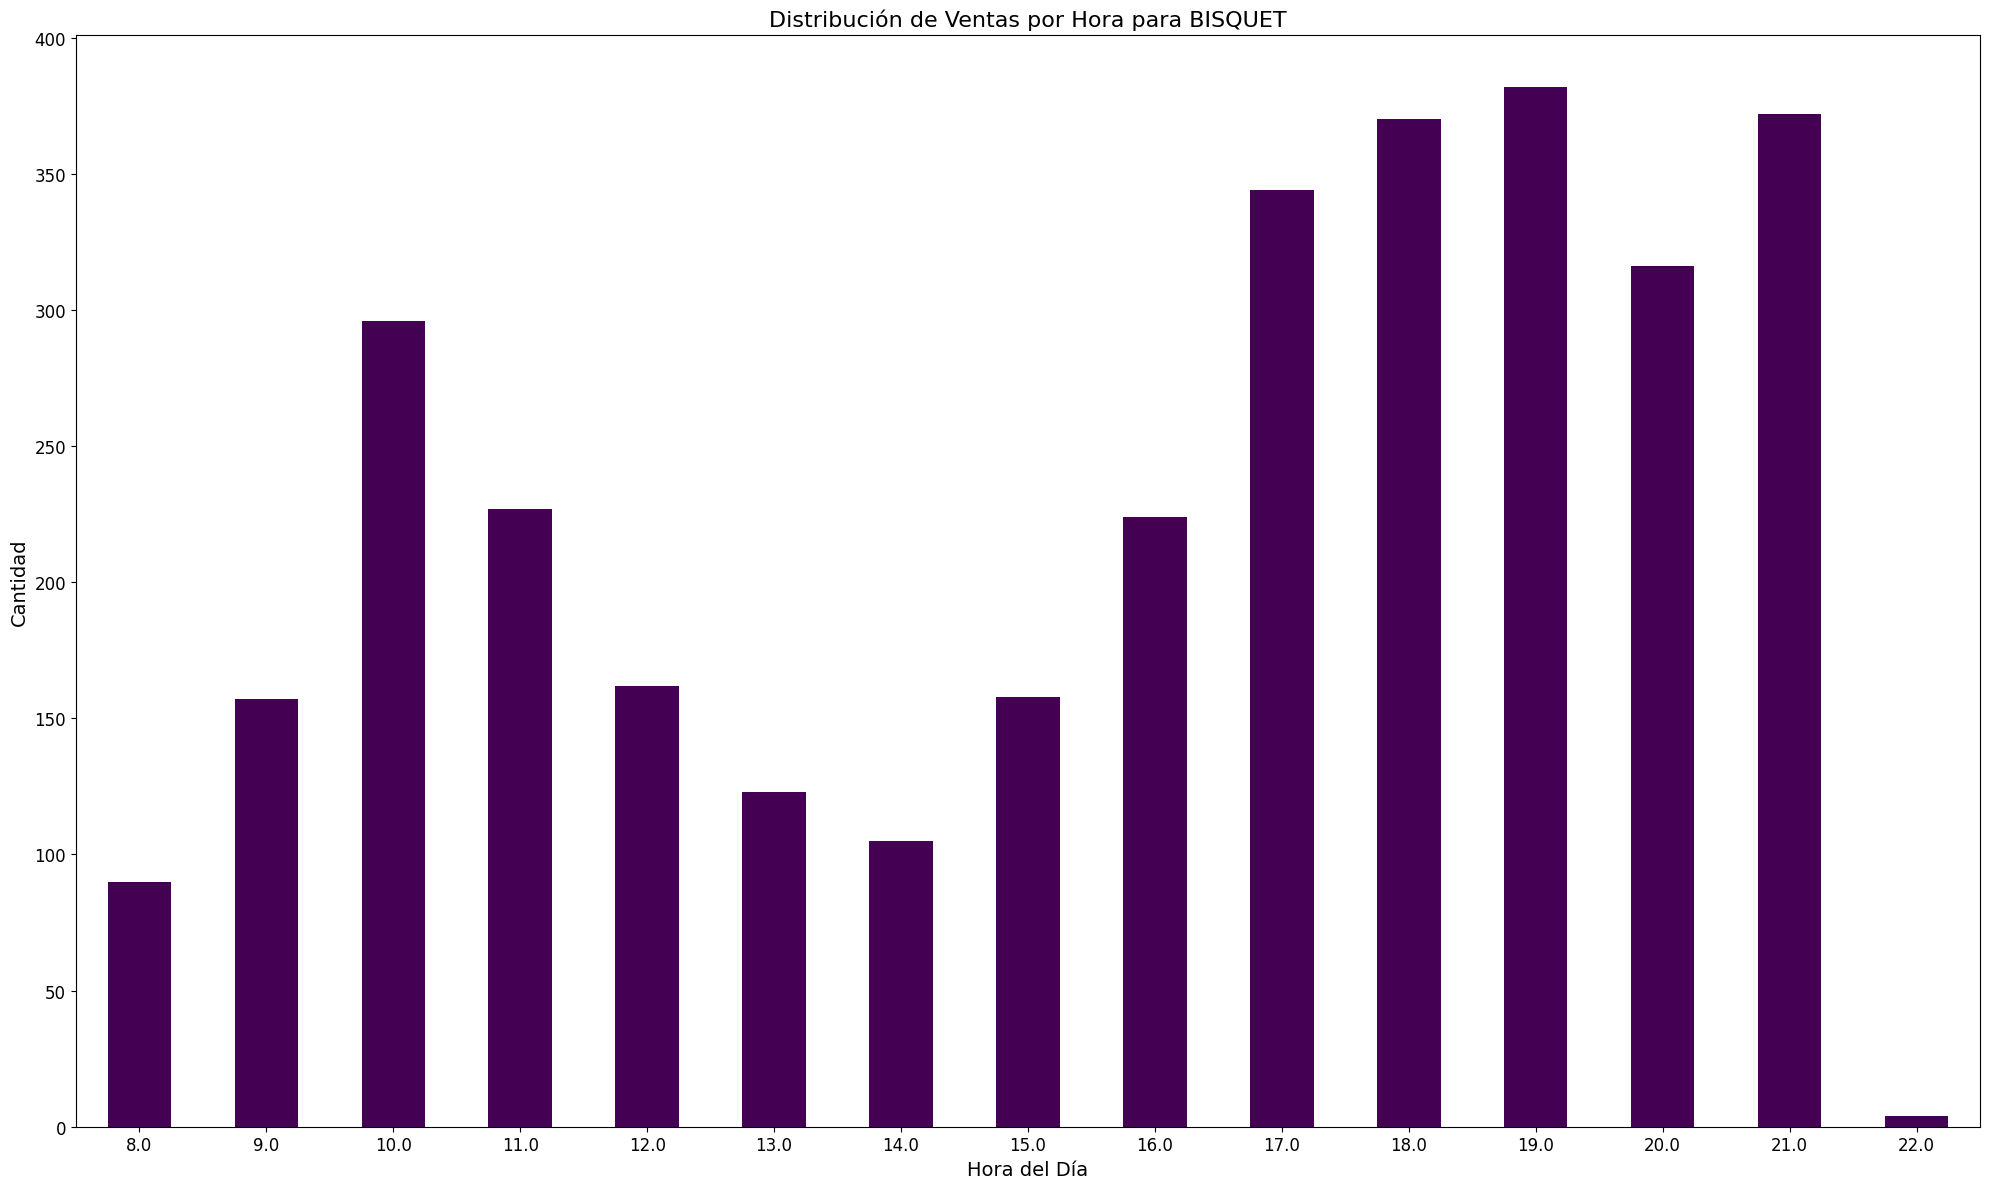

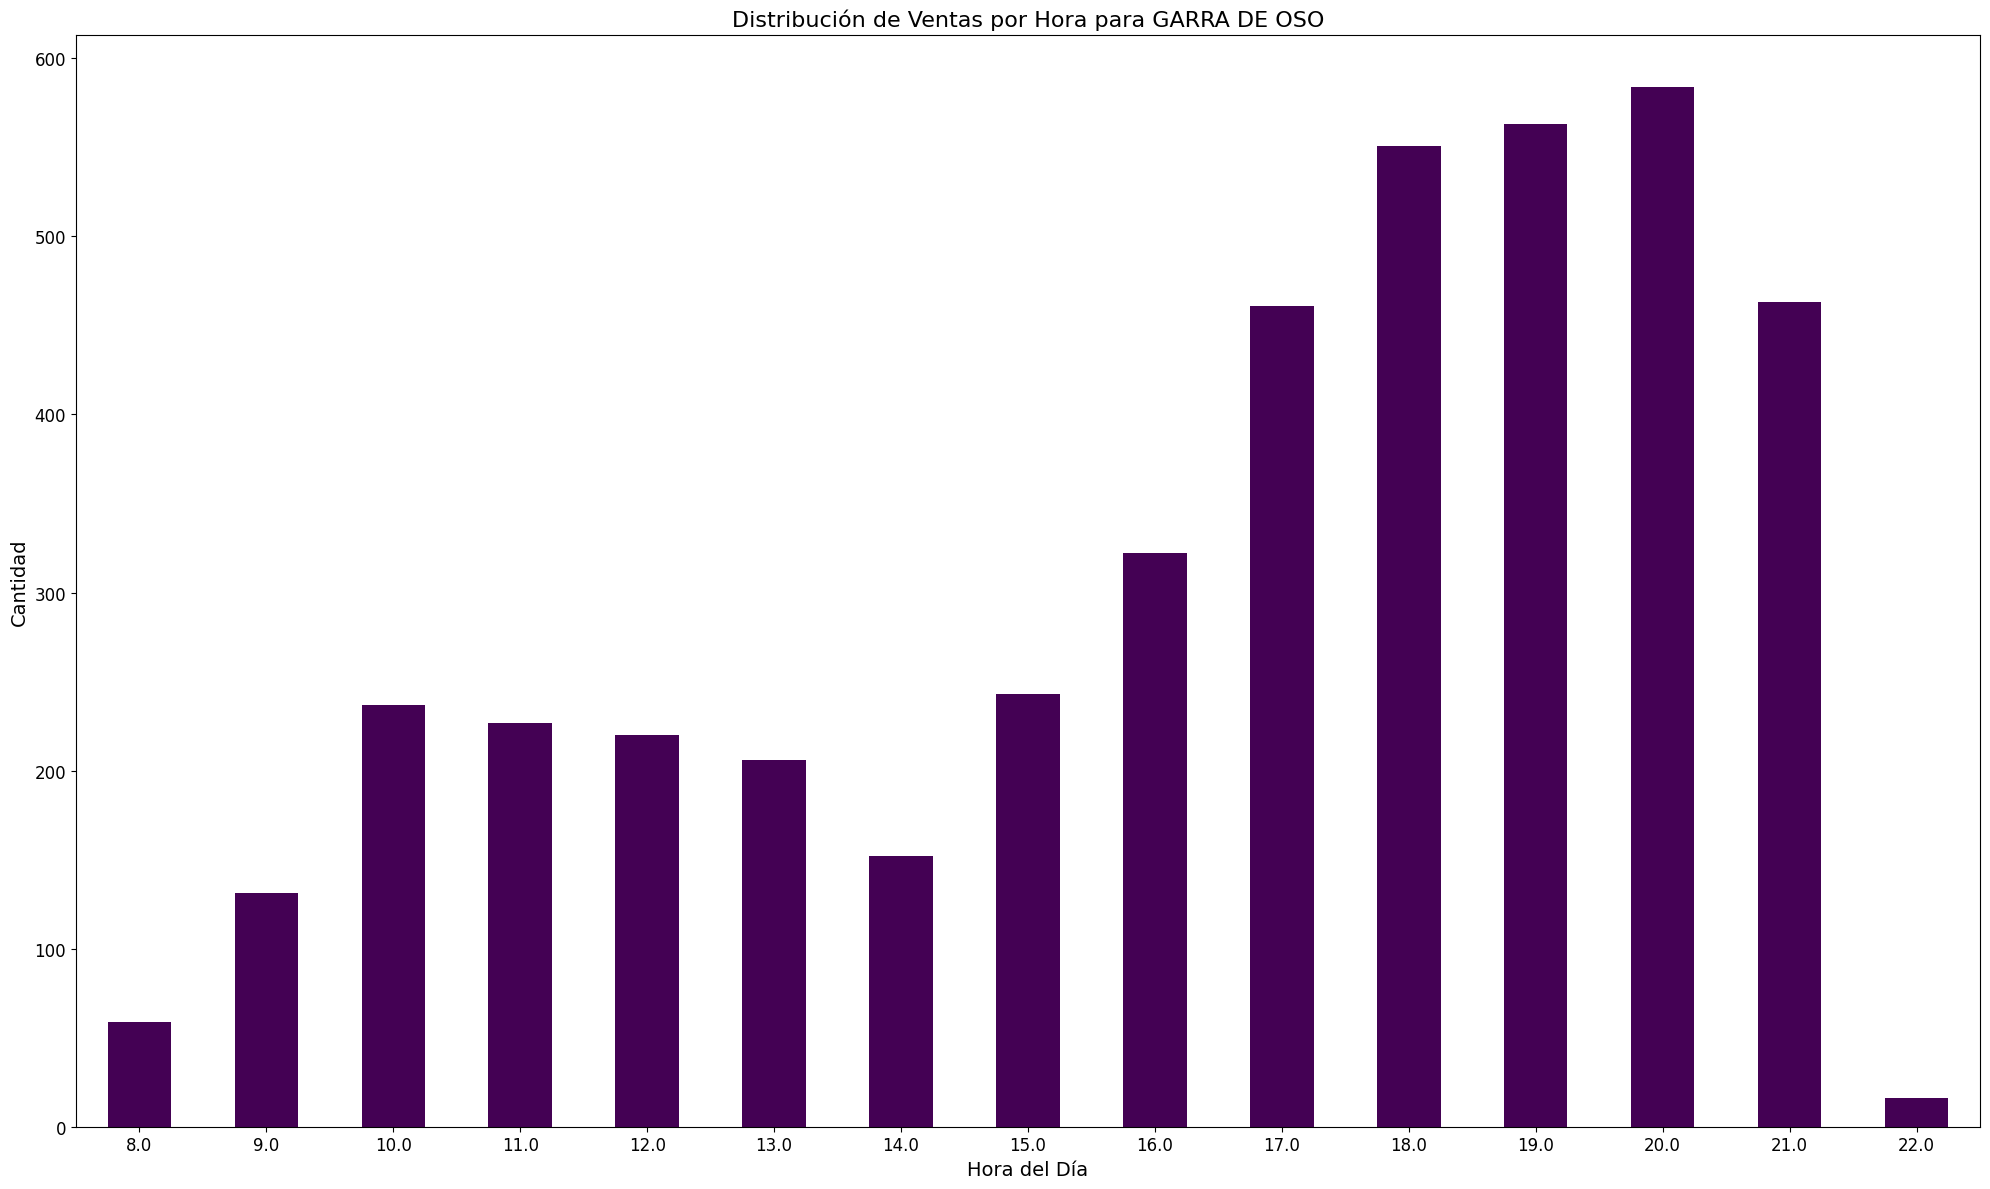

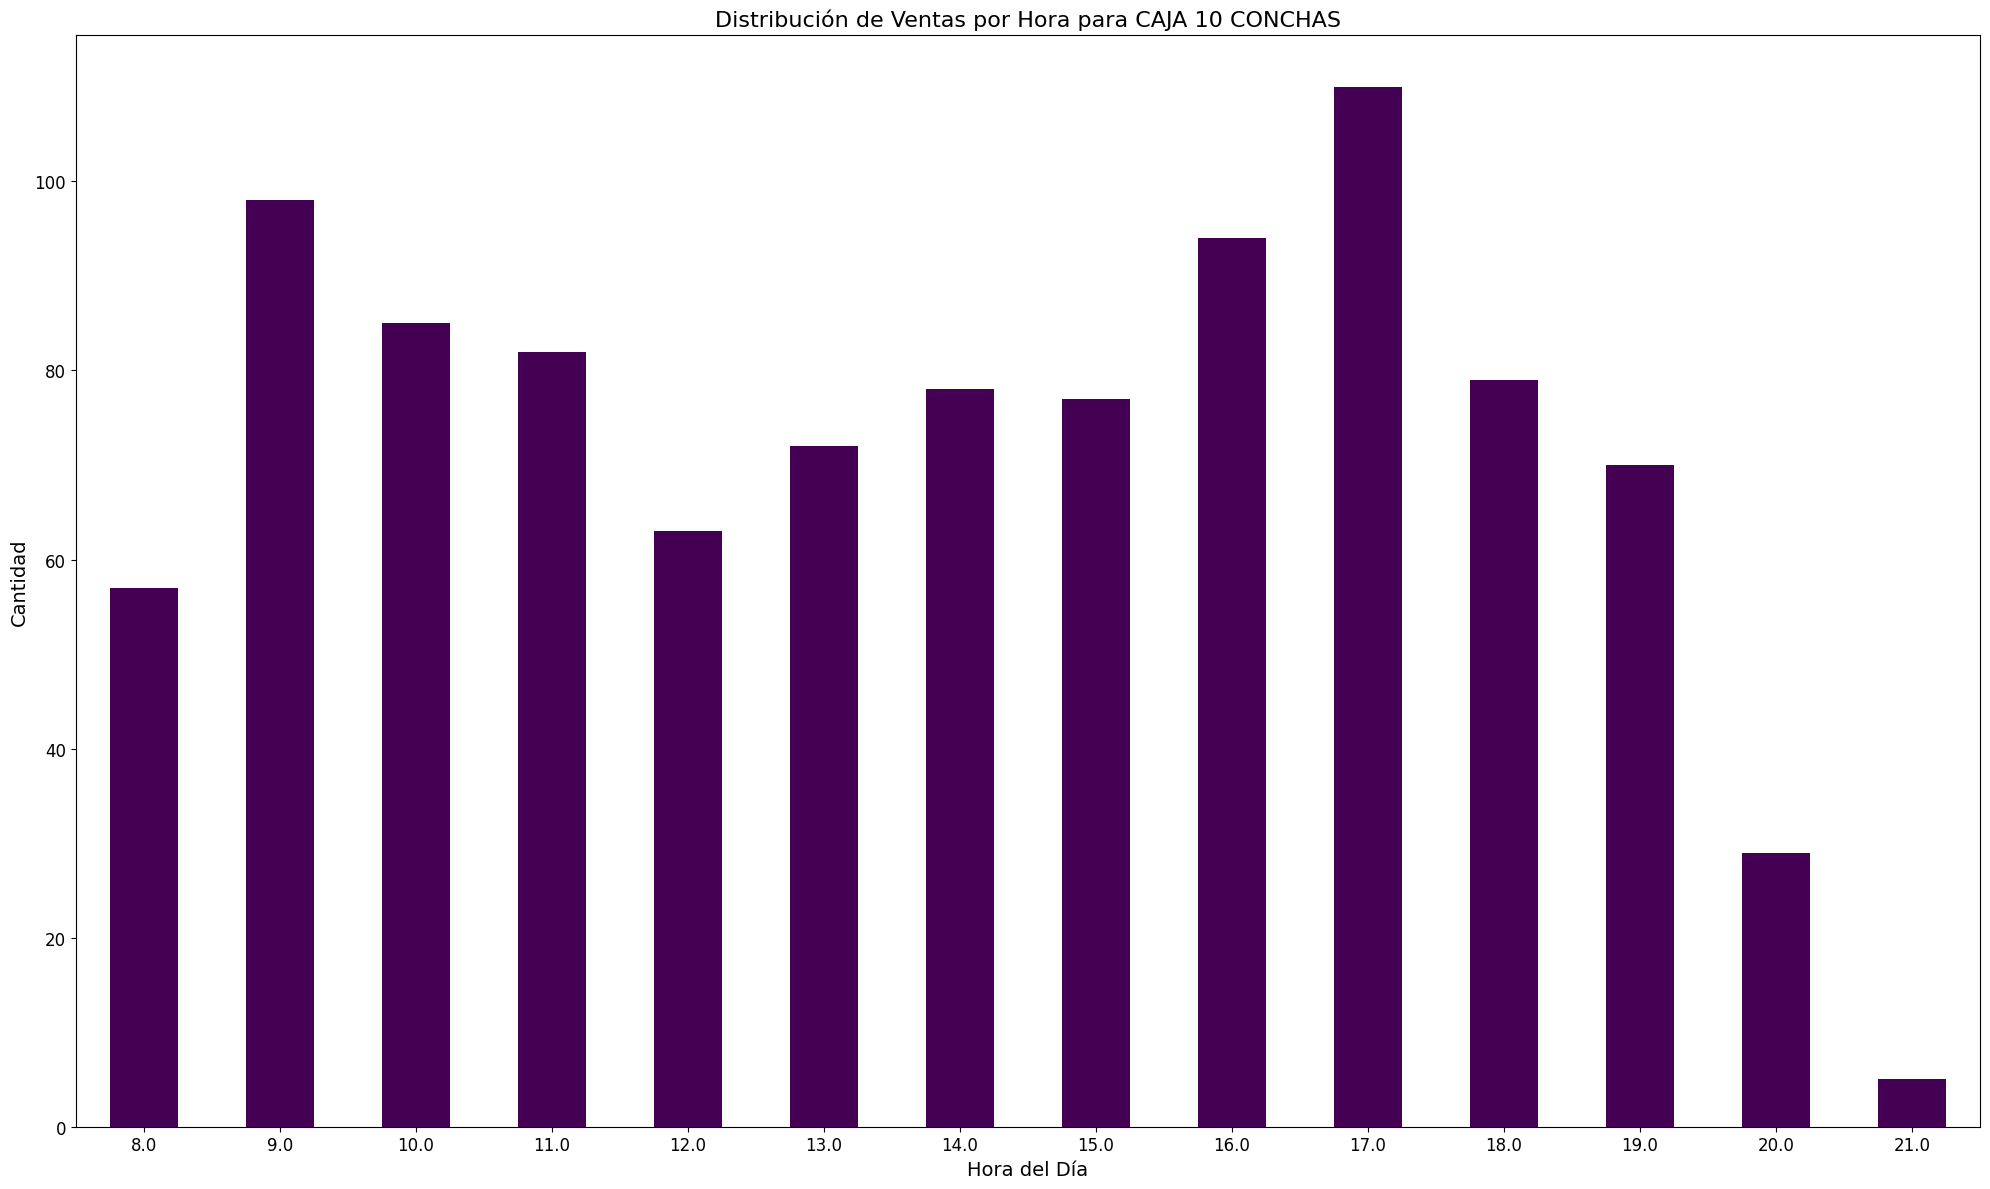

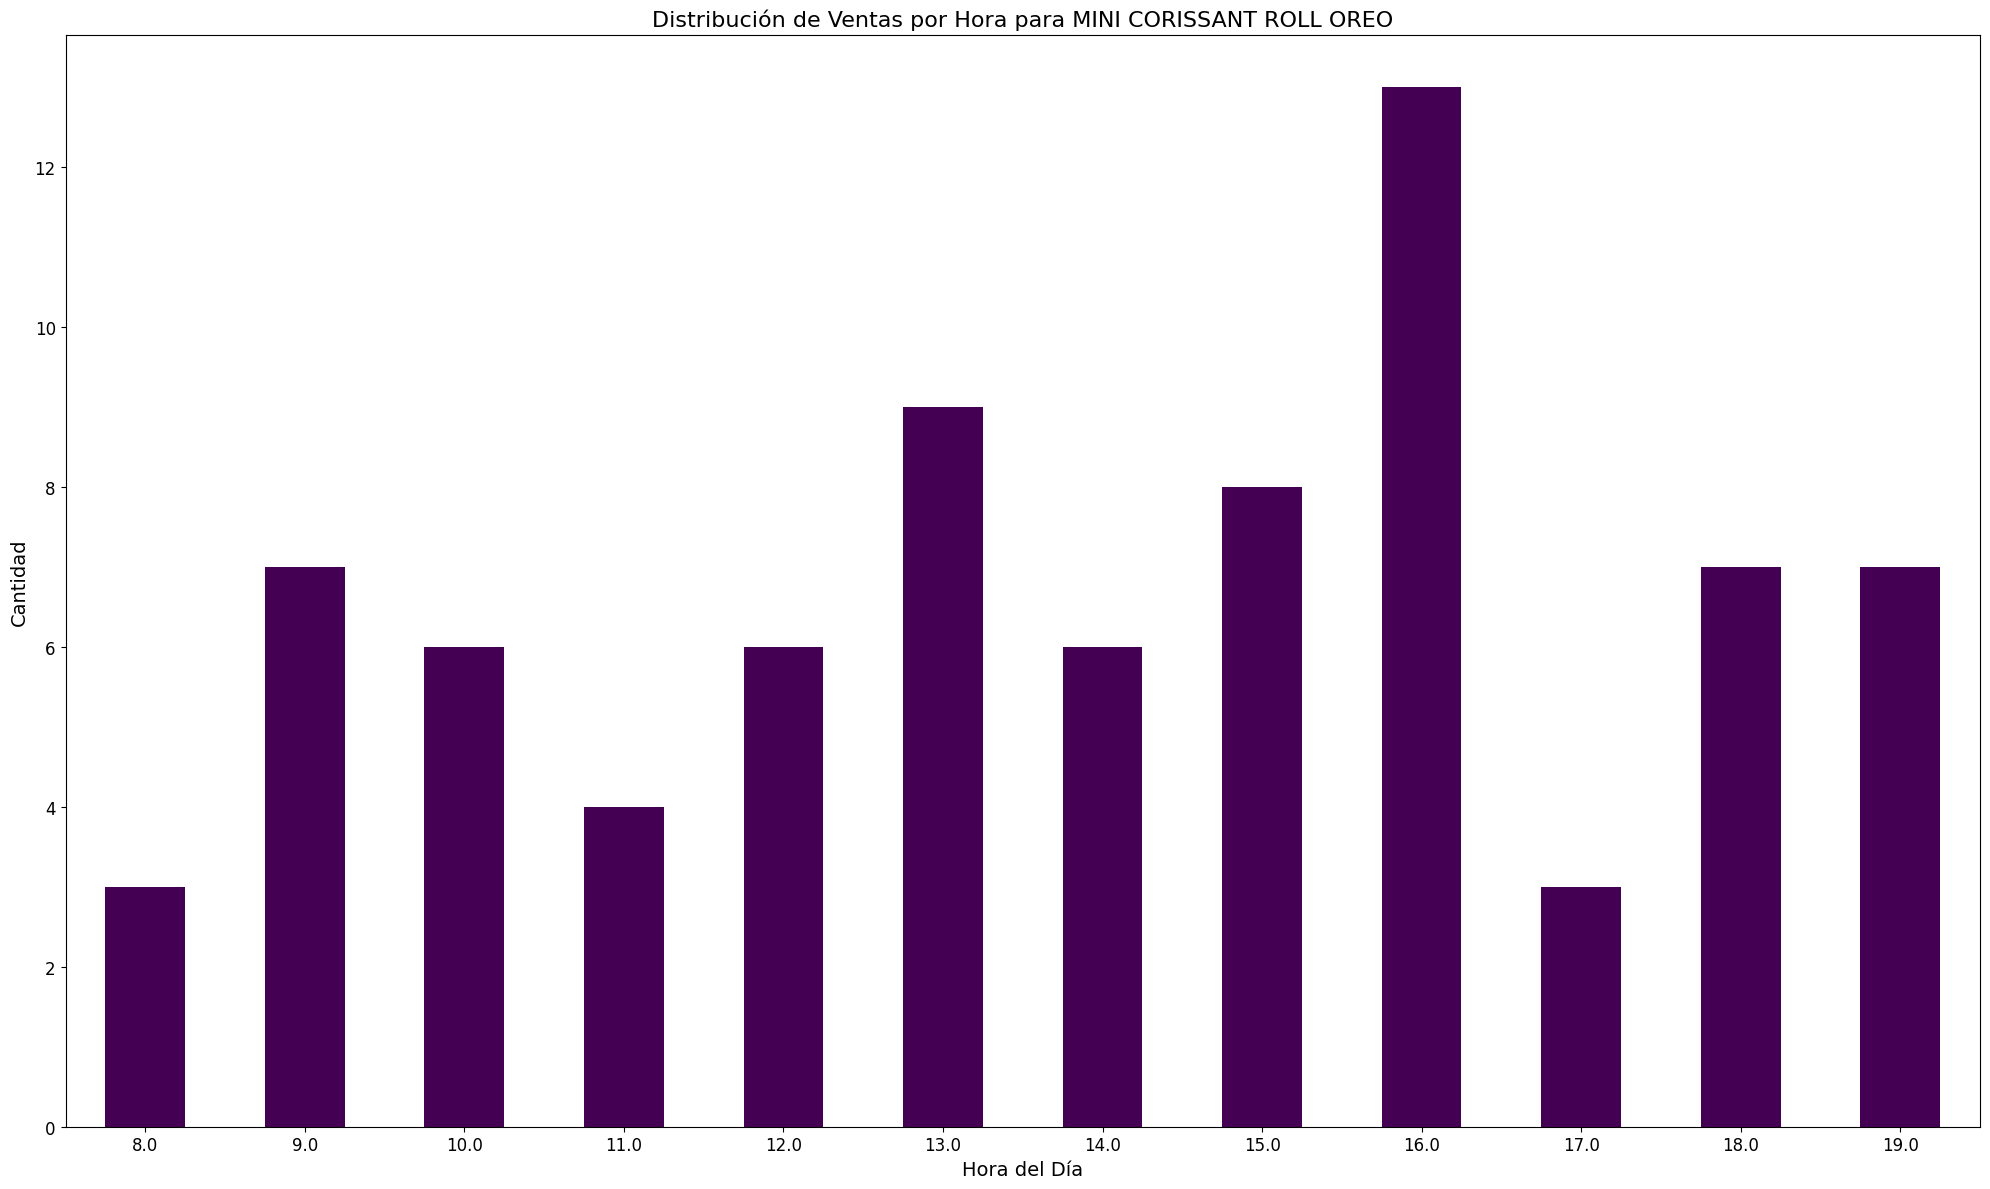

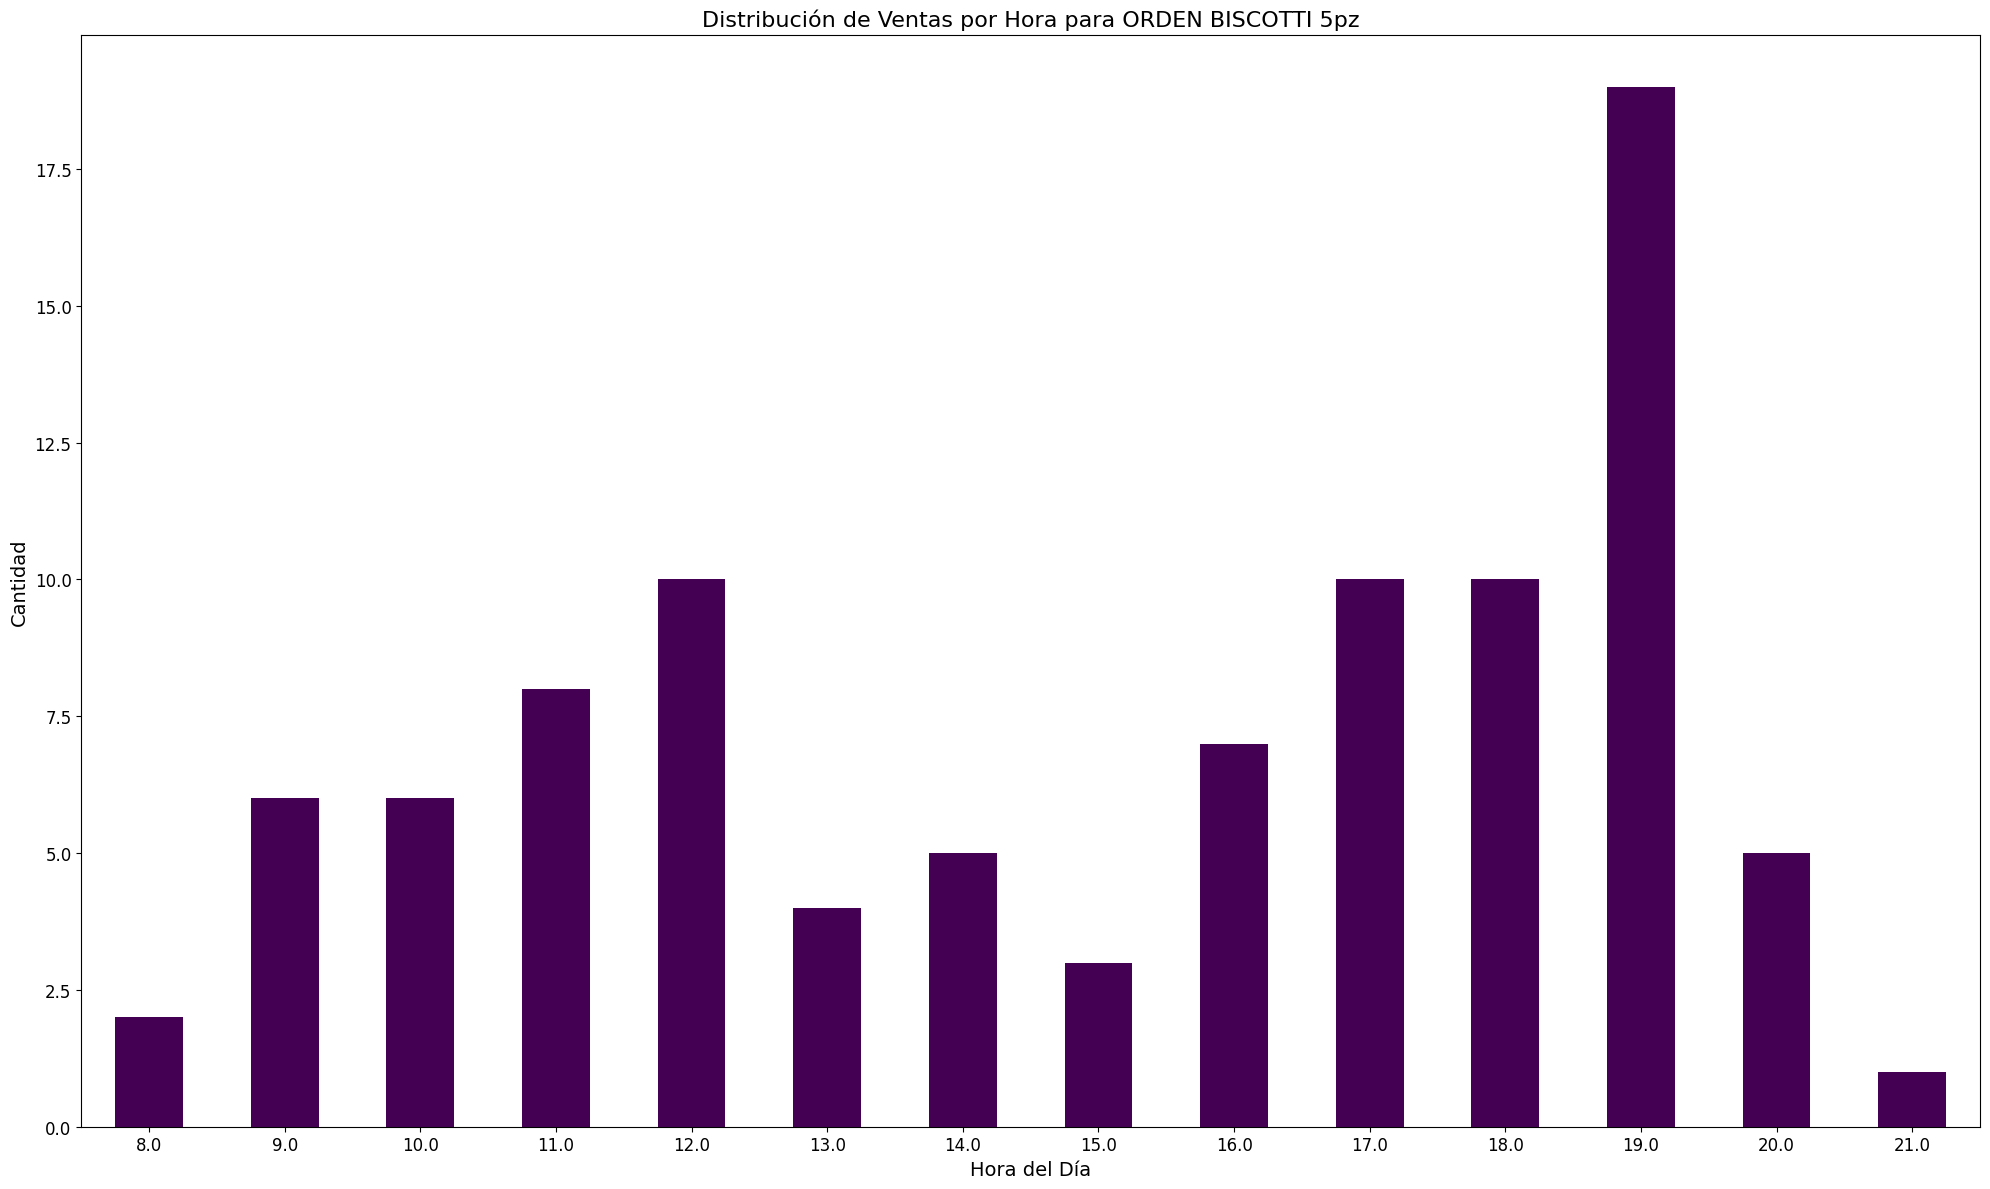

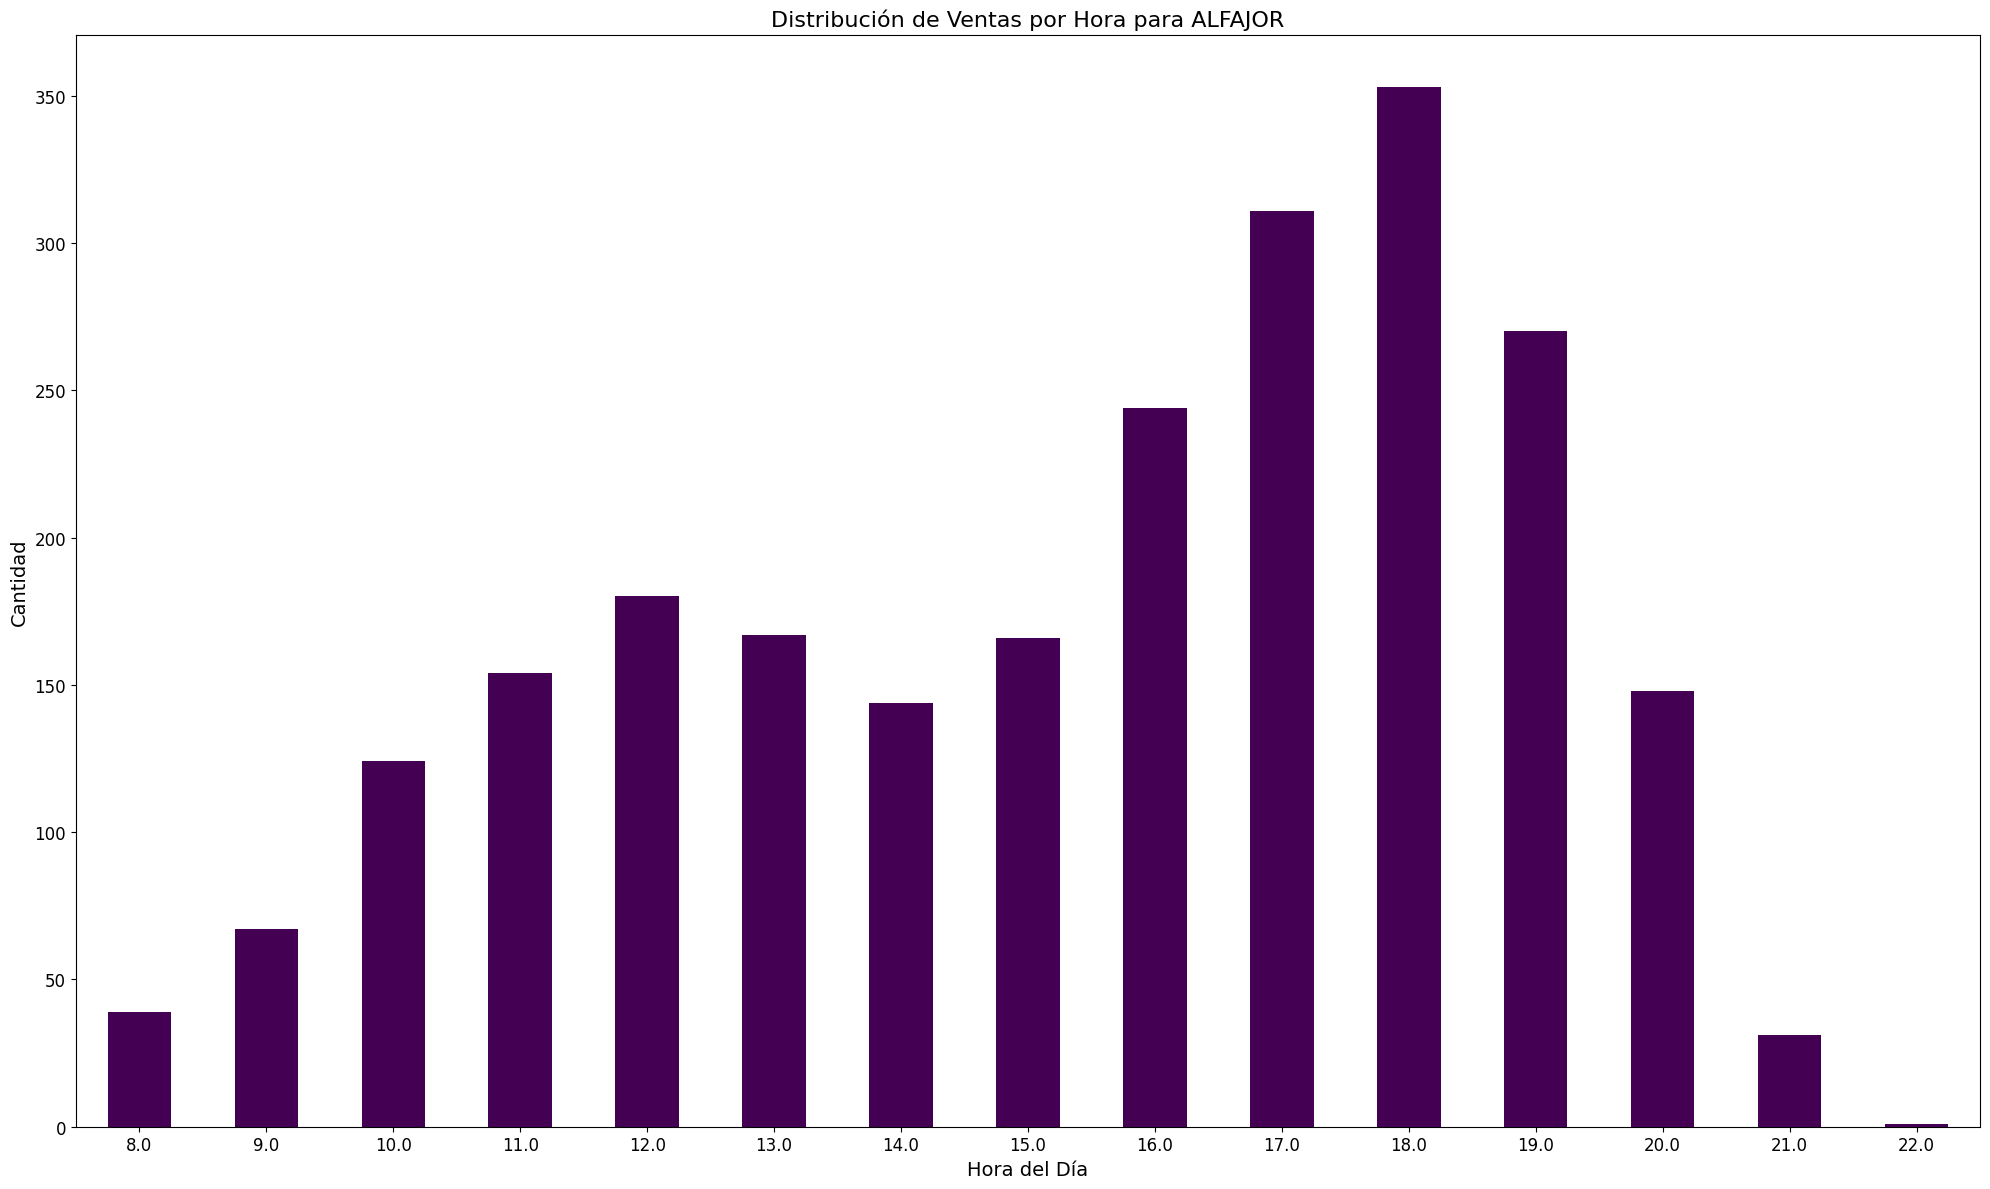

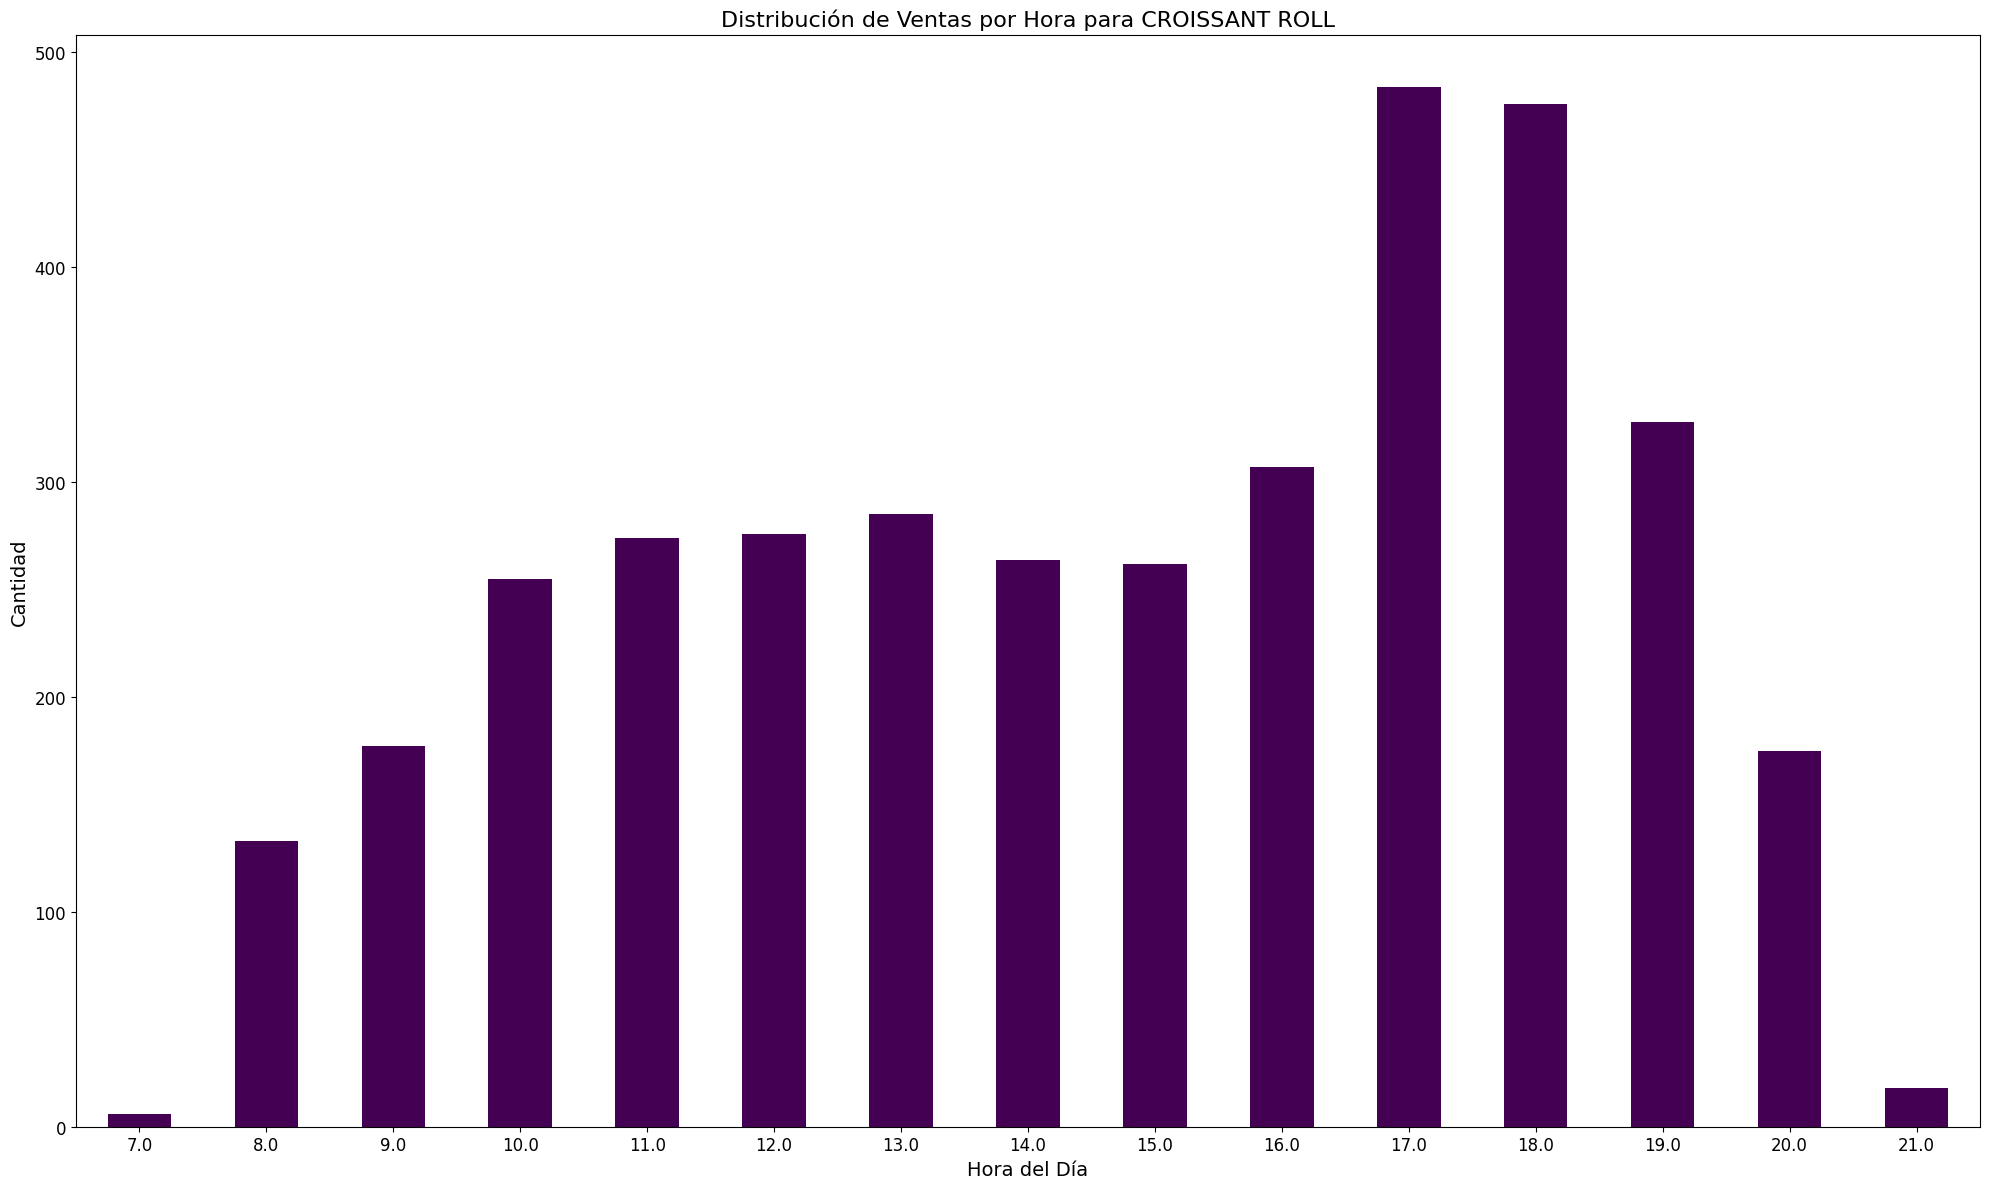

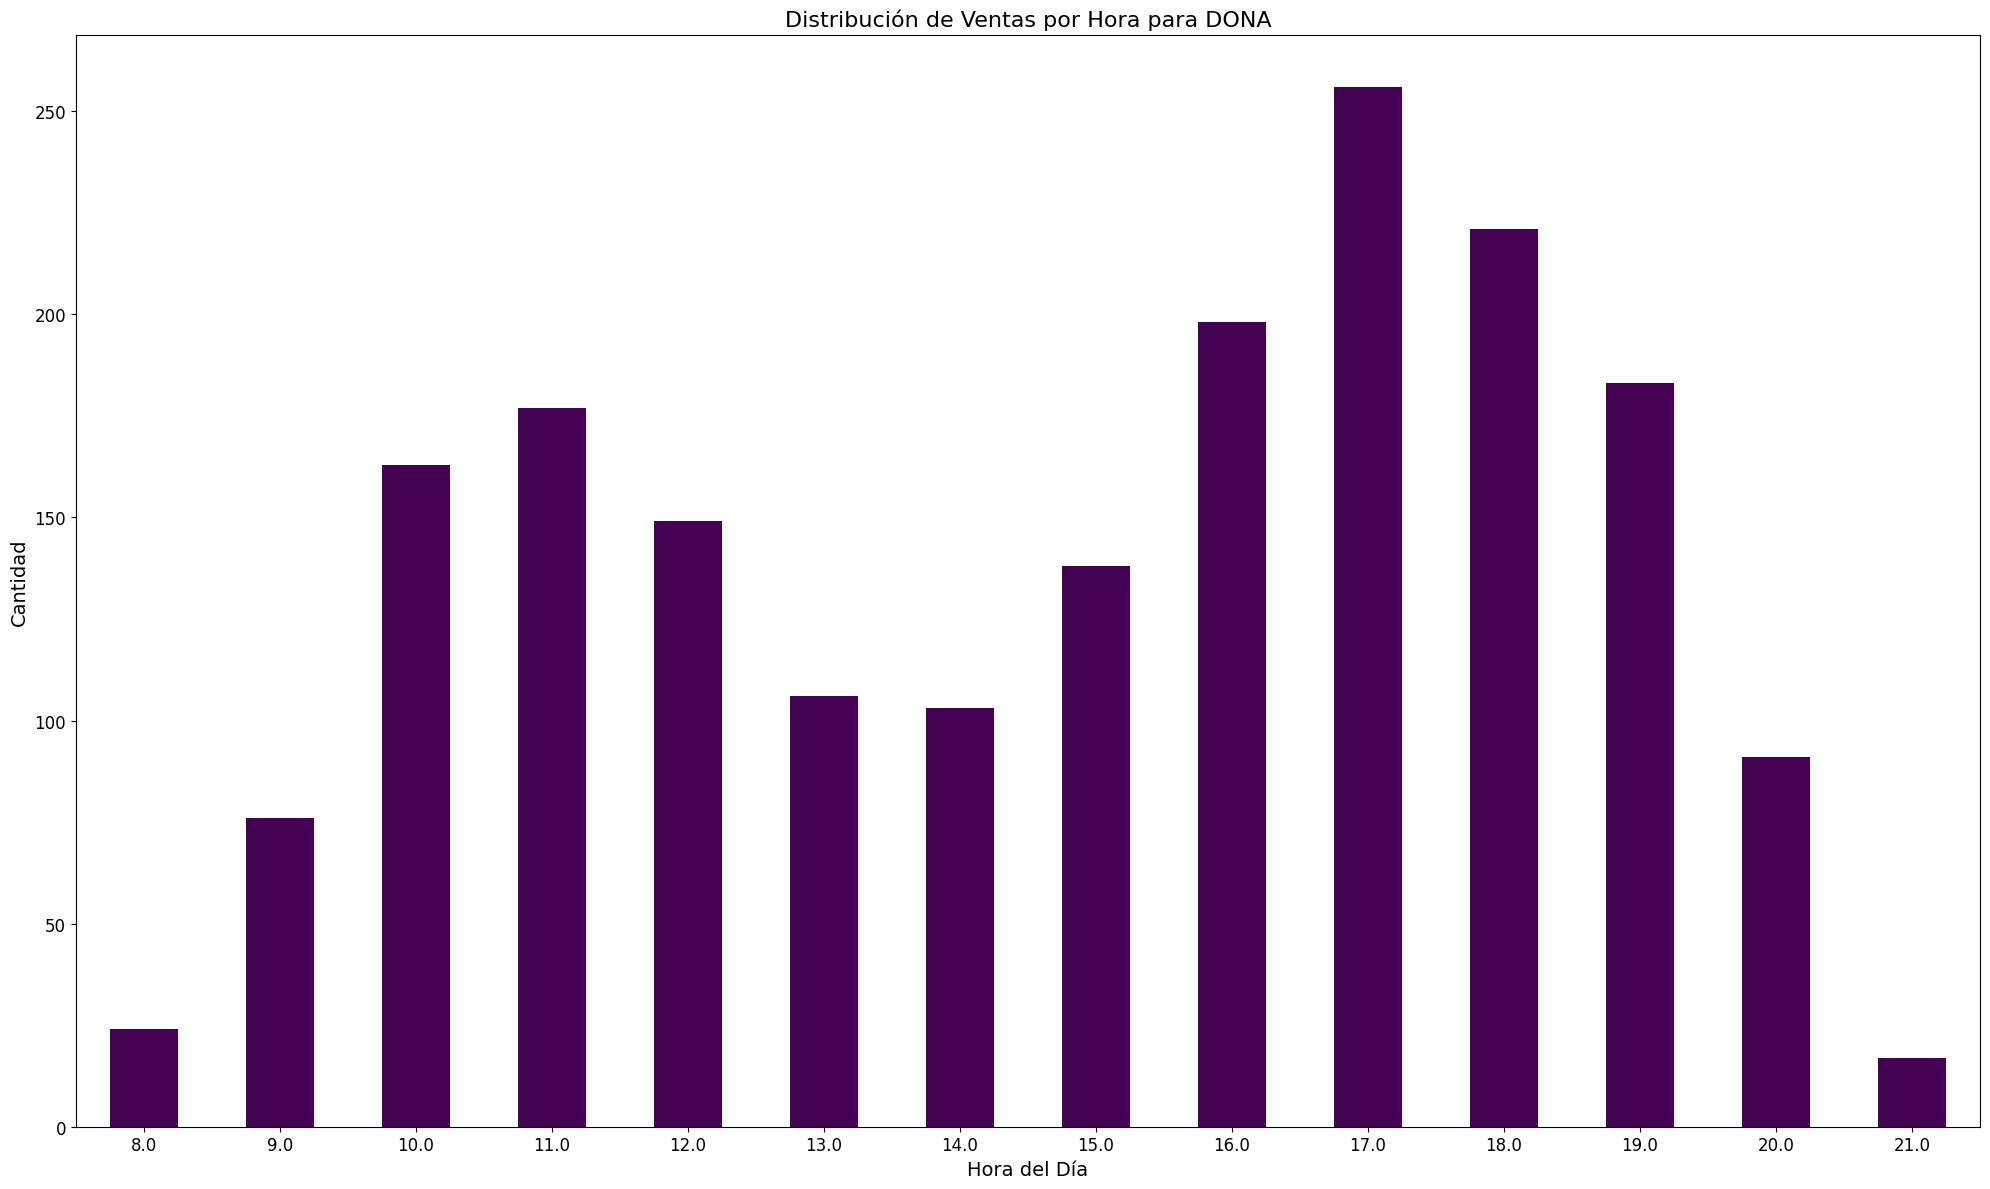

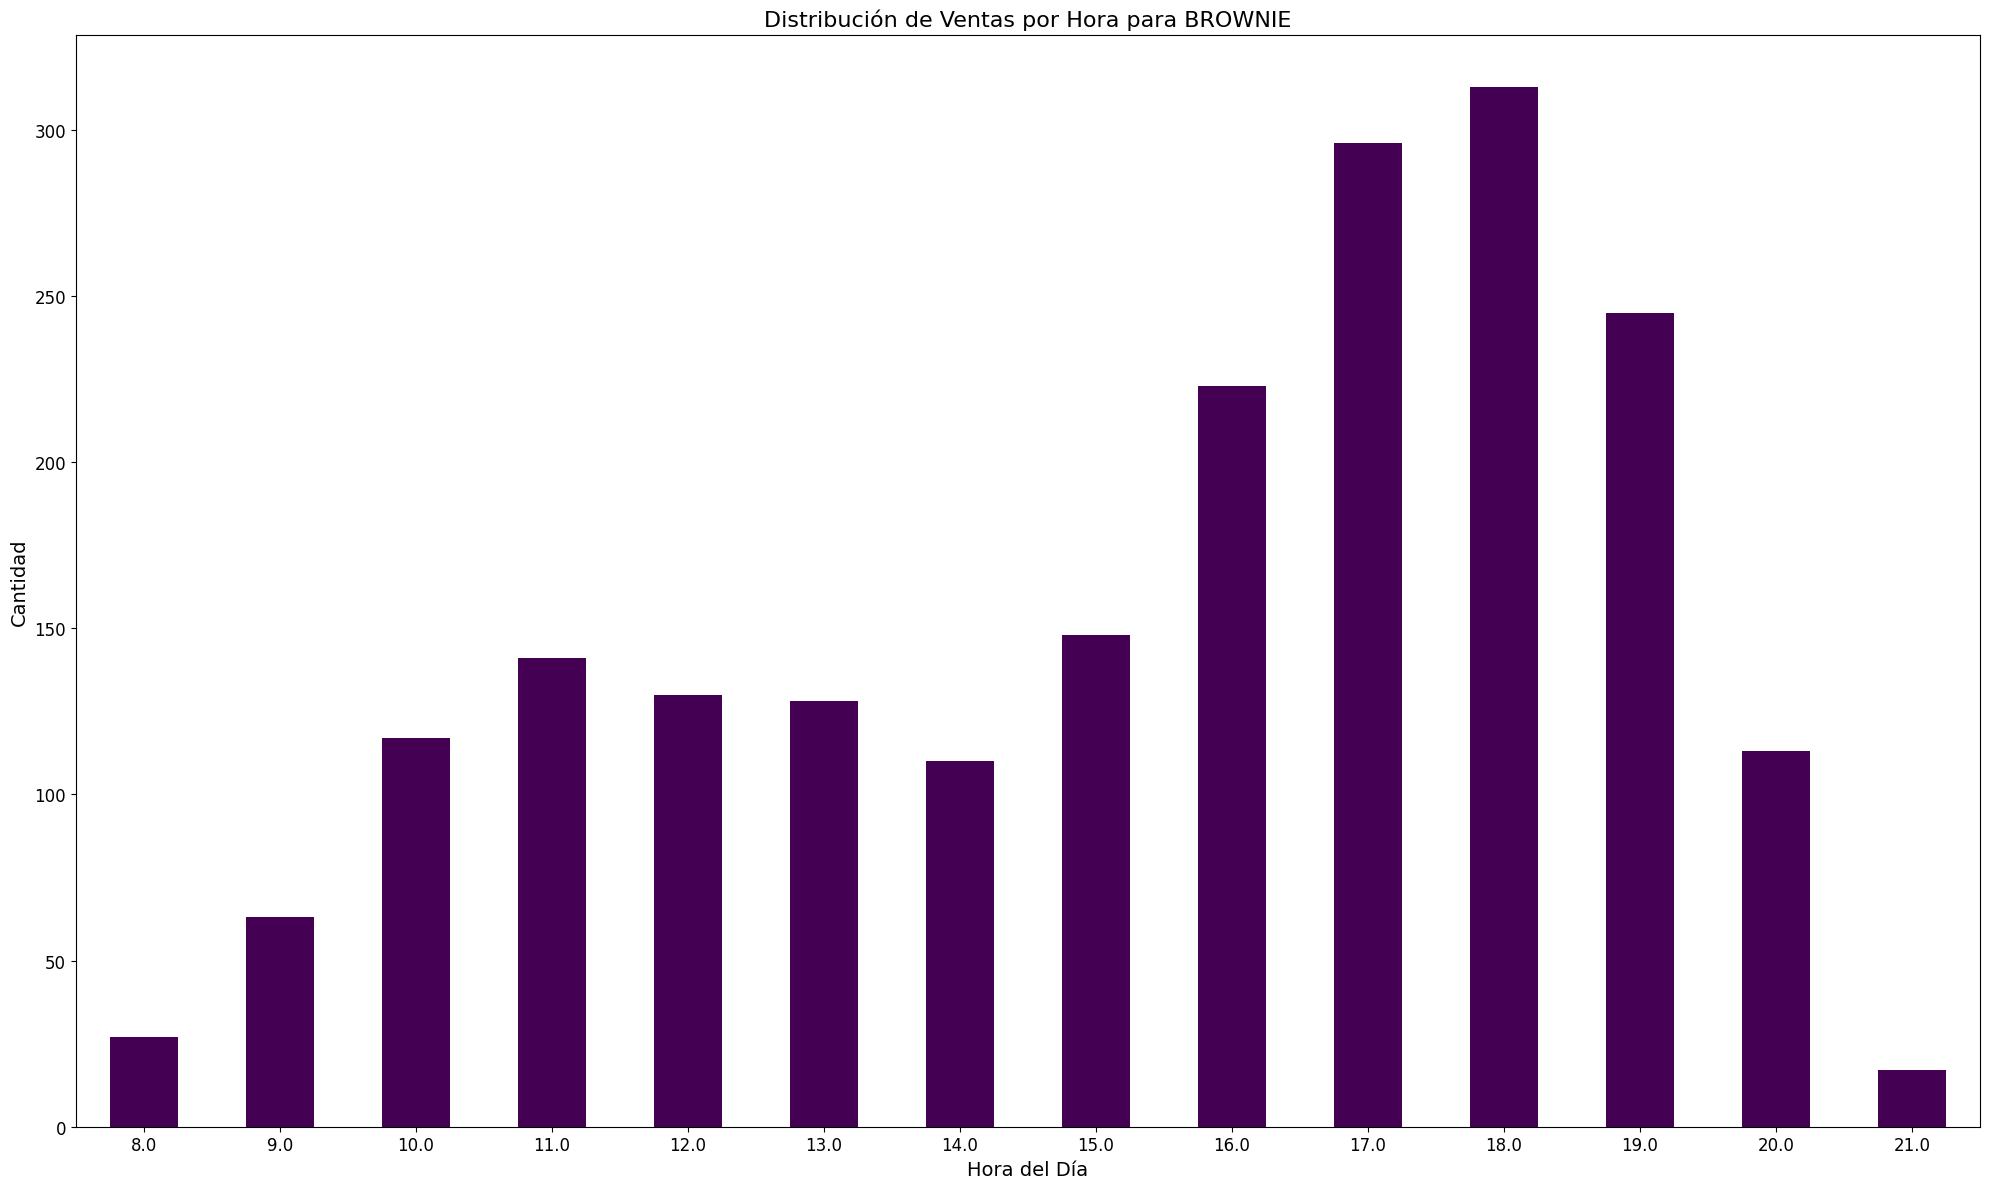

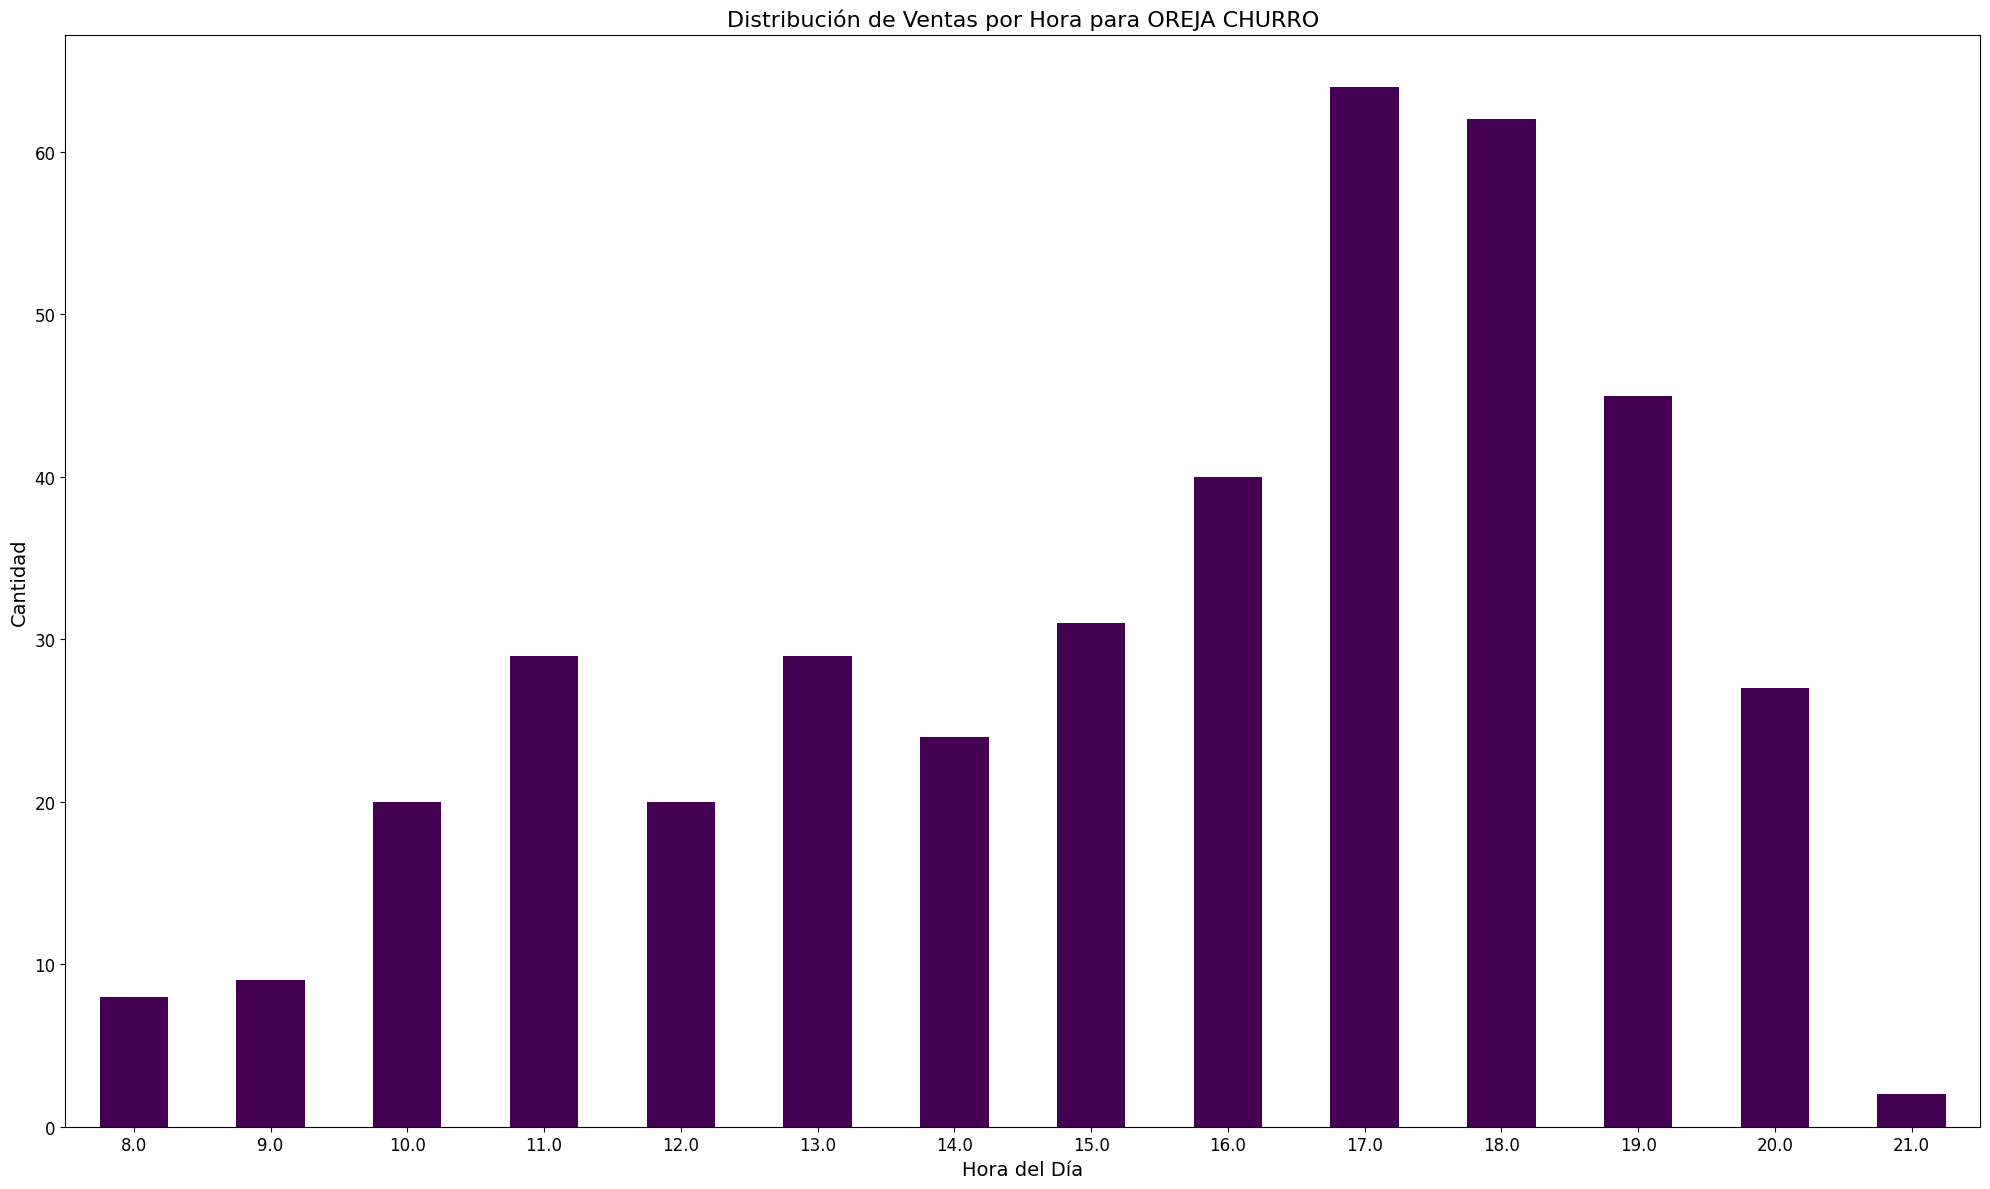

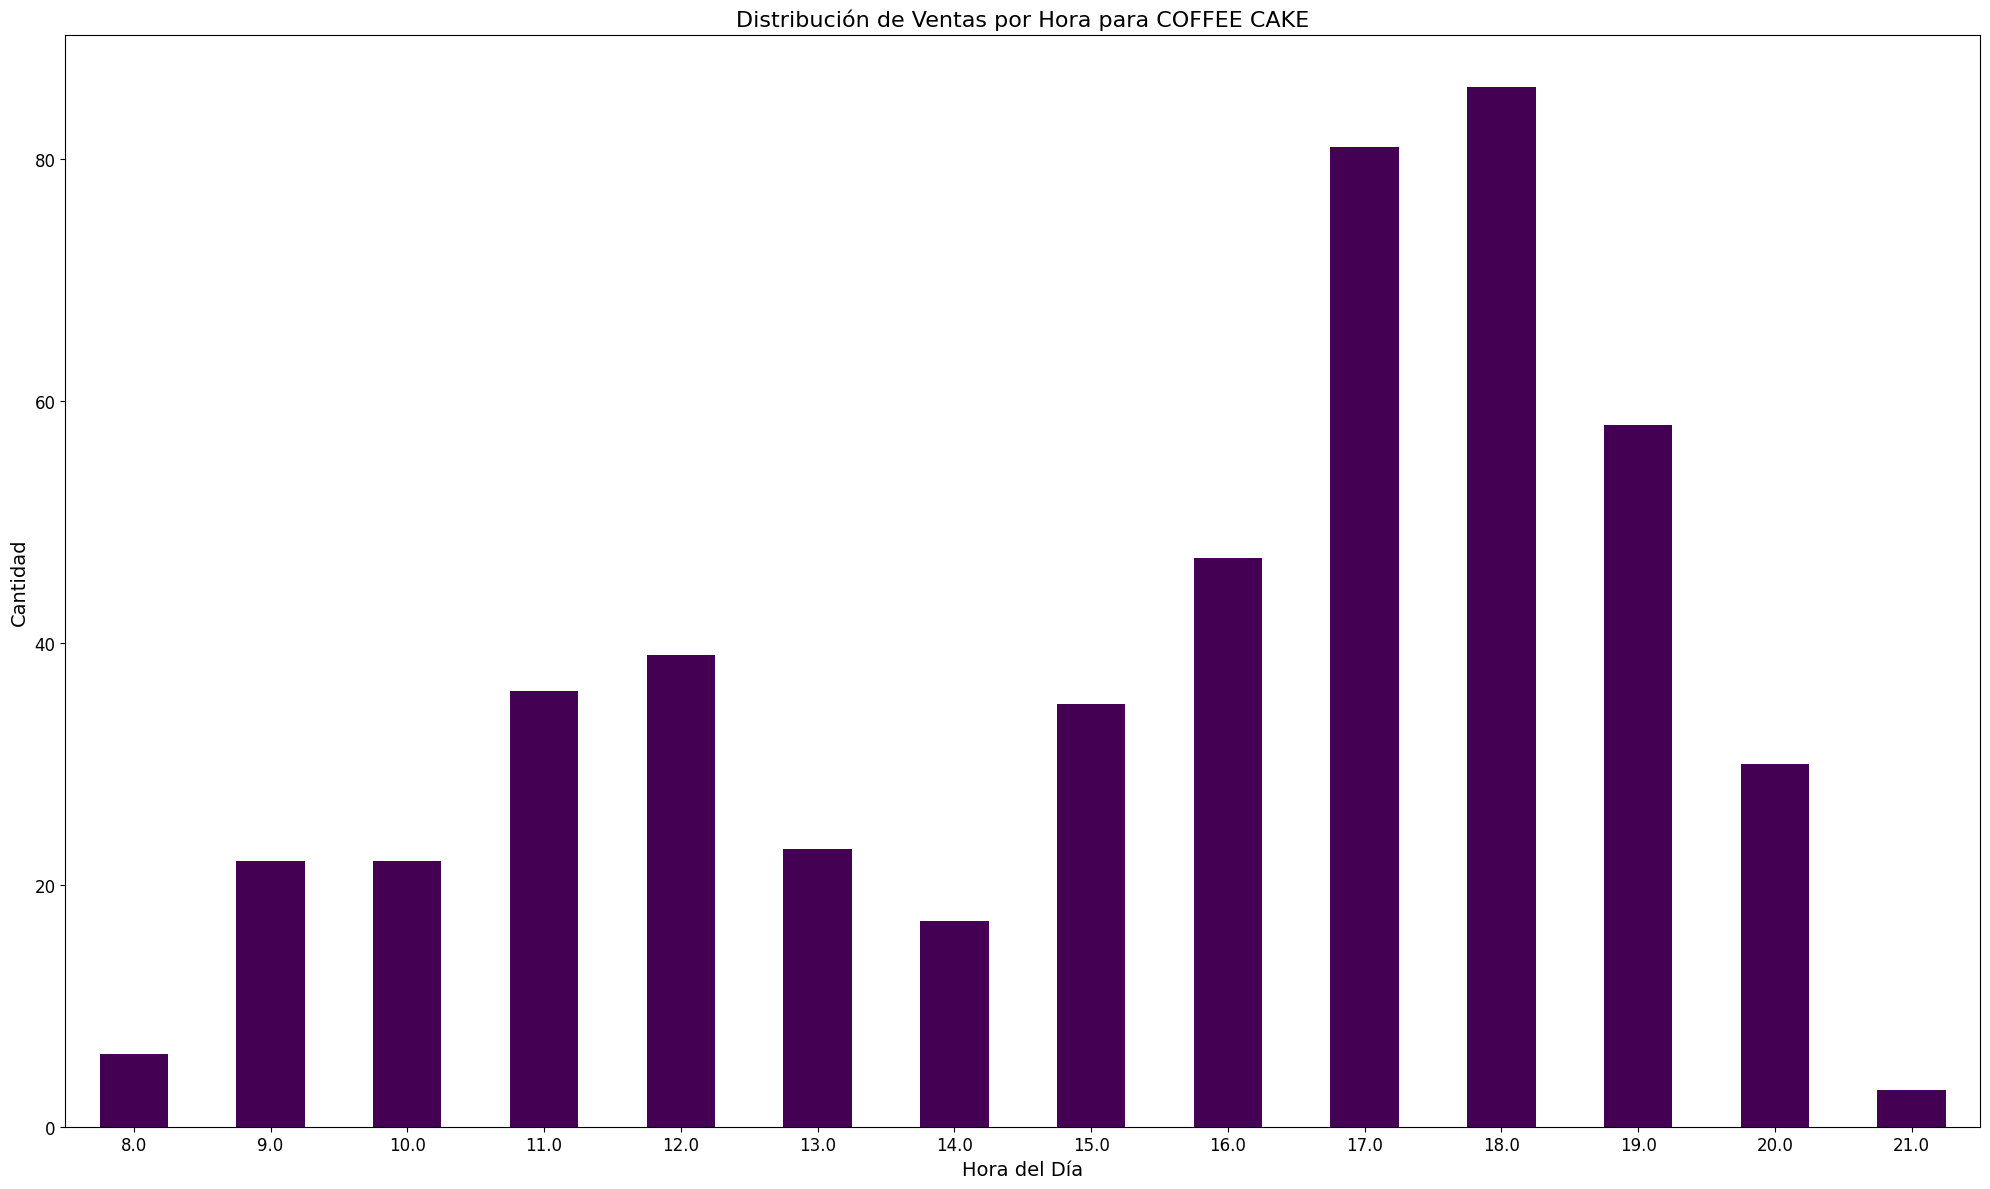

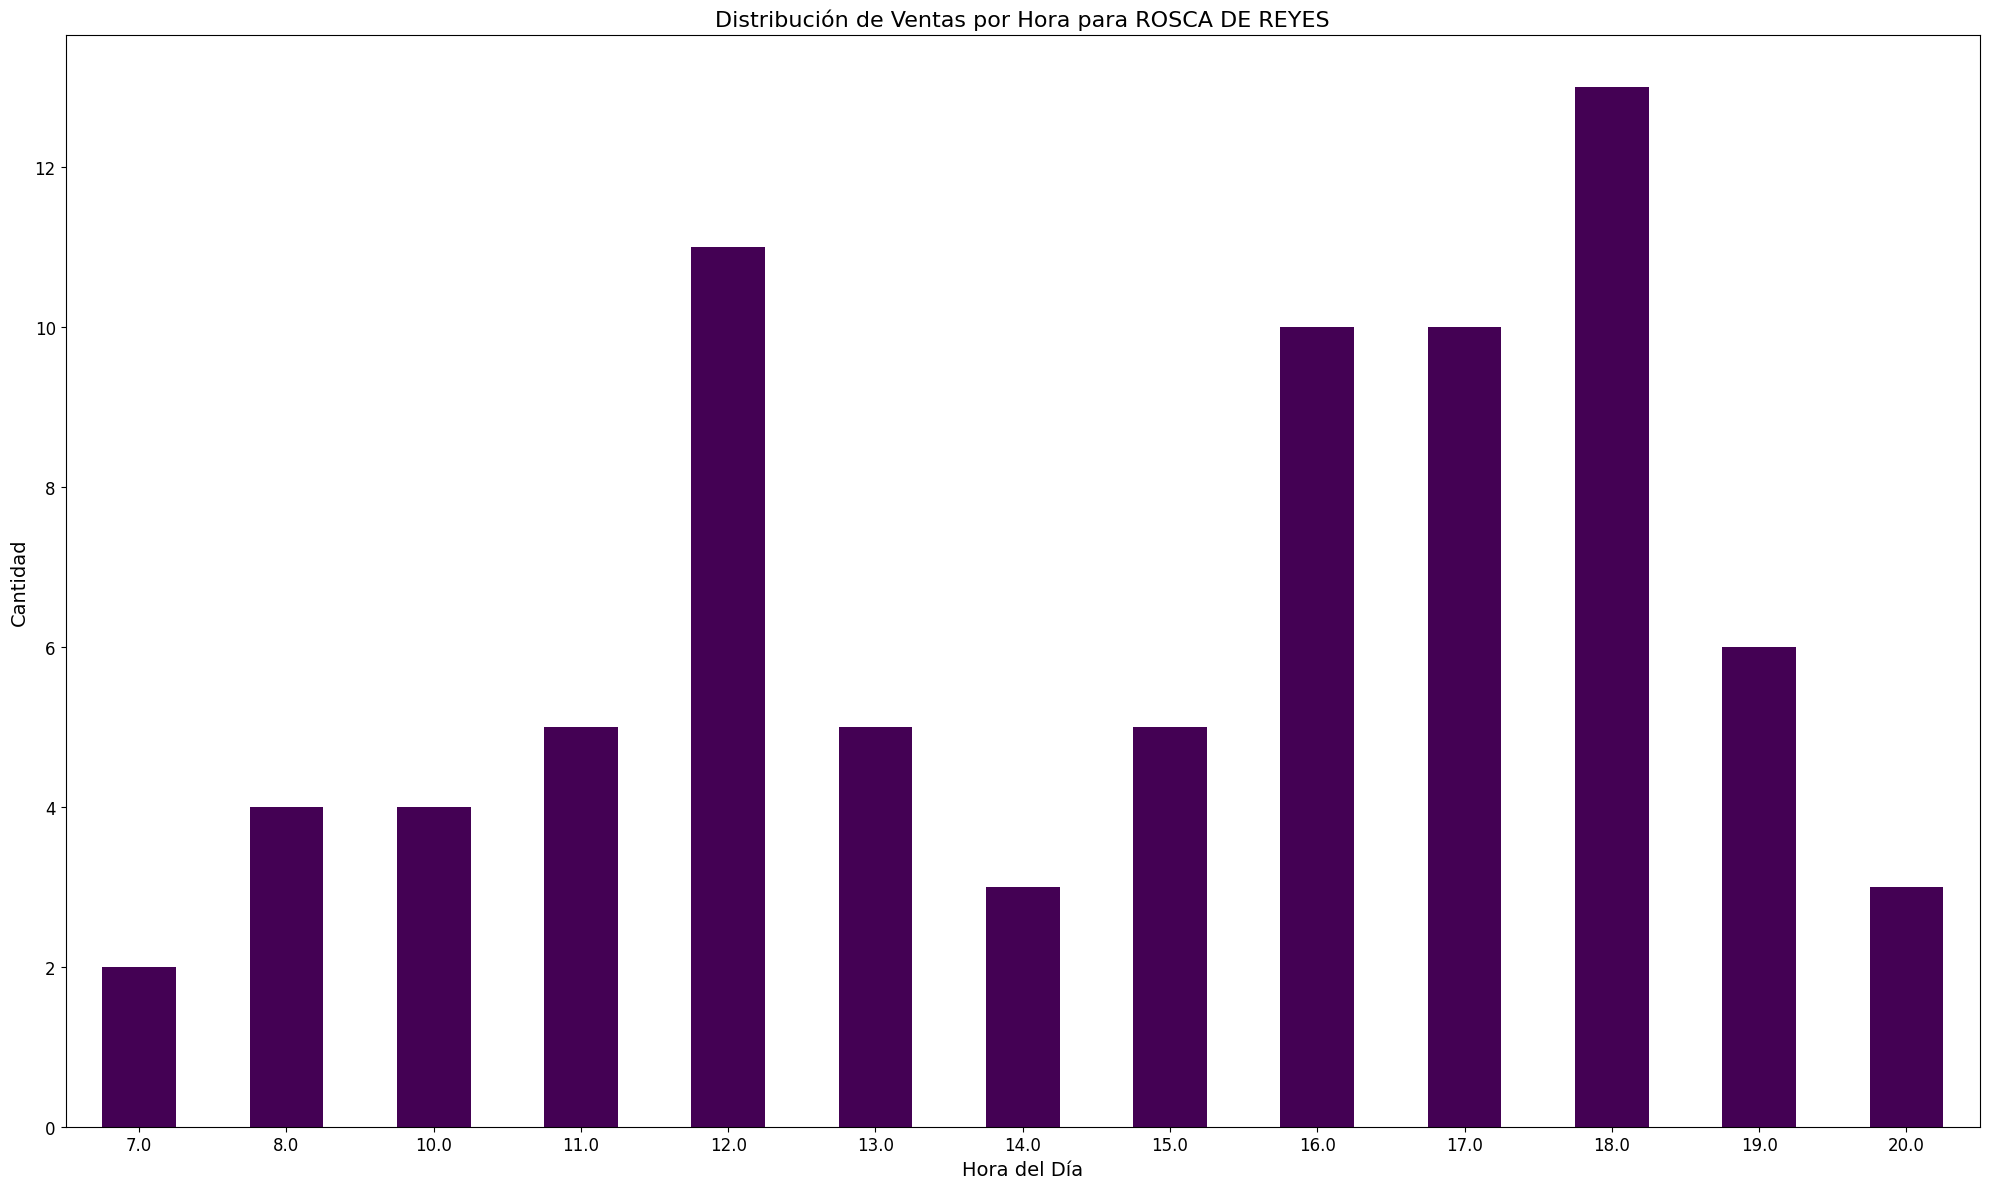

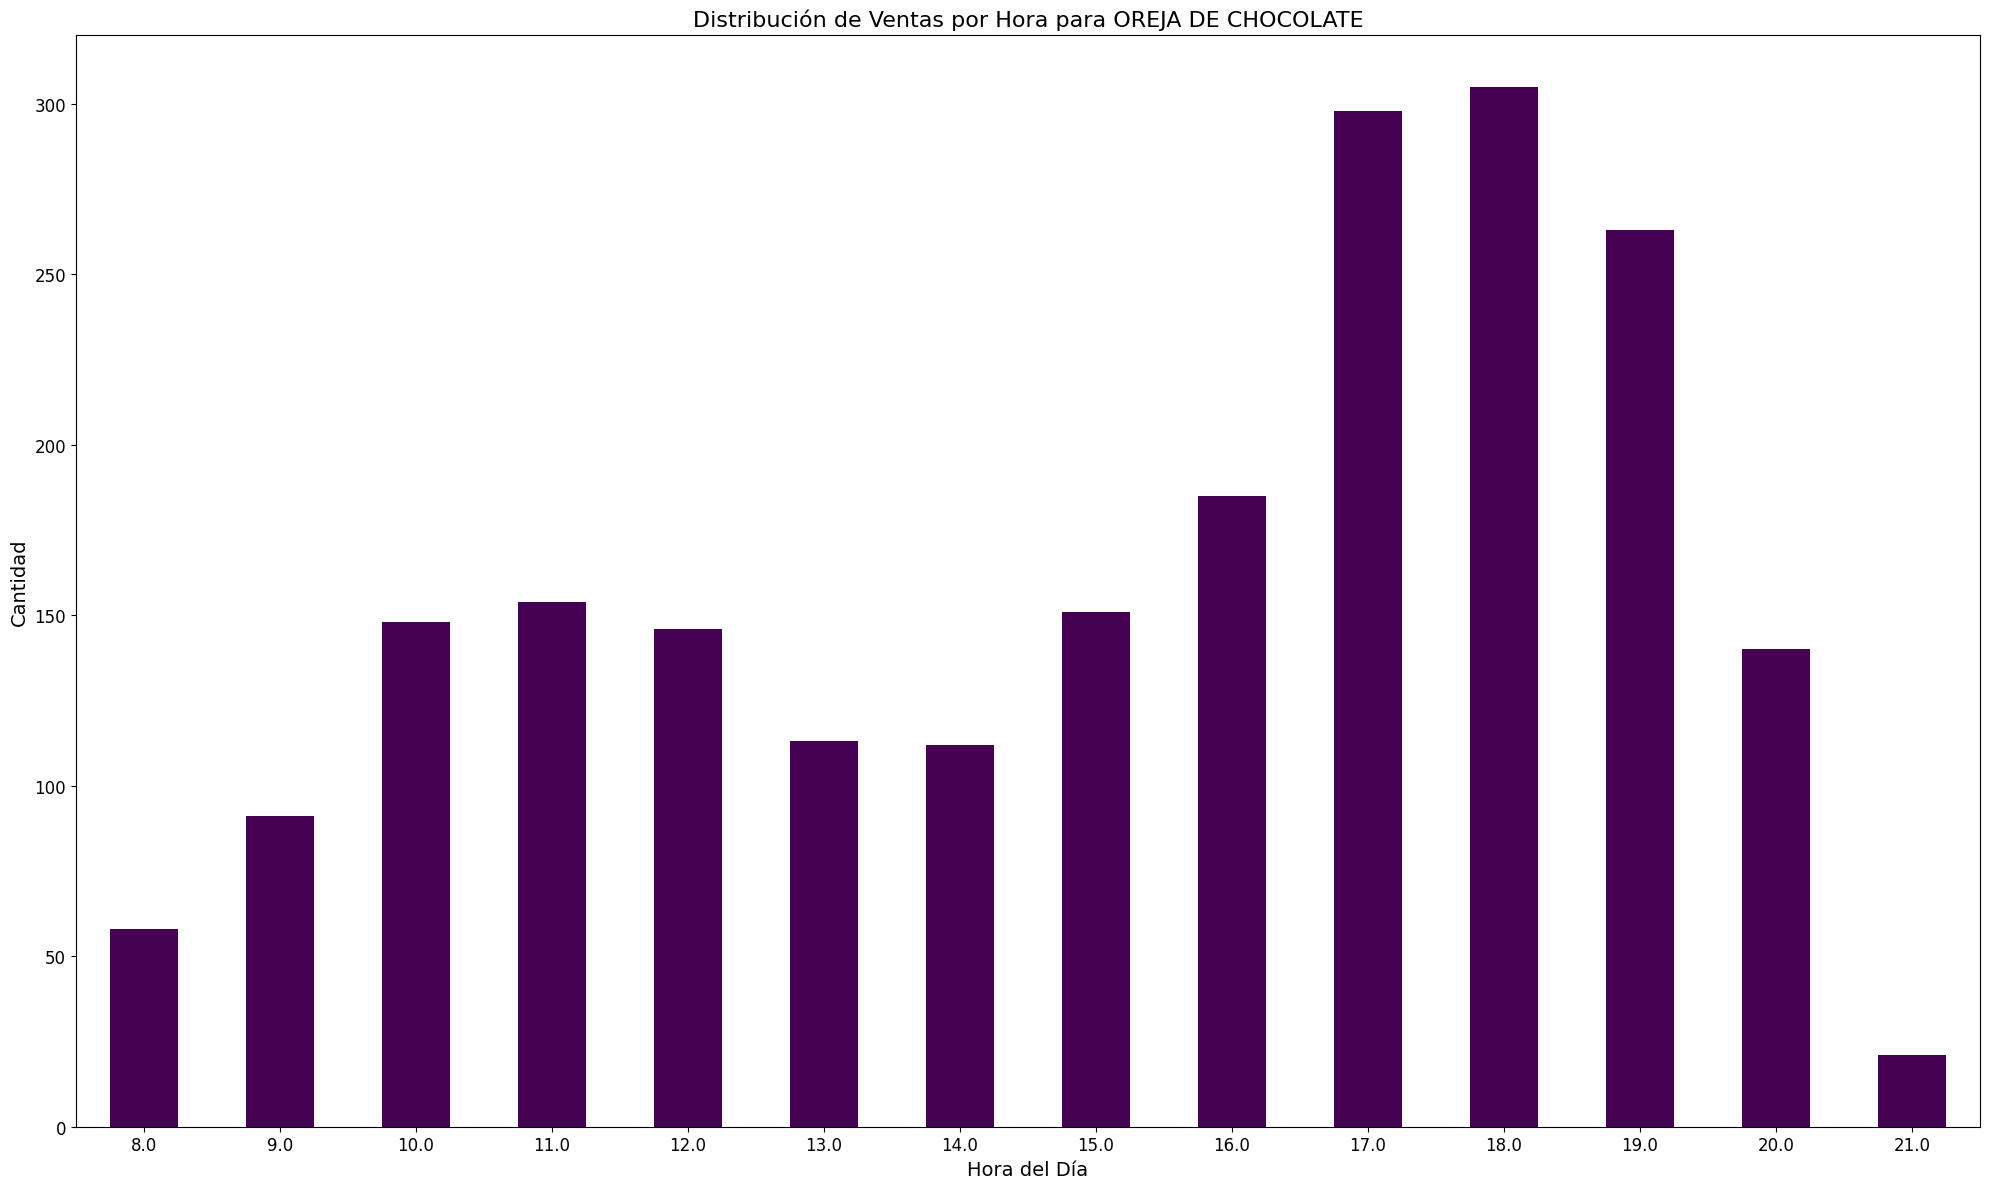

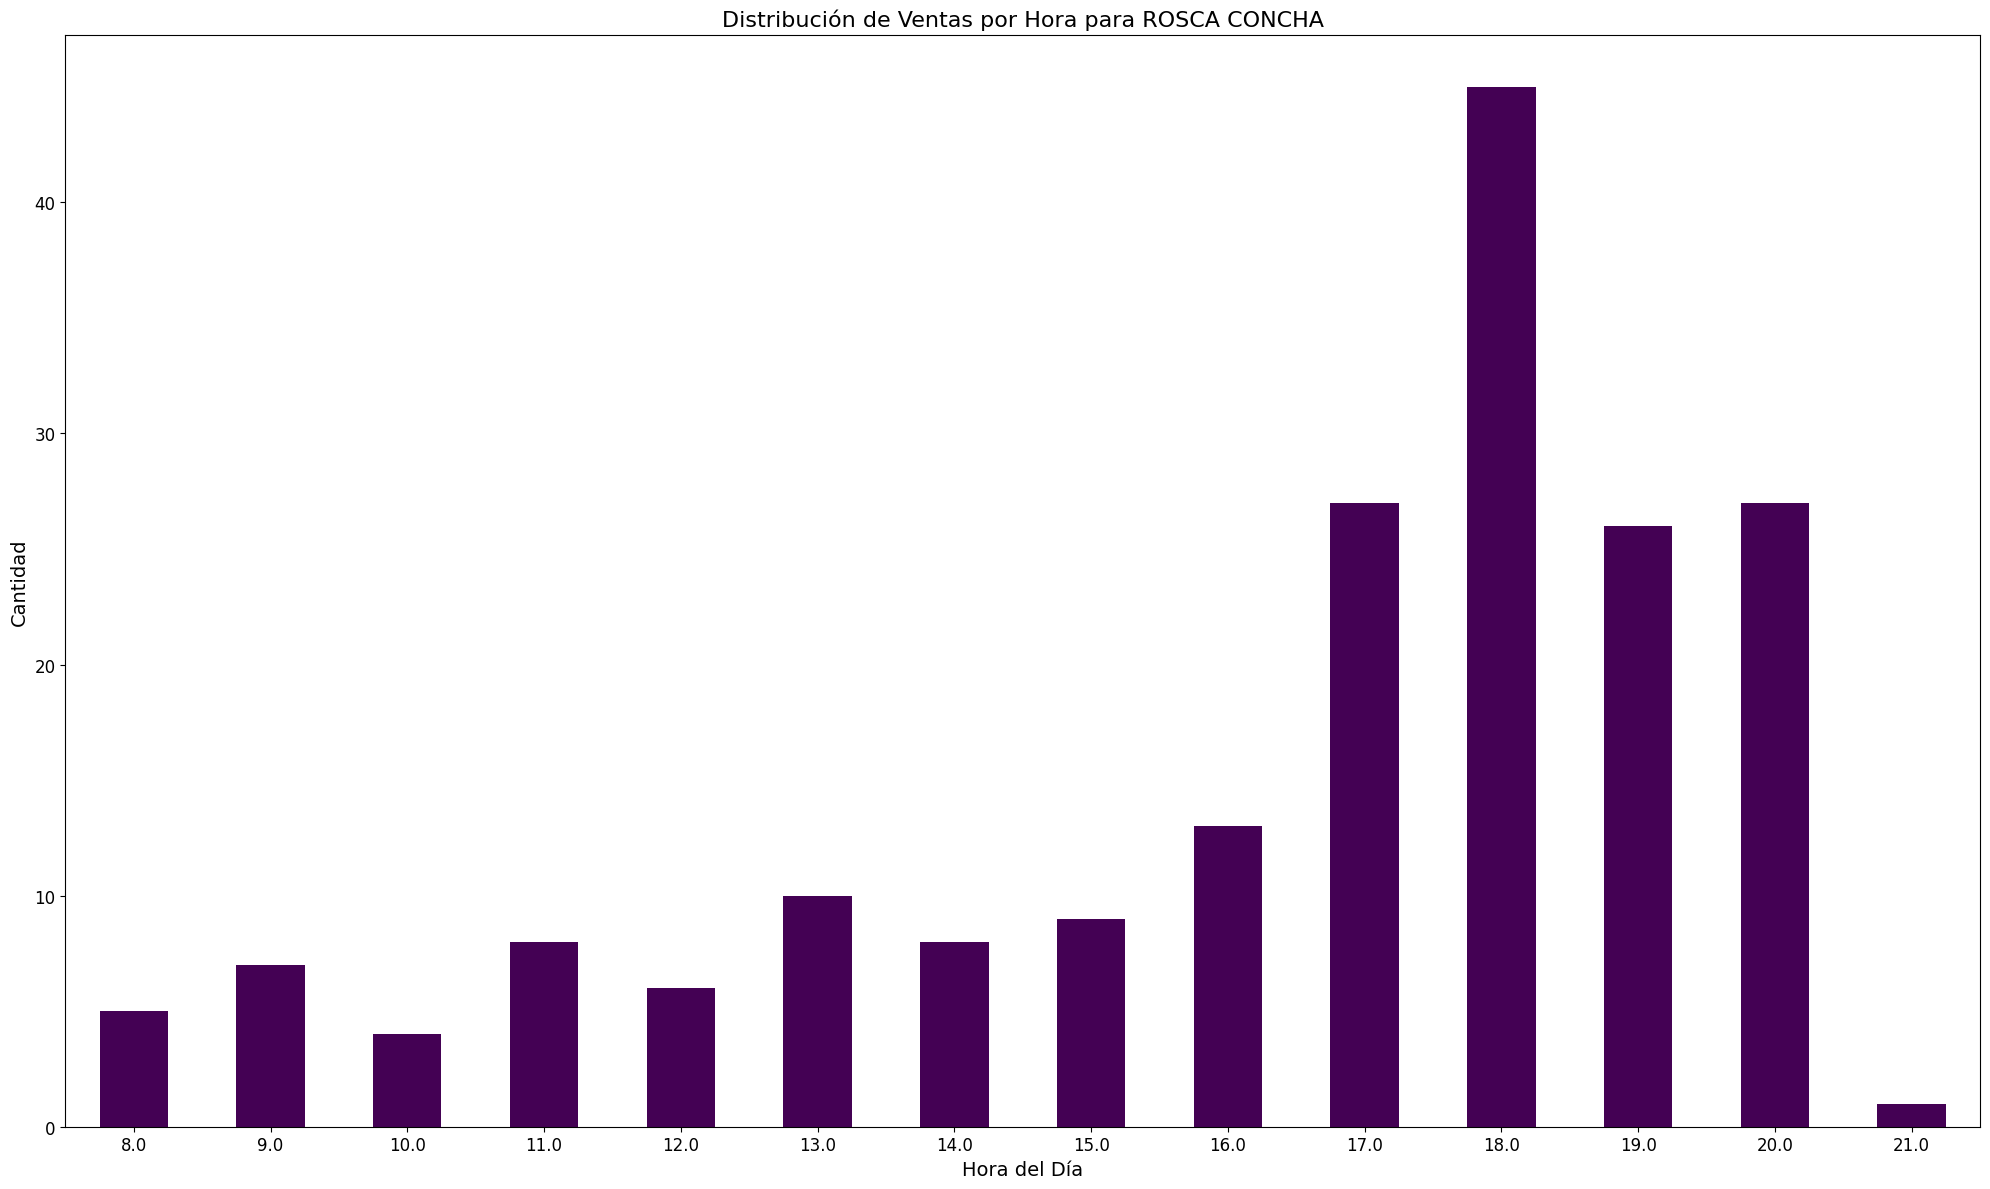

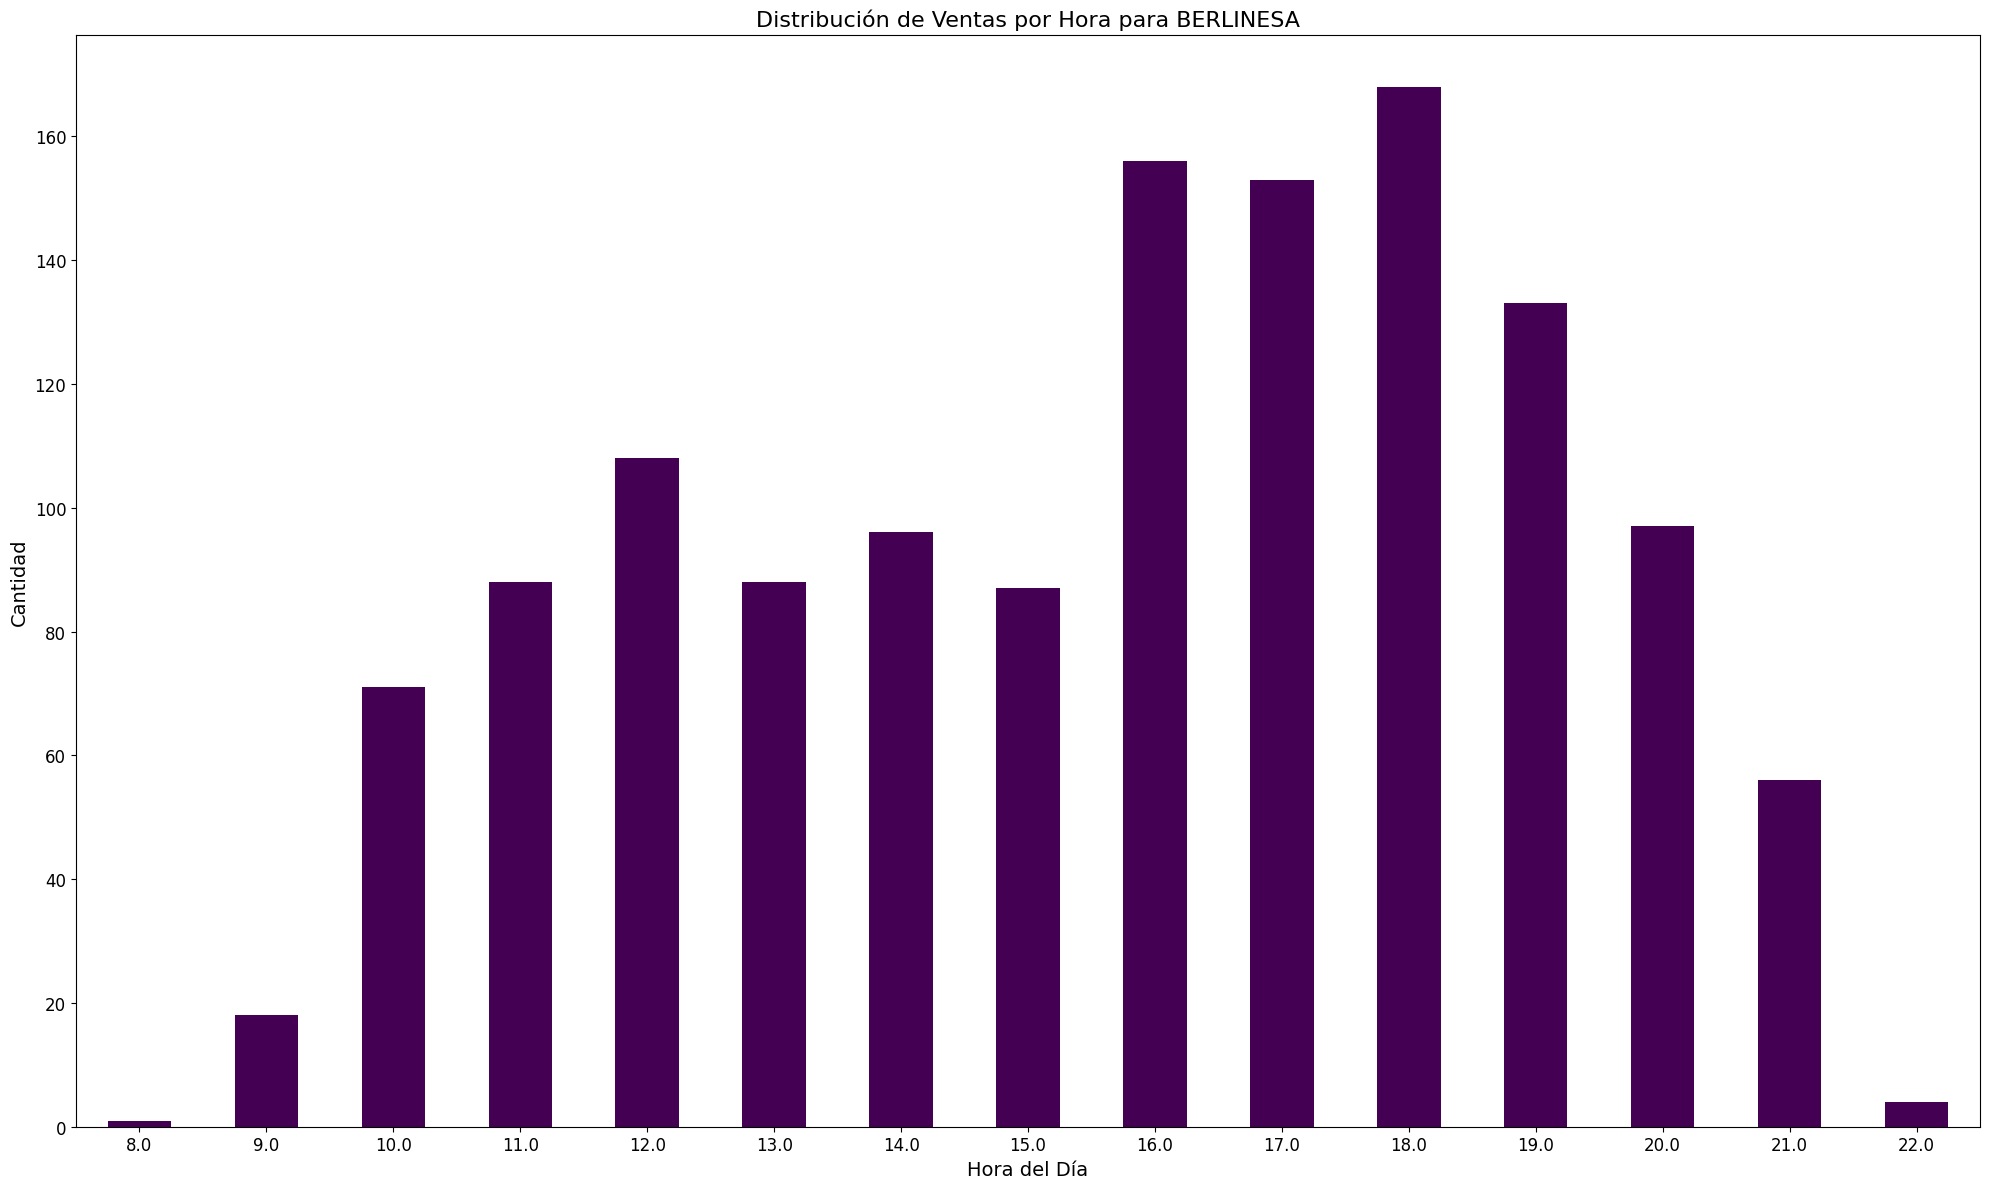

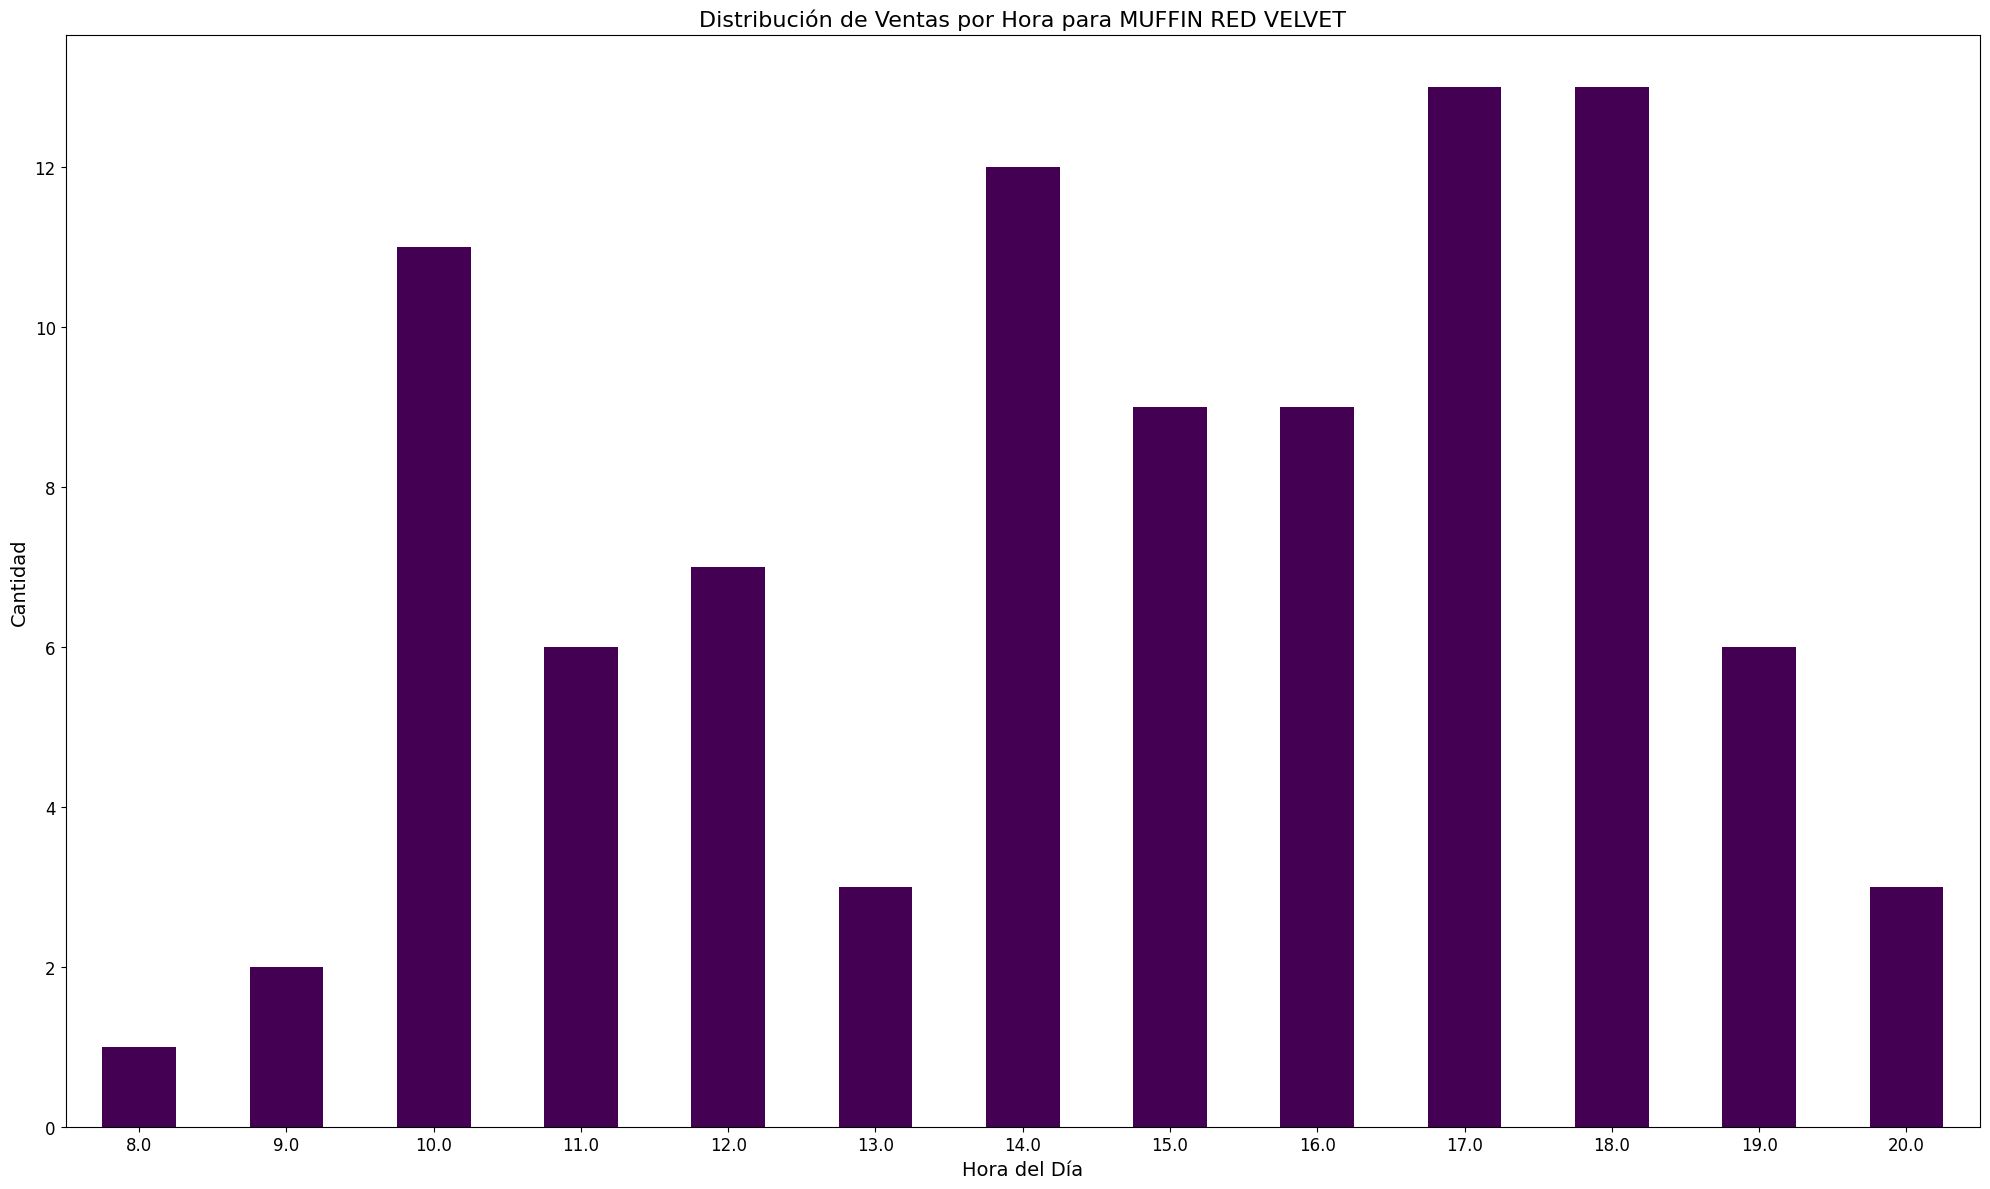

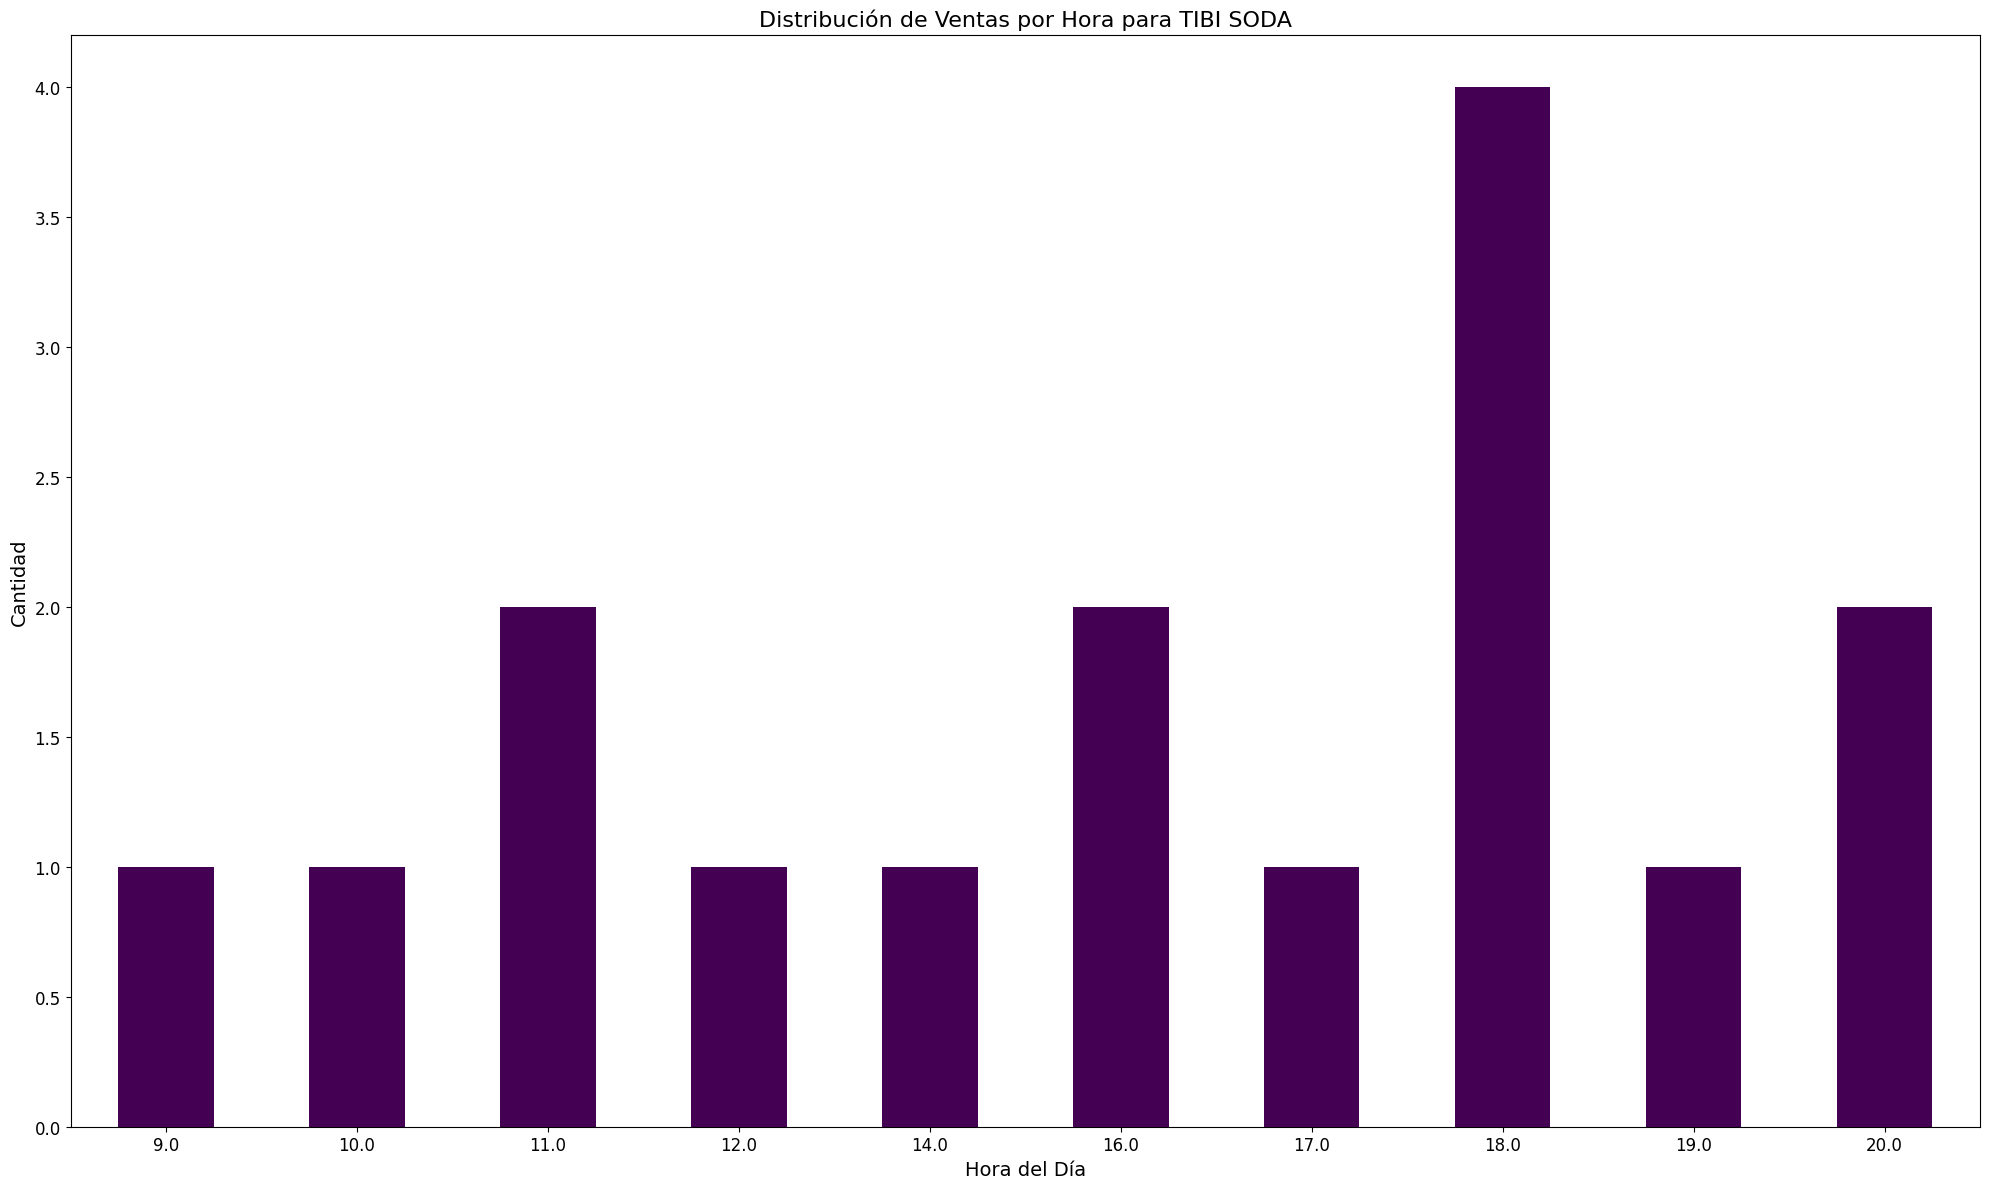

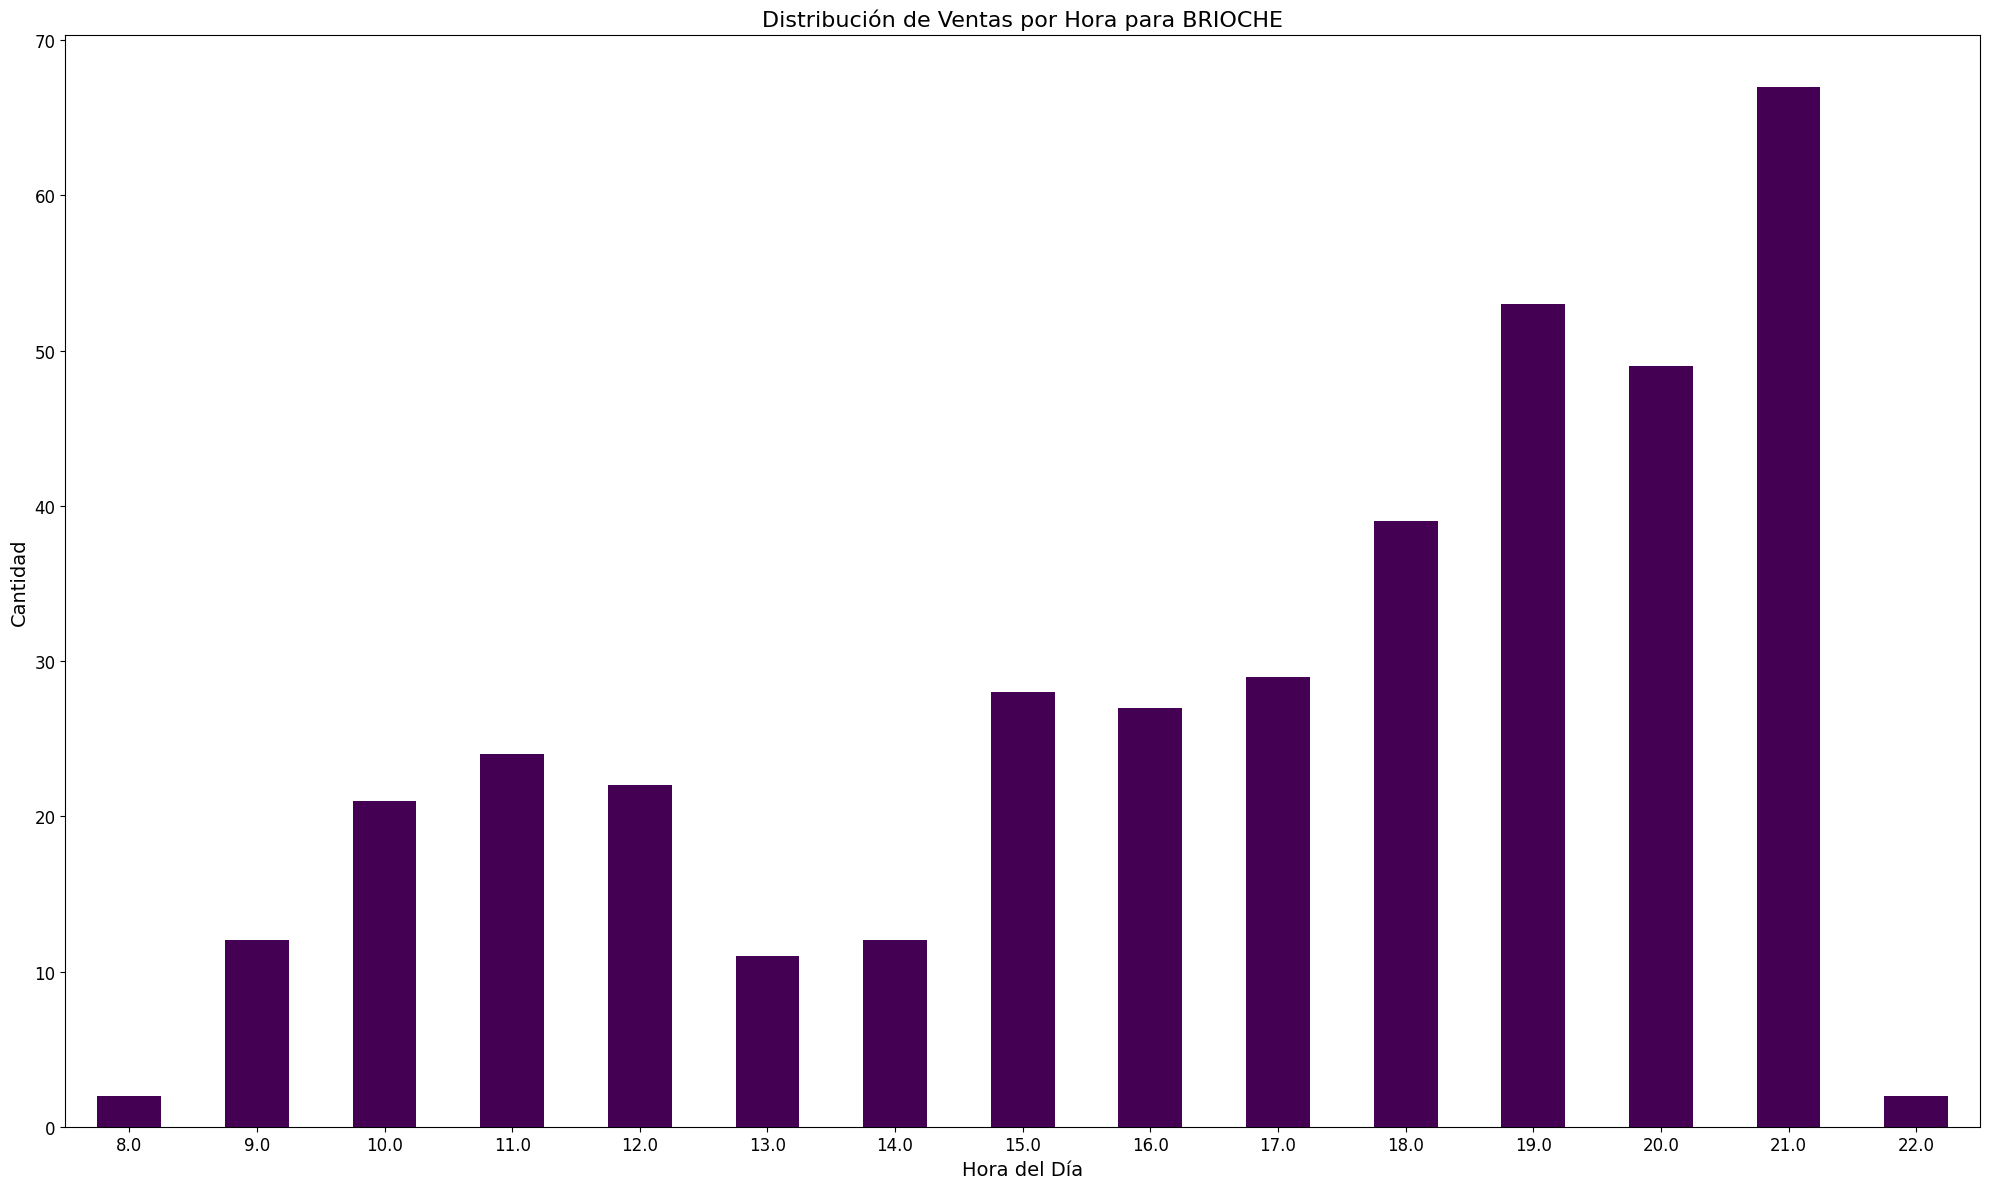

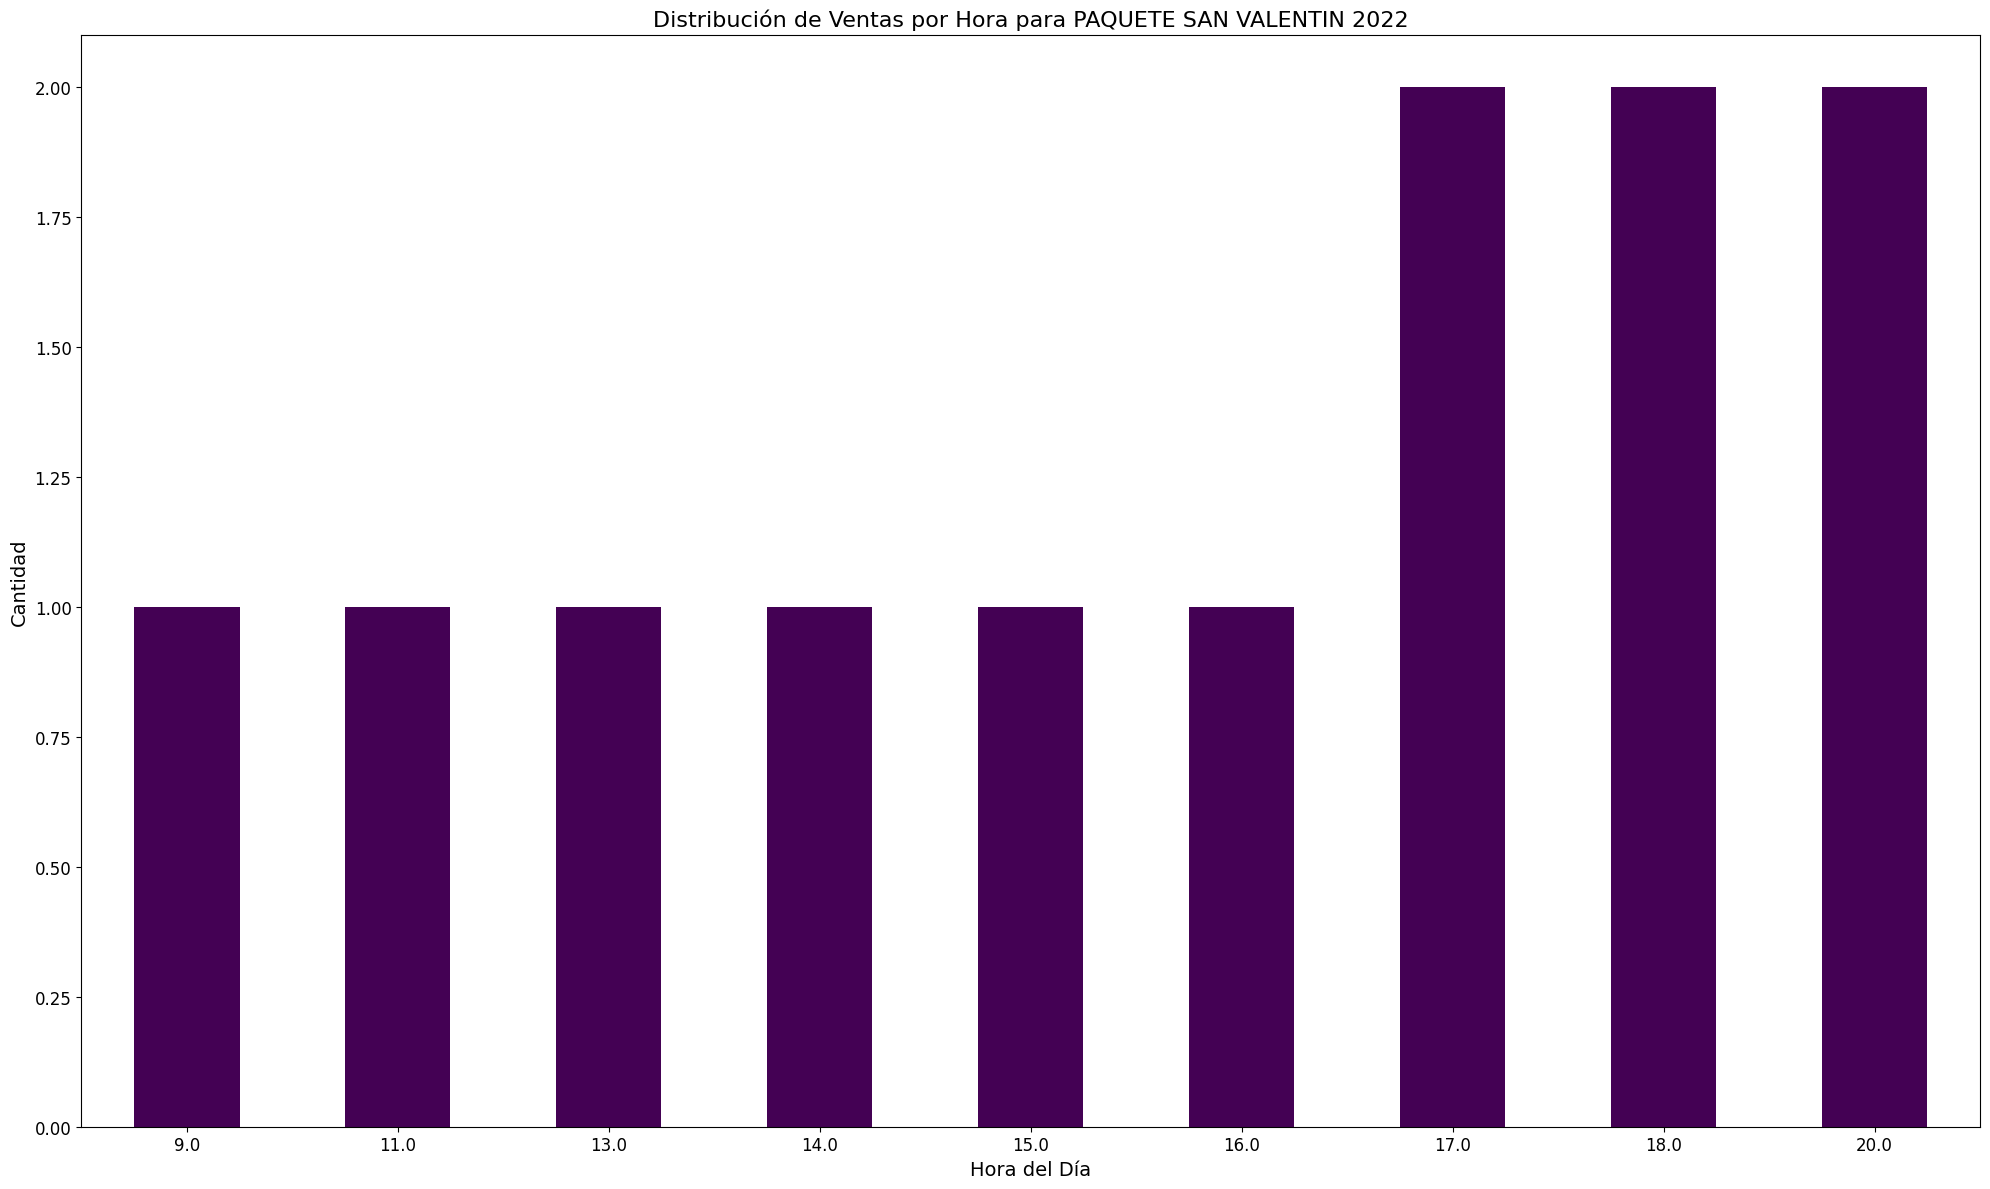

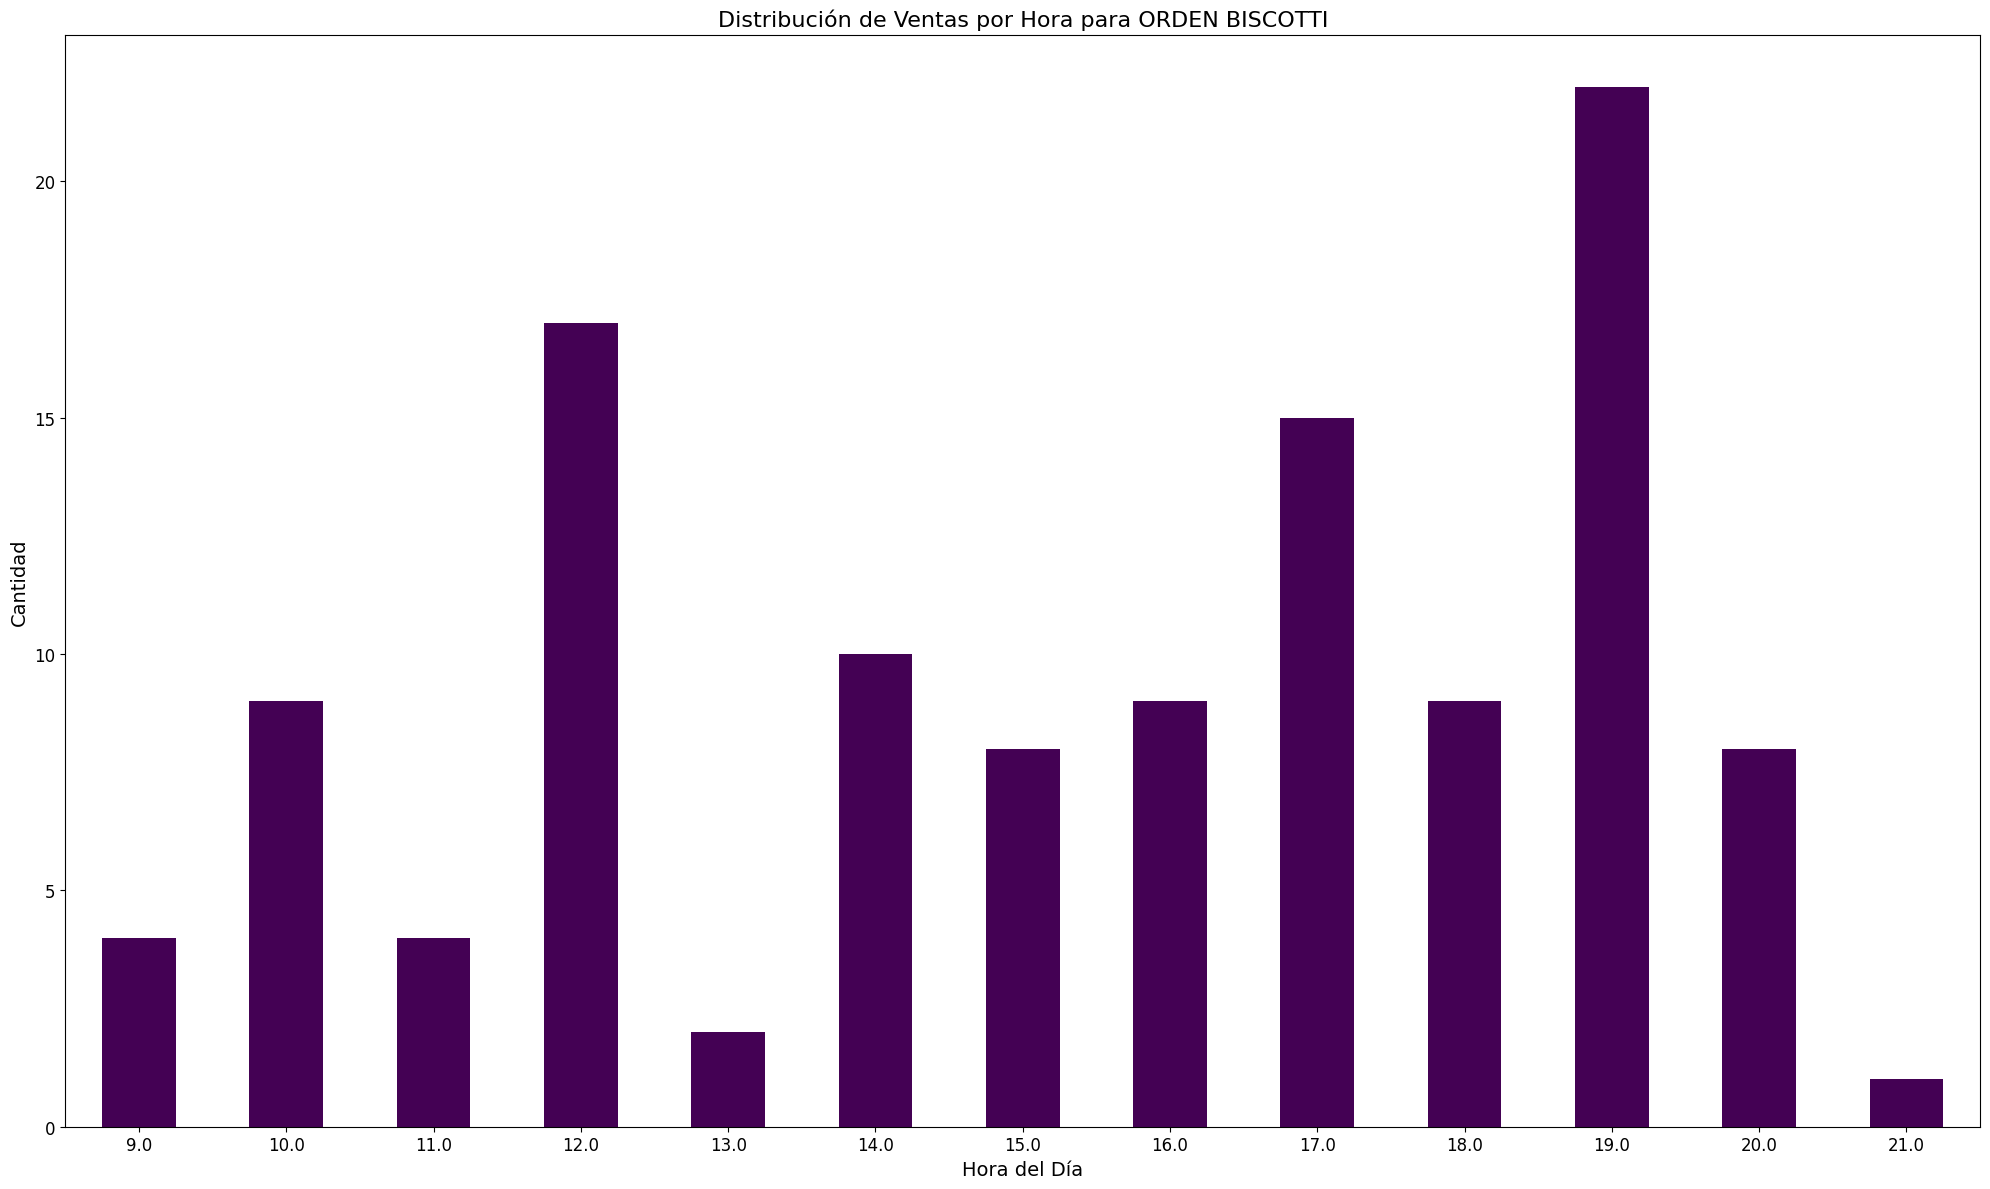

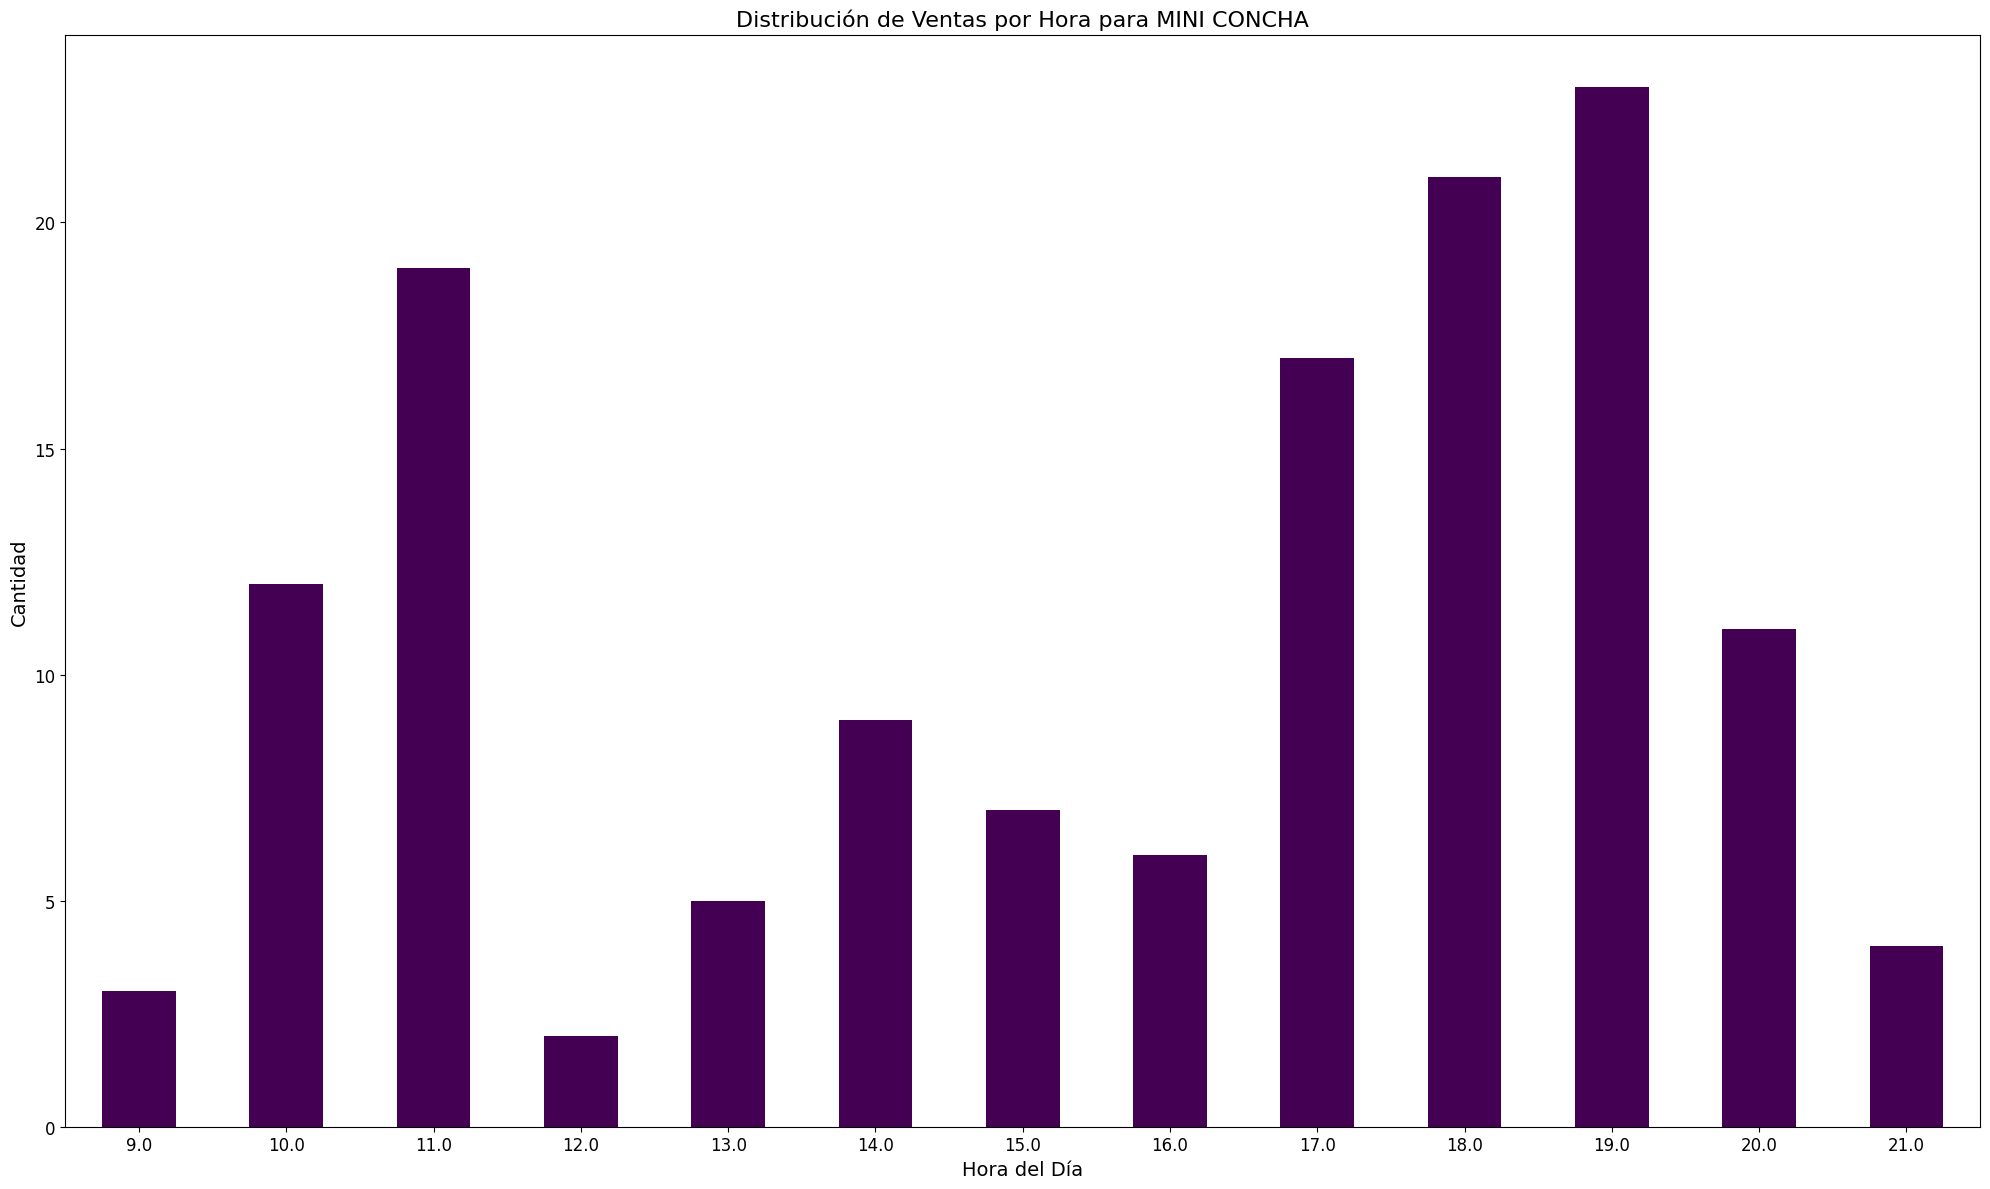

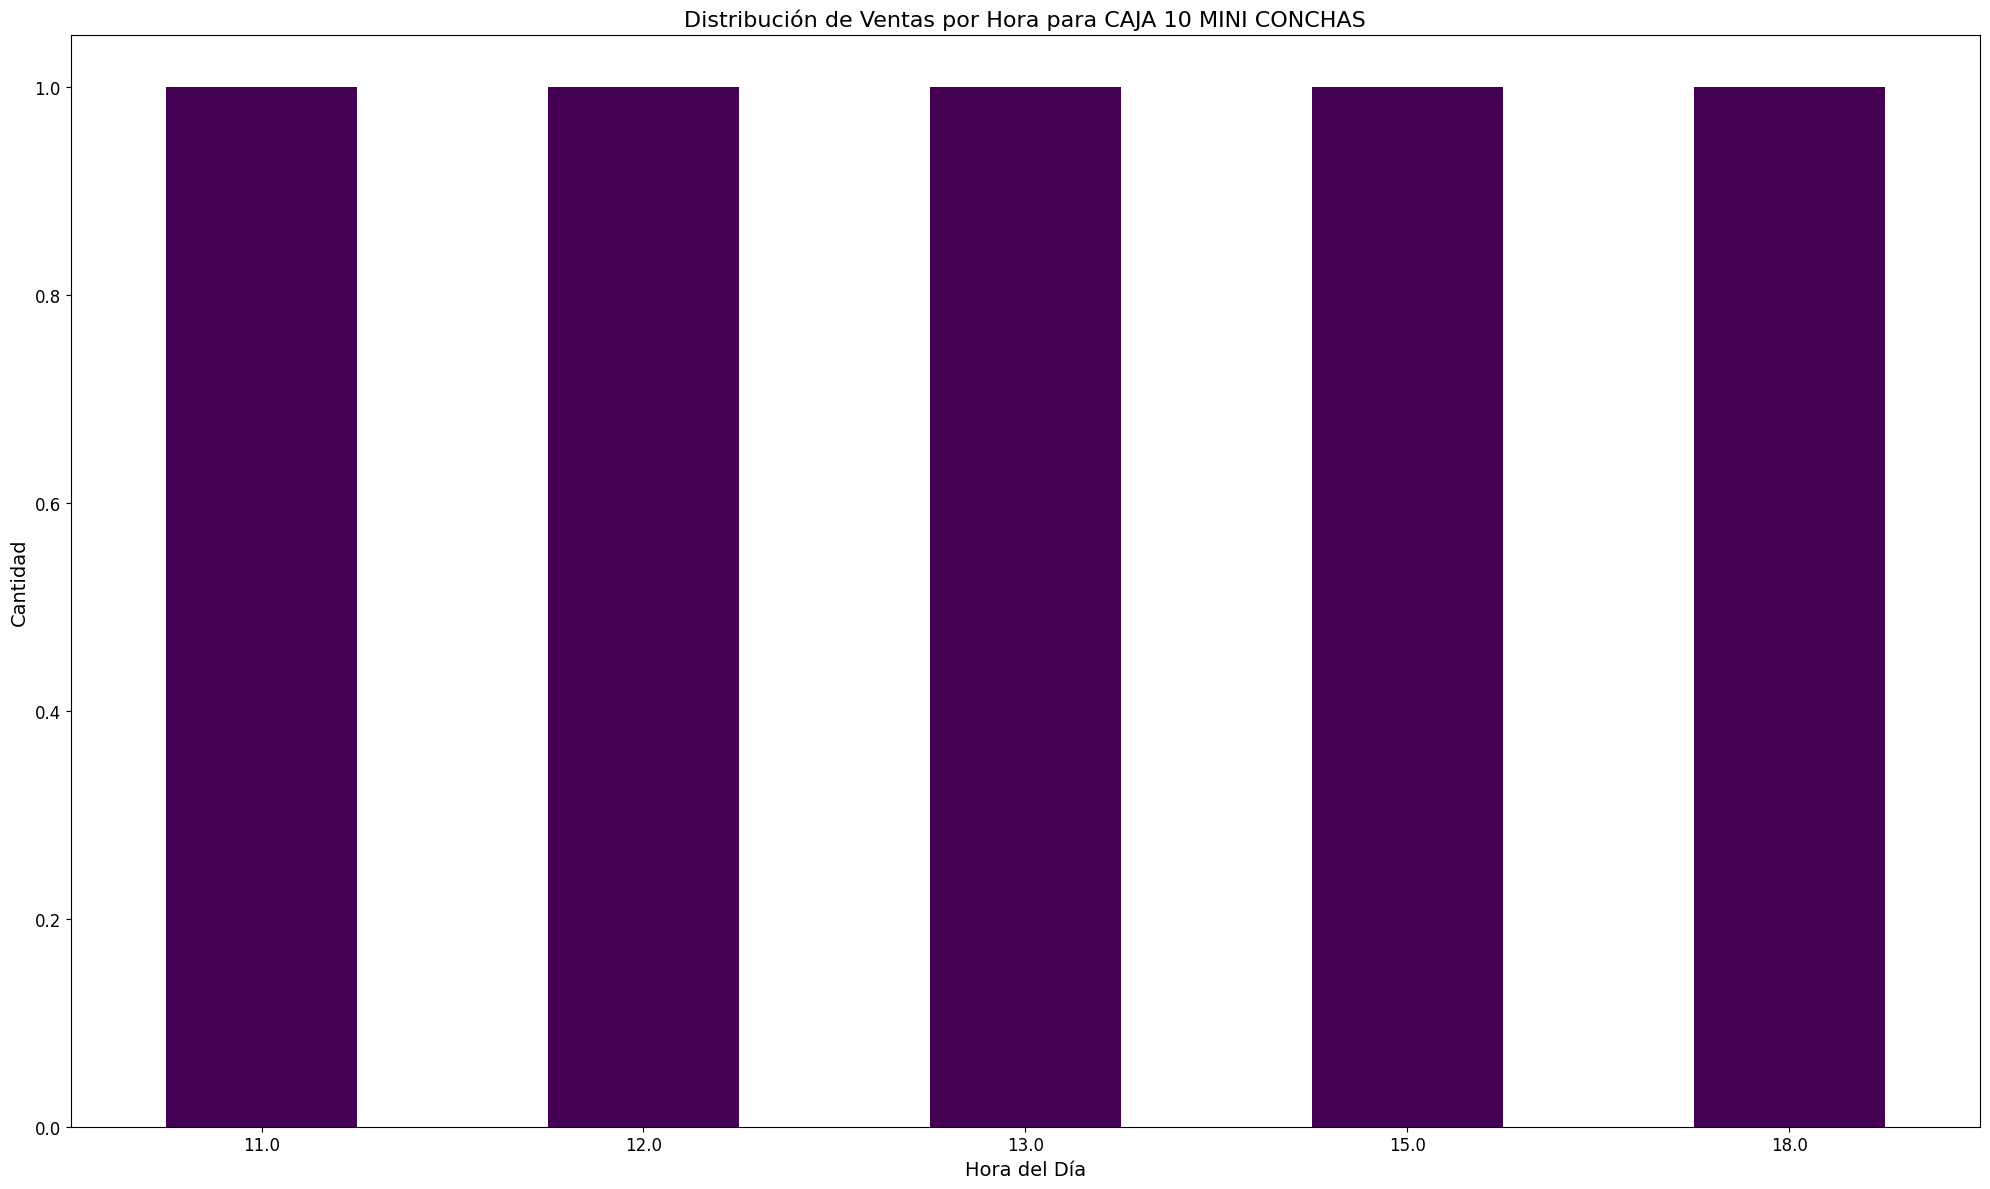

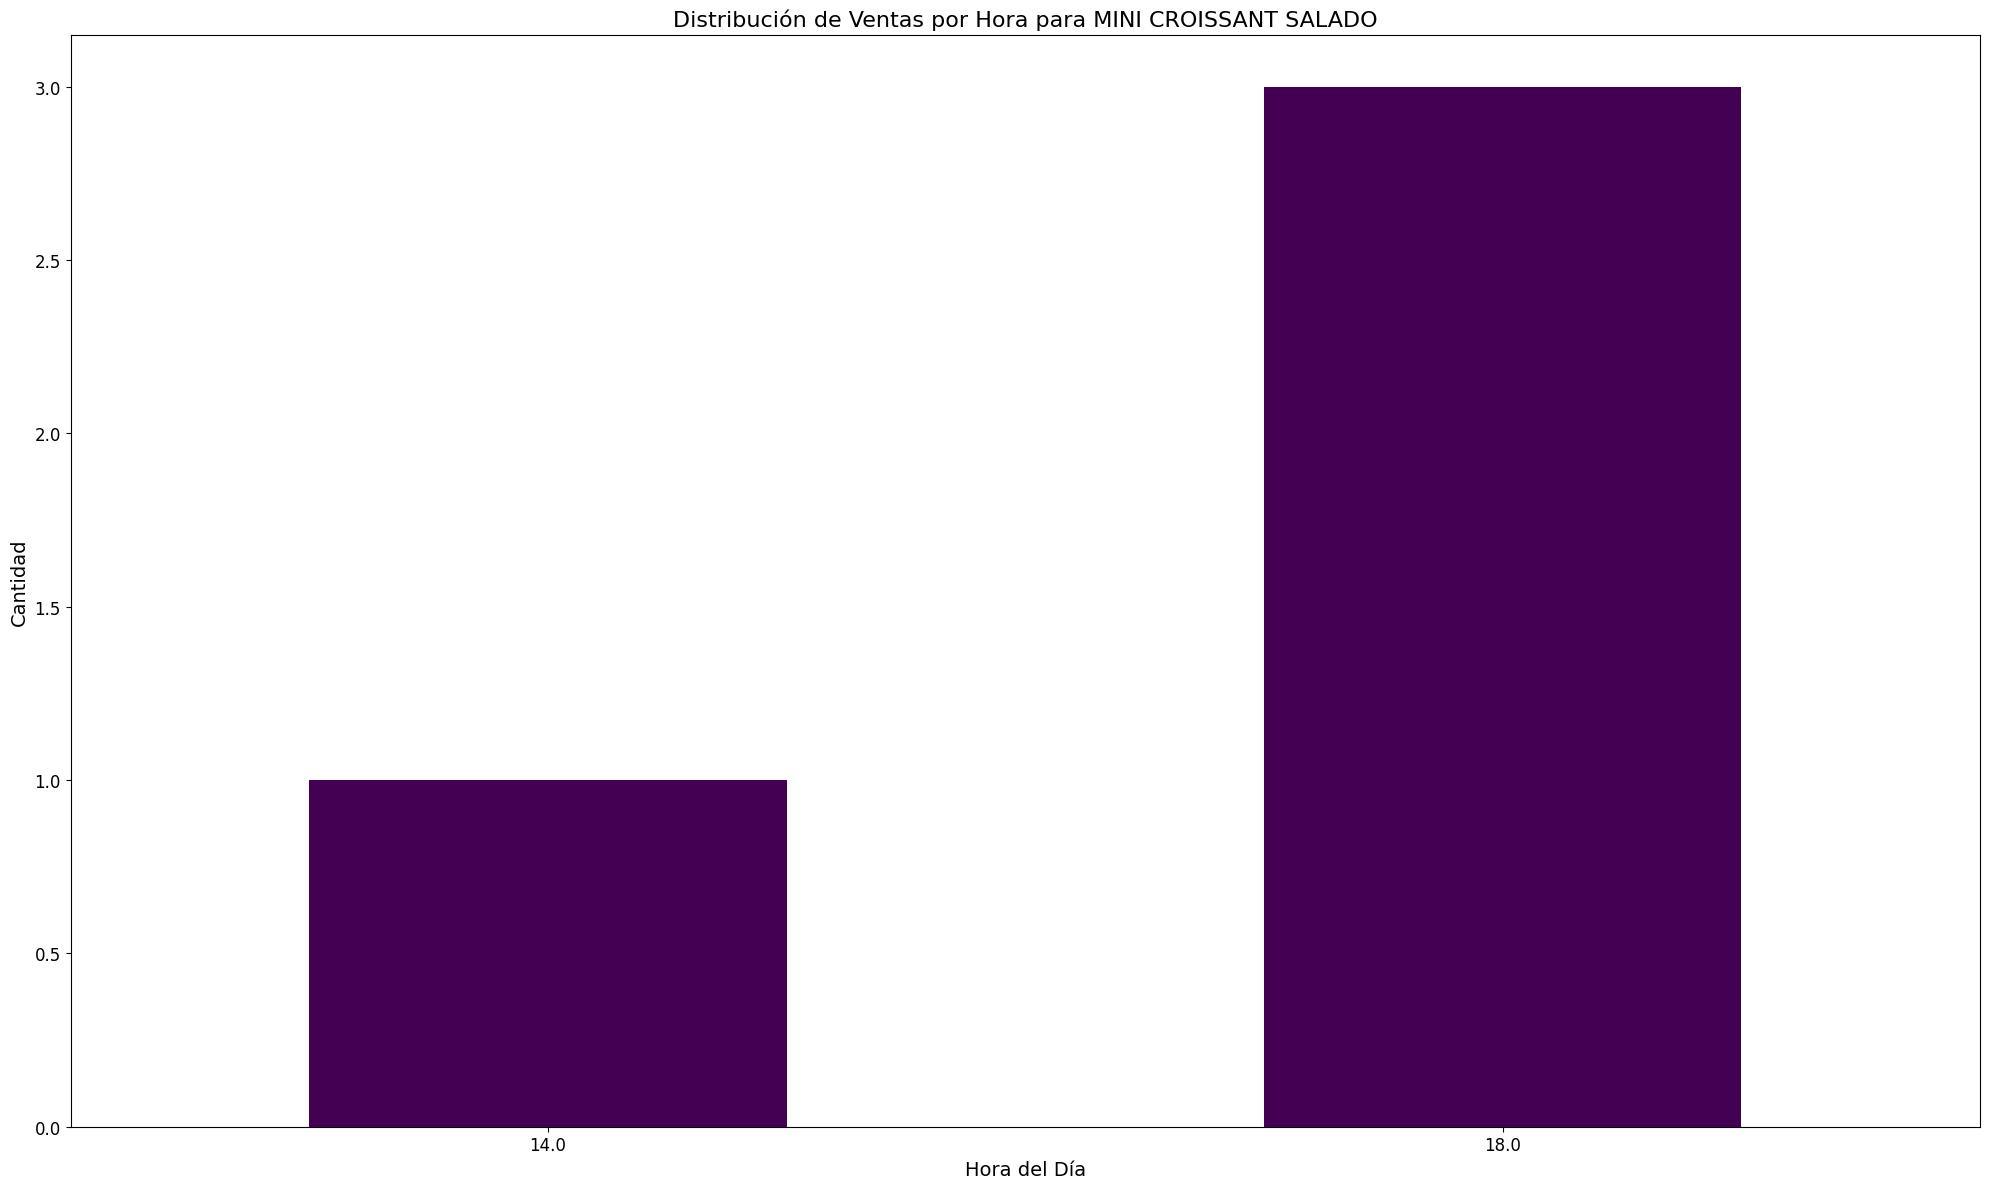

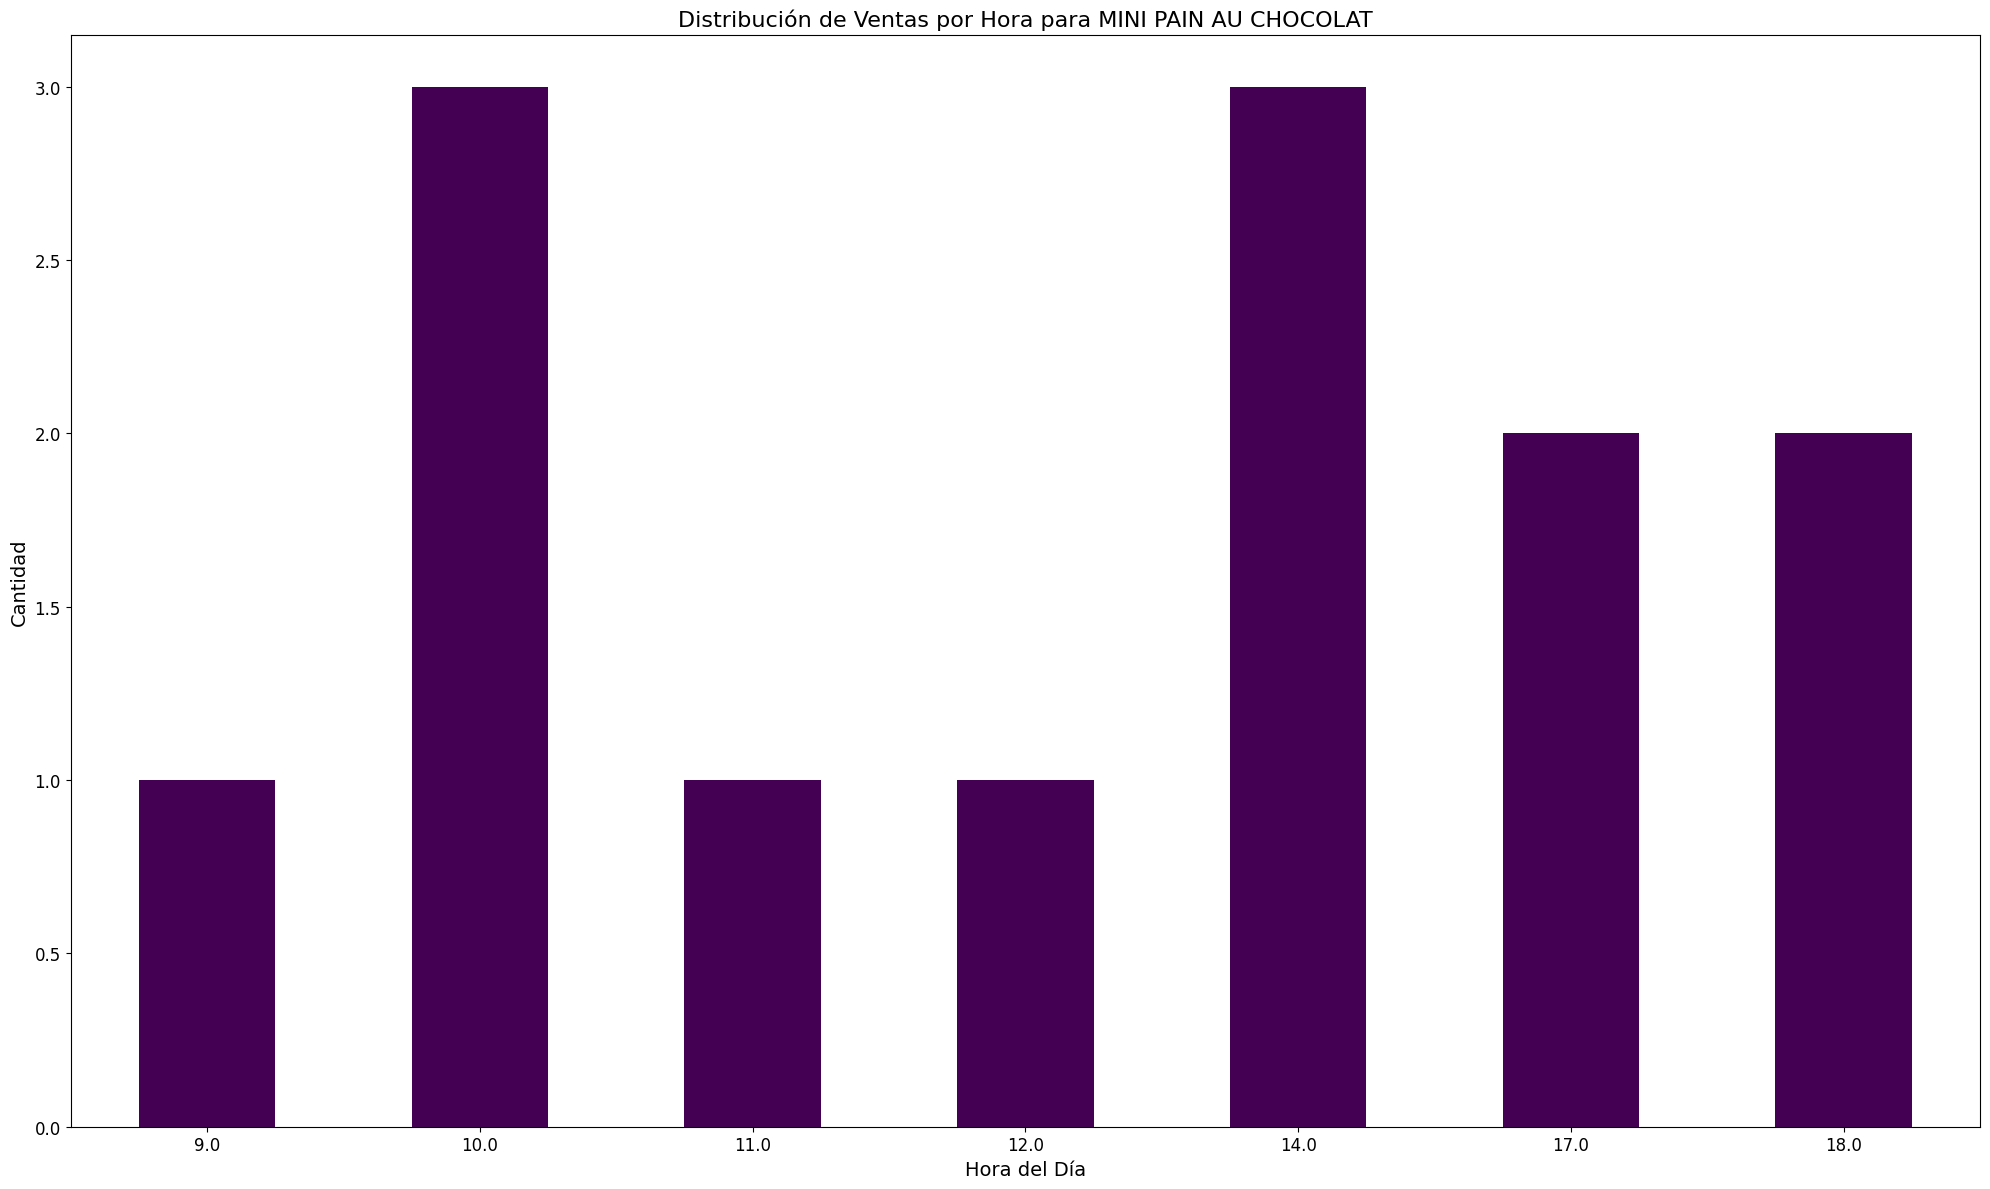

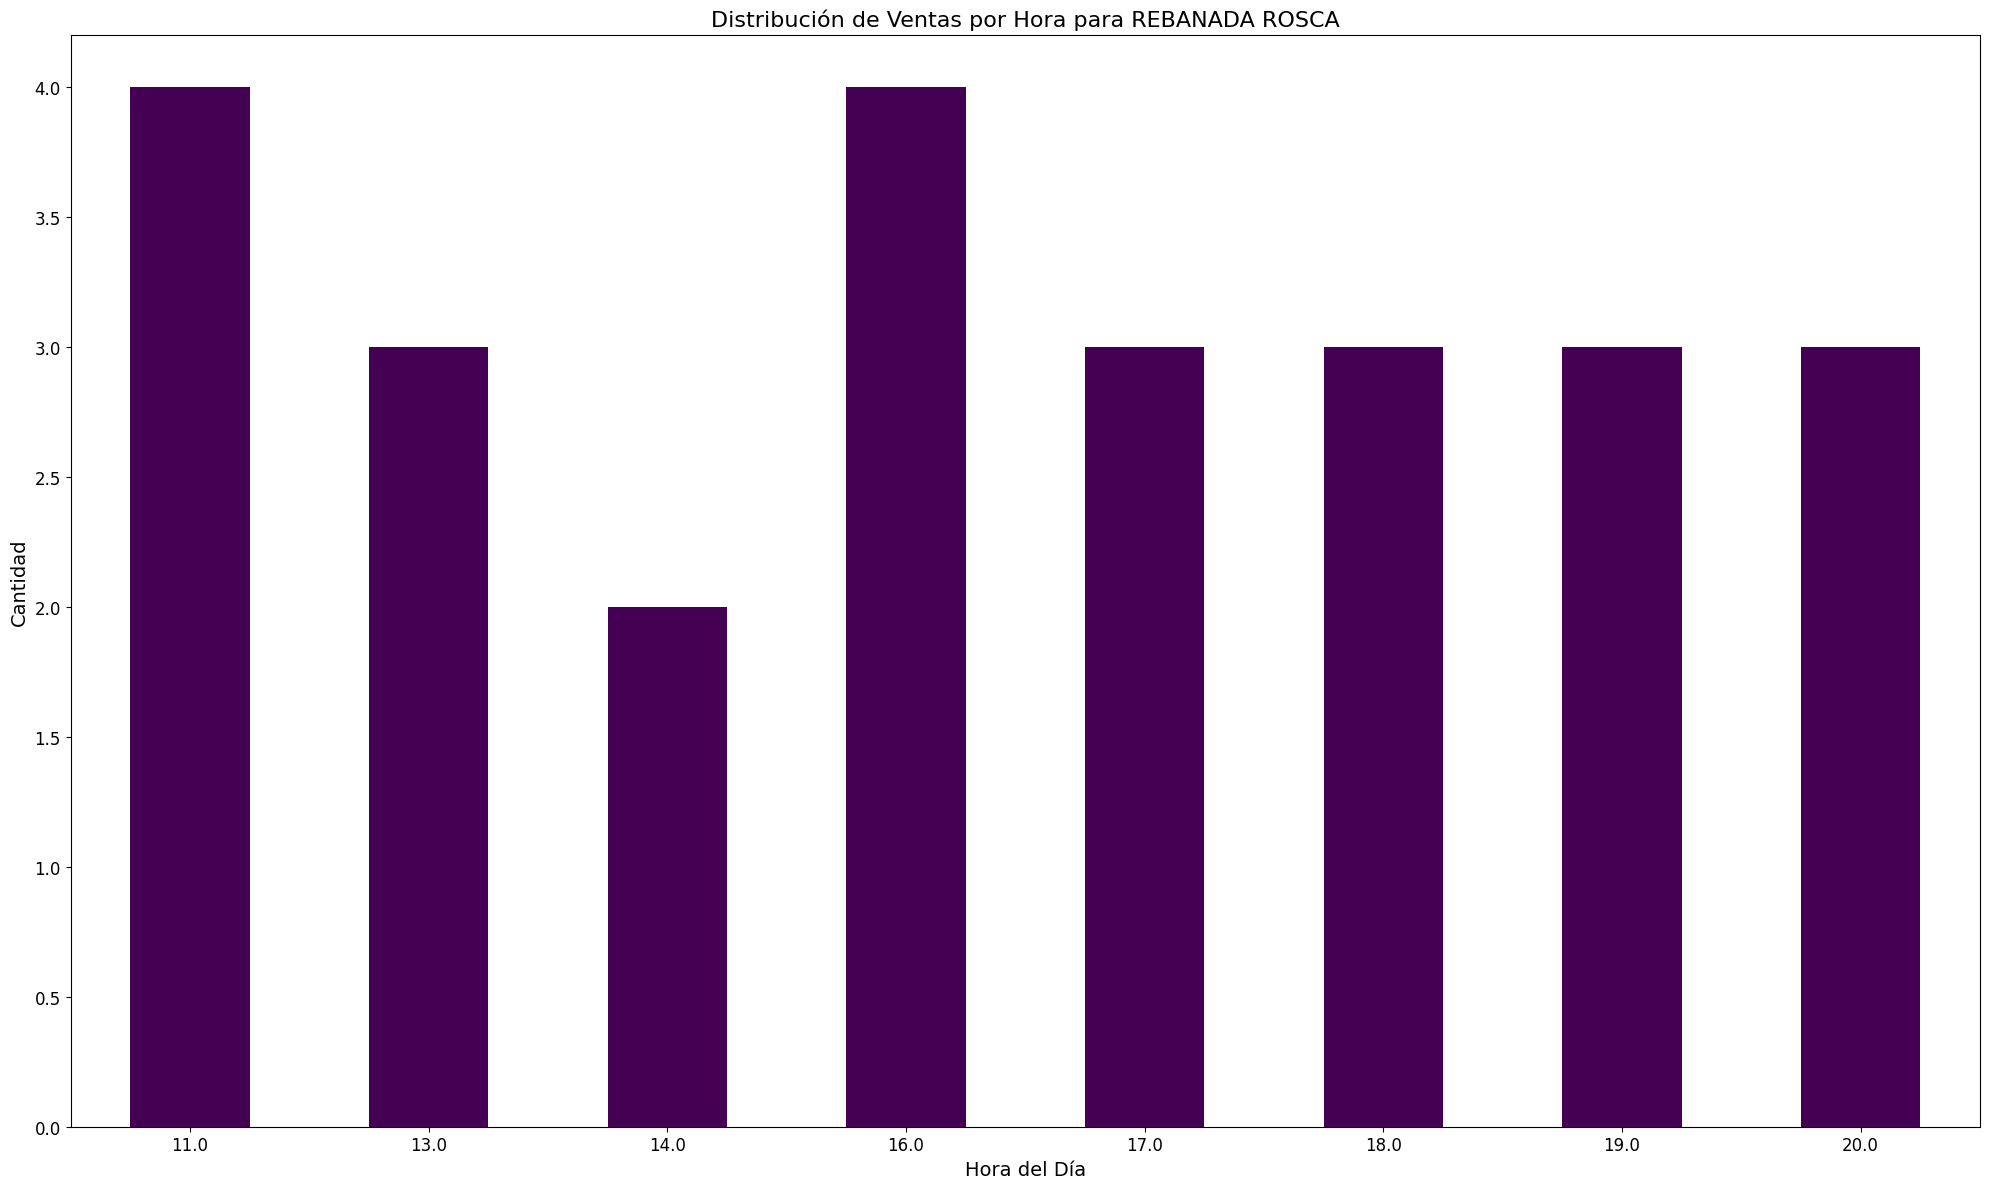

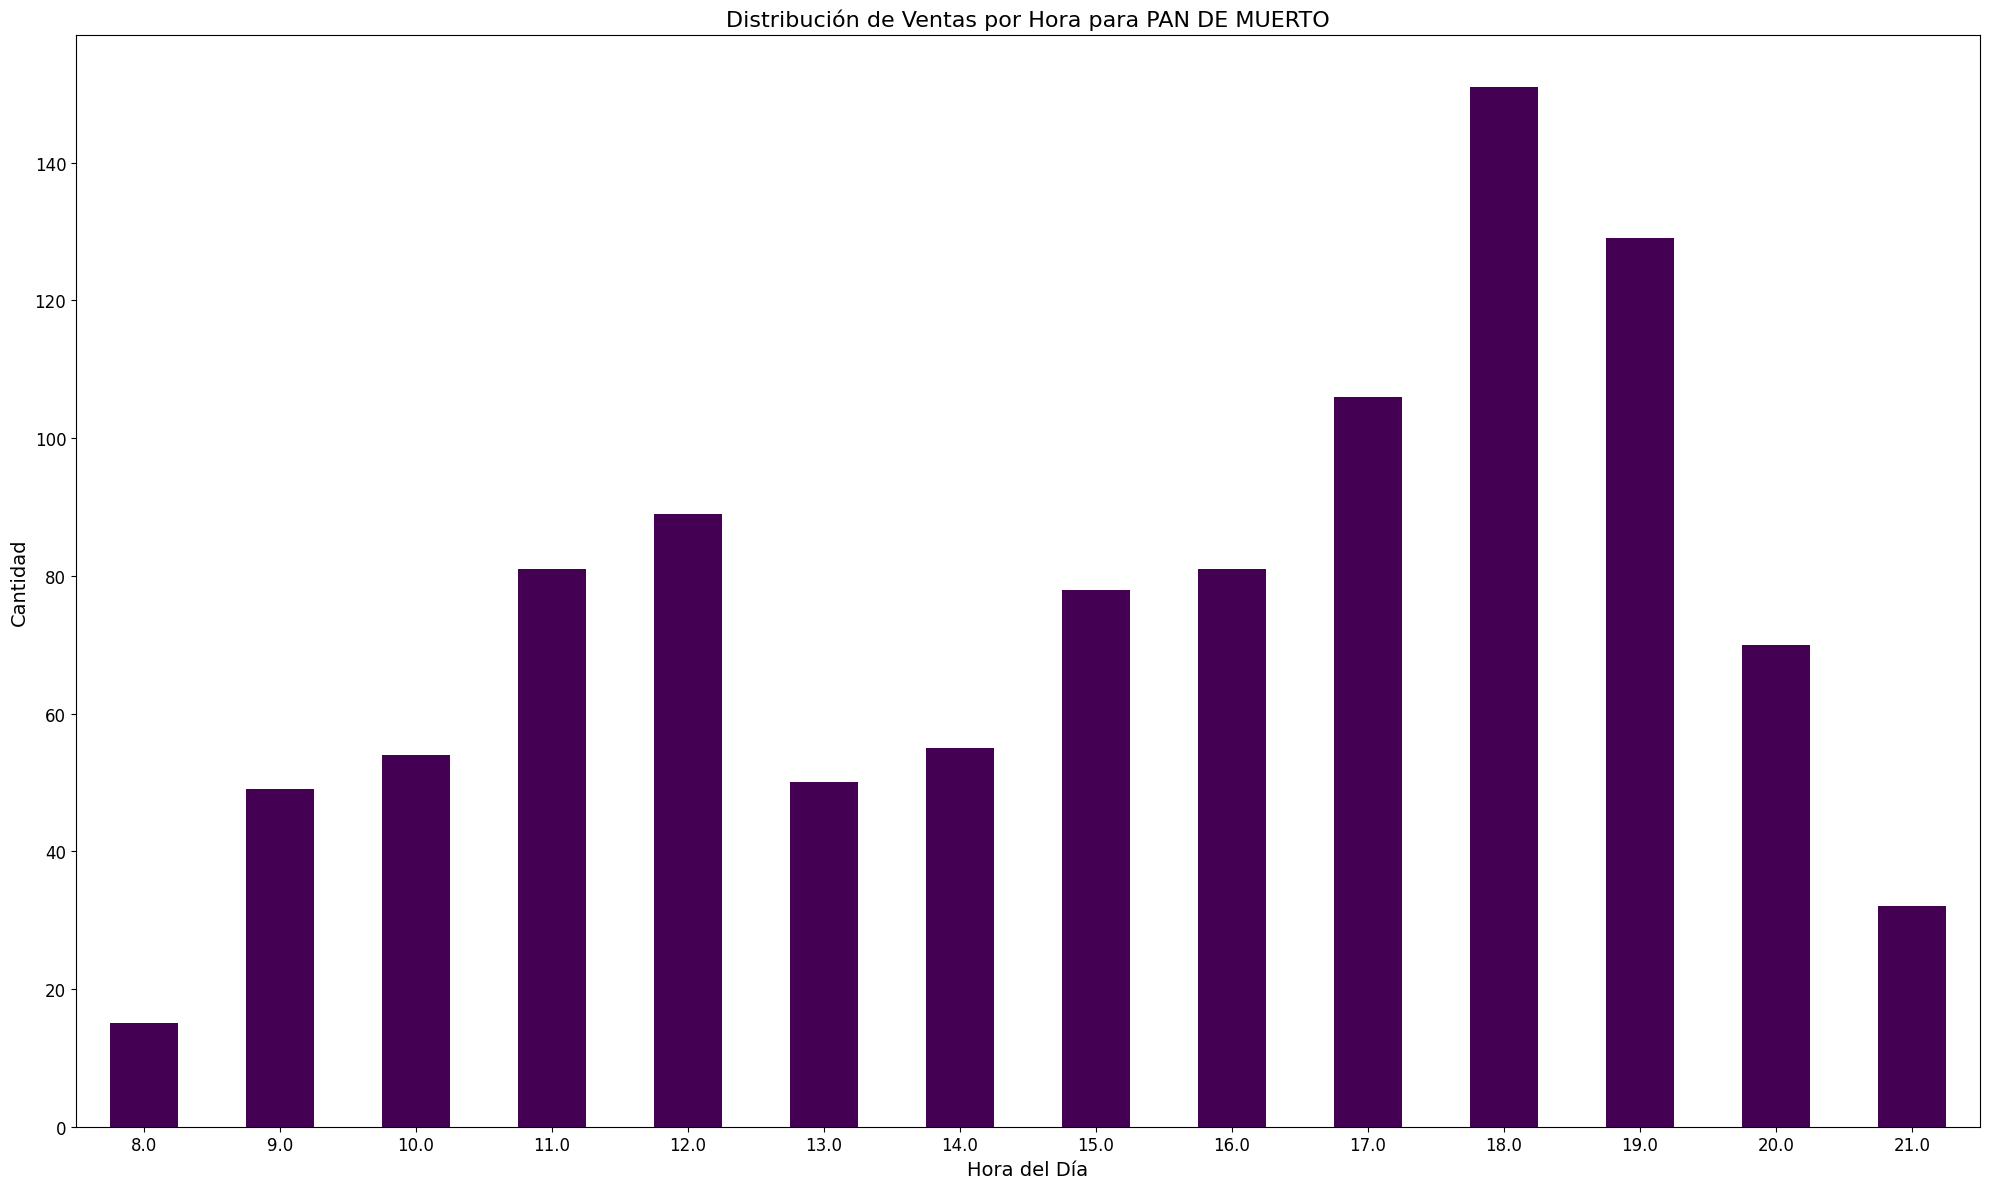

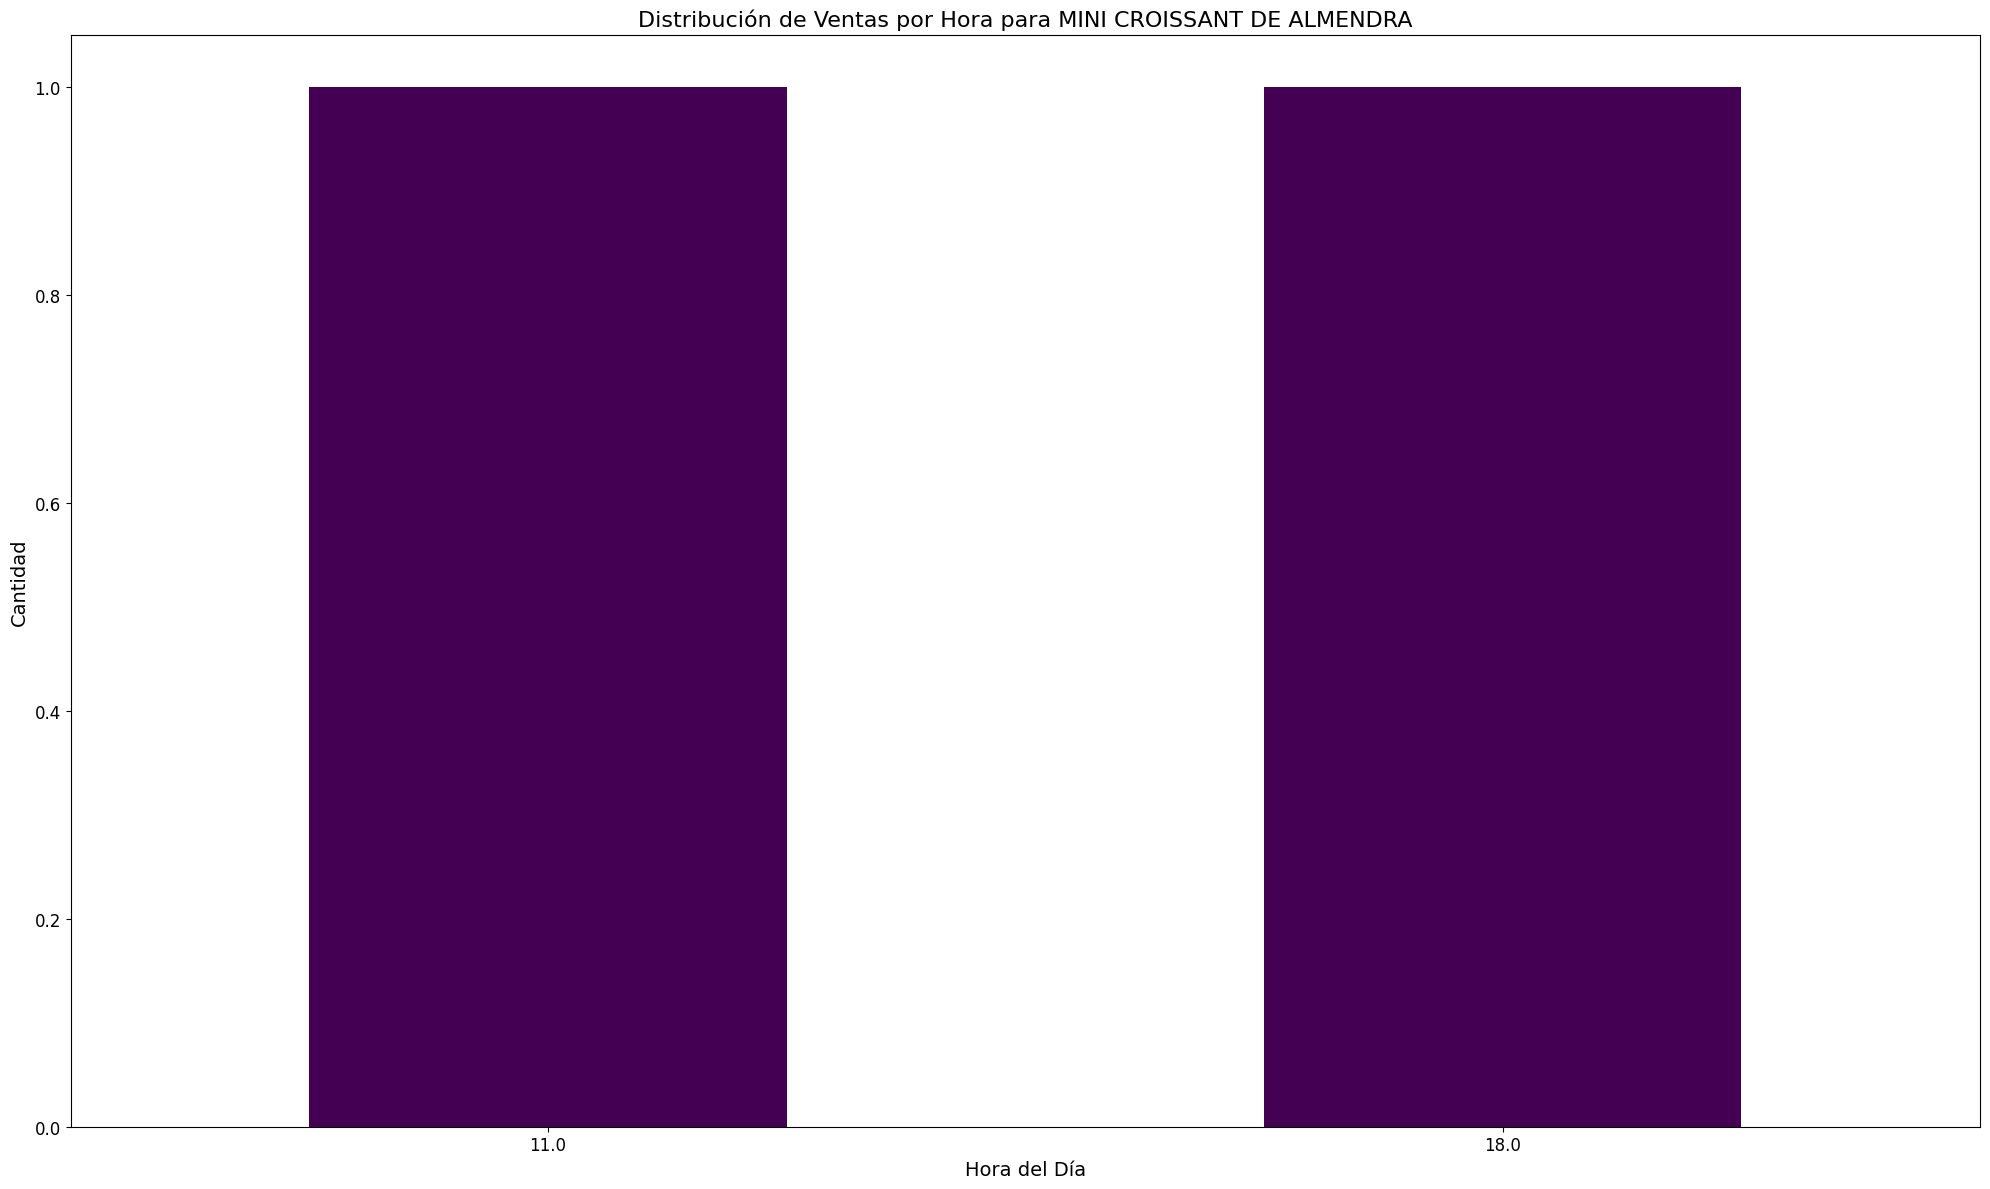

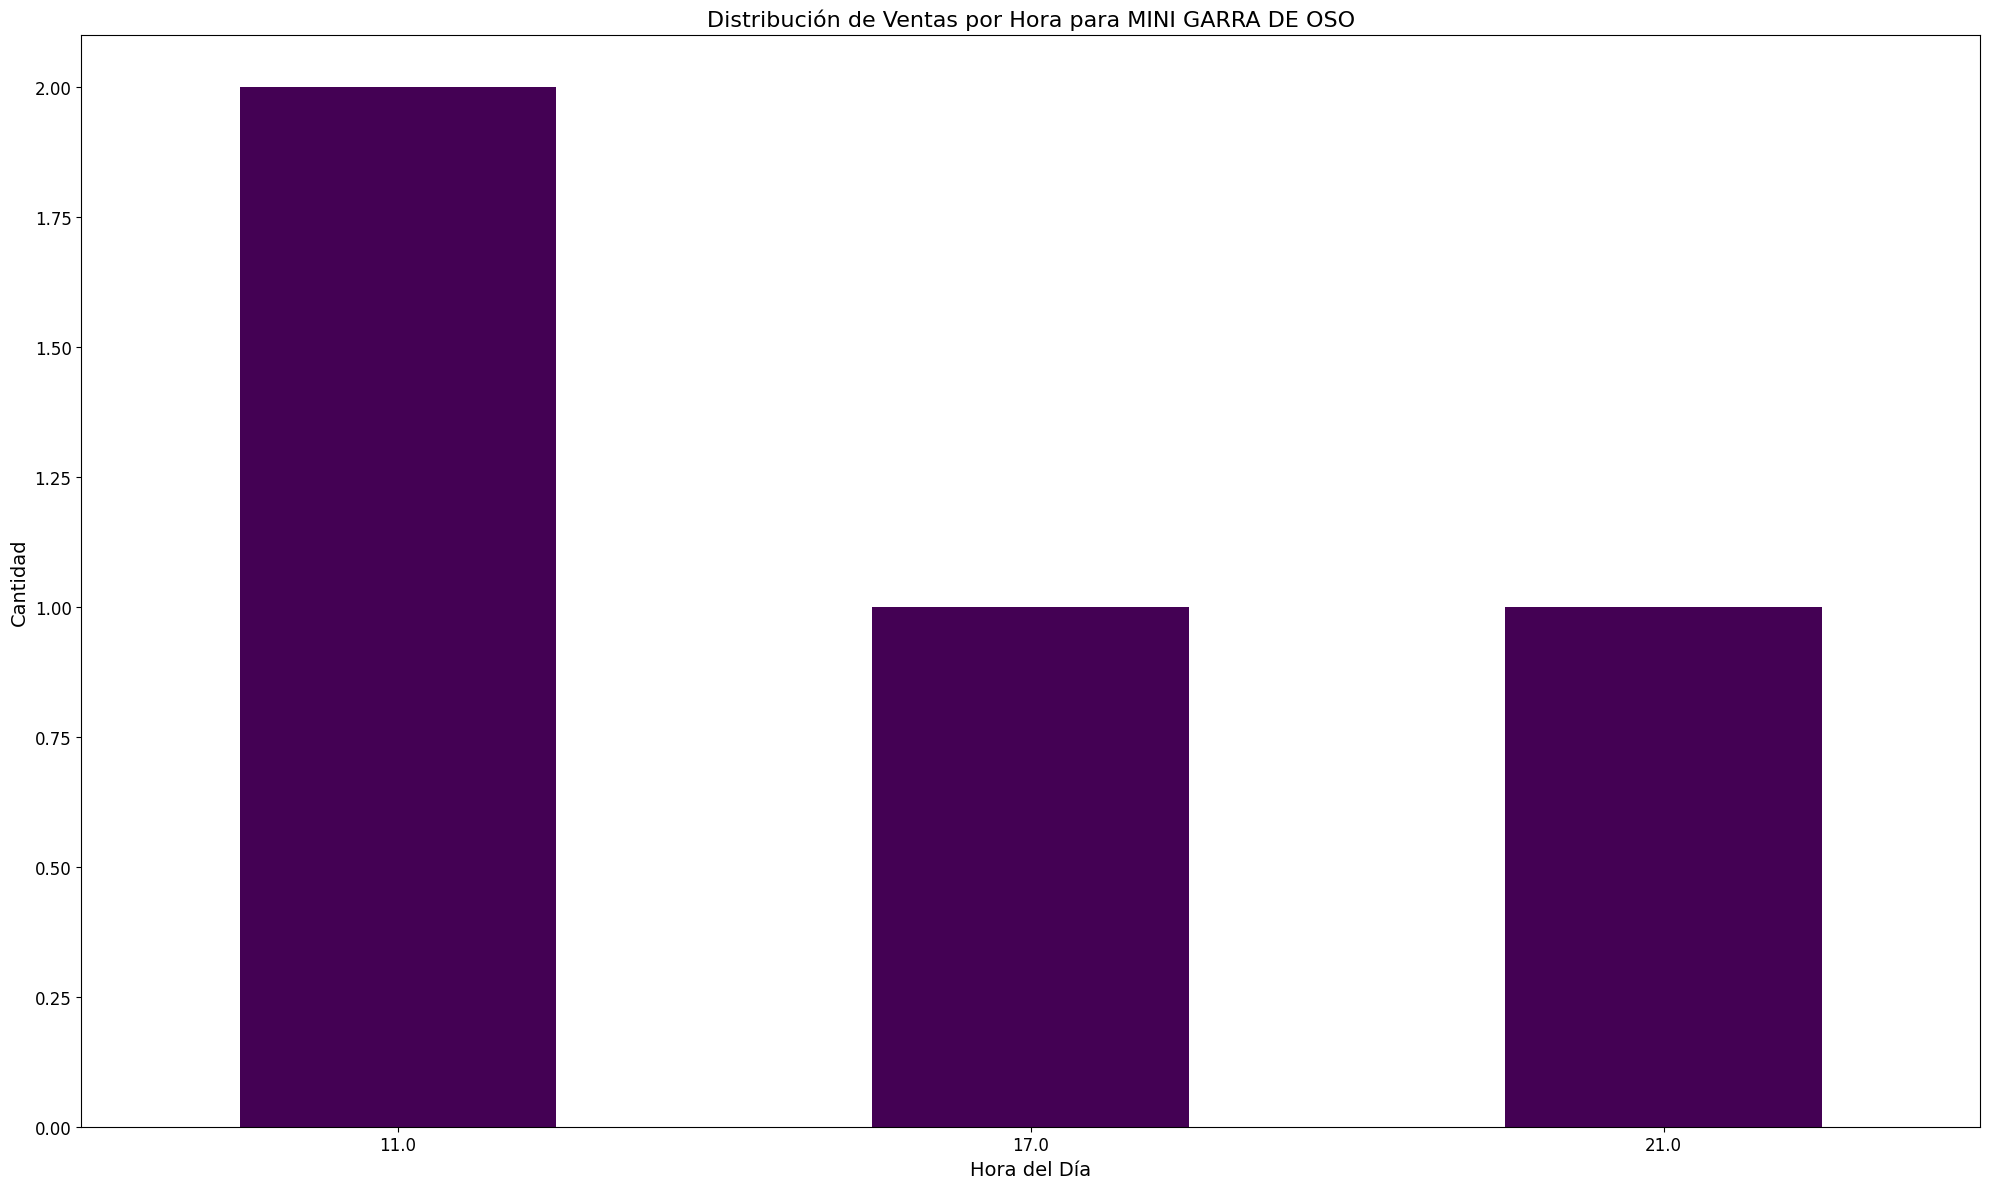

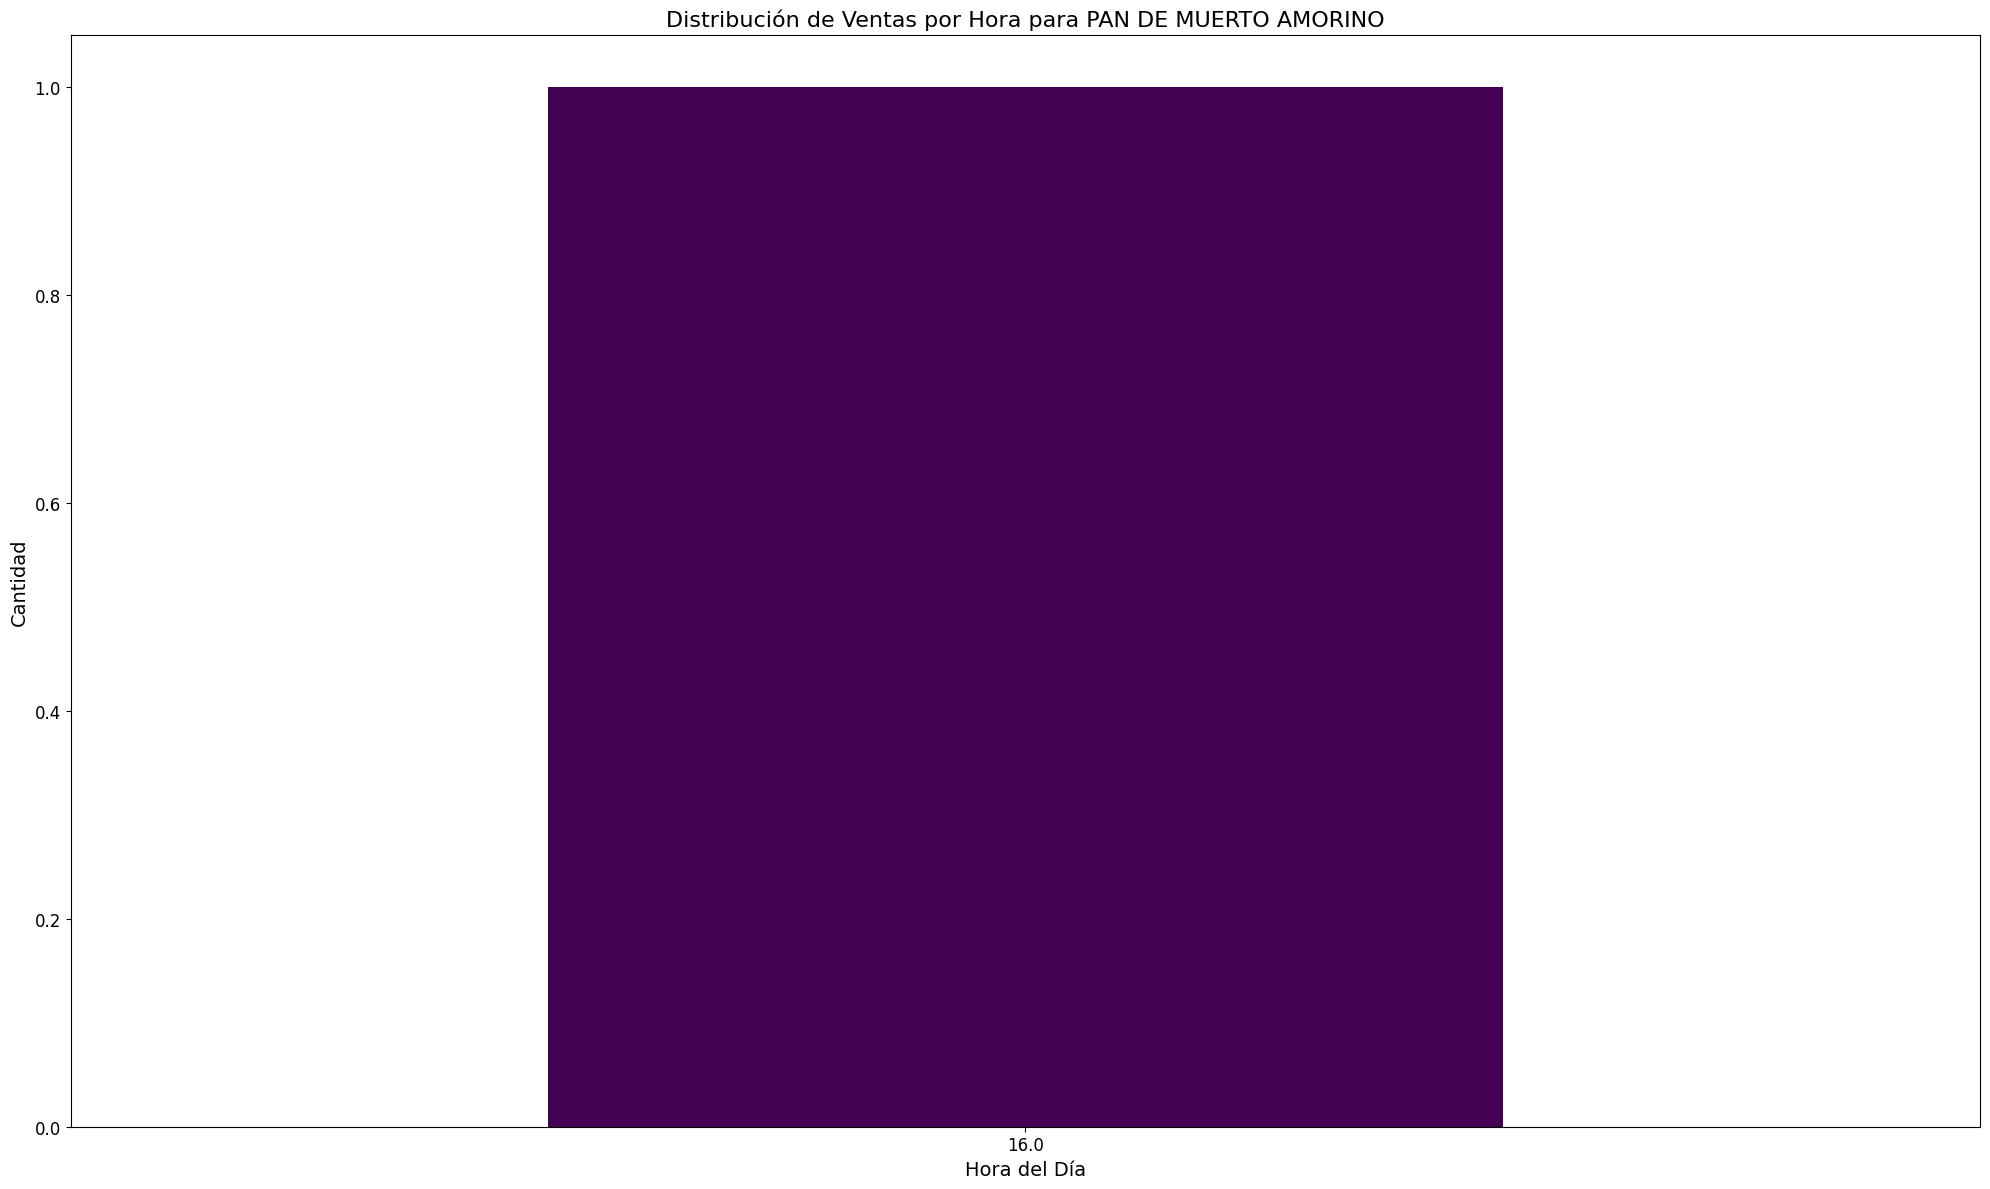

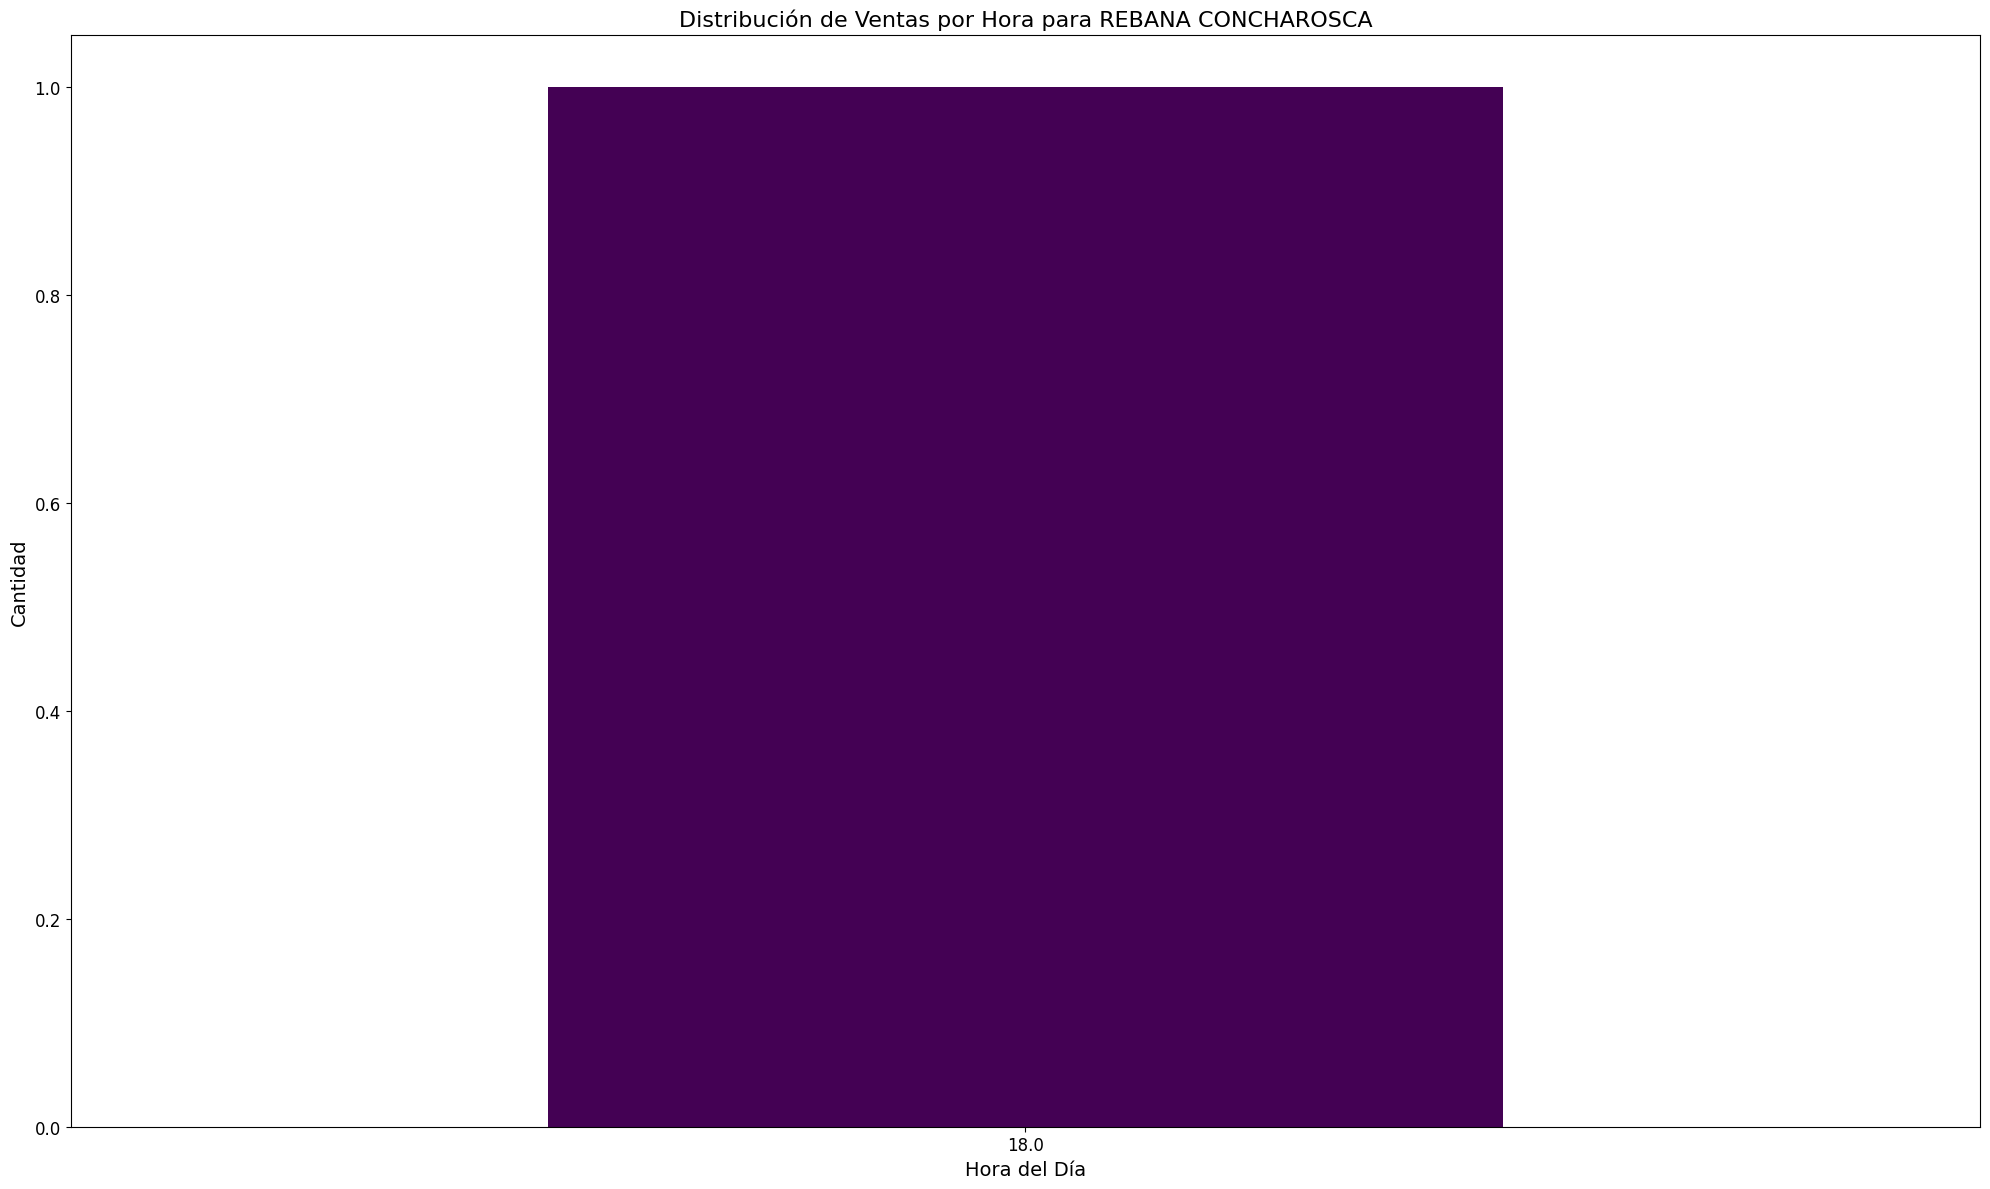

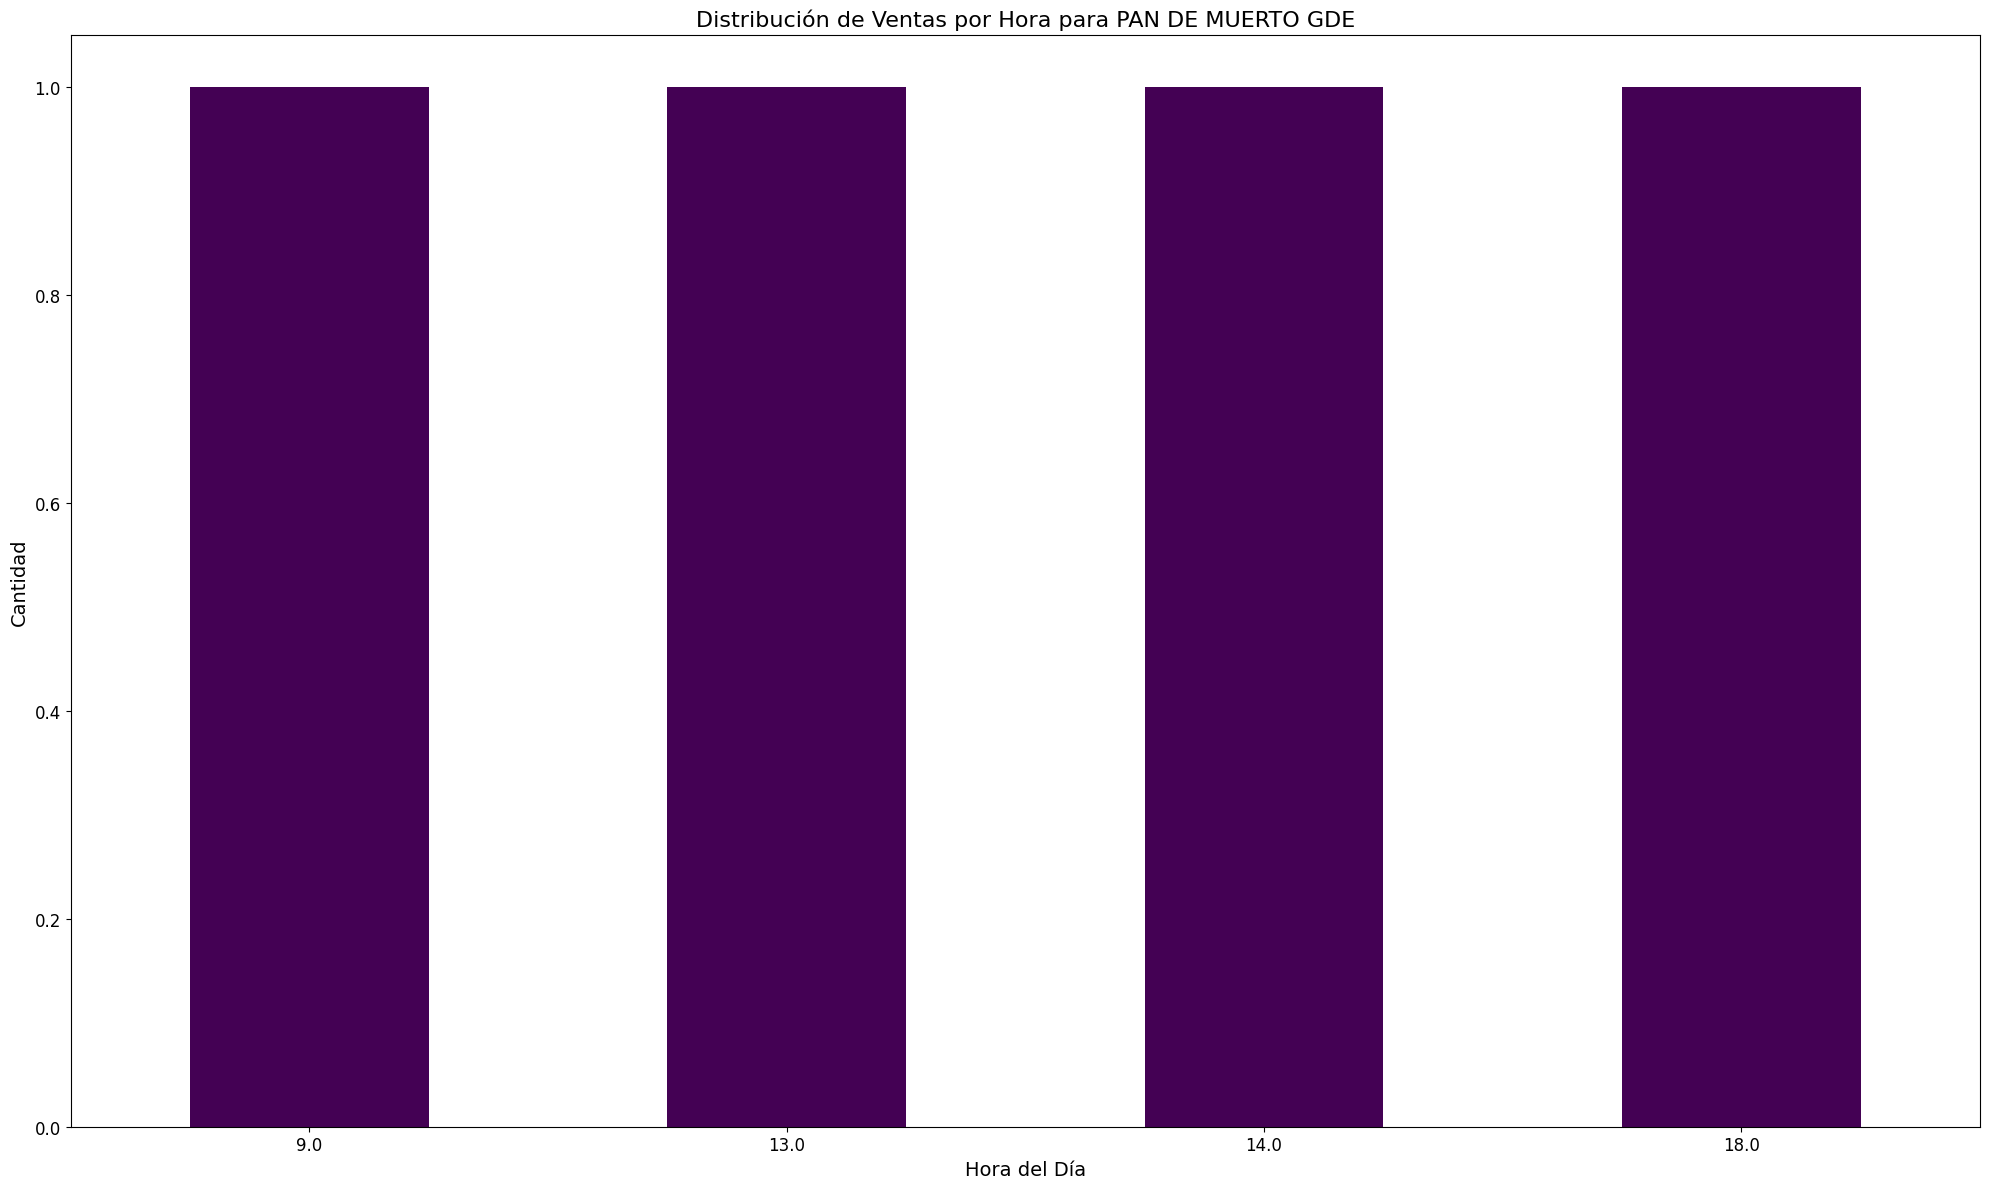

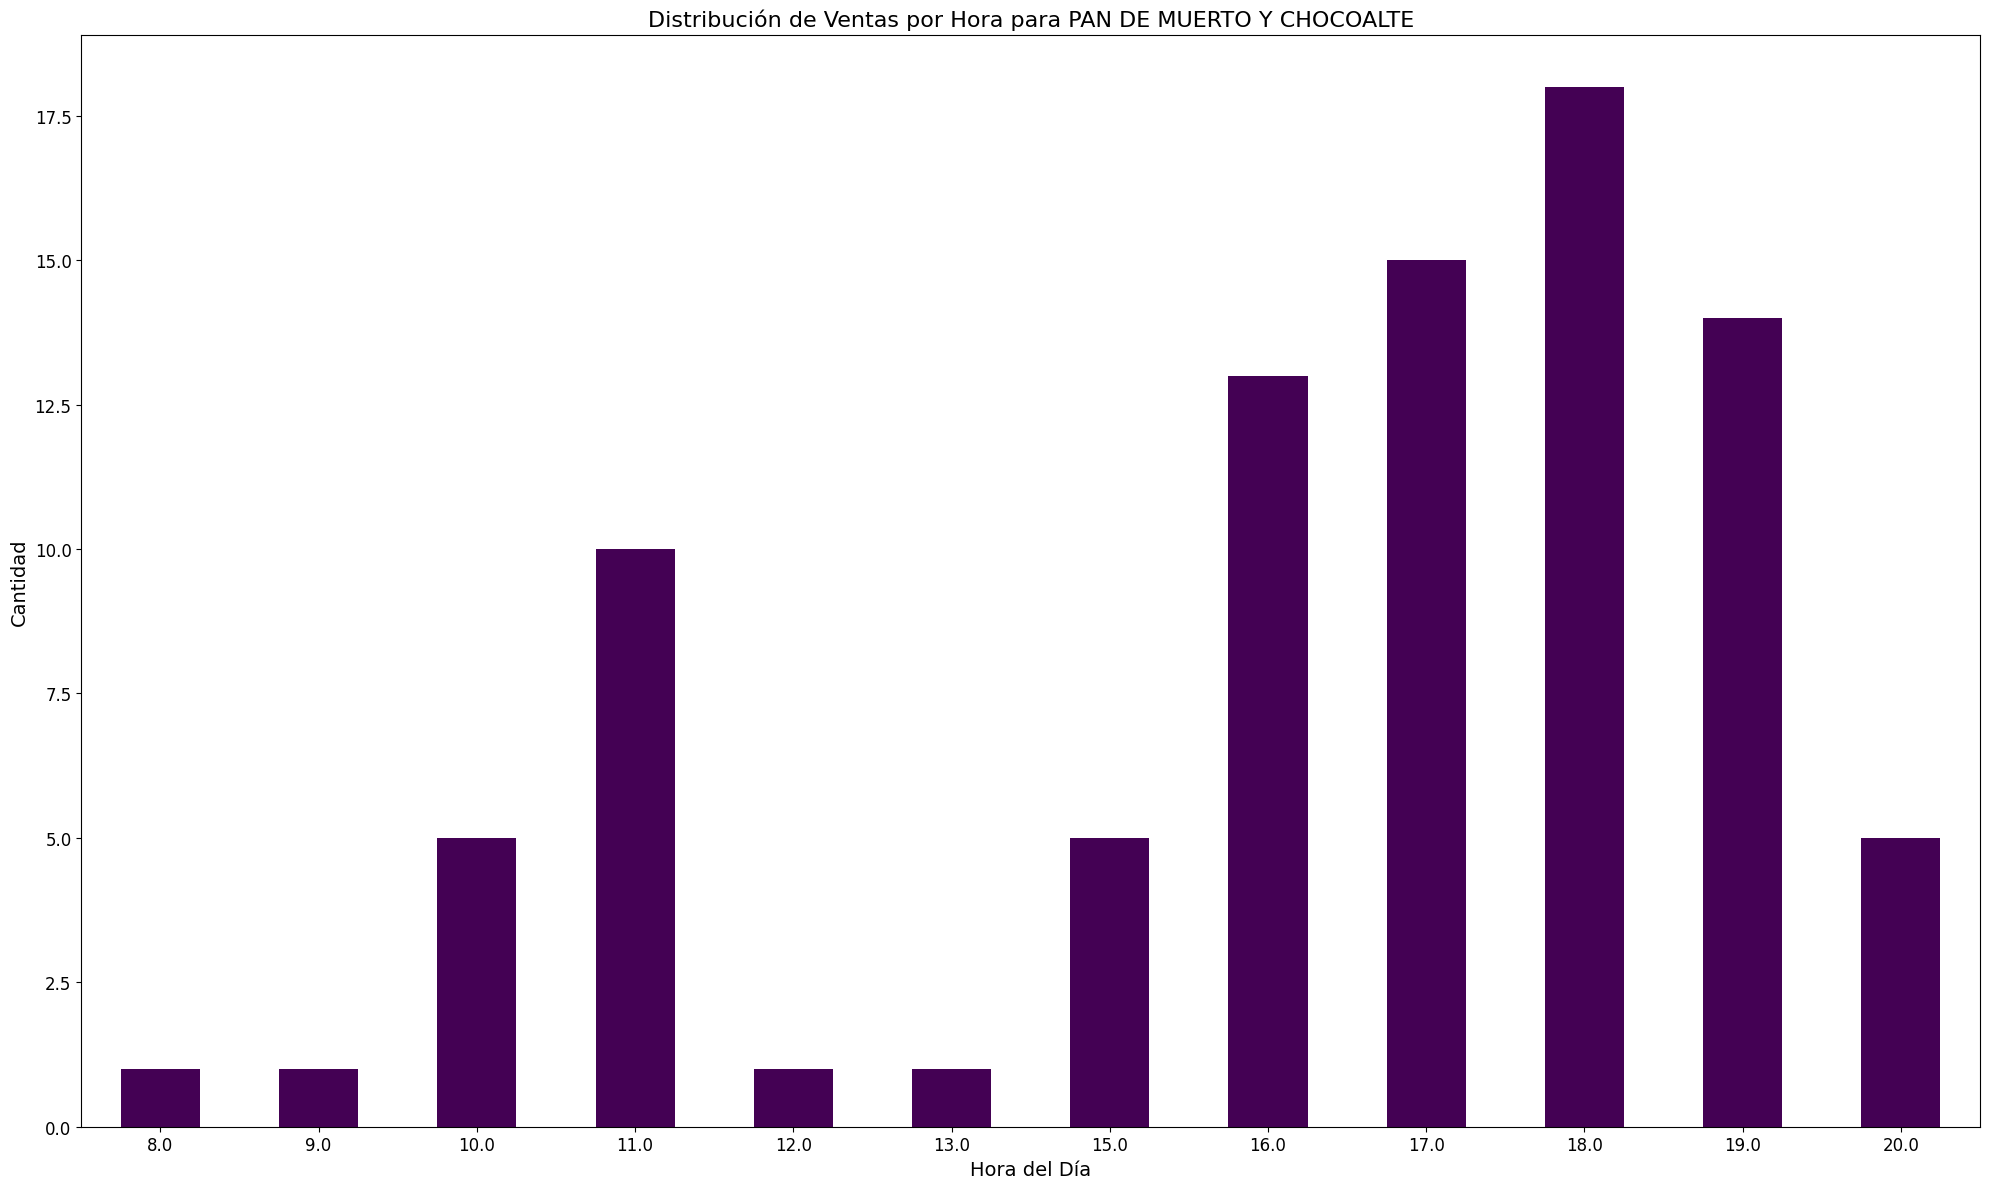

In [119]:
plot_sales_distribution(df_grupo_max_frecu, 'PAN DULCE')

In [ ]:
plot_sales_distribution(df_grupo_max_frecu, 'DESAYUNOS')

In [ ]:
plot_sales_distribution(df_grupo_max_frecu, 'PIZZA')

In [ ]:
plot_sales_distribution(df_grupo_max_frecu, 'REPOSTERIA')

In [ ]:
plot_sales_distribution(df_grupo_max_frecu, 'PAN SALADO')

-------

Voy a exportar el dataframe a csv para ver si en POWER BI va mejor.

In [120]:
df_grupo_max_frecu.to_csv('PV2_MaxFrecu.csv', index=False)

----------------------------

In [117]:
df_grupo_max_frecu['Grupo'].unique()

array(['JUGOS Y BEBIDAS FRIAS', 'PAN DULCE', 'DESAYUNOS', 'COMIDAS',
       'PIZZA', 'REPOSTERIA', 'PAN SALADO'], dtype=object)

### VISUALIZACIÓN DE DATOS PARA CLASIFICACIÓN

Nos interesa ver la frecuencia de la hora a la que se hace el pedido para ver en qué momento se vende más el producto.
En caso de ver en la gráfica: analizar más exhaustivamente ese producto y fijarnos en su última hora de venta.

In [ ]:
df_jugonaranja = df_filtrado[df_filtrado['Platillo / Artículo']== 'JUGO NARANJA']
df_jugonaranja

Grupo Platillo / Artículo          Hora de cierre
0       JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 08:14:29.627
21      JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 09:26:44.187
32      JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 09:56:07.107
36      JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 10:02:53.907
432     JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 19:32:20.197
...                       ...                 ...                     ...
403193  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-16 12:21:47.113
403441  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-16 15:22:26.720
403524  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-16 16:52:41.700
403800  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-16 19:42:17.873
403906  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-17 10:01:30.313

[3917 rows x 3 columns]

In [ ]:
df_jugonaranja['Hora']=df_jugonaranja['Hora de cierre'].dt.time

C:\Users\34690\AppData\Local\Temp\ipykernel_10876\3754482603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jugonaranja['Hora']=df_jugonaranja['Hora de cierre'].dt.time


In [ ]:
df_jugonaranja['Fecha']=df_jugonaranja['Hora de cierre'].dt.date

C:\Users\34690\AppData\Local\Temp\ipykernel_10876\2708581728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jugonaranja['Fecha']=df_jugonaranja['Hora de cierre'].dt.date


In [ ]:
df_jugonaranja

Grupo Platillo / Artículo          Hora de cierre  \
0       JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 08:14:29.627   
21      JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 09:26:44.187   
32      JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 09:56:07.107   
36      JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 10:02:53.907   
432     JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2024-04-01 19:32:20.197   
...                       ...                 ...                     ...   
403193  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-16 12:21:47.113   
403441  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-16 15:22:26.720   
403524  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-16 16:52:41.700   
403800  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-16 19:42:17.873   
403906  JUGOS Y BEBIDAS FRIAS        JUGO NARANJA 2023-07-17 10:01:30.313   

                   Hora       Fecha  
0       08:14:29.627000  2024-04-01  
21      09:26:44.187000  2024-04-01  
32      09:56:07.107000  2024-04-01  
36      10:02:53.907000  2024-04-01  
432     19:32:20.197000  2024-04-01  
...                 ...         ...  
403193  12:21:47.113000  2023-07-16  
403441  15:22:26.720000  2023-07-16  
403524  16:52:41.700000  2023-07-16  
403800  19:42:17.873000  2023-07-16  
403906  10:01:30.313000  2023-07-17  

[3917 rows x 5 columns]

In [ ]:
df_jugonaranja.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3917 entries, 0 to 403906
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Grupo                3914 non-null   object        
 1   Platillo / Artículo  3917 non-null   object        
 2   Hora de cierre       3905 non-null   datetime64[ns]
 3   Hora                 3905 non-null   object        
 4   Fecha                3905 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 183.6+ KB


In [ ]:
# Convertir la columna 'Fecha', 'Hora' a datetime
df_jugonaranja['Fecha'] = pd.to_datetime(df_jugonaranja['Fecha'], errors='coerce', format='%Y-%m-%d')

df_jugonaranja['Hora'] = pd.to_datetime(df_jugonaranja['Hora'], errors='coerce', format='%H:%M:%S.%f')



C:\Users\34690\AppData\Local\Temp\ipykernel_10876\756651867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jugonaranja['Fecha'] = pd.to_datetime(df_jugonaranja['Fecha'], errors='coerce', format='%Y-%m-%d')
C:\Users\34690\AppData\Local\Temp\ipykernel_10876\756651867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jugonaranja['Hora'] = pd.to_datetime(df_jugonaranja['Hora'], errors='coerce', format='%H:%M:%S.%f')


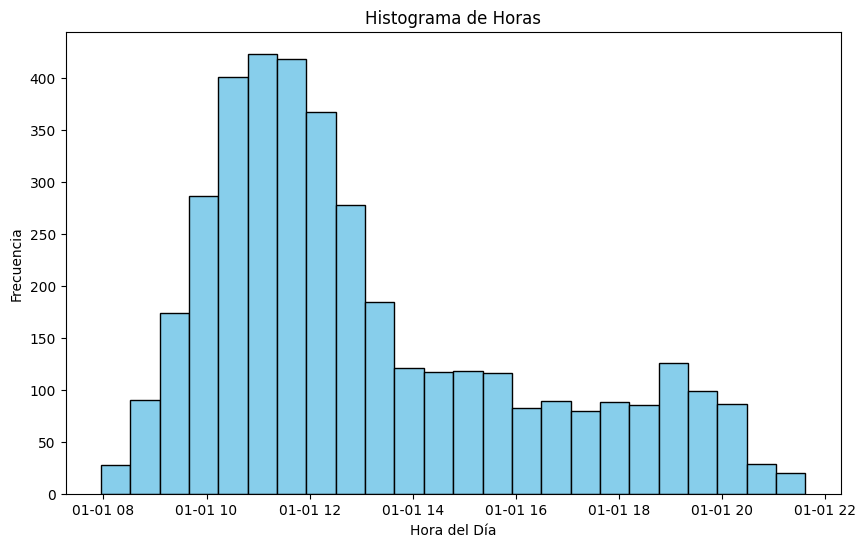

In [ ]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_jugonaranja['Hora'], bins=24, color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Horas')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()